In [1]:
import warnings
warnings.filterwarnings('ignore')
!pip install tensorflow
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import KFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
pd.set_option("display.max_columns", None)

from numpy.random import seed
seed(1)

     |████████████████████████████████| 462 kB 4.3 MB/s 


In [2]:
# mount google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Get a X_train df and X_test df containing the top 100 features identified from feature engineering

In [3]:
feature_scores = pd.read_csv("/content/drive/MyDrive/BT4222 group project/final_data/feature_scores_keybert.csv")

In [4]:
feature_scores

Horror         type        Drama     Thriller       Sci-Fi  \
0  5368.489161  3766.108935  2628.458755  1247.980408  1043.069004   

    Animation  Documentary     History  release_year   Biography  \
0  744.382152   604.711604  410.343717    362.715611  329.291555   

   Keyword_series  Keyword_story  Keyword_killer      Action  Keyword_sex  \
0      309.040841     261.899882      245.781525  236.364073   211.967758   

   Keyword_group  Keyword_life     Romance  Keyword_horror  Keyword_scientist  \
0     192.872671    169.194261  157.987217      141.418139         135.205072   

   Keyword_party  Keyword_kill       Crime  Cast_ericroberts  Keyword_kidnap  \
0     133.171738    127.611828  123.357274        122.515777      117.502824   

   Keyword_drama  Keyword_college  Keyword_house         War  Keyword_haunt  \
0     113.011168       108.873103     107.343142  105.873282      99.196491   

   Keyword_alien  Keyword_village  Keyword_woman      Short      Music  \
0       98.57948        96.776074      96.166996  88.098061  84.547113   

     runtime  Cast_michaelparã©  Cast_kamalhaasan  Cast_dolphlundgren  \
0  72.430215          70.610419         65.163483           62.858612   

   Keyword_revenge  Keyword_ghost  Keyword_war  Keyword_love  Film-Noir  \
0        61.688874      61.169059    57.845692     57.375404  57.070504   

   Cast_deancain  Keyword_island  Keyword_drug  Cast_caspervandien  \
0      55.767128       54.919997     54.182369           52.580169   

   Keyword_boy  Keyword_family  Keyword_escape  Keyword_murder  \
0     52.02919       51.891439       51.191482       50.254167   

   Cast_tomsizemore  Cast_lancehenriksen  Cast_kevinsorbo  Cast_tonytodd  \
0         48.603616            48.352899        47.932003      47.455883   

   Cast_mohanlal  Keyword_live  Keyword_crime  Cast_jefffahey  Keyword_secret  \
0      47.143519     46.023916      44.171192       43.908861       43.880458   

   Keyword_girlfriend  Cast_senersen     Family  Keyword_couple  \
0           43.349306      42.469217  39.218775       38.531175   

   Keyword_adventure  Cast_robertdavi  Keyword_gang  Cast_mischabarton  \
0          37.426048        36.861234     36.805693          36.763098   

   Cast_billmoseley  Cast_dannytrejo  Cast_tomarnold  Cast_mammootty  \
0         35.729829        35.591142       34.273398       31.452589   

   Cast_michaelmadsen  Cast_dominiqueswain    Musical  Cast_johncarradine  \
0            31.00012            30.739252  29.951456           29.885035   

   Cast_fahadhfaasil  Cast_toshirã´mifune  Cast_govinda  Keyword_lawyer  \
0          27.729907            27.444218     27.365775       26.768854   

   Cast_corbinbernsen  Cast_stevenbauer  Cast_vinniejones  \
0           26.463433          26.34197         26.264036   

   Cast_stephenbaldwin  Keyword_friendship  Cast_tatsuyanakadai  \
0            26.100474           26.062027            25.078613   

   Cast_c.thomashowell  Keyword_sister  Cast_vivicaa.fox  Cast_briankrause  \
0            24.933681       24.632106         24.587585         24.561705   

   Keyword_journey  Cast_billyzane  Cast_cynthiarothrock  Keyword_character  \
0        24.010809       23.636705             23.077304          22.990587   

   Cast_vernonwells  Cast_stevenseagal  Keyword_child  Cast_michaelironside  \
0         22.949852          22.936663      22.909459             21.992027   

   Keyword_death  Cast_michaelbiehn  Keyword_agent  Cast_malcolmmcdowell  \
0      21.873168          21.111454      20.999647             20.768675   

   Keyword_actor  Game-Show  Cast_linaromay  Keyword_romance  \
0      20.653565  20.359571       20.309804        20.129157   

   Cast_michaeljaiwhite  Cast_burtlancaster  Cast_robertvaughn  Cast_tomhanks  \
0             19.783483           19.589841          19.413965      19.360881   

   Cast_lukegoss  Cast_aikayano  Cast_naseeruddinshah  Cast_deewallace  \
0      19.178431       19.00537             18.931962         18.704

In [5]:
X_train_original = pd.read_csv("/content/drive/MyDrive/BT4222 group project/final_data/x_train_keybert.csv")

In [6]:
X_train_original.shape
#original len

(58181, 1113)

In [7]:
X_test_original = pd.read_csv("/content/drive/MyDrive/BT4222 group project/final_data/x_test_keybert.csv")

In [8]:
X_test_original.shape

(14546, 1113)

In [9]:
y_train = pd.read_csv("/content/drive/MyDrive/BT4222 group project/final_data/y_train.csv")
y_test = pd.read_csv("/content/drive/MyDrive/BT4222 group project/final_data/y_test.csv")

In [10]:
features = list(feature_scores.columns)
features = features[:100]
print(len(features))
features

100


['Horror',
 'type',
 'Drama',
 'Thriller',
 'Sci-Fi',
 'Animation',
 'Documentary',
 'History',
 'release_year',
 'Biography',
 'Keyword_series',
 'Keyword_story',
 'Keyword_killer',
 'Action',
 'Keyword_sex',
 'Keyword_group',
 'Keyword_life',
 'Romance',
 'Keyword_horror',
 'Keyword_scientist',
 'Keyword_party',
 'Keyword_kill',
 'Crime',
 'Cast_ericroberts',
 'Keyword_kidnap',
 'Keyword_drama',
 'Keyword_college',
 'Keyword_house',
 'War',
 'Keyword_haunt',
 'Keyword_alien',
 'Keyword_village',
 'Keyword_woman',
 'Short',
 'Music',
 'runtime',
 'Cast_michaelparã©',
 'Cast_kamalhaasan',
 'Cast_dolphlundgren',
 'Keyword_revenge',
 'Keyword_ghost',
 'Keyword_war',
 'Keyword_love',
 'Film-Noir',
 'Cast_deancain',
 'Keyword_island',
 'Keyword_drug',
 'Cast_caspervandien',
 'Keyword_boy',
 'Keyword_family',
 'Keyword_escape',
 'Keyword_murder',
 'Cast_tomsizemore',
 'Cast_lancehenriksen',
 'Cast_kevinsorbo',
 'Cast_tonytodd',
 'Cast_mohanlal',
 'Keyword_live',
 'Keyword_crime',
 'Cast_jef

In [11]:
X_train_original.describe()

release_year          type       runtime        Action         Adult  \
count  58181.000000  58181.000000  58181.000000  58181.000000  58181.000000   
mean    1999.274694      0.243567     91.646147      0.161187      0.000034   
std       22.189298      0.429238     39.043020      0.367706      0.005863   
min     1906.000000      0.000000      1.000000      0.000000      0.000000   
25%     1987.000000      0.000000     80.000000      0.000000      0.000000   
50%     2008.000000      0.000000     93.000000      0.000000      0.000000   
75%     2017.000000      0.000000    107.000000      0.000000      0.000000   
max     2025.000000      1.000000   1664.000000      1.000000      1.000000   

          Adventure     Animation     Biography        Comedy         Crime  \
count  58181.000000  58181.000000  58181.000000  58181.000000  58181.000000   
mean       0.105567      0.058146      0.030371      0.332067      0.136247   
std        0.307285      0.234022      0.171607      0.470959      0.343054   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      1.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        Documentary         Drama        Family       Fantasy     Film-Noir  \
count  58181.000000  58181.000000  58181.000000  58181.000000  58181.000000   
mean       0.011103      0.522215      0.057459      0.050996      0.006669   
std        0.104786      0.499511      0.232719      0.219992      0.081391   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      1.000000      0.000000      0.000000      0.000000   
75%        0.000000      1.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          Game-Show       History        Horror         Music       Musical  \
count  58181.000000  58181.000000  58181.000000  58181.000000  58181.000000   
mean       0.005345      0.028841      0.109005      0.020642      0.018408   
std        0.072917      0.167361      0.311648      0.142185      0.134423   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Mystery          News    Reality-TV       Romance        Sci-Fi  \
count  58181.000000  58181.000000  58181.000000  58181.000000  58181.000000   
mean       0.066654      0.002441      0.014283      0.154879      0.045582   
std        0.249424      0.049343      0.118656      0.361792      0.208578   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

              Short         Sport     Talk-Show      Thriller           War  \
count  58181.000000  58181.000000  58181.000000  58181.000000  58181.000000   
mean       0.004658      0.013063      0.004709      0.126330      0.020780   
std        0.068090      0.113544      0.068464      0.332224      0.142648   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000     

In [12]:
# get X_train containing only the cols listed above
X_train = X_train_original[features]
X_train

Horror  type  Drama  Thriller  Sci-Fi  Animation  Documentary  History  \
0         0.0     0    1.0       1.0     0.0        0.0          0.0      0.0   
1         0.0     0    0.0       0.0     0.0        0.0          0.0      0.0   
2         1.0     0    0.0       0.0     1.0        0.0          0.0      0.0   
3         0.0     0    1.0       0.0     0.0        0.0          0.0      0.0   
4         0.0     0    1.0       0.0     0.0        0.0          0.0      0.0   
...       ...   ...    ...       ...     ...        ...          ...      ...   
58176     0.0     0    1.0       0.0     0.0        0.0          0.0      0.0   
58177     0.0     0    0.0       0.0     0.0        0.0          0.0      0.0   
58178     0.0     1    1.0       1.0     0.0        0.0          0.0      0.0   
58179     0.0     0    0.0       0.0     0.0        0.0          0.0      0.0   
58180     0.0     0    0.0       0.0     0.0        0.0          0.0      0.0   

       release_year  Biography  Keyword_series  Keyword_story  Keyword_killer  \
0              2015        0.0               0              0               0   
1              1934        0.0               0              0               0   
2              1975        0.0               0              0               0   
3              2011        0.0               0              0               0   
4              1973        0.0               0              1               0   
...             ...        ...             ...            ...             ...   
58176          2015        0.0               0              0               0   
58177          2004        0.0               0              0               0   
58178          2021        0.0               0              0               0   
58179          1959        0.0               0              0               0   
58180          2018        0.0               0              0               0   

       Action  Keyword_sex  Keyword_group  Keyword_life  Romance  \
0         0.0            0              0             0      0.0   
1         0.0            0              0             0      0.0   
2         0.0            0              0             0      0.0   
3         0.0            0              0             0      1.0   
4         0.0            0              0             1      0.0   
...       ...          ...            ...           ...      ...   
58176     0.0            0              0             0      0.0   
58177     0.0            0              0             0      1.0   
58178     0.0            0              0             0      1.0   
58179     0.0            0              0             0      0.0   
58180     0.0            0              0             0      0.0   

       Keyword_horror  Keyword_scientist  Keyword_party  Keyword_kill  Crime  \
0                   0                  0              0             0    0.0   
1                   0                  0              0             0    0.0   
2                   0                  0              0             0    0.0   
3                   0                  0              0             0    0.0   
4                   0                  0              0             0    0.0   
...               ...                ...            ...           ...    ...   
58176               0                  0              0             0    0.0   
58177               0                  0              0             0    1.0   
58178               0                  0              0             0    0.0   
58179               0                  0              0             0    0.0   
58180               0                  0              0             0    0.0   

       Cast_ericroberts  Keyword_kidnap  Keyword_drama  Keyword_college  \
0                   0.0               0              0                0   
1                   0.0               0              0                0   
2                   0.0               0              0    

In [13]:
# get X_test containing only the cols listed above
X_test = X_test_original[features]
X_test

Horror  type  Drama  Thriller  Sci-Fi  Animation  Documentary  History  \
0         1.0     0    1.0       1.0     0.0        0.0          0.0      0.0   
1         0.0     0    0.0       0.0     0.0        1.0          0.0      0.0   
2         0.0     0    1.0       0.0     0.0        0.0          0.0      0.0   
3         0.0     0    1.0       0.0     0.0        0.0          0.0      0.0   
4         0.0     0    0.0       0.0     0.0        0.0          0.0      1.0   
...       ...   ...    ...       ...     ...        ...          ...      ...   
14541     0.0     0    1.0       0.0     0.0        0.0          0.0      0.0   
14542     0.0     1    0.0       0.0     0.0        0.0          0.0      0.0   
14543     0.0     1    0.0       0.0     0.0        0.0          0.0      0.0   
14544     0.0     0    0.0       0.0     0.0        0.0          0.0      0.0   
14545     0.0     0    1.0       0.0     0.0        0.0          0.0      1.0   

       release_year  Biography  Keyword_series  Keyword_story  Keyword_killer  \
0              2016        0.0               0              0               0   
1              2018        1.0               0              1               0   
2              1946        0.0               0              0               0   
3              2017        0.0               0              0               0   
4              2009        0.0               0              0               0   
...             ...        ...             ...            ...             ...   
14541          1969        0.0               0              0               0   
14542          2003        0.0               0              0               0   
14543          1998        0.0               1              0               0   
14544          1975        0.0               0              0               0   
14545          1999        0.0               0              0               0   

       Action  Keyword_sex  Keyword_group  Keyword_life  Romance  \
0         0.0            0              0             1      0.0   
1         0.0            0              0             0      0.0   
2         1.0            0              0             0      0.0   
3         0.0            0              0             1      0.0   
4         0.0            0              0             0      0.0   
...       ...          ...            ...           ...      ...   
14541     0.0            0              0             0      0.0   
14542     0.0            0              0             0      0.0   
14543     0.0            0              0             0      0.0   
14544     0.0            0              0             0      0.0   
14545     0.0            0              1             0      0.0   

       Keyword_horror  Keyword_scientist  Keyword_party  Keyword_kill  Crime  \
0                   0                  0              0             0    0.0   
1                   0                  0              0             0    0.0   
2                   0                  0              0             0    0.0   
3                   0                  0              0             0    0.0   
4                   0                  0              0             0    0.0   
...               ...                ...            ...           ...    ...   
14541               0                  0              0             0    0.0   
14542               0                  0              0             0    0.0   
14543               0                  0              0             0    0.0   
14544               0                  0              0             0    0.0   
14545               0                  0              0             0    0.0   

       Cast_ericroberts  Keyword_kidnap  Keyword_drama  Keyword_college  \
0                   0.0               0              0                0   
1                   0.0               0              0                0   
2                   0.0               0              0    

## Simple nn model using LR = 0.01, epochs = 20, layers = [20],batch size = 256, activation = relu

In [ ]:
def baseline_model_simple(learning_rate, layers=[20]):
	# create model
  model = Sequential()

  # Define the hidden layers
  
  for index, layer in enumerate(layers):
    if index == 0:
      # code below adds the first Dense layer is doing 2 things, 
      # defining the input or visible layer and the first hidden layer.
      model.add(tf.keras.layers.Dense(layer, input_dim=X_train.shape[1], activation='relu'))
    else:
      model.add(tf.keras.layers.Dense(units=layer, activation='relu', 
                                    name=f'Hidden{index}'))
   
  # Define the output layer.
  model.add(Dense(units=1, name='Output'))  
  # Compile model
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()]) 
  return model

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.01
number_epochs = 20
batch_size = 256
model_deep = baseline_model_simple(learning_rate)

simple_nn_1 = model_deep.fit(x=X_train, y=y_train, batch_size=256,epochs=number_epochs, validation_split=0.2, shuffle=True)

mse_train = simple_nn_1.history['loss']

Epoch 1/20
182/182 [==============================] - 3s 4ms/step - loss: 333.1295 - mean_squared_error: 333.1295 - val_loss: 1.6290 - val_mean_squared_error: 1.6290
Epoch 2/20
182/182 [==============================] - 1s 3ms/step - loss: 1.4706 - mean_squared_error: 1.4706 - val_loss: 1.4546 - val_mean_squared_error: 1.4546
Epoch 3/20
182/182 [==============================] - 1s 3ms/step - loss: 1.3720 - mean_squared_error: 1.3720 - val_loss: 1.3451 - val_mean_squared_error: 1.3451
Epoch 4/20
182/182 [==============================] - 1s 3ms/step - loss: 1.3345 - mean_squared_error: 1.3345 - val_loss: 1.3620 - val_mean_squared_error: 1.3620
Epoch 5/20
182/182 [==============================] - 1s 3ms/step - loss: 1.3325 - mean_squared_error: 1.3325 - val_loss: 1.2930 - val_mean_squared_error: 1.2930
Epoch 6/20
182/182 [==============================] - 1s 3ms/step - loss: 1.3147 - mean_squared_error: 1.3147 - val_loss: 1.3611 - val_mean_squared_error: 1.3611
Epoch 7/20
182/182 [====

Text(0, 0.5, 'Mean Squared Error')

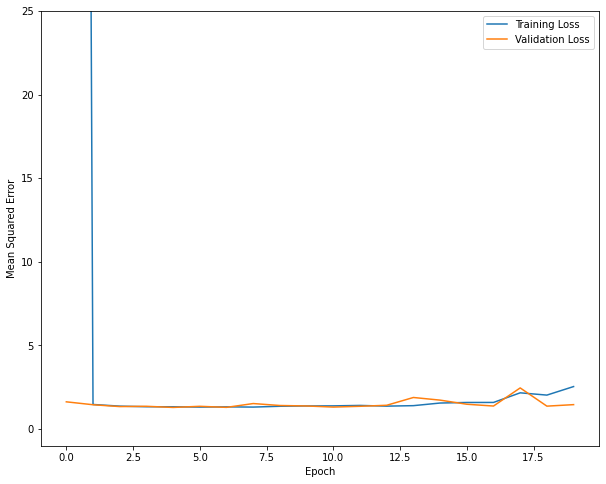

In [ ]:
# plotting of loss curve
plt.figure(figsize=(10, 8))
plt.plot(simple_nn_1.history['loss'], label="Training Loss")
plt.plot(simple_nn_1.history['val_loss'], label="Validation Loss")
plt.legend()
plt.ylim(-1, 25)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")

### evaluate the model on X_test

In [ ]:
nn_eval_simple = model_deep.predict(X_test)

In [ ]:
model_deep.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                2020      
                                                                 
 Output (Dense)              (None, 1)                 21        
                                                                 
Total params: 2,041
Trainable params: 2,041
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE is: " + str(mean_squared_error(y_test,nn_eval_simple)))
from sklearn.metrics import mean_absolute_percentage_error
print("MAPE is: " +  str(100 - 100*mean_absolute_percentage_error(y_test,nn_eval_simple)))

MSE is: 1.4750266399507572
MAPE is: 82.38165622527964


## Simple nn model using LR = 0.05, epochs = 20, layers = [20], batch size = 256

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.05
number_epochs = 20
batch_size = 256
model_deep = baseline_model_simple(learning_rate)

simple_nn_2 = model_deep.fit(x=X_train, y=y_train, batch_size=256,epochs=number_epochs, validation_split=0.2, shuffle=True)

mse_train = simple_nn_2.history['loss']

Epoch 1/20
182/182 [==============================] - 3s 4ms/step - loss: 1450.9828 - mean_squared_error: 1450.9828 - val_loss: 2.6328 - val_mean_squared_error: 2.6328
Epoch 2/20
182/182 [==============================] - 1s 3ms/step - loss: 2.3001 - mean_squared_error: 2.3001 - val_loss: 2.0877 - val_mean_squared_error: 2.0877
Epoch 3/20
182/182 [==============================] - 1s 3ms/step - loss: 1.8764 - mean_squared_error: 1.8764 - val_loss: 1.7898 - val_mean_squared_error: 1.7898
Epoch 4/20
182/182 [==============================] - 1s 3ms/step - loss: 1.6841 - mean_squared_error: 1.6841 - val_loss: 1.6770 - val_mean_squared_error: 1.6770
Epoch 5/20
182/182 [==============================] - 1s 3ms/step - loss: 1.6047 - mean_squared_error: 1.6047 - val_loss: 1.6234 - val_mean_squared_error: 1.6234
Epoch 6/20
182/182 [==============================] - 1s 3ms/step - loss: 1.5600 - mean_squared_error: 1.5600 - val_loss: 1.5791 - val_mean_squared_error: 1.5791
Epoch 7/20
182/182 [==

Text(0, 0.5, 'Mean Squared Error')

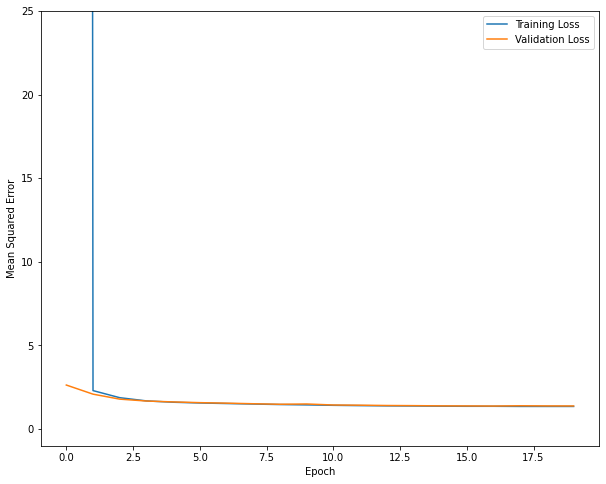

In [ ]:
# plotting of loss curve
plt.figure(figsize=(10, 8))
plt.plot(simple_nn_2.history['loss'], label="Training Loss")
plt.plot(simple_nn_2.history['val_loss'], label="Validation Loss")
plt.legend()
plt.ylim(-1, 25)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")

### evaluate the model on X_test

In [ ]:
nn_eval_simple = model_deep.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE is: " + str(mean_squared_error(y_test,nn_eval_simple)))
from sklearn.metrics import mean_absolute_percentage_error
print("MAPE is: " +  str(100 - 100*mean_absolute_percentage_error(y_test,nn_eval_simple)))

MSE is: 1.3887704097647602
MAPE is: 82.52557621472998


## Simple nn model using LR = 0.1, epochs = 20, layers = [20], batch size = 256

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.1
number_epochs = 20
batch_size = 256
model_deep = baseline_model_simple(learning_rate)

simple_nn_3 = model_deep.fit(x=X_train, y=y_train, batch_size=256,epochs=number_epochs, validation_split=0.2, shuffle=True)

mse_train = simple_nn_3.history['loss']

Epoch 1/20
182/182 [==============================] - 2s 6ms/step - loss: 5159.7739 - mean_squared_error: 5159.7739 - val_loss: 1.8909 - val_mean_squared_error: 1.8909
Epoch 2/20
182/182 [==============================] - 1s 4ms/step - loss: 1.8405 - mean_squared_error: 1.8405 - val_loss: 1.8721 - val_mean_squared_error: 1.8721
Epoch 3/20
182/182 [==============================] - 1s 4ms/step - loss: 1.8186 - mean_squared_error: 1.8186 - val_loss: 1.8490 - val_mean_squared_error: 1.8490
Epoch 4/20
182/182 [==============================] - 1s 4ms/step - loss: 1.7942 - mean_squared_error: 1.7942 - val_loss: 1.8245 - val_mean_squared_error: 1.8245
Epoch 5/20
182/182 [==============================] - 1s 5ms/step - loss: 1.7704 - mean_squared_error: 1.7704 - val_loss: 1.8004 - val_mean_squared_error: 1.8004
Epoch 6/20
182/182 [==============================] - 1s 4ms/step - loss: 1.7466 - mean_squared_error: 1.7466 - val_loss: 1.7787 - val_mean_squared_error: 1.7787
Epoch 7/20
182/182 [==

Text(0, 0.5, 'Mean Squared Error')

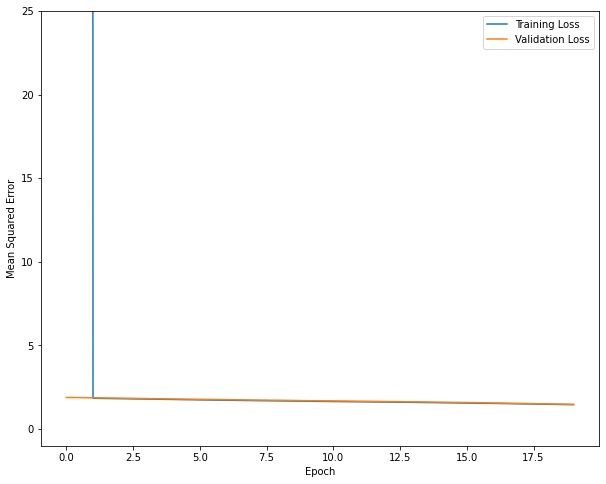

In [ ]:
# plotting of loss curve
plt.figure(figsize=(10, 8))
plt.plot(simple_nn_3.history['loss'], label="Training Loss")
plt.plot(simple_nn_3.history['val_loss'], label="Validation Loss")
plt.legend()
plt.ylim(-1, 25)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")

### evaluate the model on X_test

In [ ]:
nn_eval_simple = model_deep.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE is: " + str(mean_squared_error(y_test,nn_eval_simple)))
from sklearn.metrics import mean_absolute_percentage_error
print("MAPE is: " +  str(100 - 100*mean_absolute_percentage_error(y_test,nn_eval_simple)))

MSE is: 1.4788387050311846
MAPE is: 81.58432209699359


## Simple nn model using LR = 0.01, epochs = 20, layers = [20,6]

In [ ]:
def baseline_model_simple(learning_rate, layers=[20,6]):
	# create model
  model = Sequential()

  # Define the hidden layers
  
  for index, layer in enumerate(layers):
    if index == 0:
      # code below adds the first Dense layer is doing 2 things, 
      # defining the input or visible layer and the first hidden layer.
      model.add(tf.keras.layers.Dense(layer, input_dim=X_train.shape[1], activation='relu')) 
                                      #kernel_regularizer=tf.keras.regularizers.l1(0.04)))
      #model.add(tf.keras.layers.Dropout(rate=0.25)) 
    else:
      model.add(tf.keras.layers.Dense(units=layer, activation='relu', 
                                      #kernel_regularizer=tf.keras.regularizers.l1(0.04),
                                    name=f'Hidden{index}'))
      #model.add(tf.keras.layers.Dropout(rate=0.25)) 
   
  # Define the output layer.
  model.add(Dense(units=1, name='Output'))  
  # Compile model
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()]) 
  return model

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.01
number_epochs = 20
model_deep = baseline_model_simple(learning_rate)
simple_nn_4 = model_deep.fit(x=X_train, y=y_train, batch_size=256,epochs=number_epochs, validation_split=0.2, shuffle=True)

mse_train = simple_nn_4.history['loss']
# 1.4649

Epoch 1/20
182/182 [==============================] - 1s 4ms/step - loss: 841.1277 - mean_squared_error: 841.1277 - val_loss: 2.3507 - val_mean_squared_error: 2.3507
Epoch 2/20
182/182 [==============================] - 1s 3ms/step - loss: 2.1085 - mean_squared_error: 2.1085 - val_loss: 1.9569 - val_mean_squared_error: 1.9569
Epoch 3/20
182/182 [==============================] - 1s 3ms/step - loss: 1.8044 - mean_squared_error: 1.8044 - val_loss: 1.7534 - val_mean_squared_error: 1.7534
Epoch 4/20
182/182 [==============================] - 1s 3ms/step - loss: 1.6610 - mean_squared_error: 1.6610 - val_loss: 1.6569 - val_mean_squared_error: 1.6569
Epoch 5/20
182/182 [==============================] - 1s 3ms/step - loss: 1.5938 - mean_squared_error: 1.5938 - val_loss: 1.6114 - val_mean_squared_error: 1.6114
Epoch 6/20
182/182 [==============================] - 1s 3ms/step - loss: 1.5545 - mean_squared_error: 1.5545 - val_loss: 1.5716 - val_mean_squared_error: 1.5716
Epoch 7/20
182/182 [====

Text(0, 0.5, 'Mean Squared Error')

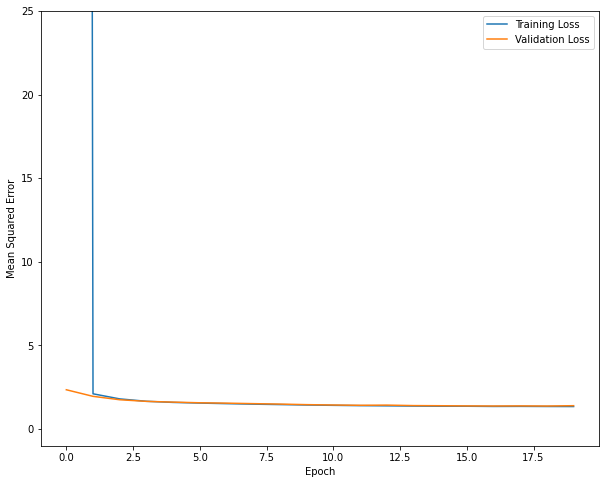

In [ ]:
# plotting of loss curve
plt.figure(figsize=(10, 8))
plt.plot(simple_nn_4.history['loss'], label="Training Loss")
plt.plot(simple_nn_4.history['val_loss'], label="Validation Loss")
plt.legend()
plt.ylim(-1, 25)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")

### evaluate the model on X_test

In [ ]:
nn_eval_simple = model_deep.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE is: " + str(mean_squared_error(y_test,nn_eval_simple)))
#1.311605617830616
from sklearn.metrics import mean_absolute_percentage_error
print("MAPE is: " +  str(100 - 100*mean_absolute_percentage_error(y_test,nn_eval_simple)))
#82.65846225771499

MSE is: 1.3958481999314962
MAPE is: 81.97563365020558


## Simple nn model using LR = 0.01, epochs = 20, layers = [30,6]

In [ ]:
def baseline_model_simple(learning_rate, layers=[30,6]):
	# create model
  model = Sequential()

  # Define the hidden layers
  
  for index, layer in enumerate(layers):
    if index == 0:
      print("first hidden layer: " + str(layer))
      # code below adds the first Dense layer is doing 2 things, 
      # defining the input or visible layer and the first hidden layer.
      model.add(tf.keras.layers.Dense(layer, input_dim=X_train.shape[1], activation='relu')) 
                                      #kernel_regularizer=tf.keras.regularizers.l1(0.04)))
      #model.add(tf.keras.layers.Dropout(rate=0.25)) 
    else:
      print(str(index) + " hidden layer: " + str(layer))
      model.add(tf.keras.layers.Dense(units=layer, activation='relu', 
                                      #kernel_regularizer=tf.keras.regularizers.l1(0.04),
                                    name=f'Hidden{index}'))
      #model.add(tf.keras.layers.Dropout(rate=0.25)) 
   
  # Define the output layer.
  model.add(Dense(units=1, name='Output'))  
  # Compile model
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()]) 
  return model

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.01
number_epochs = 20
model_deep = baseline_model_simple(learning_rate)

simple_nn_5 = model_deep.fit(x=X_train, y=y_train, batch_size=256,epochs=number_epochs, validation_split=0.2, shuffle=True)

mse_train = simple_nn_5.history['loss']
#1.6072

first hidden layer: 30
1 hidden layer: 6
Epoch 1/20
182/182 [==============================] - 2s 6ms/step - loss: 655.8325 - mean_squared_error: 655.8325 - val_loss: 1.7696 - val_mean_squared_error: 1.7696
Epoch 2/20
182/182 [==============================] - 1s 5ms/step - loss: 1.7280 - mean_squared_error: 1.7280 - val_loss: 1.7451 - val_mean_squared_error: 1.7451
Epoch 3/20
182/182 [==============================] - 1s 5ms/step - loss: 1.7177 - mean_squared_error: 1.7177 - val_loss: 1.7127 - val_mean_squared_error: 1.7127
Epoch 4/20
182/182 [==============================] - 1s 5ms/step - loss: 1.7038 - mean_squared_error: 1.7038 - val_loss: 1.7347 - val_mean_squared_error: 1.7347
Epoch 5/20
182/182 [==============================] - 1s 4ms/step - loss: 1.6562 - mean_squared_error: 1.6562 - val_loss: 1.8069 - val_mean_squared_error: 1.8069
Epoch 6/20
182/182 [==============================] - 1s 4ms/step - loss: 1.6684 - mean_squared_error: 1.6684 - val_loss: 1.7371 - val_mean_squar

Text(0, 0.5, 'Mean Squared Error')

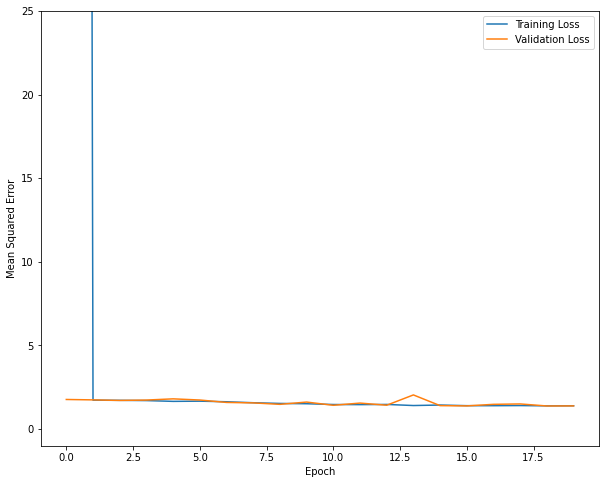

In [ ]:
# plotting of loss curve
plt.figure(figsize=(10, 8))
plt.plot(simple_nn_5.history['loss'], label="Training Loss")
plt.plot(simple_nn_5.history['val_loss'], label="Validation Loss")
plt.legend()
plt.ylim(-1, 25)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")

### evaluate the model on X_test

In [ ]:
nn_eval_simple = model_deep.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE is: " + str(mean_squared_error(y_test,nn_eval_simple)))

from sklearn.metrics import mean_absolute_percentage_error
print("MAPE is: " +  str(100 - 100*mean_absolute_percentage_error(y_test,nn_eval_simple)))

MSE is: 1.3950091005359682
MAPE is: 82.49072350054398


## Simple nn model using LR = 0.01, epochs = 20, layers = [30,12]

In [ ]:
def baseline_model_simple(learning_rate, layers=[30,12]):
  model = Sequential()

  # Define the hidden layers
  
  for index, layer in enumerate(layers):
    if index == 0:
      print("first hidden layer: " + str(layer))
      # code below adds the first Dense layer is doing 2 things, 
      # defining the input or visible layer and the first hidden layer.
      model.add(tf.keras.layers.Dense(layer, input_dim=X_train.shape[1], activation='relu')) 
                                      #kernel_regularizer=tf.keras.regularizers.l1(0.04)))
      #model.add(tf.keras.layers.Dropout(rate=0.25)) 
    else:
      print(str(index) + " hidden layer: " + str(layer))
      model.add(tf.keras.layers.Dense(units=layer, activation='relu', 
                                      #kernel_regularizer=tf.keras.regularizers.l1(0.04),
                                    name=f'Hidden{index}'))
      #model.add(tf.keras.layers.Dropout(rate=0.25)) 
   
  # Define the output layer.
  model.add(Dense(units=1, name='Output'))  
  # Compile model
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()]) 
  return model

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.01
number_epochs = 20
model_deep = baseline_model_simple(learning_rate)
simple_nn_6 = model_deep.fit(x=X_train, y=y_train, batch_size=256,epochs=number_epochs, validation_split=0.2, shuffle=True)

mse_train = simple_nn_6.history['loss']

first hidden layer: 30
1 hidden layer: 12
Epoch 1/20
182/182 [==============================] - 2s 7ms/step - loss: 99.7296 - mean_squared_error: 99.7296 - val_loss: 1.4733 - val_mean_squared_error: 1.4733
Epoch 2/20
182/182 [==============================] - 1s 6ms/step - loss: 1.4437 - mean_squared_error: 1.4437 - val_loss: 1.4190 - val_mean_squared_error: 1.4190
Epoch 3/20
182/182 [==============================] - 1s 7ms/step - loss: 1.4101 - mean_squared_error: 1.4101 - val_loss: 1.3508 - val_mean_squared_error: 1.3508
Epoch 4/20
182/182 [==============================] - 1s 3ms/step - loss: 1.3688 - mean_squared_error: 1.3688 - val_loss: 1.3799 - val_mean_squared_error: 1.3799
Epoch 5/20
182/182 [==============================] - 1s 3ms/step - loss: 1.3887 - mean_squared_error: 1.3887 - val_loss: 1.3437 - val_mean_squared_error: 1.3437
Epoch 6/20
182/182 [==============================] - 1s 3ms/step - loss: 1.4736 - mean_squared_error: 1.4736 - val_loss: 1.3706 - val_mean_square

Text(0, 0.5, 'Mean Squared Error')

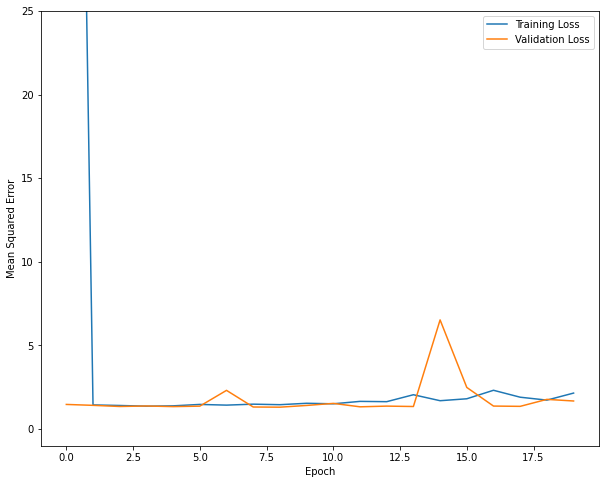

In [ ]:
# plotting of loss curve
plt.figure(figsize=(10, 8))
plt.plot(simple_nn_6.history['loss'], label="Training Loss")
plt.plot(simple_nn_6.history['val_loss'], label="Validation Loss")
plt.legend()
plt.ylim(-1, 25)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")

### evaluate the model on X_test

In [ ]:
nn_eval_simple = model_deep.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE is: " + str(mean_squared_error(y_test,nn_eval_simple)))
from sklearn.metrics import mean_absolute_percentage_error
print("MAPE is: " +  str(100 - 100*mean_absolute_percentage_error(y_test,nn_eval_simple)))

MSE is: 1.7034711864100844
MAPE is: 81.53961093076826


## Simple nn model using LR = 0.01, epochs = 30, layers = [20]

In [15]:
def baseline_model_simple(learning_rate, layers=[20]):
  model = Sequential()
  # Define the hidden layers
  for index, layer in enumerate(layers):
    if index == 0:
      print("first hidden layer: " + str(layer))
      # code below adds the first Dense layer is doing 2 things, 
      # defining the input or visible layer and the first hidden layer.
      model.add(tf.keras.layers.Dense(layer, input_dim=X_train.shape[1], activation='relu')) 
    else:
      print(str(index + 1) + " hidden layer: " + str(layer))
      model.add(tf.keras.layers.Dense(units=layer, activation='relu', 
                                    name=f'Hidden{index}'))
   
  # Define the output layer.
  model.add(Dense(units=1, name='Output'))  
  # Compile model
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()]) 
  return model

In [18]:
# The following variables are the hyperparameters.
learning_rate = 0.01
number_epochs = 30
model_deep = baseline_model_simple(learning_rate)
simple_nn_7 = model_deep.fit(x=X_train, y=y_train, batch_size=256,epochs=number_epochs, validation_split=0.2, shuffle=True)

mse_train = simple_nn_7.history['loss']

first hidden layer: 20
Epoch 1/30
182/182 [==============================] - 2s 8ms/step - loss: 4850.2422 - mean_squared_error: 4850.2422 - val_loss: 3.5842 - val_mean_squared_error: 3.5842
Epoch 2/30
182/182 [==============================] - 1s 4ms/step - loss: 2.2723 - mean_squared_error: 2.2723 - val_loss: 1.8049 - val_mean_squared_error: 1.8049
Epoch 3/30
182/182 [==============================] - 1s 4ms/step - loss: 1.6680 - mean_squared_error: 1.6680 - val_loss: 1.6561 - val_mean_squared_error: 1.6561
Epoch 4/30
182/182 [==============================] - 1s 4ms/step - loss: 1.5679 - mean_squared_error: 1.5679 - val_loss: 1.5615 - val_mean_squared_error: 1.5615
Epoch 5/30
182/182 [==============================] - 1s 5ms/step - loss: 1.4903 - mean_squared_error: 1.4903 - val_loss: 1.4943 - val_mean_squared_error: 1.4943
Epoch 6/30
182/182 [==============================] - 1s 5ms/step - loss: 1.4422 - mean_squared_error: 1.4422 - val_loss: 1.4516 - val_mean_squared_error: 1.4516

Text(0, 0.5, 'Mean Squared Error')

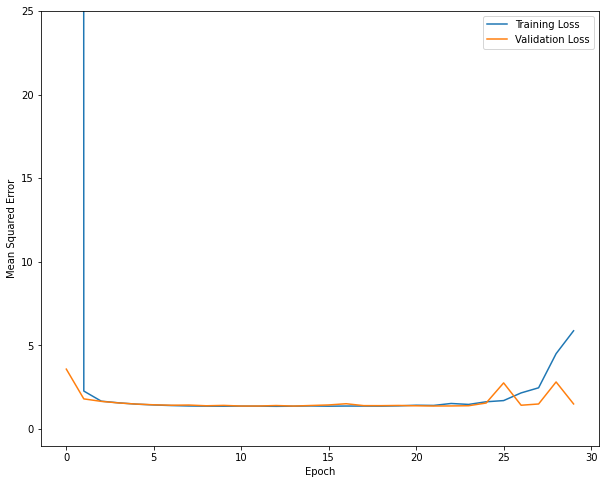

In [19]:
# plotting of loss curve
plt.figure(figsize=(10, 8))
plt.plot(simple_nn_7.history['loss'], label="Training Loss")
plt.plot(simple_nn_7.history['val_loss'], label="Validation Loss")
plt.legend()
plt.ylim(-1, 25)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")

### evaluate the model on X_test

In [20]:
nn_eval_simple = model_deep.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error
print("MSE is: " + str(mean_squared_error(y_test,nn_eval_simple)))
from sklearn.metrics import mean_absolute_percentage_error
print("MAPE is: " +  str(100 - 100*mean_absolute_percentage_error(y_test,nn_eval_simple)))

MSE is: 1.5155082809665574
MAPE is: 82.28101813895604


## Simple nn model using LR = 0.01, epochs = 30, layers = [20], batch size = 512

In [ ]:
def baseline_model_simple(learning_rate, layers=[20]):
  model = Sequential()

  # Define the hidden layers
  
  for index, layer in enumerate(layers):
    if index == 0:
      print("1 hidden layer: " + str(layer))
      # code below adds the first Dense layer is doing 2 things, 
      # defining the input or visible layer and the first hidden layer.
      model.add(tf.keras.layers.Dense(layer, input_dim=X_train.shape[1], activation='relu')) 
                                      #kernel_regularizer=tf.keras.regularizers.l1(0.04)))
      #model.add(tf.keras.layers.Dropout(rate=0.25)) 
    else:
      print(str(index + 1) + " hidden layer: " + str(layer))
      model.add(tf.keras.layers.Dense(units=layer, activation='relu', 
                                      #kernel_regularizer=tf.keras.regularizers.l1(0.04),
                                    name=f'Hidden{index}'))
      #model.add(tf.keras.layers.Dropout(rate=0.25)) 
   
  # Define the output layer.
  model.add(Dense(units=1, name='Output'))  
  # Compile model
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()]) 
  return model

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.01
number_epochs = 20
model_deep = baseline_model_simple(learning_rate)

simple_nn_8 = model_deep.fit(x=X_train, y=y_train, batch_size=512,epochs=number_epochs, validation_split=0.2, shuffle=True)

mse_train = simple_nn_8.history['loss']

1 hidden layer: 20
Epoch 1/20
91/91 [==============================] - 1s 7ms/step - loss: 10149.1592 - mean_squared_error: 10149.1592 - val_loss: 25.9457 - val_mean_squared_error: 25.9457
Epoch 2/20
91/91 [==============================] - 0s 5ms/step - loss: 6.1181 - mean_squared_error: 6.1181 - val_loss: 1.7251 - val_mean_squared_error: 1.7251
Epoch 3/20
91/91 [==============================] - 0s 4ms/step - loss: 1.6329 - mean_squared_error: 1.6329 - val_loss: 1.5525 - val_mean_squared_error: 1.5525
Epoch 4/20
91/91 [==============================] - 0s 5ms/step - loss: 1.5378 - mean_squared_error: 1.5378 - val_loss: 1.4821 - val_mean_squared_error: 1.4821
Epoch 5/20
91/91 [==============================] - 0s 4ms/step - loss: 1.5023 - mean_squared_error: 1.5023 - val_loss: 1.4622 - val_mean_squared_error: 1.4622
Epoch 6/20
91/91 [==============================] - 1s 5ms/step - loss: 1.4953 - mean_squared_error: 1.4953 - val_loss: 1.5600 - val_mean_squared_error: 1.5600
Epoch 7/20


Text(0, 0.5, 'Mean Squared Error')

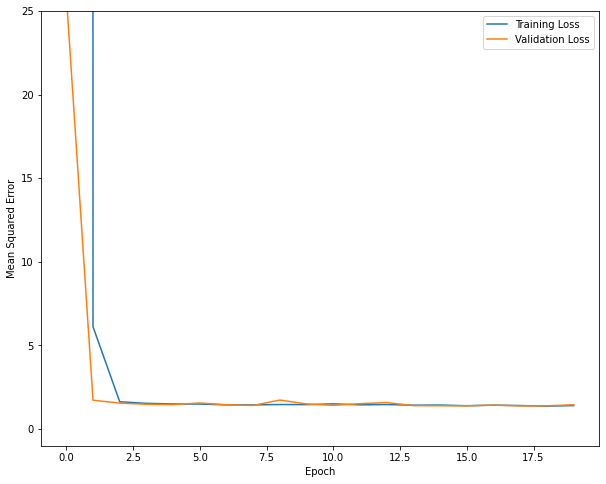

In [ ]:
# plotting of loss curve
plt.figure(figsize=(10, 8))
plt.plot(simple_nn_8.history['loss'], label="Training Loss")
plt.plot(simple_nn_8.history['val_loss'], label="Validation Loss")
plt.legend()
plt.ylim(-1, 25)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")

### evaluate the model on X_test

In [ ]:
nn_eval_simple = model_deep.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE is: " + str(mean_squared_error(y_test,nn_eval_simple)))
from sklearn.metrics import mean_absolute_percentage_error
print("MAPE is: " +  str(100 - 100*mean_absolute_percentage_error(y_test,nn_eval_simple)))

MSE is: 1.4611612400487717
MAPE is: 82.00965999724863


# Hyperparameter tuning

## create the neural network model for 1 hidden layer

In [ ]:
def baseline_model_hyper(activation, optimizer, learning_rate, layers):
	# create model
  if optimizer == 'adam':
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  elif optimizer == 'rms':
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
  else:
    # SGD
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
  
  if activation == "leakyRelu":
    activation = tf.keras.layers.LeakyReLU(alpha=0.01)
  elif activation == "softmax":
    activation = tf.keras.activations.softmax
  elif activation == "sigmoid":
    activation = tf.keras.activations.sigmoid
  elif activation == "tanh":
    activation = tf.keras.activations.tanh
  model = Sequential()

  # Define the hidden layers
  for index, layer in enumerate(layers):
    if index == 0:
      #print("first hidden layer: " + str(layer))
      # code below adds the first Dense layer is doing 2 things, 
      # defining the input or visible layer and the first hidden layer.
      model.add(tf.keras.layers.Dense(layer, input_dim=X_train.shape[1], activation=activation)) 
                                      #kernel_regularizer=tf.keras.regularizers.l1(0.04)))
      #model.add(tf.keras.layers.Dropout(rate=0.25)) 
    else:
      #print(str(index) + " hidden layer: " + str(layer))
      model.add(tf.keras.layers.Dense(units=layer, activation= activation, 
                                      #kernel_regularizer=tf.keras.regularizers.l1(0.04),
                                    name=f'Hidden{index}'))
      #model.add(tf.keras.layers.Dropout(rate=0.25)) 
   
  # Define the output layer.
  model.add(Dense(units=1, name='Output'))  
  # Compile model
  #tf.keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(optimizer=optimizer,
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()]) 
  return model

In [ ]:
layer_1 = np.arange(1, 101, 1).tolist()
layer_1

inner = []
list_layer_1 = []
for x in layer_1:
  inner = []
  inner.append(x)
  list_layer_1.append(inner)
list_layer_1

[[1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [25],
 [26],
 [27],
 [28],
 [29],
 [30],
 [31],
 [32],
 [33],
 [34],
 [35],
 [36],
 [37],
 [38],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45],
 [46],
 [47],
 [48],
 [49],
 [50],
 [51],
 [52],
 [53],
 [54],
 [55],
 [56],
 [57],
 [58],
 [59],
 [60],
 [61],
 [62],
 [63],
 [64],
 [65],
 [66],
 [67],
 [68],
 [69],
 [70],
 [71],
 [72],
 [73],
 [74],
 [75],
 [76],
 [77],
 [78],
 [79],
 [80],
 [81],
 [82],
 [83],
 [84],
 [85],
 [86],
 [87],
 [88],
 [89],
 [90],
 [91],
 [92],
 [93],
 [94],
 [95],
 [96],
 [97],
 [98],
 [99],
 [100]]

In [ ]:
learning_rate = [0.5, 0.4, 0.3, 0.2, 0.1, 0.05, .01, 0.001, 0.0001 , 0.00001]
learning_rate

[0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.001, 0.0001, 1e-05]

In [ ]:
# Defining grid parameters
activation = ['softmax', 'relu', 'tanh', 'sigmoid', 'leakyRelu']
#neurons = np.arange(10, 210, 1).tolist()
optimizer = ['SGD', 'Adam', 'rms']
# number of epochs is a hyperparameter that defines the number times that the 
#learning algorithm will work through the entire training dataset.
epochs = np.arange(1, 100, 1).tolist()

# batch size defines the number of samples that will be propagated through the network.
batches = [16, 32,64, 128, 256, 512, 1024]
param_grid = {}
param_grid = dict(activation = activation, optimizer = optimizer, 
                  epochs = epochs, batch_size = batches, learning_rate = learning_rate, layers = list_layer_1)

CPU times: user 27 µs, sys: 11 µs, total: 38 µs
Wall time: 54.8 µs


In [ ]:
%%time
from tensorflow import keras
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_fn= baseline_model_hyper)

cv = KFold(n_splits = 5)
model = RandomizedSearchCV(estimator= keras_reg, cv = cv, param_distributions=param_grid, n_jobs=-1, n_iter = 50)
nn_result = model.fit(X_train,y_train)

print("Max Accuracy Registered: {} using {}".format(round(model.best_score_,3), 
                                                   model.best_params_))

2022-04-11 18:44:47.806905: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-11 18:44:47.807115: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-11 18:44:47.807931: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the ap

Epoch 1/44
Epoch 1/31
Epoch 1/31
Epoch 1/44
Epoch 1/44
Epoch 1/31
Epoch 1/44
Epoch 1/44
91/91 [==============================] - 1s 2ms/step - loss: 2.3879 - mean_squared_error: 2.3879
Epoch 2/44
91/91 [==============================] - 1s 2ms/step - loss: 2.3263 - mean_squared_error: 2.3263
Epoch 2/44
91/91 [==============================] - 0s 3ms/step - loss: 1.7047 - mean_squared_error: 1.7047
Epoch 2/44
Epoch 3/44
40/91 [============>.................] - ETA: 0s - loss: 1.7049 - mean_squared_error: 1.7049Epoch 2/31
Epoch 2/31
91/91 [==============================] - 0s 3ms/step - loss: 1.7037 - mean_squared_error: 1.7037
Epoch 2/31
91/91 [==============================] - 0s 4ms/step - loss: 1.7047 - mean_squared_error: 1.7047
Epoch 4/44
91/91 [==============================] - 0s 3ms/step - loss: 1.7106 - mean_squared_error: 1.7106
Epoch 3/44
91/91 [==============================] - 0s 3ms/step - ls: 45.6132 - mean_squared_error: 45.61oss: 1.7130 - mean_squared_error: 1.7130
Epoc

182/182 [===================>..........] - ETA: 0s - loss: 27.5561 - mean_squared_error: 27.55=======================] - 1s 3ms/step - loss: 30.2742 - mean_squared_error: 30.2742
Epoch 6/31
91/91 [==============================] - 0s 3ms/step - loss: 1.7133 - mean_squared_error: 1.7133
Epoch 11/44
91/91 [==============================] - 0s 3ms/step - loss: 1.7101 - mean_squared_error: 1.7101
Epoch 10/44
182/182 [==============================] - 1s 3ms/step - loss: 26.9824 - mean_squared_error: 26.9824
Epoch 6/31
91/91 [==============================] - 0s 3ms/step - loss: 1.6978 - mean_squared_error: 1.6978
Epoch 11/44
91/91 [==============================] - 0s 3ms/step - loss: 1.7046 - mean_squared_error: 1.7046
Epoch 12/44
91/91 [==============================] - 0s 4ms/step - loss: 1.7035 - mean_squared_error: 1.7035
Epoch 11/44
91/91 [==============================] - 0s 4ms/step - loss: 1.7129 - mean_squared_error: 1.7129
Epoch 11/44
Epoch 12/44
91/91 [=========================

91/91 [==============================] - 0s 4ms/step - loss: 1.7036 - mean_squared_error: 1.7036
Epoch 19/44
91/91 [==============================] - 0s 3ms/step - loss: 1.7106 - mean_squared_error: 1.7106
Epoch 19/44
91/91 [==============================] - 0s 3ms/step - loss: 1.6977 - mean_squared_error: 1.6977
Epoch 20/44
91/91 [==============================] - 0s 3ms/step - loss: 1.7044 - mean_squared_error: 1.7044
Epoch 21/44
182/182 [==============================] - 1s 3ms/step - loss: 18.8647 - mean_squared_error: 18.8647
Epoch 20/44
Epoch 11/31


91/91 [==============================] - 0s 3ms/step - loss: 1.7100 - mean_squared_error: 1.7100
Epoch 20/44
91/91 [==============================] - 0s 3ms/step - loss: 1.7129 - mean_squared_error: 1.7129
Epoch 21/44
182/182 [==============================] - 1s 3ms/step - loss: 14.3622 - mean_squared_error: 14.3622
Epoch 11/31
91/91 [==============================] - 0s 3ms/step - loss: 1.7043 - mean_squared_error: 1.7043
Epoch 22/44
91/91 [==============================] - 0s 3ms/step - loss: 1.7042 - mean_squared_error: 1.7042
Epoch 21/44


91/91 [==============================] - 0s 3ms/step - loss: 1.7128 - mean_squared_error: 1.7128
Epoch 22/44
91/91 [==============================] - 0s 4ms/step - loss: 1.7102 - mean_squared_error: 1.7102
Epoch 21/44
182/182 [==============================] - 1s 3ms/step - loss: 10.1186 - mean_squared_error: 10.1186
Epoch 12/31
182/182 [==============================] - 1s 3ms/step - loss: 17.2017 - mean_squared_error: 17.2017
Epoch 12/31


91/91 [==============================] - 0s 3ms/step - loss: 1.7037 - mean_squared_error: 1.7037
Epoch 22/44
91/91 [==============================] - 0s 3ms/step - loss: 1.7101 - mean_squared_error: 1.7101
Epoch 22/44
182/182 [==============================] - 1s 3ms/step - loss: 12.7270 - mean_squared_error: 12.7270
Epoch 12/31
91/91 [==============================] - 0s 3ms/step - loss: 1.6972 - mean_squared_error: 1.6972
Epoch 23/44
91/91 [==============================] - 0s 3ms/step - loss: 1.7042 - mean_squared_error: 1.7042
Epoch 24/44
91/91 [==============================] - 0s 3ms/step - loss: 1.7042 - mean_squared_error: 1.7042
Epoch 23/44
91/91 [==============================] - 0s 3ms/step - loss: 1.6978 - mean_squared_error: 1.6978
Epoch 24/44
91/91 [==============================] - 0s 3ms/step - loss: 1.7048 - mean_squared_error: 1.7048
Epoch 25/44
109/182 [================>.............] - ETA: 0s - loss: 11.5112 - mean_squared_error: 11.5112Epoch 13/31
Epoch 24/44
182/

182/182 [==============================] - 1s 4ms/step - loss: 5.9214 - mean_squared_error: 5.9214
Epoch 17/31
91/91 [==============================] - 0s 3ms/step - loss: 1.7123 - mean_squared_error: 1.7123
Epoch 33/44
91/91 [==============================] - 0s 3ms/step - loss: 1.7102 - mean_squared_error: 1.7102
Epoch 32/44
91/91 [==============================] - 0s 3ms/step - loss: 1.6978 - mean_squared_error: 1.6978
Epoch 33/44
91/91 [==============================] - 0s 3ms/step - loss: 1.7043 - mean_squared_error: 1.7043
Epoch 34/44
91/91 [==============================] - 0s 3ms/step - loss: 1.7133 - mean_squared_error: 1.7133
Epoch 34/44
91/91 [==============================] - 0s 3ms/step - loss: 1.7107 - mean_squared_error: 1.7107
Epoch 33/44
91/91 [==============================] - 0s 3ms/step - loss: 1.6977 - mean_squared_error: 1.6977
Epoch 34/44
182/182 [==============================] - 1s 3ms/step - loss: 10.1116 - mean_squared_error: 10.1116
Epoch 18/31
91/91 [======

91/91 [==============================] - 0s 3ms/step - loss: 1.7050 - mean_squared_error: 1.7050
Epoch 43/44
91/91 [==============================] - 0s 4ms/step - loss: 1.7037 - mean_squared_error: 1.7037
Epoch 42/44
91/91 [==============================] - 0s 3ms/step - loss: 1.7129 - mean_squared_error: 1.7129
Epoch 43/44
91/91 [==============================] - 0s 3ms/step - loss: 1.7108 - mean_squared_error: 1.7108
Epoch 42/44
91/91 [==============================] - 0s 3ms/step - loss: 1.6981 - mean_squared_error: 1.6981
Epoch 43/44
182/182 [==============================] - 1s 3ms/step - loss: 4.4686 - mean_squared_error: 4.4686
Epoch 22/31
91/91 [==============================] - 0s 3ms/step - loss: 1.7043 - mean_squared_error: 1.7043
Epoch 44/44
91/91 [==============================] - 0s 2ms/step - loss: 1.7037 - mean_squared_error: 1.7037
Epoch 43/44
91/91 [==============================] - 0s 3ms/step - loss: 1.7130 - mean_squared_error: 1.7130
Epoch 44/44
91/91 [==========

182/182 [==============================] - 0s 2ms/step - loss: 8.0783 - mean_squared_error: 8.0783
Epoch 6/31
182/182 [==============================] - 0s 2ms/step - loss: 7.5529 - mean_squared_error: 7.5529
Epoch 7/31
182/182 [==============================] - 0s 2ms/step - loss: 7.2539 - mean_squared_error: 7.2539
Epoch 7/31
364/364 [==============================] - 1s 2ms/step - loss: 1.7542 - mean_squared_error: 1.7542
Epoch 4/18
182/182 [==============================] - 0s 2ms/step - loss: 6.6163 - mean_squared_error: 6.6163
Epoch 8/31
364/364 [==============================] - 1s 2ms/step - loss: 588.9062 - mean_squared_error: 588.9062
Epoch 4/18
182/182 [==============================] - 0s 2ms/step - loss: 6.5359 - mean_squared_error: 6.5359
Epoch 8/31
182/182 [==============================] - 0s 2ms/step - loss: 5.8300 - mean_squared_error: 5.8300
Epoch 9/31
182/182 [==============================] - 0s 2ms/step - loss: 5.9107 - mean_squared_error: 5.9107
Epoch 9/31
182/18

Epoch 11/18
364/364 [==============================] - 1s 3ms/step - loss: 1.7413 - mean_squared_error: 1.7413
Epoch 6/18
182/182 [==============================] - 1s 4ms/step - loss: 2.3946 - mean_squared_error: 2.3946
Epoch 22/31
182/182 [==============================] - 1s 4ms/step - loss: 2.0678 - mean_squared_error: 2.0678
Epoch 23/31
364/364 [==============================] - 1s 4ms/step - loss: 1.7493 - mean_squared_error: 1.7493
Epoch 7/18
182/182 [==============================] - 1s 4ms/step - loss: 2.3045 - mean_squared_error: 2.3045
Epoch 23/31
364/364 [==============================] - 1s 4ms/step - loss: 1.7479 - mean_squared_error: 1.7479
Epoch 24/31
Epoch 12/18
364/364 [==============================] - 1s 4ms/step - loss: 1.7461 - mean_squared_error: 1.7461_squared_error: 307841829199491242995482624.0000
Epoch 7/18
364/364 [==============================] - 1s 4ms/step - loss: 1.7601 - mean_squared_error: 1.7601
Epoch 12/18
182/182 [==============================] - 

182/182 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 12/34
364/364 [==============================] - 1s 2ms/step - loss: 1.7503 - mean_squared_error: 1.7503
Epoch 13/18
364/364 [==============================] - 1s 2ms/step - loss: 1.7612 - mean_squared_error: 1.7612
Epoch 13/18
364/364 [==============================] - 1s 2ms/step - loss: 1.7538 - mean_squared_error: 1.7538
Epoch 18/18
364/364 [==============================] - 1s 2ms/step - loss: 1.7463 - mean_squared_error: 1.7463
Epoch 13/18
364/364 [==============================] - 1s 2ms/step - loss: 1.7599 - mean_squared_error: 1.7599
Epoch 18/18
182/182 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 14/34
364/364 [==============================] - 1s 2ms/step - loss: 1.7491 - mean_squared_error: 1.7491
Epoch 14/18
182/182 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 15/34
364/364 [==========

182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 3/34
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 3/34
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 26/34
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 10/34
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 11/34
182/182 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 4/34
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 4/34
182/182 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 27/34
182/182 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 11/34
182/182 [==============================] - 0s 3ms/step - lo

728/728 [==============================] - 4s 3ms/step - loss: 2658711.2500 - mean_squared_error: 2658711.2500
Epoch 2/30
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 16/34
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan40
Epoch 16/34
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 24/34
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 17/34
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 17/34
182/182 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 24/34
182/182 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 25/34
182/182 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 18/34
182/182 [===========================

182/182 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 29/34
728/728 [==============================] - 2s 3ms/step - loss: 1.7878 - mean_squared_error: 1.7878
Epoch 3/30
182/182 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 30/34
182/182 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 31/34
182/182 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 31/34
728/728 [==============================] - 2s 2ms/step - loss: 1.7864 - mean_squared_error: 1.7864
Epoch 6/30
728/728 [==============================] - 2s 2ms/step - loss: 1.7822 - mean_squared_error: 1.7822
Epoch 6/30
182/182 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 32/34
182/182 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 32/34
182/182 [==============================]

728/728 [==============================] - 2s 3ms/step - loss: 1.7710 - mean_squared_error: 1.7710
Epoch 8/30
2909/2909 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 3/39
728/728 [==============================] - 2s 2ms/step - loss: 1.7801 - mean_squared_error: 1.7801
Epoch 15/30
728/728 [==============================] - 2s 2ms/step - loss: 1.7875 - mean_squared_error: 1.7875
Epoch 15/30
728/728 [==============================] - 2s 2ms/step - loss: 1.7839 - mean_squared_error: 1.7839
Epoch 15/30
728/728 [==============================] - 2s 2ms/step - loss: 1.7740 - mean_squared_error: 1.7740
Epoch 9/30
728/728 [==============================] - 2s 2ms/step - loss: 1.7892 - mean_squared_error: 1.7892
Epoch 13/30
2910/2910 [==============================] - 8s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 2/39
728/728 [==============================] - 2s 2ms/step - loss: 1.7788 - mean_squared_error: 1.7788
Epoch 16/30
728/728 [====

2910/2910 [==============================] - 10s 3ms/step - loss: nan - mean_squared_error: nanr: 295033952.
Epoch 8/39
2910/2910 [==============================] - 10s 4ms/step - loss: nan - mean_squared_error: nanr: 311089952.00
Epoch 9/39
2909/2909 [==============================] - 11s 4ms/step - loss: 319898752.0000 - mean_squared_error: 319898752.0000
Epoch 3/11
2909/2909 [==============================] - 10s 3ms/step - loss: nan - mean_squared_error: nanr: 413941632.000
Epoch 10/39
2910/2910 [==============================] - 10s 4ms/step - loss: nan - mean_squared_error: nanr: 411278784.00
Epoch 9/39
2910/2910 [==============================] - 10s 4ms/step - loss: nan - mean_squared_error: nanr: 398526208.00
Epoch 10/39
2910/2910 [==============================] - 11s 4ms/step - loss: 405270016.0000 - mean_squared_error: 405270016.0000
Epoch 3/11
2910/2910 [==============================] - 10s 3ms/step - loss: nan - mean_squared_error: nanr: 391972320.00
Epoch 4/39
2910/2910

2909/2909 [==============================] - 7s 2ms/step - loss: 554797632.0000 - mean_squared_error: 554797632.0000
Epoch 9/11
2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nanor: 360254976.00
Epoch 15/39
2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nanor: 408477920.00
Epoch 16/39
2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nanor: 360684352.00
Epoch 10/39
2910/2910 [==============================] - 8s 3ms/step - loss: 363253824.0000 - mean_squared_error: 363253824.0000
Epoch 8/11
2910/2910 [==============================] - 7s 3ms/step - loss: nan - mean_squared_error: nanor: 412184672.0000
Epoch 10/39
2910/2910 [==============================] - 8s 3ms/step - loss: 400051136.0000 - mean_squared_error: 400051136.0000
Epoch 9/11
2909/2909 [==============================] - 8s 3ms/step - loss: nan - mean_squared_error: nanor: 536001088.00
Epoch 17/39

2910/2910 [==============================] - 8s 3ms/step - loss: nan - mean_squared_error: nanor: 396036032.00
Epoch 18/39
2909/2909 [==============================] - 8s 3ms/step - loss: nan - mean_squared_error: nanor: 371326528.00
Epoch 25/39
2910/2910 [==============================] - 8s 3ms/step - loss: 433456320.0000 - mean_squared_error: 433456320.0000
Epoch 5/11
46/46 [==============================] - 3s 3ms/step - loss: nan - mean_squared_error: nan_error: 592072384.00                  
Epoch 2/8
46/46 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan_error: 288721312.00
Epoch 3/8
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan_error: 573090880.00
Epoch 4/8
2910/2910 [==============================] - 9s 3ms/step - loss: nan - mean_squared_error: nanor: 543237760.00
Epoch 24/39
46/46 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan_error: 272412320.00
Epoch 7/8
4

2910/2910 [==============================] - 8s 3ms/step - loss: nan - mean_squared_error: nanor: 428904448.00
Epoch 27/39
2910/2910 [==============================] - 8s 3ms/step - loss: nan - mean_squared_error: nanor: 400123872.00
Epoch 21/39
2910/2910 [==============================] - 8s 3ms/step - loss: nan - mean_squared_error: nanor: 356251008.00
Epoch 21/39
2909/2909 [==============================] - 8s 3ms/step - loss: nan - mean_squared_error: nanor: 351693696.00
Epoch 28/39
46/46 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan_error: 342690848.0000                        
Epoch 2/8
46/46 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan_error: 341012448.
Epoch 3/8
46/46 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan_error: 360162688.00
Epoch 4/8
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan_error: 351973600.00
Epoch 5/8


182/182 [==============================] - 1s 4ms/step - loss: 1.7118 - mean_squared_error: 1.7118
Epoch 9/33
182/182 [==============================] - 1s 4ms/step - loss: 1.7169 - mean_squared_error: 1.7169
Epoch 23/33
182/182 [==============================] - 1s 4ms/step - loss: 1.7255 - mean_squared_error: 1.7255
Epoch 20/33
2910/2910 [==============================] - 10s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 33/39
182/182 [==============================] - 1s 4ms/step - loss: 1.7120 - mean_squared_error: 1.7120
Epoch 10/33
182/182 [==============================] - 1s 4ms/step - loss: 1.7127 - mean_squared_error: 1.7127
Epoch 24/33
182/182 [==============================] - 1s 4ms/step - loss: 1.7122 - mean_squared_error: 1.7122
Epoch 11/33
182/182 [==============================] - 1s 4ms/step - loss: 1.7147 - mean_squared_error: 1.7147
Epoch 25/33
182/182 [==============================] - 1s 4ms/step - loss: 1.7224 - mean_squared_error: 1.7224
Epoch 22/33
2910/

2910/2910 [==============================] - 11s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 35/39
182/182 [==============================] - 1s 5ms/step - loss: 1.7087 - mean_squared_error: 1.7087
Epoch 23/33
182/182 [==============================] - 1s 5ms/step - loss: 1.7179 - mean_squared_error: 1.7179
Epoch 26/33
182/182 [==============================] - 1s 3ms/step - loss: 1.7073 - mean_squared_error: 1.7073
Epoch 24/33
182/182 [==============================] - 1s 3ms/step - loss: 1.7200 - mean_squared_error: 1.7200
Epoch 27/33
2910/2910 [==============================] - 12s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 36/39
182/182 [==============================] - 1s 4ms/step - loss: 1.7081 - mean_squared_error: 1.7081
Epoch 25/33
182/182 [==============================] - 1s 4ms/step - loss: 1.7187 - mean_squared_error: 1.7187
Epoch 28/33
2910/2910 [==============================] - 11s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 30/39
728/728 [=

2910/2910 [==============================] - 8s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 38/39
728/728 [==============================] - 2s 3ms/step - loss: 25.4800 - mean_squared_error: 25.4800
Epoch 16/49
728/728 [==============================] - 2s 3ms/step - loss: 29.6579 - mean_squared_error: 29.6579
Epoch 8/49
728/728 [==============================] - 2s 3ms/step - loss: 11.2789 - mean_squared_error: 11.2789
Epoch 9/49
2910/2910 [==============================] - 8s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 39/39
2910/2910 [==============================] - 8s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 33/39
728/728 [==============================] - 2s 3ms/step - loss: 28.8544 - mean_squared_error: 28.8544
Epoch 9/49
2910/2910 [==============================] - 8s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 33/39
728/728 [==============================] - 2s 2ms/step - loss: 24.1347 - mean_squared_error: 24.1347
Epoch 18/49
728/728 [=

728/728 [==============================] - 2s 3ms/step - loss: 35.8496 - mean_squared_error: 35.8496
Epoch 5/49
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan54
Epoch 3/9
728/728 [==============================] - 2s 3ms/step - loss: 18.4678 - mean_squared_error: 18.4678
Epoch 28/49
728/728 [==============================] - 2s 3ms/step - loss: 21.4104 - mean_squared_error: 21.4104
Epoch 20/49
728/728 [==============================] - 2s 3ms/step - loss: 8.4574 - mean_squared_error: 8.4574
Epoch 21/49
728/728 [==============================] - 2s 3ms/step - loss: 25.3493 - mean_squared_error: 25.3493
Epoch 9/49
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan96
Epoch 6/9
2910/2910 [==============================] - 8s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 36/39
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan01
Epoch 7/9
728/728 [========

728/728 [==============================] - 2s 3ms/step - loss: 14.9837 - mean_squared_error: 14.9837
Epoch 36/49
182/182 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan67
Epoch 2/9
728/728 [==============================] - 2s 3ms/step - loss: 17.3147 - mean_squared_error: 17.3147
Epoch 28/49
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan04
Epoch 3/9
2910/2910 [==============================] - 9s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 38/39
728/728 [==============================] - 2s 3ms/step - loss: 27.9755 - mean_squared_error: 27.9755
Epoch 14/49
182/182 [==============================] - 1s 4ms/step - loss: nan - mean_squared_error: nan675
Epoch 4/9
728/728 [==============================] - 2s 3ms/step - loss: 14.6025 - mean_squared_error: 14.6025
Epoch 37/49
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan41
Epoch 5/9
182/182 [===========

728/728 [==============================] - 2s 2ms/step - loss: 6.0702 - mean_squared_error: 6.0702
Epoch 36/49
728/728 [==============================] - 2s 2ms/step - loss: 16.9831 - mean_squared_error: 16.9831
Epoch 24/49
728/728 [==============================] - 2s 2ms/step - loss: 14.4359 - mean_squared_error: 14.4359
Epoch 35/49
728/728 [==============================] - 2s 2ms/step - loss: 23.1296 - mean_squared_error: 23.1296
Epoch 21/49
728/728 [==============================] - 2s 2ms/step - loss: 12.2238 - mean_squared_error: 12.2238
Epoch 44/49
728/728 [==============================] - 2s 3ms/step - loss: 16.5448 - mean_squared_error: 16.5448
Epoch 25/49
728/728 [==============================] - 2s 3ms/step - loss: 5.9451 - mean_squared_error: 5.9451
Epoch 37/49
728/728 [==============================] - 2s 3ms/step - loss: 14.0705 - mean_squared_error: 14.0705
Epoch 36/49
728/728 [==============================] - 2s 3ms/step - loss: 22.5144 - mean_squared_error: 22.5144

728/728 [==============================] - 2s 3ms/step - loss: 17.7149 - mean_squared_error: 17.7149
Epoch 31/49
728/728 [==============================] - 2s 3ms/step - loss: 11.2193 - mean_squared_error: 11.2193
Epoch 45/49
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan94
Epoch 18/19
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan90
Epoch 7/19
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan85
Epoch 19/19
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan3461
Epoch 8/19
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan29
Epoch 9/19
728/728 [==============================] - 2s 3ms/step - loss: 12.7970 - mean_squared_error: 12.7970
Epoch 35/49
728/728 [==============================] - 2s 3ms/step - loss: 4.8757 - mean_squared_error: 4.8757
Epoch 47/49
182/182 [=======

46/46 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan5.63
Epoch 1/8
182/182 [==============================] - 1s 4ms/step - loss: nan - mean_squared_error: nan22
Epoch 13/19
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan59
Epoch 14/19
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan59
Epoch 15/19
728/728 [==============================] - 2s 3ms/step - loss: 11.5779 - mean_squared_error: 11.5779
Epoch 39/49
46/46 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan9257       
Epoch 2/8
46/46 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan1.39
Epoch 3/8
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan41
Epoch 16/19
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.39
Epoch 4/8
728/728 [=======================

91/91 [==============================] - 0s 4ms/step - loss: 1.7090 - mean_squared_error: 1.7090
Epoch 5/21
91/91 [==============================] - 2s 4ms/step - loss: 2.2266 - mean_squared_error: 2.2266
Epoch 2/21
91/91 [==============================] - 0s 5ms/step - loss: 1.7081 - mean_squared_error: 1.7081
Epoch 10/21
91/91 [==============================] - 2s 4ms/step - loss: 2.2142 - mean_squared_error: 2.2142
Epoch 2/21
91/91 [==============================] - 0s 5ms/step - loss: 1.7175 - mean_squared_error: 1.7175
Epoch 9/21
91/91 [==============================] - 0s 5ms/step - loss: 1.7090 - mean_squared_error: 1.7090
Epoch 6/21
91/91 [==============================] - 0s 5ms/step - loss: 1.7039 - mean_squared_error: 1.7039
Epoch 3/21
91/91 [==============================] - 0s 5ms/step - loss: 1.7056 - mean_squared_error: 1.7056
Epoch 11/21
728/728 [==============================] - 2s 3ms/step - loss: 10.4927 - mean_squared_error: 10.4927
Epoch 43/49
91/91 [==============

364/364 [==============================] - 2s 3ms/step - loss: 12.4821 - mean_squared_error: 12.4821
Epoch 2/38
1455/1455 [==============================] - 4s 2ms/step - loss: 15.8248 - mean_squared_error: 15.8248
Epoch 3/45
364/364 [==============================] - 1s 3ms/step - loss: 1.7037 - mean_squared_error: 1.703717
Epoch 3/38
1455/1455 [==============================] - 4s 3ms/step - loss: 113.0709 - mean_squared_error: 113.0709
Epoch 3/45
364/364 [==============================] - 1s 3ms/step - loss: 1.7042 - mean_squared_error: 1.704278
Epoch 4/38
1455/1455 [==============================] - 4s 3ms/step - loss: 1219.7853 - mean_squared_error: 1219.7853
Epoch 4/45
1455/1455 [==============================] - 4s 3ms/step - loss: 1880.3297 - mean_squared_error: 1880.3297
Epoch 3/45
364/364 [==============================] - 1s 3ms/step - loss: 1.7040 - mean_squared_error: 1.704059
Epoch 5/38
364/364 [==============================] - 1s 3ms/step - loss: 1.7039 - mean_squared_e

364/364 [==============================] - 1s 3ms/step - loss: 1.7041 - mean_squared_error: 1.7041291
Epoch 20/38
1455/1455 [==============================] - 4s 3ms/step - loss: 393.6941 - mean_squared_error: 393.6941
Epoch 7/45
364/364 [==============================] - 1s 3ms/step - loss: 1.7047 - mean_squared_error: 1.704779
Epoch 4/38
364/364 [==============================] - 1s 3ms/step - loss: 1.7040 - mean_squared_error: 1.704063
Epoch 21/38
364/364 [==============================] - 1s 3ms/step - loss: 1.7133 - mean_squared_error: 1.713373
Epoch 15/38
1455/1455 [==============================] - 4s 3ms/step - loss: 64.7696 - mean_squared_error: 64.7696
Epoch 8/45
364/364 [==============================] - 1s 3ms/step - loss: 1.7036 - mean_squared_error: 1.703618
Epoch 22/38
364/364 [==============================] - 1s 3ms/step - loss: 1.7135 - mean_squared_error: 1.713581
Epoch 16/38
364/364 [==============================] - 1s 3ms/step - loss: 1.7050 - mean_squared_error: 

364/364 [==============================] - 2s 4ms/step - loss: 1.7050 - mean_squared_error: 1.70506771
Epoch 33/38
364/364 [==============================] - 2s 5ms/step - loss: 1.7104 - mean_squared_error: 1.71044773
Epoch 7/38
1455/1455 [==============================] - 5s 3ms/step - loss: 12010.2939 - mean_squared_error: 12010.2939
Epoch 15/45
364/364 [==============================] - 1s 4ms/step - loss: 1.7054 - mean_squared_error: 1.70544225 
Epoch 34/38
1455/1455 [==============================] - 5s 3ms/step - loss: 17047.1133 - mean_squared_error: 17047.1133
Epoch 16/45
364/364 [==============================] - 1s 3ms/step - loss: 1.7107 - mean_squared_error: 1.71073603
Epoch 8/38
1455/1455 [==============================] - 5s 3ms/step - loss: 100.1438 - mean_squared_error: 100.1438
Epoch 15/45
364/364 [==============================] - 1s 3ms/step - loss: 1.7108 - mean_squared_error: 1.71082.17
Epoch 9/38
364/364 [==============================] - 1s 3ms/step - loss: 1.705

364/364 [==============================] - 1s 2ms/step - loss: 1.6980 - mean_squared_error: 1.69800.06
Epoch 10/38
364/364 [==============================] - 1s 2ms/step - loss: 1.7108 - mean_squared_error: 1.71082.84
Epoch 26/38
1455/1455 [==============================] - 3s 2ms/step - loss: 1724.8761 - mean_squared_error: 1724.8761
Epoch 20/45
1455/1455 [==============================] - 3s 2ms/step - loss: 13540.0039 - mean_squared_error: 13540.0039
Epoch 21/45
364/364 [==============================] - 1s 3ms/step - loss: 1.7105 - mean_squared_error: 1.710507
Epoch 27/38
1455/1455 [==============================] - 3s 2ms/step - loss: 47.4253 - mean_squared_error: 47.4253
Epoch 20/45
364/364 [==============================] - 1s 3ms/step - loss: 1.6978 - mean_squared_error: 1.697801
Epoch 12/38
364/364 [==============================] - 1s 3ms/step - loss: 1.7109 - mean_squared_error: 1.71099444
Epoch 28/38
1455/1455 [==============================] - 3s 2ms/step - loss: 118.1364 

1455/1455 [==============================] - 3s 2ms/step - loss: 191.9308 - mean_squared_error: 191.9308
Epoch 25/45
364/364 [==============================] - 1s 3ms/step - loss: 1.6982 - mean_squared_error: 1.69828851
Epoch 31/38
364/364 [==============================] - 1s 3ms/step - loss: 1.6979 - mean_squared_error: 1.69797.25
Epoch 32/38
1455/1455 [==============================] - 4s 3ms/step - loss: 455.4572 - mean_squared_error: 455.4572
Epoch 26/45
364/364 [==============================] - 1s 3ms/step - loss: 1.6982 - mean_squared_error: 1.69824925
Epoch 33/38
1455/1455 [==============================] - 4s 3ms/step - loss: 17706.8848 - mean_squared_error: 17706.8848
Epoch 26/45
364/364 [==============================] - 1s 2ms/step - loss: 1.6978 - mean_squared_error: 1.69789.39
Epoch 34/38
1455/1455 [==============================] - 4s 3ms/step - loss: 22726.9531 - mean_squared_error: 22726.9531
Epoch 27/45
1455/1455 [==============================] - 4s 3ms/step - loss:

1455/1455 [==============================] - 4s 3ms/step - loss: 24619.1621 - mean_squared_error: 24619.1621
Epoch 33/45
1455/1455 [==============================] - 4s 3ms/step - loss: 25503.8789 - mean_squared_error: 25503.8789
Epoch 34/45
1455/1455 [==============================] - 4s 3ms/step - loss: 1575.9578 - mean_squared_error: 1575.9578
Epoch 33/45
1455/1455 [==============================] - 4s 3ms/step - loss: 230.0697 - mean_squared_error: 230.0697
Epoch 34/45
1455/1455 [==============================] - 4s 3ms/step - loss: 1123.3672 - mean_squared_error: 1123.3672
Epoch 34/45
1455/1455 [==============================] - 4s 3ms/step - loss: 32.5735 - mean_squared_error: 32.5735
Epoch 35/45
1455/1455 [==============================] - 4s 3ms/step - loss: 30217.9004 - mean_squared_error: 30217.9004
Epoch 36/45
1455/1455 [==============================] - 4s 3ms/step - loss: 913.7714 - mean_squared_error: 913.7714
Epoch 35/45
1455/1455 [==============================] - 4s 3m

182/182 [==============================] - 1s 3ms/step - loss: 1.8864 - mean_squared_error: 1.8864
Epoch 6/37
182/182 [==============================] - 1s 3ms/step - loss: 1.8772 - mean_squared_error: 1.8772
Epoch 8/37
182/182 [==============================] - 1s 3ms/step - loss: 1.8918 - mean_squared_error: 1.8918
Epoch 7/37
182/182 [==============================] - 1s 3ms/step - loss: 1.8969 - mean_squared_error: 1.8969
Epoch 8/37
182/182 [==============================] - 1s 3ms/step - loss: 1.8698 - mean_squared_error: 1.8698
Epoch 10/37
2909/2909 [==============================] - 7s 2ms/step - loss: 47.6837 - mean_squared_error: 47.6837
Epoch 13/24
182/182 [==============================] - 1s 3ms/step - loss: 1.8772 - mean_squared_error: 1.8772
Epoch 9/37
2910/2910 [==============================] - 7s 2ms/step - loss: 47.8003 - mean_squared_error: 47.8003
Epoch 12/24
182/182 [==============================] - 1s 3ms/step - loss: 1.8775 - mean_squared_error: 1.8775
Epoch 11/3

182/182 [==============================] - 1s 4ms/step - loss: 1.8710 - mean_squared_error: 1.8710
Epoch 12/37
182/182 [==============================] - 1s 4ms/step - loss: 1.8938 - mean_squared_error: 1.8938
Epoch 16/37
182/182 [==============================] - 1s 4ms/step - loss: 1.8785 - mean_squared_error: 1.8785
Epoch 18/37
182/182 [==============================] - 1s 4ms/step - loss: 1.8660 - mean_squared_error: 1.8660
Epoch 13/37
182/182 [==============================] - 1s 4ms/step - loss: 1.8878 - mean_squared_error: 1.8878
Epoch 17/37
182/182 [==============================] - 1s 4ms/step - loss: 1.8704 - mean_squared_error: 1.8704
Epoch 19/37
182/182 [==============================] - 1s 4ms/step - loss: 1.8790 - mean_squared_error: 1.8790
Epoch 14/37
182/182 [==============================] - 1s 4ms/step - loss: 1.8823 - mean_squared_error: 1.8823
Epoch 18/37
182/182 [==============================] - 1s 4ms/step - loss: 1.8872 - mean_squared_error: 1.8872
Epoch 20/37
1

182/182 [==============================] - 1s 3ms/step - loss: 1.8851 - mean_squared_error: 1.8851
Epoch 36/37
182/182 [==============================] - 1s 3ms/step - loss: 1.8711 - mean_squared_error: 1.8711
Epoch 31/37
182/182 [==============================] - 1s 3ms/step - loss: 1.8740 - mean_squared_error: 1.8740
Epoch 37/37
182/182 [==============================] - 1s 3ms/step - loss: 1.8724 - mean_squared_error: 1.8724
Epoch 32/37
182/182 [==============================] - 1s 3ms/step - loss: 1.8875 - mean_squared_error: 1.8875
Epoch 36/37
182/182 [==============================] - 1s 3ms/step - loss: 1.8761 - mean_squared_error: 1.8761
Epoch 33/37
182/182 [==============================] - 1s 3ms/step - loss: 1.8845 - mean_squared_error: 1.8845
Epoch 37/37
2909/2909 [==============================] - 10s 3ms/step - loss: 47.7129 - mean_squared_error: 47.7129
Epoch 18/24
182/182 [==============================] - 1s 3ms/step - loss: 1.8667 - mean_squared_error: 1.8667
Epoch 34

2910/2910 [==============================] - 10s 3ms/step - loss: 47.7719 - mean_squared_error: 47.7719
Epoch 20/24
364/364 [==============================] - 2s 4ms/step - loss: nan - mean_squared_error: nan7.8630
Epoch 31/42
364/364 [==============================] - 1s 4ms/step - loss: nan - mean_squared_error: nan7.891
Epoch 27/42
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan7.36
Epoch 32/42
364/364 [==============================] - 1s 4ms/step - loss: nan - mean_squared_error: nan7.68
Epoch 28/42
364/364 [==============================] - 1s 4ms/step - loss: nan - mean_squared_error: nan7.83
Epoch 33/42
2910/2910 [==============================] - 10s 3ms/step - loss: 47.8090 - mean_squared_error: 47.8090
Epoch 11/24
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan7.830
Epoch 33/42
364/364 [==============================] - 1s 4ms/step - loss: nan - mean_squared_error: nan7.47
Epoch 34/42
3

46/46 [==============================] - 0s 3ms/step - loss: 2.2761 - mean_squared_error: 2.2761
Epoch 11/11
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan7.73
Epoch 14/42
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan7.69
Epoch 15/42
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan7.72
Epoch 15/42
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan7.68
Epoch 16/42
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan7.80
Epoch 16/42
2910/2910 [==============================] - 8s 3ms/step - loss: 47.7925 - mean_squared_error: 47.7925
Epoch 15/24
2910/2910 [==============================] - 8s 3ms/step - loss: 47.6949 - mean_squared_error: 47.6949
Epoch 24/24
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan8.72
Epoch 17/42
364/364

91/91 [==============================] - 1s 3ms/step - loss: 33.5251 - mean_squared_error: 33.5251
Epoch 2/18
91/91 [==============================] - 0s 3ms/step - loss: 7.9299 - mean_squared_error: 7.9299
Epoch 13/18
91/91 [==============================] - 0s 3ms/step - loss: 29.2119 - mean_squared_error: 29.2119
Epoch 3/18
2910/2910 [==============================] - 8s 3ms/step - loss: 47.6938 - mean_squared_error: 47.6938
Epoch 16/24
91/91 [==============================] - 0s 3ms/step - loss: 25.4833 - mean_squared_error: 25.4833
Epoch 4/18
91/91 [==============================] - 0s 3ms/step - loss: 6.3564 - mean_squared_error: 6.3564
Epoch 15/18
91/91 [==============================] - 0s 2ms/step - loss: 22.2601 - mean_squared_error: 22.2601
Epoch 5/18
91/91 [==============================] - 0s 3ms/step - loss: 5.7257 - mean_squared_error: 5.7257
Epoch 16/18
91/91 [==============================] - 0s 3ms/step - loss: 19.4737 - mean_squared_error: 19.4737
Epoch 6/18
91/91 [=

364/364 [==============================] - 2s 5ms/step - loss: nan - mean_squared_error: nan7.860
Epoch 35/42
91/91 [==============================] - 1s 6ms/step - loss: 1.7085 - mean_squared_error: 1.70854
Epoch 14/26
91/91 [==============================] - 0s 5ms/step - loss: 1.7155 - mean_squared_error: 1.71553
Epoch 8/26
364/364 [==============================] - 2s 5ms/step - loss: nan - mean_squared_error: nan48.05
Epoch 36/42
91/91 [==============================] - 0s 5ms/step - loss: 1.7076 - mean_squared_error: 1.7076
Epoch 15/26
91/91 [==============================] - 0s 4ms/step - loss: 1.7147 - mean_squared_error: 1.71471
Epoch 9/26
91/91 [==============================] - 0s 4ms/step - loss: 1.7077 - mean_squared_error: 1.70770
Epoch 16/26
91/91 [==============================] - 0s 4ms/step - loss: 1.7156 - mean_squared_error: 1.71569
Epoch 10/26
91/91 [==============================] - 1s 6ms/step - loss: 1.7077 - mean_squared_error: 1.70775
Epoch 17/26
91/91 [======

91/91 [==============================] - 0s 4ms/step - loss: 1.7144 - mean_squared_error: 1.7144
Epoch 7/26
91/91 [==============================] - 0s 4ms/step - loss: 1.7183 - mean_squared_error: 1.7183
Epoch 26/26
91/91 [==============================] - 0s 4ms/step - loss: 1.7091 - mean_squared_error: 1.70918
Epoch 12/26
91/91 [==============================] - 0s 4ms/step - loss: 1.7132 - mean_squared_error: 1.713208
Epoch 8/26
91/91 [==============================] - 1s 6ms/step - loss: 1.7074 - mean_squared_error: 1.70745
Epoch 13/26
91/91 [==============================] - 0s 4ms/step - loss: 1.7099 - mean_squared_error: 1.70990
Epoch 14/26
364/364 [==============================] - 1s 4ms/step - loss: nan - mean_squared_error: nan7.69
Epoch 41/42
91/91 [==============================] - 0s 4ms/step - loss: 1.7163 - mean_squared_error: 1.71635
Epoch 10/26
91/91 [==============================] - 0s 4ms/step - loss: 1.7087 - mean_squared_error: 1.70876
Epoch 15/26
91/91 [=======

91/91 [==============================] - 0s 3ms/step - loss: 1.7039 - mean_squared_error: 1.7039.92
Epoch 14/26
91/91 [==============================] - 0s 4ms/step - loss: 1.7019 - mean_squared_error: 1.7019 
Epoch 15/26
91/91 [==============================] - 0s 4ms/step - loss: 1.7027 - mean_squared_error: 1.7027 
Epoch 16/26
91/91 [==============================] - 0s 3ms/step - loss: 1.7005 - mean_squared_error: 1.7005
Epoch 17/26
2910/2910 [==============================] - 9s 3ms/step - loss: 47.7643 - mean_squared_error: 47.7643
Epoch 19/24
91/91 [==============================] - 0s 3ms/step - loss: 1.7010 - mean_squared_error: 1.7010
Epoch 18/26
1455/1455 [==============================] - 6s 3ms/step - loss: 1.7691 - mean_squared_error: 1.7691
Epoch 2/43
91/91 [==============================] - 0s 3ms/step - loss: 1.7017 - mean_squared_error: 1.7017
Epoch 19/26
91/91 [==============================] - 0s 3ms/step - loss: 1.7013 - mean_squared_error: 1.7013
Epoch 21/26
91/91

91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.7383
Epoch 13/46
2910/2910 [==============================] - 10s 3ms/step - loss: 47.4942 - mean_squared_error: 47.4942
Epoch 22/24
1455/1455 [==============================] - 5s 4ms/step - loss: 1.7445 - mean_squared_error: 1.7445
Epoch 8/43
91/91 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan1.72894
Epoch 15/46
1455/1455 [==============================] - 5s 4ms/step - loss: 1.7391 - mean_squared_error: 1.7391
Epoch 8/43
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.712433
Epoch 16/46
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.7390
Epoch 17/46
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.7528
Epoch 18/46
91/91 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan1.7295
Epoch 19/46
145

91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.74
Epoch 42/46
91/91 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan1.78
Epoch 43/46
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.7520
Epoch 44/46
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan2.25
Epoch 46/46
1455/1455 [==============================] - 5s 3ms/step - loss: 1.7326 - mean_squared_error: 1.7326
Epoch 14/43
1455/1455 [==============================] - 5s 3ms/step - loss: 1.7498 - mean_squared_error: 1.7498
Epoch 15/43
91/91 [==============================] - 1s 4ms/step - loss: nan - mean_squared_error: nan1.79
Epoch 2/46
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.76
Epoch 3/46
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.78
Epoch 4/46
91/91 [===================

91/91 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan1.73
Epoch 17/46
91/91 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan1.74
Epoch 27/46
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.74
Epoch 18/46
91/91 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan1.7357
Epoch 28/46
1455/1455 [==============================] - 5s 3ms/step - loss: 1.7297 - mean_squared_error: 1.7297
Epoch 16/43
91/91 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan1.73
Epoch 19/46
91/91 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan1.73
Epoch 29/46
364/364 [==============================] - 1s 4ms/step - loss: nan - mean_squared_error: nan75
Epoch 6/16
91/91 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan1.74
Epoch 20/46
91/91 [=======================

364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan76
Epoch 15/16
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan72
Epoch 8/16
1455/1455 [==============================] - 5s 3ms/step - loss: 1.7363 - mean_squared_error: 1.7363
Epoch 22/43
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan7546
Epoch 16/16
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan74
Epoch 9/16
1455/1455 [==============================] - 5s 3ms/step - loss: 1.7500 - mean_squared_error: 1.7500
Epoch 23/43
1455/1455 [==============================] - 5s 3ms/step - loss: 1.7349 - mean_squared_error: 1.7349
Epoch 23/43
364/364 [==============================] - 1s 3ms/step - loss: 1.7246 - mean_squared_error: 1.7246
Epoch 14/16
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan76
Epoch 10/16
364/364 [======

2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 5/47
1455/1455 [==============================] - 4s 2ms/step - loss: 1.7344 - mean_squared_error: 1.7344
Epoch 37/43
1455/1455 [==============================] - 4s 2ms/step - loss: 1.7459 - mean_squared_error: 1.7459
Epoch 37/43
1455/1455 [==============================] - 4s 2ms/step - loss: 1.7431 - mean_squared_error: 1.7431
Epoch 38/43
1455/1455 [==============================] - 4s 2ms/step - loss: 1.7354 - mean_squared_error: 1.7354
Epoch 39/43
1455/1455 [==============================] - 4s 2ms/step - loss: 1.7320 - mean_squared_error: 1.7320
Epoch 38/43
2909/2909 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 8/47
1455/1455 [==============================] - 4s 2ms/step - loss: 1.7467 - mean_squared_error: 1.7467
Epoch 39/43
1455/1455 [==============================] - 4s 2ms/step - loss: 1.7406 - mean_squared_error: 1.7406
Epoch 39/

364/364 [==============================] - 1s 3ms/step - loss: 1.7763 - mean_squared_error: 1.7763
Epoch 3/5
364/364 [==============================] - 1s 3ms/step - loss: 1.7810 - mean_squared_error: 1.7810
Epoch 3/5
364/364 [==============================] - 1s 3ms/step - loss: 1.7716 - mean_squared_error: 1.7716
Epoch 4/5
2910/2910 [==============================] - 8s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 2/47
364/364 [==============================] - 1s 3ms/step - loss: 1.7818 - mean_squared_error: 1.7818
Epoch 4/5
2910/2910 [==============================] - 7s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 10/47
364/364 [==============================] - 1s 3ms/step - loss: 1.7772 - mean_squared_error: 1.7772
Epoch 5/5
364/364 [==============================] - 2s 3ms/step - loss: 1.8875 - mean_squared_error: 1.8875
Epoch 2/5
2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 3/47
364/364 [==================

728/728 [==============================] - 2s 2ms/step - loss: 24.2735 - mean_squared_error: 24.2735
Epoch 10/16
728/728 [==============================] - 2s 2ms/step - loss: 30.1775 - mean_squared_error: 30.1775
Epoch 7/16
2910/2910 [==============================] - 6s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 18/47
728/728 [==============================] - 2s 2ms/step - loss: 22.9970 - mean_squared_error: 22.9970
Epoch 11/16
728/728 [==============================] - 2s 2ms/step - loss: 21.7928 - mean_squared_error: 21.7928
Epoch 12/16
728/728 [==============================] - 2s 2ms/step - loss: 20.6568 - mean_squared_error: 20.6568
Epoch 13/16
2909/2909 [==============================] - 6s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 21/47
728/728 [==============================] - 3s 2ms/step - loss: nan - mean_squared_error: nan43
Epoch 2/21
2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 11/47
2910/2910

728/728 [==============================] - 2s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 5/21
728/728 [==============================] - 2s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 19/21
2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 18/47
2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 27/47
728/728 [==============================] - 2s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 6/21
728/728 [==============================] - 2s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 20/21
728/728 [==============================] - 2s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 7/21
728/728 [==============================] - 2s 2ms/step - loss: nan - mean_squared_error: nan46.
Epoch 21/21
2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan     
Epoch 26/47
2910/2910 [==============================] -

728/728 [==============================] - 2s 2ms/step - loss: nan - mean_squared_error: nan42
Epoch 19/21
728/728 [==============================] - 2s 2ms/step - loss: nan - mean_squared_error: nan59
Epoch 13/21
2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 29/47
2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 21/47
364/364 [==============================] - 1s 2ms/step - loss: 31.2909 - mean_squared_error: 31.2909
Epoch 18/19
364/364 [==============================] - 1s 3ms/step - loss: 30.5820 - mean_squared_error: 30.5820
Epoch 19/19
728/728 [==============================] - 2s 2ms/step - loss: nan - mean_squared_error: nan84
Epoch 20/21
728/728 [==============================] - 2s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 14/21
728/728 [==============================] - 2s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 21/21
728/728 [====================

364/364 [==============================] - 1s 3ms/step - loss: 30.8725 - mean_squared_error: 30.8725
Epoch 18/19
364/364 [==============================] - 1s 3ms/step - loss: 36.1471 - mean_squared_error: 36.1471
Epoch 15/19
364/364 [==============================] - 1s 3ms/step - loss: 41.1626 - mean_squared_error: 41.1626
Epoch 3/19
364/364 [==============================] - 1s 3ms/step - loss: 35.5094 - mean_squared_error: 35.5094
Epoch 16/19
364/364 [==============================] - 1s 3ms/step - loss: 40.7975 - mean_squared_error: 40.7975
Epoch 4/19
364/364 [==============================] - 1s 3ms/step - loss: 34.8779 - mean_squared_error: 34.8779
Epoch 17/19
364/364 [==============================] - 1s 3ms/step - loss: 40.4344 - mean_squared_error: 40.4344
Epoch 5/19
2909/2909 [==============================] - 7s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 35/47
364/364 [==============================] - 1s 2ms/step - loss: 34.2522 - mean_squared_error: 34.2522
Epoc

182/182 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 20/38
182/182 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 4/38
182/182 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 21/38
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 5/38
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 22/38
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan  
Epoch 6/38
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 23/38
182/182 [==============================] - 2s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 2/38
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 7/38
182/182 [==============================] - 0s 3ms/step - l

1766/2909 [=================>............] - ETA: 2s - loss: nan - mean_squared_error: nanEpoch 19/38
Epoch 31/47
46/46 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan                                                                  
Epoch 2/41
46/46 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 3/41
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 4/41
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 5/41
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 20/38
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 6/41
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 7/41
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 8/41
1

2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 32/47
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 26/41
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 27/41
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 38/41
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 28/41
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 39/41
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 40/41
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 30/41
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 41/41
182/182 [==============================] - 0s 3ms/step - loss: nan - 

46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 24/41
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 25/41
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 6/41
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 27/41
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 7/41
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 28/41
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 8/41
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 9/41
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 30/41
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squar

46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 30/41
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 31/41
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 19/41
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 32/41
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 20/41
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 33/41
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 21/41
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 34/41
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 22/41
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_s

91/91 [==============================] - 0s 3ms/step - loss: 5.4871 - mean_squared_error: 5.4871
Epoch 8/35
91/91 [==============================] - 0s 3ms/step - loss: 5.4774 - mean_squared_error: 5.4774
Epoch 19/35
91/91 [==============================] - 0s 3ms/step - loss: 5.5233 - mean_squared_error: 5.5233
Epoch 9/35
91/91 [==============================] - 0s 2ms/step - loss: 5.4563 - mean_squared_error: 5.4563
Epoch 20/35
91/91 [==============================] - 0s 3ms/step - loss: 5.5241 - mean_squared_error: 5.5241
Epoch 21/35
91/91 [==============================] - 0s 3ms/step - loss: 5.5345 - mean_squared_error: 5.5345
Epoch 11/35
91/91 [==============================] - 0s 3ms/step - loss: 5.4999 - mean_squared_error: 5.4999
Epoch 22/35
91/91 [==============================] - 0s 3ms/step - loss: 5.4279 - mean_squared_error: 5.4279
Epoch 3/35
91/91 [==============================] - 0s 3ms/step - loss: 5.5533 - mean_squared_error: 5.5533
Epoch 23/35
91/91 [===============

91/91 [==============================] - 0s 3ms/step - loss: 5.4836 - mean_squared_error: 5.4836
Epoch 31/35
91/91 [==============================] - 0s 3ms/step - loss: 5.5575 - mean_squared_error: 5.5575
Epoch 23/35
91/91 [==============================] - 0s 3ms/step - loss: 5.5521 - mean_squared_error: 5.5521
Epoch 32/35
2910/2910 [==============================] - 8s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 43/47
91/91 [==============================] - 0s 2ms/step - loss: 5.4112 - mean_squared_error: 5.4112
Epoch 35/35
91/91 [==============================] - 0s 2ms/step - loss: 5.4144 - mean_squared_error: 5.4144
Epoch 27/35
2910/2910 [==============================] - 8s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 35/47
91/91 [==============================] - 0s 3ms/step - loss: 5.5664 - mean_squared_error: 5.5664
Epoch 28/35
91/91 [==============================] - 0s 2ms/step - loss: 5.4417 - mean_squared_error: 5.4417
Epoch 29/35
91/91 [================

2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan61
Epoch 40/47
2909/2909 [==============================] - 7s 2ms/step - loss: 1.7883 - mean_squared_error: 1.7883
Epoch 5/7
2910/2910 [==============================] - 7s 2ms/step - loss: 2.0144 - mean_squared_error: 2.0144
Epoch 4/7
2910/2910 [==============================] - 7s 2ms/step - loss: 5.5268 - mean_squared_error: 5.5268
Epoch 3/7
2910/2910 [==============================] - 7s 2ms/step - loss: 2.0476 - mean_squared_error: 2.0476
Epoch 4/7
2910/2910 [==============================] - 8s 2ms/step - loss: 13.0933 - mean_squared_error: 13.0933
Epoch 2/7
2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 41/47
2909/2909 [==============================] - 7s 2ms/step - loss: 1.7191 - mean_squared_error: 1.7191
Epoch 6/7
91/91 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan1.6790
Epoch 2/49
91/91 [=

91/91 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan1.71
Epoch 46/49
91/91 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan1.7210
Epoch 47/49
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.71
Epoch 48/49
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan2.04
Epoch 49/49
2910/2910 [==============================] - 8s 3ms/step - loss: 1.7141 - mean_squared_error: 1.7141
Epoch 6/7
2910/2910 [==============================] - 7s 3ms/step - loss: 1.9746 - mean_squared_error: 1.9746
Epoch 4/7
2910/2910 [==============================] - 7s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 43/47
2910/2910 [==============================] - 7s 2ms/step - loss: 1.7153 - mean_squared_error: 1.7153
Epoch 7/7
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.668
Epoch 3/49
91/91 [================

1924/2910 [==================>...........] - ETA: 2s - loss: nan - mean_squared_error: nanEpoch 48/49
Epoch 13/49
91/91 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan1.69
Epoch 7/49
91/91 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan4991
Epoch 49/49
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.69
Epoch 14/49
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan5570
Epoch 15/49
91/91 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan5770
Epoch 16/49
91/91 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan5970
Epoch 10/49
91/91 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan6170
Epoch 17/49
91/91 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan6470
Epoch 11/49
91/91 [========================

2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 46/47
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.7112
Epoch 30/49
91/91 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan1.70
Epoch 37/49
91/91 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan1.70
Epoch 31/49
91/91 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan1.71
Epoch 38/49
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.70ean_squared_error: 4282122391764596641885061120.00
Epoch 32/49
46/46 [==============================] - 3s 3ms/step - loss: nan - mean_squared_error: nan1.70                                                  
Epoch 2/15
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.70
Epoch 39/49
46/46 [==============================] - 0s

91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 11/21
Epoch 10/21
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 13/21
91/91 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 2/21
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 12/21
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 11/21
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 14/21
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan    
Epoch 13/21
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 4/21
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 15/21
91/91 [==============================] - 1s 3ms/step - loss

91/91 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 20/21
91/91 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 18/21
91/91 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 19/21
91/91 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 20/21
91/91 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 21/21
728/728 [==============================] - 0s 503us/step - loss: nan - mean_squared_error: nan
Epoch 1/44
114/114 [==============================] - 0s 1ms/step - loss: 2.1558 - mean_squared_error: 2.1558
Epoch 2/44
114/114 [==============================] - 0s 969us/step - loss: 1.7059 - mean_squared_error: 1.7059
Epoch 3/44
114/114 [==============================] - 0s 904us/step - loss: 1.7060 - mean_squared_error: 1.7060
Epoch 4/44
114/114 [==============================] - 0s

In [ ]:
nn_result.best_params_

{'optimizer': 'Adam',
 'learning_rate': 0.1,
 'layers': [15],
 'epochs': 44,
 'batch_size': 512,
 'activation': 'softmax'}

### evaluate the model on X_test

In [ ]:
nn_eval = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE is: " + str(mean_squared_error(y_test,nn_eval)))
from sklearn.metrics import mean_absolute_percentage_error
print("MAPE is: " +  str(100 - 100*mean_absolute_percentage_error(y_test,nn_eval)))

MSE is: 1.7228065711930118
MAPE is: 79.85752655802932


## create the neural network model for 2 hidden layers

In [ ]:
def baseline_model_hyper(activation, optimizer, learning_rate, layers):
	# create model
  if optimizer == 'adam':
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  elif optimizer == 'rms':
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
  else:
    # SGD
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
  
  if activation == "leakyRelu":
    activation = tf.keras.layers.LeakyReLU(alpha=0.01)
  elif activation == "softmax":
    activation = tf.keras.activations.softmax
  elif activation == "sigmoid":
    activation = tf.keras.activations.sigmoid
  elif activation == "tanh":
    activation = tf.keras.activations.tanh
  model = Sequential()

  # Define the hidden layers
  for index, layer in enumerate(layers):
    if index == 0:
      #print("first hidden layer: " + str(layer))
      # code below adds the first Dense layer is doing 2 things, 
      # defining the input or visible layer and the first hidden layer.
      model.add(tf.keras.layers.Dense(layer, input_dim=X_train.shape[1], activation=activation)) 
                                      #kernel_regularizer=tf.keras.regularizers.l1(0.04)))
      #model.add(tf.keras.layers.Dropout(rate=0.25)) 
    else:
      #print(str(index) + " hidden layer: " + str(layer))
      model.add(tf.keras.layers.Dense(units=layer, activation= activation, 
                                      #kernel_regularizer=tf.keras.regularizers.l1(0.04),
                                    name=f'Hidden{index}'))
      #model.add(tf.keras.layers.Dropout(rate=0.25)) 
   
  # Define the output layer.
  model.add(Dense(units=1, name='Output'))  
  # Compile model
  #tf.keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(optimizer=optimizer,
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()]) 
  return model

In [ ]:
# generate the number of nodes and layers
import itertools
list_1 = list(range(25,101,1))
list_2 = range(2,25)
pairs = itertools.product(list_1, list_2)
layer_2 = [pair for pair in pairs if pair[0] != pair[1]]
layer_2 = [list(ele) for ele in layer_2]
layer_2

[[25, 2],
 [25, 3],
 [25, 4],
 [25, 5],
 [25, 6],
 [25, 7],
 [25, 8],
 [25, 9],
 [25, 10],
 [25, 11],
 [25, 12],
 [25, 13],
 [25, 14],
 [25, 15],
 [25, 16],
 [25, 17],
 [25, 18],
 [25, 19],
 [25, 20],
 [25, 21],
 [25, 22],
 [25, 23],
 [25, 24],
 [26, 2],
 [26, 3],
 [26, 4],
 [26, 5],
 [26, 6],
 [26, 7],
 [26, 8],
 [26, 9],
 [26, 10],
 [26, 11],
 [26, 12],
 [26, 13],
 [26, 14],
 [26, 15],
 [26, 16],
 [26, 17],
 [26, 18],
 [26, 19],
 [26, 20],
 [26, 21],
 [26, 22],
 [26, 23],
 [26, 24],
 [27, 2],
 [27, 3],
 [27, 4],
 [27, 5],
 [27, 6],
 [27, 7],
 [27, 8],
 [27, 9],
 [27, 10],
 [27, 11],
 [27, 12],
 [27, 13],
 [27, 14],
 [27, 15],
 [27, 16],
 [27, 17],
 [27, 18],
 [27, 19],
 [27, 20],
 [27, 21],
 [27, 22],
 [27, 23],
 [27, 24],
 [28, 2],
 [28, 3],
 [28, 4],
 [28, 5],
 [28, 6],
 [28, 7],
 [28, 8],
 [28, 9],
 [28, 10],
 [28, 11],
 [28, 12],
 [28, 13],
 [28, 14],
 [28, 15],
 [28, 16],
 [28, 17],
 [28, 18],
 [28, 19],
 [28, 20],
 [28, 21],
 [28, 22],
 [28, 23],
 [28, 24],
 [29, 2],
 [29, 3],


In [ ]:
# Defining grid parameters
activation = ['softmax', 'relu', 'tanh', 'sigmoid', 'leakyRelu']
#neurons = np.arange(10, 210, 1).tolist()
optimizer = ['SGD', 'Adam', 'rms']

learning_rate = [0.5, 0.4, 0.3, 0.2, 0.1, 0.05, .01, 0.001, 0.0001 , 0.00001]
#learning_rate = [0.05, .1, .01, 10−3, 10−4 , 10−5]
# number of epochs is a hyperparameter that defines the number times that the 
#learning algorithm will work through the entire training dataset.
epochs = np.arange(1, 100, 1).tolist()

# batch size defines the number of samples that will be propagated through the network.
# The smaller the batch the less accurate the estimate of the gradient will be.
batches = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]
param_grid = {}
param_grid = dict(activation = activation, optimizer = optimizer, 
                  epochs = epochs, batch_size = batches, learning_rate = learning_rate, layers = layer_2)

In [ ]:
from tensorflow import keras
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_fn= baseline_model_hyper)

cv = KFold(n_splits = 5)
model = RandomizedSearchCV(estimator= keras_reg, cv = cv, param_distributions=param_grid, n_jobs=-1, n_iter = 50)
nn_result = model.fit(X_train,y_train)

print("Max Accuracy Registered: {} using {}".format(round(model.best_score_,3), 
                                                   model.best_params_))

Epoch 1/42
2909/2909 [==============================] - 4s 1ms/step - loss: nan - mean_squared_error: nan
Epoch 2/42
2909/2909 [==============================] - 3s 1ms/step - loss: nan - mean_squared_error: nan
Epoch 3/42
2752/2909 [===========================>..] - ETA: 0s - loss: nan - mean_squared_error: nan

2022-04-11 19:12:29.828270: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-11 19:12:29.835571: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-11 19:12:29.836415: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the ap

2909/2909 [==============================] - 4s 1ms/step - loss: nan - mean_squared_error: nan
Epoch 4/42
 468/2909 [===>..........................] - ETA: 3s - loss: nan - mean_squared_error: nanEpoch 1/88
Epoch 1/42
Epoch 1/88
 509/2909 [====>.........................] - ETA: 3s - loss: nan - mean_squared_error: nanEpoch 1/42
Epoch 1/42
Epoch 1/88
2910/2910 [==============================] - 6s 2ms/step - loss: nan - mean_squared_error: nanror: 3554709248.00
Epoch 2/42
2910/2910 [==============================] - 6s 2ms/step - loss: nan - mean_squared_error: nanror: 3519416320.00
Epoch 2/42
2910/2910 [==============================] - 6s 2ms/step - loss: nan - mean_squared_error: nanror: 1670361856.0000
Epoch 2/42
2910/2910 [==============================] - 6s 2ms/step - loss: nan - mean_squared_error: nanror: 1648929152.00
Epoch 2/42
2909/2909 [==============================] - 7s 2ms/step - loss: 1509148800.0000 - mean_squared_error: 1509148800.0000
Epoch 2/88
2910/2910 [=========

2909/2909 [==============================] - 6s 2ms/step - loss: nan - mean_squared_error: nanror: 2649553920.00
Epoch 12/42
2910/2910 [==============================] - 6s 2ms/step - loss: nan - mean_squared_error: nanror: 6816557056.00
Epoch 9/42
2910/2910 [==============================] - 6s 2ms/step - loss: nan - mean_squared_error: nanror: 6915042816.00
Epoch 9/42
2910/2910 [==============================] - 6s 2ms/step - loss: nan - mean_squared_error: nanror: 2248242176.00
Epoch 9/42
2909/2909 [==============================] - 6s 2ms/step - loss: 2261491968.0000 - mean_squared_error: 2261491968.0000
Epoch 9/88
2910/2910 [==============================] - 6s 2ms/step - loss: 904420608.0000 - mean_squared_error: 904420608.0000
Epoch 9/88
2909/2909 [==============================] - 6s 2ms/step - loss: nan - mean_squared_error: nanror: 1275438720.00
Epoch 13/42
2910/2910 [==============================] - 6s 2ms/step - loss: nan - mean_squared_error: nanror: 2702806784.00
Epoch 1

2910/2910 [==============================] - 8s 3ms/step - loss: nan - mean_squared_error: nanr: 81261720.00760.00
Epoch 23/42
2910/2910 [==============================] - 8s 3ms/step - loss: nan - mean_squared_error: nanror: 2464794624.0000
Epoch 23/42
2910/2910 [==============================] - 8s 3ms/step - loss: nan - mean_squared_error: nanror: 2355762688.0000
Epoch 23/42
2910/2910 [==============================] - 8s 3ms/step - loss: 14562835456.0000 - mean_squared_error: 14562835456.0000
Epoch 22/88
2909/2909 [==============================] - 8s 3ms/step - loss: 1836878464.0000 - mean_squared_error: 1836878464.0000
Epoch 23/88
2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nanrror: 18291531776.00
Epoch 24/42
2909/2909 [==============================] - 7s 3ms/step - loss: nan - mean_squared_error: nanrror: 18741430272.00
Epoch 27/42
2910/2910 [==============================] - 8s 3ms/step - loss: 11107405824.0000 - mean_squared_erro

2909/2909 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nanor: 640908480.004.0000
Epoch 40/42
2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nanor: 459865184.000.0000
Epoch 37/42
2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nanerror: 579746463744.00
Epoch 37/42
2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nanr: 41779932.0057120.00
Epoch 38/42
2910/2910 [==============================] - 7s 2ms/step - loss: 291666329600.0000 - mean_squared_error: 291666329600.0000
Epoch 36/88
2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nanrror: 74407043072.0000
Epoch 38/42
2909/2909 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nanrror: 53649682432.0000
Epoch 41/42
2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: 

2910/2910 [==============================] - 8s 3ms/step - loss: 1068012992.0000 - mean_squared_error: 1068012992.0000
Epoch 8/88
2909/2909 [==============================] - 8s 3ms/step - loss: 455551352832.0000 - mean_squared_error: 455551352832.0000
Epoch 47/88
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7289 - mean_squared_error: 1.7289: 1732396449792.00
Epoch 10/93
1455/1455 [==============================] - 4s 2ms/step - loss: 1.7238 - mean_squared_error: 1.72381471904.00392.00
Epoch 11/93
2910/2910 [==============================] - 8s 3ms/step - loss: 478649792.0000 - mean_squared_error: 478649792.000000
Epoch 6/88
2910/2910 [==============================] - 7s 3ms/step - loss: 444366356480.0000 - mean_squared_error: 444366356480.0000
Epoch 47/88
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7304 - mean_squared_error: 1.73047577776.00472.00
Epoch 11/93
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7331 - mean_sq

2910/2910 [==============================] - 8s 3ms/step - loss: 3241913600.0000 - mean_squared_error: 3241913600.0000
Epoch 10/88
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7268 - mean_squared_error: 1.7268: 1467063468032.00
Epoch 19/93
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7267 - mean_squared_error: 1.72677391200.0062464.00
Epoch 19/93
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7204 - mean_squared_error: 1.72047736128.0000192.00
Epoch 20/93
2910/2910 [==============================] - 8s 3ms/step - loss: 1993097609216.0000 - mean_squared_error: 1993097609216.0000
Epoch 51/88
2910/2910 [==============================] - 8s 3ms/step - loss: 783418112.0000 - mean_squared_error: 783418112.000000
Epoch 13/88
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7255 - mean_squared_error: 1.7255 427690721280.0000
Epoch 20/93
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7218 - mea

1455/1455 [==============================] - 4s 3ms/step - loss: 1.7217 - mean_squared_error: 1.7217 395610226688.00
Epoch 38/93
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7207 - mean_squared_error: 1.7207 393010675712.0000
Epoch 39/93
2909/2909 [==============================] - 8s 3ms/step - loss: 565374681088.0000 - mean_squared_error: 565374681088.0000
Epoch 61/88
2910/2910 [==============================] - 8s 3ms/step - loss: 2872644993024.0000 - mean_squared_error: 2872644993024.0000
Epoch 60/88
2910/2910 [==============================] - 8s 3ms/step - loss: 7125238272.0000 - mean_squared_error: 7125238272.0000
Epoch 22/88
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7245 - mean_squared_error: 1.7245 167513522176.0000
Epoch 39/93
2910/2910 [==============================] - 8s 3ms/step - loss: 157799464960.0000 - mean_squared_error: 157799464960.0000
Epoch 20/88
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7198

2910/2910 [==============================] - 8s 3ms/step - loss: 245032681472.0000 - mean_squared_error: 245032681472.0000
Epoch 31/88
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7167 - mean_squared_error: 1.7167: 1224753020928.00
Epoch 58/93
2910/2910 [==============================] - 8s 3ms/step - loss: 1048396693504.0000 - mean_squared_error: 1048396693504.0000
Epoch 70/88
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7167 - mean_squared_error: 1.7167: 3628671172608.00
Epoch 58/93
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7248 - mean_squared_error: 1.7248: 2158332870656.0000
Epoch 59/93
2909/2909 [==============================] - 8s 3ms/step - loss: 2110111088640.0000 - mean_squared_error: 2110111088640.0000
Epoch 71/88
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7180 - mean_squared_error: 1.7180 667031240704.000000
Epoch 59/93
1455/1455 [==============================] - 4s 3ms/step - loss

1455/1455 [==============================] - 4s 2ms/step - loss: 1.7169 - mean_squared_error: 1.7169 717164707840.000000
Epoch 77/93
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7169 - mean_squared_error: 1.7169: 2436534108160.0000
Epoch 77/93
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7157 - mean_squared_error: 1.7157: 2410513956864.0000
Epoch 78/93
2909/2909 [==============================] - 8s 3ms/step - loss: 2520077041664.0000 - mean_squared_error: 2520077041664.0000
Epoch 80/88
2910/2910 [==============================] - 7s 3ms/step - loss: 448831193088.0000 - mean_squared_error: 448831193088.0000
Epoch 39/88
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7247 - mean_squared_error: 1.7247: 5239551295488.0000
Epoch 78/93
2910/2910 [==============================] - 8s 3ms/step - loss: 451506733056.0000 - mean_squared_error: 451506733056.0000
Epoch 41/88
1455/1455 [==============================] - 4s 3ms/step - lo

2910/2910 [==============================] - 7s 3ms/step - loss: 1921370030080.0000 - mean_squared_error: 1921370030080.0000
Epoch 49/88
2910/2910 [==============================] - 7s 2ms/step - loss: 11344046718976.0000 - mean_squared_error: 11344046718976.0000
Epoch 88/88
1455/1455 [==============================] - 5s 2ms/step - loss: 1.7764 - mean_squared_error: 1.7764 711500824576.002.00
Epoch 2/93
182/182 [==============================] - 0s 3ms/step - loss: 5199187.5000 - mean_squared_error: 5199187.500034752.0000
Epoch 3/87
182/182 [==============================] - 0s 3ms/step - loss: 2509765.0000 - mean_squared_error: 2509765.000033920.0000
Epoch 4/87
2910/2910 [==============================] - 7s 2ms/step - loss: 993806778368.0000 - mean_squared_error: 993806778368.0000
Epoch 48/88
1455/1455 [==============================] - 5s 2ms/step - loss: 1.7671 - mean_squared_error: 1.7671: 1277930504192.000
Epoch 2/93
182/182 [==============================] - 0s 3ms/step - loss:

182/182 [==============================] - 0s 2ms/step - loss: 10083398.0000 - mean_squared_error: 10083398.0000168.0000
Epoch 8/87
182/182 [==============================] - 0s 2ms/step - loss: 104493336.0000 - mean_squared_error: 104493336.00002.00
Epoch 25/87
182/182 [==============================] - 0s 3ms/step - loss: 22230216.0000 - mean_squared_error: 22230216.0000736.00
Epoch 9/87
182/182 [==============================] - 0s 3ms/step - loss: 43965840.0000 - mean_squared_error: 43965840.0000920.00
Epoch 26/87
182/182 [==============================] - 1s 3ms/step - loss: 7345776.5000 - mean_squared_error: 7345776.500032064.00
Epoch 10/87
182/182 [==============================] - 2s 3ms/step - loss: 408726656.0000 - mean_squared_error: 408726656.00006.00
Epoch 2/87
182/182 [==============================] - 1s 3ms/step - loss: 25638688.0000 - mean_squared_error: 25638688.0000
Epoch 27/87
1455/1455 [==============================] - 4s 2ms/step - loss: 1.7109 - mean_squared_err

182/182 [==============================] - 1s 3ms/step - loss: 27545874.0000 - mean_squared_error: 27545874.00004.0000
Epoch 27/87
182/182 [==============================] - 1s 3ms/step - loss: 172284592.0000 - mean_squared_error: 172284592.00000000
Epoch 52/87
182/182 [==============================] - 1s 3ms/step - loss: 281609248.0000 - mean_squared_error: 281609248.00008.00
Epoch 36/87
182/182 [==============================] - 1s 3ms/step - loss: 1071306368.0000 - mean_squared_error: 1071306368.000000
Epoch 28/87
182/182 [==============================] - 1s 3ms/step - loss: 218074288.0000 - mean_squared_error: 218074288.00000000
Epoch 53/87
2910/2910 [==============================] - 9s 3ms/step - loss: 2914445426688.0000 - mean_squared_error: 2914445426688.0000
Epoch 53/88
182/182 [==============================] - 1s 3ms/step - loss: 70595576.0000 - mean_squared_error: 70595576.00004.00
Epoch 37/87
182/182 [==============================] - 1s 3ms/step - loss: 142883792.0000 -

182/182 [==============================] - 1s 3ms/step - loss: 2913256704.0000 - mean_squared_error: 2913256704.000000
Epoch 75/87
182/182 [==============================] - 1s 3ms/step - loss: 106982440.0000 - mean_squared_error: 106982440.00000000
Epoch 59/87
182/182 [==============================] - 1s 3ms/step - loss: 4249203.5000 - mean_squared_error: 4249203.5000
Epoch 51/87
182/182 [==============================] - 1s 3ms/step - loss: 34471280.0000 - mean_squared_error: 34471280.00006.0000
Epoch 39/87
182/182 [==============================] - 1s 3ms/step - loss: 1042515968.0000 - mean_squared_error: 1042515968.0000
Epoch 76/87
182/182 [==============================] - 1s 3ms/step - loss: 31546886.0000 - mean_squared_error: 31546886.00008.00
Epoch 52/87
182/182 [==============================] - 1s 3ms/step - loss: 633745024.0000 - mean_squared_error: 633745024.00004.00
Epoch 40/87
182/182 [==============================] - 1s 3ms/step - loss: 26082074.0000 - mean_squared_err

182/182 [==============================] - 1s 3ms/step - loss: 59848868.0000 - mean_squared_error: 59848868.00006.000000
Epoch 5/87
182/182 [==============================] - 1s 3ms/step - loss: 20288554.0000 - mean_squared_error: 20288554.00008.0000
Epoch 86/87
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7065 - mean_squared_error: 1.7065022.00
Epoch 15/93
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7277 - mean_squared_error: 1.727798944.0044032.00
Epoch 16/93
182/182 [==============================] - 1s 3ms/step - loss: 55388148.0000 - mean_squared_error: 55388148.0000
Epoch 87/87
Epoch 79/87
182/182 [==============================] - 1s 3ms/step - loss: 4867241.5000 - mean_squared_error: 4867241.5000544.00
Epoch 7/87
182/182 [==============================] - 1s 3ms/step - loss: 157638000.0000 - mean_squared_error: 157638000.0000
Epoch 80/87
182/182 [==============================] - 1s 3ms/step - loss: 11976209.0000 - mean_squared_error

91/91 [==============================] - 0s 3ms/step - loss: 1.7032 - mean_squared_error: 1.70322734772.0014400.000.00
Epoch 8/61
182/182 [==============================] - 1s 3ms/step - loss: 147820352.0000 - mean_squared_error: 147820352.00000.00
Epoch 79/87
182/182 [==============================] - 1s 3ms/step - loss: 25218876.0000 - mean_squared_error: 25218876.0000432.00
Epoch 19/87
91/91 [==============================] - 0s 3ms/step - loss: 1.7032 - mean_squared_error: 1.7032rror: 1387529895936.00
Epoch 10/61
182/182 [==============================] - 1s 3ms/step - loss: 1548343680.0000 - mean_squared_error: 1548343680.000000
Epoch 80/87
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7069 - mean_squared_error: 1.7069
Epoch 17/93
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7234 - mean_squared_error: 1.7234: 1515336630272.00
Epoch 18/93
182/182 [==============================] - 1s 3ms/step - loss: 21744878.0000 - mean_squared_error: 217

182/182 [==============================] - 1s 4ms/step - loss: 41466656.0000 - mean_squared_error: 41466656.0000
Epoch 28/87
  1/182 [..............................] - ETA: 0s - loss: 75052.2031 - mean_squared_error: 75052.2031Epoch 11/61
Epoch 18/93
91/91 [==============================] - 0s 4ms/step - loss: 1.7032 - mean_squared_error: 1.7032rror: 1149646143488.0000
Epoch 27/61
91/91 [==============================] - 0s 3ms/step - loss: 1.7127 - mean_squared_error: 1.7127155135120.008379520.00
Epoch 12/61
2910/2910 [==============================] - 9s 3ms/step - loss: 2353513627648.0000 - mean_squared_error: 2353513627648.0000
Epoch 56/88
182/182 [==============================] - 1s 3ms/step - loss: 91604528.0000 - mean_squared_error: 91604528.0000728.00
Epoch 29/87
91/91 [==============================] - 0s 3ms/step - loss: 1.7127 - mean_squared_error: 1.71273325760.00953769472.00
Epoch 14/61
182/182 [==============================] - 1s 3ms/step - loss: 225070880.0000 - mean_s

91/91 [==============================] - 0s 4ms/step - loss: 1.7031 - mean_squared_error: 1.7031197545664.006527872.00
Epoch 44/61
91/91 [==============================] - 0s 4ms/step - loss: 1.7126 - mean_squared_error: 1.7126159223248.000457344.00
Epoch 29/61
91/91 [==============================] - 0s 4ms/step - loss: 1.7031 - mean_squared_error: 1.7031ror: 541820944384.0000
Epoch 45/61
91/91 [==============================] - 0s 4ms/step - loss: 1.7047 - mean_squared_error: 1.7047
Epoch 6/61
182/182 [==============================] - 1s 4ms/step - loss: 58734104.0000 - mean_squared_error: 58734104.0000000.00
Epoch 38/87
91/91 [==============================] - 0s 4ms/step - loss: 1.7126 - mean_squared_error: 1.7126121833944.00
Epoch 31/61
91/91 [==============================] - 0s 4ms/step - loss: 1.7045 - mean_squared_error: 1.70454459488.000031968.0000
Epoch 7/61
91/91 [==============================] - 0s 4ms/step - loss: 1.7031 - mean_squared_error: 1.7031rror: 1117597073408.0

91/91 [==============================] - 0s 4ms/step - loss: 1.7042 - mean_squared_error: 1.7042rror: 2126791049216.00
Epoch 39/61
182/182 [==============================] - 1s 3ms/step - loss: 153210560.0000 - mean_squared_error: 153210560.00006.00
Epoch 55/87
91/91 [==============================] - 0s 3ms/step - loss: 1.7652 - mean_squared_error: 1.7652311.312021486493696.00
Epoch 3/61
91/91 [==============================] - 0s 3ms/step - loss: 1.7106 - mean_squared_error: 1.7106rror: 1849552273408.00
Epoch 4/61
182/182 [==============================] - 1s 3ms/step - loss: 293172480.0000 - mean_squared_error: 293172480.00002.00
Epoch 56/87
91/91 [==============================] - 0s 3ms/step - loss: 1.7042 - mean_squared_error: 1.7042
Epoch 41/61
91/91 [==============================] - 0s 3ms/step - loss: 1.7100 - mean_squared_error: 1.7100rror: 1916992094208.00
Epoch 5/61
91/91 [==============================] - 0s 3ms/step - loss: 1.7042 - mean_squared_error: 1.7042452080800.00

2910/2910 [==============================] - 9s 3ms/step - loss: 1763537977344.0000 - mean_squared_error: 1763537977344.0000
Epoch 60/88
91/91 [==============================] - 0s 4ms/step - loss: 1.6971 - mean_squared_error: 1.69718224.24
Epoch 6/61
91/91 [==============================] - 0s 4ms/step - loss: 1.7042 - mean_squared_error: 1.7042 1308729984.00528.00
Epoch 58/61
91/91 [==============================] - 0s 4ms/step - loss: 1.7098 - mean_squared_error: 1.7098 1070779072.00672.00.00
Epoch 22/61
182/182 [==============================] - 1s 4ms/step - loss: 971741504.0000 - mean_squared_error: 971741504.000000000
Epoch 65/87
91/91 [==============================] - 0s 4ms/step - loss: 1.6971 - mean_squared_error: 1.6971
Epoch 7/61
91/91 [==============================] - 0s 4ms/step - loss: 1.7042 - mean_squared_error: 1.704232r: 945442652160.0000
Epoch 59/61
1455/1455 [==============================] - 5s 3ms/step - loss: 1.7225 - mean_squared_error: 1.7225 936606760960.00

91/91 [==============================] - 0s 3ms/step - loss: 1.6971 - mean_squared_error: 1.69710.37: 2354182881280.00
Epoch 24/61
91/91 [==============================] - 0s 3ms/step - loss: 1.7098 - mean_squared_error: 1.7098rror: 2334901141504.00
Epoch 39/61
182/182 [==============================] - 1s 3ms/step - loss: 43755996.0000 - mean_squared_error: 43755996.0000536.00
Epoch 74/87
91/91 [==============================] - 0s 3ms/step - loss: 1.6971 - mean_squared_error: 1.69714686805.00590813696.00
Epoch 25/61
2910/2910 [==============================] - 9s 3ms/step - loss: 2285302972416.0000 - mean_squared_error: 2285302972416.0000
Epoch 59/88
91/91 [==============================] - 0s 3ms/step - loss: 1.7098 - mean_squared_error: 1.7098 53174852.005910400.0000
Epoch 40/61
91/91 [==============================] - 0s 3ms/step - loss: 1.6971 - mean_squared_error: 1.69719409652.00691039744.00
Epoch 26/61
91/91 [==============================] - 0s 3ms/step - loss: 1.7098 - mean_

1455/1455 [==============================] - 4s 3ms/step - loss: 1.7231 - mean_squared_error: 1.7231 277438627840.0000
Epoch 28/93
182/182 [==============================] - 0s 2ms/step - loss: 1.7212 - mean_squared_error: 1.7212or: 3407378644992.00
Epoch 3/89
2910/2910 [==============================] - 9s 3ms/step - loss: 3383879532544.0000 - mean_squared_error: 3383879532544.0000
Epoch 62/88
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7068 - mean_squared_error: 1.7068 258177138688.00
Epoch 27/93
182/182 [==============================] - 0s 3ms/step - loss: 1.7093 - mean_squared_error: 1.7093: 40791392256.0000
Epoch 23/89
182/182 [==============================] - 1s 3ms/step - loss: 1.7080 - mean_squared_error: 1.7080or: 8612913610752.00
Epoch 24/89
182/182 [==============================] - 1s 3ms/step - loss: 1.7185 - mean_squared_error: 1.7185or: 5742013186048.00
Epoch 5/89
182/182 [==============================] - 1s 3ms/step - loss: 1.7082 - mean_square

182/182 [==============================] - 1s 3ms/step - loss: 1.7079 - mean_squared_error: 1.7079or: 1245792436224.00
Epoch 49/89
182/182 [==============================] - 1s 3ms/step - loss: 1.7183 - mean_squared_error: 1.7183or: 1310801526784.00
Epoch 30/89
182/182 [==============================] - 1s 3ms/step - loss: 1.7186 - mean_squared_error: 1.7186or: 1256899608576.00  
Epoch 22/89
182/182 [==============================] - 1s 3ms/step - loss: 1.7106 - mean_squared_error: 1.7106or: 1253169561600.00
Epoch 28/89
182/182 [==============================] - 1s 3ms/step - loss: 1.7097 - mean_squared_error: 1.7097or: 1814156148736.00
Epoch 50/89
182/182 [==============================] - 1s 3ms/step - loss: 1.7191 - mean_squared_error: 1.7191or: 1311737118720.00
Epoch 31/89
182/182 [==============================] - 1s 3ms/step - loss: 1.7208 - mean_squared_error: 1.7208or: 1275373158400.00
Epoch 23/89
182/182 [==============================] - 1s 3ms/step - loss: 1.7093 - mean_squa

182/182 [==============================] - 1s 3ms/step - loss: 1.7087 - mean_squared_error: 1.7087r: 983448223744.0000
Epoch 62/89
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7056 - mean_squared_error: 1.7056: 1299655426048.00
Epoch 32/93
182/182 [==============================] - 1s 3ms/step - loss: 1.7097 - mean_squared_error: 1.7097or: 2914498641920.00
Epoch 41/89
182/182 [==============================] - 1s 3ms/step - loss: 1.7185 - mean_squared_error: 1.7185or: 1193399287808.00
Epoch 36/89
182/182 [==============================] - 1s 3ms/step - loss: 1.7170 - mean_squared_error: 1.7170or: 2603104862208.00
Epoch 45/89
182/182 [==============================] - 1s 3ms/step - loss: 1.7169 - mean_squared_error: 1.7169or: 1198006206464.00
Epoch 37/89
2910/2910 [==============================] - 9s 3ms/step - loss: 1189173395456.0000 - mean_squared_error: 1189173395456.0000
Epoch 63/88
182/182 [==============================] - 1s 3ms/step - loss: 1.7116 - mean_

182/182 [==============================] - 1s 3ms/step - loss: 1.7169 - mean_squared_error: 1.7169or: 3304782299136.00
Epoch 46/89
182/182 [==============================] - 1s 3ms/step - loss: 1.7079 - mean_squared_error: 1.7079or: 3778895151104.00
Epoch 74/89
182/182 [==============================] - 1s 3ms/step - loss: 1.7192 - mean_squared_error: 1.7192or: 3541200797696.00
Epoch 47/89
182/182 [==============================] - 1s 3ms/step - loss: 1.7102 - mean_squared_error: 1.7102or: 3114521591808.00
Epoch 53/89
182/182 [==============================] - 1s 3ms/step - loss: 1.7171 - mean_squared_error: 1.7171or: 3690439114752.00
Epoch 56/89
182/182 [==============================] - 1s 3ms/step - loss: 1.7191 - mean_squared_error: 1.7191r: 899236495360.0000
Epoch 48/89
182/182 [==============================] - 1s 3ms/step - loss: 1.7123 - mean_squared_error: 1.7123r: 871329890304.0000
Epoch 54/89
182/182 [==============================] - 1s 3ms/step - loss: 1.7157 - mean_square

182/182 [==============================] - 1s 3ms/step - loss: 1.7180 - mean_squared_error: 1.7180or: 1230570520576.00
Epoch 72/89
182/182 [==============================] - 1s 3ms/step - loss: 1.7168 - mean_squared_error: 1.7168
Epoch 81/89
182/182 [==============================] - 1s 3ms/step - loss: 1.7168 - mean_squared_error: 1.7168or: 1022685347840.00
Epoch 73/89
182/182 [==============================] - 1s 3ms/step - loss: 1.7097 - mean_squared_error: 1.7097r: 947876790272.0000
Epoch 79/89
182/182 [==============================] - 1s 3ms/step - loss: 1.7158 - mean_squared_error: 1.7158or: 4625930911744.00
Epoch 82/89
182/182 [==============================] - 1s 3ms/step - loss: 1.7075 - mean_squared_error: 1.7075r: 931254697984.0000
Epoch 3/89
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7071 - mean_squared_error: 1.7071 898943418368.0000
Epoch 37/93
182/182 [==============================] - 1s 3ms/step - loss: 1.7103 - mean_squared_error: 1.7103
Epoch

182/182 [==============================] - 1s 3ms/step - loss: 1.7097 - mean_squared_error: 1.7097or: 4354525888512.
Epoch 14/89
2910/2910 [==============================] - 8s 3ms/step - loss: 2320279011328.0000 - mean_squared_error: 2320279011328.0000
Epoch 66/88
182/182 [==============================] - 0s 3ms/step - loss: 1.7185 - mean_squared_error: 1.718547310.25
Epoch 85/89
182/182 [==============================] - 0s 2ms/step - loss: 1.7074 - mean_squared_error: 1.7074: 51755700224.008.00
Epoch 15/89
182/182 [==============================] - 0s 3ms/step - loss: 1.7175 - mean_squared_error: 1.7175: 43120025600.004.00
Epoch 86/89
182/182 [==============================] - 1s 3ms/step - loss: 1.7065 - mean_squared_error: 1.7065or: 4498822529024.00
Epoch 16/89
182/182 [==============================] - 1s 3ms/step - loss: 1.7168 - mean_squared_error: 1.7168or: 4357664800768.00
Epoch 87/89
182/182 [==============================] - 0s 3ms/step - loss: 1.7063 - mean_squared_error:

182/182 [==============================] - 0s 2ms/step - loss: 1.7082 - mean_squared_error: 1.7082or: 1526419030016.00
Epoch 45/89
2910/2910 [==============================] - 7s 3ms/step - loss: 1097384460288.0000 - mean_squared_error: 1097384460288.0000
Epoch 68/88
182/182 [==============================] - 0s 2ms/step - loss: 1.7056 - mean_squared_error: 1.7056or: 1345172668416.00
Epoch 47/89
182/182 [==============================] - 0s 2ms/step - loss: 1.7069 - mean_squared_error: 1.7069or: 1325618823168.00
Epoch 48/89
1455/1455 [==============================] - 3s 2ms/step - loss: 1.7239 - mean_squared_error: 1.7239: 1491106267136.00
Epoch 44/93
182/182 [==============================] - 0s 2ms/step - loss: 1.7068 - mean_squared_error: 1.7068or: 1403429191680.00
Epoch 49/89
1455/1455 [==============================] - 3s 2ms/step - loss: 1.7071 - mean_squared_error: 1.7071: 1608135475200.00
Epoch 43/93
182/182 [==============================] - 0s 2ms/step - loss: 1.7098 - mean_

1455/1455 [==============================] - 4s 3ms/step - loss: 5.4772 - mean_squared_error: 5.4772: 2234580467712.00
Epoch 14/58
1455/1455 [==============================] - 4s 3ms/step - loss: 5.3875 - mean_squared_error: 5.3875: 5176067358720.00
Epoch 15/58
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7051 - mean_squared_error: 1.7051: 1762612609024.00
Epoch 54/93
1455/1455 [==============================] - 4s 3ms/step - loss: 5.4484 - mean_squared_error: 5.4484: 5242051624960.00
Epoch 6/58
1455/1455 [==============================] - 4s 3ms/step - loss: 5.3668 - mean_squared_error: 5.3668: 2858454351872.00
Epoch 15/58
1455/1455 [==============================] - 4s 3ms/step - loss: 5.4672 - mean_squared_error: 5.4672: 3787175231488.00
Epoch 16/58
1455/1455 [==============================] - 4s 3ms/step - loss: 5.4152 - mean_squared_error: 5.4152: 4250671251456.00
Epoch 6/58
2910/2910 [==============================] - 8s 3ms/step - loss: 4258006827008.0000 -

1455/1455 [==============================] - 4s 3ms/step - loss: 5.4415 - mean_squared_error: 5.4415 460212994048.0000
Epoch 29/58
2910/2910 [==============================] - 8s 3ms/step - loss: 2081155973120.0000 - mean_squared_error: 2081155973120.0000
Epoch 81/88
1455/1455 [==============================] - 4s 3ms/step - loss: 5.4388 - mean_squared_error: 5.4388: 1304052236288.00
Epoch 30/58
1455/1455 [==============================] - 4s 3ms/step - loss: 5.4435 - mean_squared_error: 5.4435: 2252066521088.00
Epoch 20/58
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7058 - mean_squared_error: 1.7058 384536576000.0000
Epoch 69/93
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7233 - mean_squared_error: 1.7233: 2931631587328.00
Epoch 71/93
1455/1455 [==============================] - 4s 3ms/step - loss: 5.3825 - mean_squared_error: 5.3825: 3221327183872.00
Epoch 21/58
1455/1455 [==============================] - 4s 3ms/step - loss: 5.4358 - mea

1455/1455 [==============================] - 4s 3ms/step - loss: 5.4517 - mean_squared_error: 5.4517 870884179968.00
Epoch 35/58
1455/1455 [==============================] - 4s 3ms/step - loss: 5.4138 - mean_squared_error: 5.4138 837633179648.00
Epoch 44/58
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7055 - mean_squared_error: 1.7055 792053219328.00
Epoch 84/93
1455/1455 [==============================] - 4s 3ms/step - loss: 5.4330 - mean_squared_error: 5.4330 754074714112.00
Epoch 45/58
1455/1455 [==============================] - 4s 3ms/step - loss: 5.4200 - mean_squared_error: 5.4200 863695011840.00
Epoch 36/58
1455/1455 [==============================] - 4s 3ms/step - loss: 5.4238 - mean_squared_error: 5.4238
Epoch 45/58
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7066 - mean_squared_error: 1.7066
Epoch 85/93
1455/1455 [==============================] - 4s 3ms/step - loss: 5.3953 - mean_squared_error: 5.3953
Epoch 46/58
1455/1455 [=====

1455/1455 [==============================] - 4s 3ms/step - loss: 5.4057 - mean_squared_error: 5.4057
Epoch 50/58
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan29
Epoch 23/52
1455/1455 [==============================] - 4s 3ms/step - loss: 5.4430 - mean_squared_error: 5.4430
Epoch 6/58
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan6917
Epoch 24/52
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan72
Epoch 26/52
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7038 - mean_squared_error: 1.7038
Epoch 90/93
1455/1455 [==============================] - 4s 3ms/step - loss: 5.4376 - mean_squared_error: 5.4376
Epoch 41/58
1455/1455 [==============================] - 4s 3ms/step - loss: 5.3650 - mean_squared_error: 5.3650
Epoch 50/58
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan42
Epoch 29/52
1455/1

1455/1455 [==============================] - 4s 3ms/step - loss: 5.4385 - mean_squared_error: 5.4385
Epoch 10/58
1455/1455 [==============================] - 4s 3ms/step - loss: 5.4466 - mean_squared_error: 5.4466
Epoch 44/58
182/182 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan7000
Epoch 2/52
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan38
Epoch 5/52
1455/1455 [==============================] - 4s 3ms/step - loss: 5.4094 - mean_squared_error: 5.4094
Epoch 45/58
1455/1455 [==============================] - 4s 3ms/step - loss: 5.4422 - mean_squared_error: 5.4422
Epoch 54/58
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan35
Epoch 6/52
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan42      
Epoch 7/52
182/182 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan49
Epoch 2/52
1455/1455 

182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan42
Epoch 24/52
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan4222
Epoch 19/52
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan41
Epoch 10/52
1455/1455 [==============================] - 4s 3ms/step - loss: 5.3785 - mean_squared_error: 5.3785
Epoch 13/58
1455/1455 [==============================] - 4s 3ms/step - loss: 5.4352 - mean_squared_error: 5.4352
Epoch 47/58
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan46
Epoch 20/52
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan21
Epoch 11/52
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan27
Epoch 21/52
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan5137
Epoch 12/52
182/182 [============

182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan38
Epoch 43/52
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan41
Epoch 9/52
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan19
Epoch 44/52
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan4302
Epoch 10/52
728/728 [==============================] - 3s 3ms/step - loss: nan - mean_squared_error: nan25
Epoch 2/28
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan44
Epoch 45/52
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan46
Epoch 11/52
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan46
Epoch 46/52
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan46
Epoch 12/52
1455/1455 [==========================

182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan41
Epoch 35/52
728/728 [==============================] - 2s 3ms/step - loss: 1.8090 - mean_squared_error: 1.8090
Epoch 3/28
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan38
Epoch 7/28
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan41
Epoch 36/52
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan40
Epoch 6/28
1455/1455 [==============================] - 4s 3ms/step - loss: 5.4502 - mean_squared_error: 5.4502
Epoch 55/58
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan5183
Epoch 37/52
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan38
Epoch 38/52
728/728 [==============================] - 2s 3ms/step - loss: 1.8039 - mean_squared_error: 1.8039
Epoch 4/28
728/728 [================

728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan34
Epoch 25/28
728/728 [==============================] - 2s 3ms/step - loss: 1.7681 - mean_squared_error: 1.7681
Epoch 20/28
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan33
Epoch 24/28
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan36
Epoch 23/28
728/728 [==============================] - 2s 3ms/step - loss: 1.7155 - mean_squared_error: 1.7155
Epoch 7/90
728/728 [==============================] - 2s 3ms/step - loss: 1.7222 - mean_squared_error: 1.7222
Epoch 6/90
1455/1455 [==============================] - 4s 3ms/step - loss: 5.3586 - mean_squared_error: 5.3586
Epoch 29/58
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan21
Epoch 26/28
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan29
Epoch 12/28
728/728 [============

728/728 [==============================] - 2s 3ms/step - loss: 1.7154 - mean_squared_error: 1.7154
Epoch 24/90
728/728 [==============================] - 2s 3ms/step - loss: 1.7239 - mean_squared_error: 1.7239
Epoch 23/90
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan3270
Epoch 13/89
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan34
Epoch 14/89
728/728 [==============================] - 2s 3ms/step - loss: 1.7211 - mean_squared_error: 1.7211
Epoch 12/90
728/728 [==============================] - 2s 3ms/step - loss: 1.7083 - mean_squared_error: 1.7083
Epoch 11/90
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan36
Epoch 15/89
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan46
Epoch 16/89
728/728 [==============================] - 2s 3ms/step - loss: 1.7184 - mean_squared_error: 1.7184
Epoch 14/90
728/728 [======

728/728 [==============================] - 2s 3ms/step - loss: 1.7129 - mean_squared_error: 1.7129
Epoch 31/90
728/728 [==============================] - 2s 3ms/step - loss: 1.7242 - mean_squared_error: 1.7242
Epoch 30/90
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan4276
Epoch 27/89
1455/1455 [==============================] - 4s 3ms/step - loss: 5.4190 - mean_squared_error: 5.4190
Epoch 41/58
728/728 [==============================] - 2s 3ms/step - loss: 1.7156 - mean_squared_error: 1.7156
Epoch 20/90
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan302
Epoch 28/89
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan44
Epoch 11/89
728/728 [==============================] - 2s 3ms/step - loss: 1.7208 - mean_squared_error: 1.7208
Epoch 19/90
728/728 [==============================] - 2s 3ms/step - loss: 1.7180 - mean_squared_error: 1.7180
Epoch 32/90
728/728 

364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan44
Epoch 23/89
728/728 [==============================] - 2s 3ms/step - loss: 1.7077 - mean_squared_error: 1.7077
Epoch 24/90
728/728 [==============================] - 2s 3ms/step - loss: 1.7135 - mean_squared_error: 1.7135
Epoch 38/90
728/728 [==============================] - 2s 3ms/step - loss: 1.7229 - mean_squared_error: 1.7229
Epoch 37/90
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan47
Epoch 41/89
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan45
Epoch 24/89
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan44
Epoch 42/89
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan41
Epoch 25/89
728/728 [==============================] - 2s 3ms/step - loss: 1.7148 - mean_squared_error: 1.7148
Epoch 39/90
364/364 [============

728/728 [==============================] - 2s 3ms/step - loss: 1.7143 - mean_squared_error: 1.7143
Epoch 44/90
728/728 [==============================] - 2s 3ms/step - loss: 1.7245 - mean_squared_error: 1.7245
Epoch 43/90
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan39
Epoch 53/89
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan35
Epoch 36/89
728/728 [==============================] - 2s 3ms/step - loss: 1.7152 - mean_squared_error: 1.7152
Epoch 33/90
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan39
Epoch 54/89
728/728 [==============================] - 2s 3ms/step - loss: 1.7107 - mean_squared_error: 1.7107
Epoch 31/90
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan38
Epoch 37/89
728/728 [==============================] - 2s 3ms/step - loss: 1.7210 - mean_squared_error: 1.7210
Epoch 32/90
728/728 [========

728/728 [==============================] - 2s 3ms/step - loss: 1.7086 - mean_squared_error: 1.7086
Epoch 44/90
728/728 [==============================] - 2s 3ms/step - loss: 1.7213 - mean_squared_error: 1.7213
Epoch 45/90
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan44
Epoch 80/89
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 63/89
728/728 [==============================] - 2s 3ms/step - loss: 1.7138 - mean_squared_error: 1.7138
Epoch 58/90
1455/1455 [==============================] - 4s 3ms/step - loss: 5.4370 - mean_squared_error: 5.4370
Epoch 54/58
728/728 [==============================] - 2s 3ms/step - loss: 1.7263 - mean_squared_error: 1.7263
Epoch 57/90
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan46
Epoch 64/89
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan41
Epoch 81/89
728/728 [========

728/728 [==============================] - 2s 2ms/step - loss: 1.7065 - mean_squared_error: 1.7065
Epoch 51/90
728/728 [==============================] - 2s 2ms/step - loss: 1.7156 - mean_squared_error: 1.7156
Epoch 53/90
728/728 [==============================] - 2s 2ms/step - loss: 1.7192 - mean_squared_error: 1.7192
Epoch 52/90
364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan45
Epoch 77/89
728/728 [==============================] - 2s 2ms/step - loss: 1.7223 - mean_squared_error: 1.7223
Epoch 64/90
364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan43
Epoch 78/89
728/728 [==============================] - 2s 2ms/step - loss: 1.7085 - mean_squared_error: 1.7085
Epoch 52/90
728/728 [==============================] - 2s 2ms/step - loss: 1.7162 - mean_squared_error: 1.7162
Epoch 54/90
1455/1455 [==============================] - 3s 2ms/step - loss: 5.4320 - mean_squared_error: 5.4320
Epoch 58/58
728/728

364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 5/89
728/728 [==============================] - 2s 2ms/step - loss: 1.7245 - mean_squared_error: 1.7245  
Epoch 72/90
364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan98
Epoch 6/89
728/728 [==============================] - 2s 2ms/step - loss: 1.7070 - mean_squared_error: 1.7070
Epoch 60/90
728/728 [==============================] - 2s 2ms/step - loss: 1.7182 - mean_squared_error: 1.7182
Epoch 62/90
364/364 [==============================] - 2s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 2/89
728/728 [==============================] - 2s 2ms/step - loss: 1.7240 - mean_squared_error: 1.7240
Epoch 61/90
364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 7/89
728/728 [==============================] - 2s 2ms/step - loss: 1.7143 - mean_squared_error: 1.7143
Epoch 74/90
364/364 [================

728/728 [==============================] - 2s 2ms/step - loss: 1.7160 - mean_squared_error: 1.7160
Epoch 76/90
364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 30/89
728/728 [==============================] - 2s 2ms/step - loss: 1.7205 - mean_squared_error: 1.7205
Epoch 75/90
364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 35/89
364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 31/89
364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 36/89
728/728 [==============================] - 2s 2ms/step - loss: 1.7246 - mean_squared_error: 1.7246
Epoch 87/90
728/728 [==============================] - 2s 2ms/step - loss: 1.7142 - mean_squared_error: 1.7142
Epoch 77/90
364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 32/89
728/728 [======================

728/728 [==============================] - 2s 2ms/step - loss: 1.7208 - mean_squared_error: 1.7208
Epoch 82/90
364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 44/89
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 49/89
46/46 [==============================] - 2s 5ms/step - loss: 3.0787 - mean_squared_error: 3.0787
Epoch 2/87
728/728 [==============================] - 2s 3ms/step - loss: 1.7125 - mean_squared_error: 1.7125
Epoch 82/90
46/46 [==============================] - 0s 6ms/step - loss: 1.7926 - mean_squared_error: 1.7926
Epoch 4/87
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 45/89
46/46 [==============================] - 0s 6ms/step - loss: 1.7880 - mean_squared_error: 1.7880
Epoch 5/87
46/46 [==============================] - 0s 6ms/step - loss: 1.7923 - mean_squared_error: 1.7923
Epoch 6/87
728/728 [======================

364/364 [==============================] - 1s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 50/89
46/46 [==============================] - 0s 7ms/step - loss: 1.7853 - mean_squared_error: 1.7853
Epoch 25/87
364/364 [==============================] - 1s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 55/89
364/364 [==============================] - 1s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 11/89
46/46 [==============================] - 0s 6ms/step - loss: 1.8006 - mean_squared_error: 1.8006
Epoch 16/87
46/46 [==============================] - 0s 7ms/step - loss: 1.7911 - mean_squared_error: 1.7911
Epoch 27/87
46/46 [==============================] - 0s 7ms/step - loss: 1.7949 - mean_squared_error: 1.7949
Epoch 17/87
46/46 [==============================] - 0s 7ms/step - loss: 1.7913 - mean_squared_error: 1.7913
Epoch 28/87
364/364 [==============================] - 1s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 51/89
46/46 [============================

46/46 [==============================] - 0s 7ms/step - loss: 1.7973 - mean_squared_error: 1.7973
Epoch 45/87
46/46 [==============================] - 0s 7ms/step - loss: 1.7988 - mean_squared_error: 1.7988
Epoch 35/87
46/46 [==============================] - 0s 7ms/step - loss: 1.7855 - mean_squared_error: 1.7855
Epoch 46/87
364/364 [==============================] - 1s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 55/89
46/46 [==============================] - 0s 6ms/step - loss: 1.7971 - mean_squared_error: 1.7971
Epoch 47/87
46/46 [==============================] - 0s 6ms/step - loss: 1.8068 - mean_squared_error: 1.8068
Epoch 37/87
46/46 [==============================] - 0s 7ms/step - loss: 1.7949 - mean_squared_error: 1.7949
Epoch 48/87
728/728 [==============================] - 3s 4ms/step - loss: 1.7144 - mean_squared_error: 1.7144
Epoch 89/90
364/364 [==============================] - 1s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 16/89
46/46 [==================

364/364 [==============================] - 1s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 20/89
46/46 [==============================] - 0s 6ms/step - loss: 1.8075 - mean_squared_error: 1.8075
Epoch 55/87
46/46 [==============================] - 0s 6ms/step - loss: 1.7883 - mean_squared_error: 1.7883
Epoch 66/87
728/728 [==============================] - 3s 4ms/step - loss: 1.7207 - mean_squared_error: 1.7207
Epoch 90/90
46/46 [==============================] - 0s 7ms/step - loss: 1.7789 - mean_squared_error: 1.7789
Epoch 67/87
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 60/89
46/46 [==============================] - 0s 7ms/step - loss: 1.8084 - mean_squared_error: 1.8084
Epoch 57/87
46/46 [==============================] - 0s 7ms/step - loss: 1.7859 - mean_squared_error: 1.7859
Epoch 68/87
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 65/89
46/46 [======================

46/46 [==============================] - 0s 7ms/step - loss: 1.8079 - mean_squared_error: 1.8079
Epoch 77/87
46/46 [==============================] - 0s 6ms/step - loss: 1.8014 - mean_squared_error: 1.8014
Epoch 3/87
364/364 [==============================] - 1s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 65/89
46/46 [==============================] - 0s 6ms/step - loss: 1.7990 - mean_squared_error: 1.7990
Epoch 78/87
364/364 [==============================] - 1s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 70/89
46/46 [==============================] - 0s 6ms/step - loss: 1.7915 - mean_squared_error: 1.7915
Epoch 4/87
364/364 [==============================] - 1s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 26/89
46/46 [==============================] - 0s 6ms/step - loss: 1.7971 - mean_squared_error: 1.7971
Epoch 79/87
46/46 [==============================] - 0s 6ms/step - loss: 1.7899 - mean_squared_error: 1.7899
Epoch 5/87
46/46 [===========================

23/23 [==============================] - 0s 6ms/step - loss: nan - mean_squared_error: nan
Epoch 7/76
46/46 [==============================] - 0s 8ms/step - loss: 1.7866 - mean_squared_error: 1.7866
Epoch 10/87
23/23 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan
Epoch 8/76
46/46 [==============================] - 0s 7ms/step - loss: 1.7977 - mean_squared_error: 1.7977
Epoch 12/87
46/46 [==============================] - 0s 7ms/step - loss: 1.7948 - mean_squared_error: 1.7948
Epoch 21/87
23/23 [==============================] - 0s 6ms/step - loss: nan - mean_squared_error: nan
Epoch 10/76
46/46 [==============================] - 0s 7ms/step - loss: 1.7750 - mean_squared_error: 1.7750
Epoch 11/87
46/46 [==============================] - 0s 7ms/step - loss: 1.8051 - mean_squared_error: 1.8051
Epoch 13/87
46/46 [==============================] - 0s 7ms/step - loss: 1.8008 - mean_squared_error: 1.8008
Epoch 22/87
23/23 [==============================] 

23/23 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 34/76
46/46 [==============================] - 0s 7ms/step - loss: 1.7799 - mean_squared_error: 1.7799
Epoch 20/87
46/46 [==============================] - 0s 7ms/step - loss: 1.7964 - mean_squared_error: 1.7964
Epoch 31/87
23/23 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 36/76
364/364 [==============================] - 2s 5ms/step - loss: nan - mean_squared_error: nan
Epoch 71/89
23/23 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan
Epoch 37/76
46/46 [==============================] - 0s 8ms/step - loss: 1.7902 - mean_squared_error: 1.7902
Epoch 23/87
46/46 [==============================] - 0s 8ms/step - loss: 1.7948 - mean_squared_error: 1.7948
Epoch 21/87
46/46 [==============================] - 0s 8ms/step - loss: 1.7921 - mean_squared_error: 1.7921
Epoch 32/87
23/23 [==============================] - 

23/23 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan
Epoch 33/76
23/23 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan
Epoch 73/76
46/46 [==============================] - 0s 9ms/step - loss: 1.7821 - mean_squared_error: 1.7821
Epoch 35/87
46/46 [==============================] - 0s 8ms/step - loss: 1.7842 - mean_squared_error: 1.7842
Epoch 37/87
46/46 [==============================] - 0s 9ms/step - loss: 1.7801 - mean_squared_error: 1.7801
Epoch 46/87
23/23 [==============================] - 0s 6ms/step - loss: nan - mean_squared_error: nan
Epoch 75/76
46/46 [==============================] - 0s 8ms/step - loss: 1.7828 - mean_squared_error: 1.7828
Epoch 36/87
46/46 [==============================] - 0s 8ms/step - loss: 1.8045 - mean_squared_error: 1.8045
Epoch 38/87
46/46 [==============================] - 0s 8ms/step - loss: 1.7925 - mean_squared_error: 1.7925
Epoch 47/87
23/23 [==============================

23/23 [==============================] - 0s 6ms/step - loss: nan - mean_squared_error: nan
Epoch 59/76
364/364 [==============================] - 2s 5ms/step - loss: nan - mean_squared_error: nan
Epoch 36/89
23/23 [==============================] - 0s 6ms/step - loss: nan - mean_squared_error: nan
Epoch 60/76
46/46 [==============================] - 0s 8ms/step - loss: 1.8026 - mean_squared_error: 1.8026
Epoch 47/87
23/23 [==============================] - 0s 6ms/step - loss: nan - mean_squared_error: nan
Epoch 61/76
23/23 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan
Epoch 62/76
46/46 [==============================] - 0s 8ms/step - loss: 1.7892 - mean_squared_error: 1.7892
Epoch 46/87
23/23 [==============================] - 0s 6ms/step - loss: nan - mean_squared_error: nan
Epoch 63/76
46/46 [==============================] - 0s 7ms/step - loss: 1.7981 - mean_squared_error: 1.7981
Epoch 57/87
23/23 [==============================] - 0s 5ms/step 

23/23 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 5/76
46/46 [==============================] - 0s 8ms/step - loss: 1.7891 - mean_squared_error: 1.7891
Epoch 59/87
46/46 [==============================] - 0s 8ms/step - loss: 1.7833 - mean_squared_error: 1.7833
Epoch 57/87
364/364 [==============================] - 2s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 78/89
23/23 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan
Epoch 7/76
46/46 [==============================] - 0s 8ms/step - loss: 1.8093 - mean_squared_error: 1.8093
Epoch 60/87
46/46 [==============================] - 0s 8ms/step - loss: 1.7854 - mean_squared_error: 1.7854
Epoch 58/87
364/364 [==============================] - 2s 5ms/step - loss: nan - mean_squared_error: nan
Epoch 83/89
23/23 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan
Epoch 10/76
46/46 [==============================] - 0s 8ms

Epoch 31/76
23/23 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan41
Epoch 32/76
46/46 [==============================] - 0s 8ms/step - loss: 1.8049 - mean_squared_error: 1.8049
Epoch 69/87
244/364 [===================>..........] - ETA: 0s - loss: nan - mean_squared_error: nanEpoch 67/87
Epoch 33/76
46/46 [==============================] - 0s 8ms/step - loss: 1.7877 - mean_squared_error: 1.7877
Epoch 78/87
23/23 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 34/76
23/23 [==============================] - 0s 6ms/step - loss: nan - mean_squared_error: nan
Epoch 35/76
364/364 [==============================] - 2s 5ms/step - loss: nan - mean_squared_error: nan
Epoch 80/89
46/46 [==============================] - 0s 8ms/step - loss: 1.7921 - mean_squared_error: 1.7921
Epoch 70/87
23/23 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 36/76
46/46 [=======================

23/23 [==============================] - 0s 7ms/step - loss: nan - mean_squared_error: nan
Epoch 75/87
Epoch 16/76
23/23 [==============================] - 0s 7ms/step - loss: nan - mean_squared_error: nan87
Epoch 54/76
364/364 [==============================] - 2s 6ms/step - loss: nan - mean_squared_error: nan
Epoch 42/89
23/23 [==============================] - 0s 6ms/step - loss: nan - mean_squared_error: nan
Epoch 17/76
23/23 [==============================] - 0s 6ms/step - loss: nan - mean_squared_error: nan80
Epoch 55/76
23/23 [==============================] - 0s 6ms/step - loss: nan - mean_squared_error: nan
Epoch 56/76
46/46 [==============================] - 0s 8ms/step - loss: 1.7851 - mean_squared_error: 1.7851
Epoch 76/87
46/46 [==============================] - 0s 8ms/step - loss: 1.7861 - mean_squared_error: 1.7861
Epoch 87/87
23/23 [==============================] - 0s 6ms/step - loss: nan - mean_squared_error: nan
Epoch 57/76
23/23 [==============================] - 0s

23/23 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan
Epoch 39/76
12/12 [==============================] - 1s 8ms/step - loss: 1.7784 - mean_squared_error: 1.7784
Epoch 83/87
46/46 [==============================] - 0s 8ms/step - loss: 1.7938 - mean_squared_error: 1.7938
Epoch 86/87
23/23 [==============================] - 0s 6ms/step - loss: nan - mean_squared_error: nan
Epoch 41/76
364/364 [==============================] - 2s 5ms/step - loss: nan - mean_squared_error: nan
Epoch 83/89
23/23 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 42/76
46/46 [==============================] - 0s 9ms/step - loss: 1.7700 - mean_squared_error: 1.7700
Epoch 84/87
23/23 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 43/76
46/46 [==============================] - 0s 8ms/step - loss: 1.8066 - mean_squared_error: 1.8066
Epoch 87/87
23/23 [==============================] - 0s 6ms

23/23 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 13/76
23/23 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 14/76
23/23 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 15/76
23/23 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 16/76
23/23 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 17/76
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 87/89
23/23 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 18/76
23/23 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 19/76
364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 48/89
23/23 [==============================] - 0s 4ms/step - loss: nan - me

46/46 [==============================] - 0s 4ms/step - loss: 249466128.0000 - mean_squared_error: 249466128.0000
Epoch 10/42
46/46 [==============================] - 0s 4ms/step - loss: 265.3806 - mean_squared_error: 265.3806
Epoch 14/42
46/46 [==============================] - 0s 4ms/step - loss: 523009.8750 - mean_squared_error: 523009.8750
Epoch 7/42
23/23 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan7003
Epoch 47/76
46/46 [==============================] - 0s 4ms/step - loss: 797515840.0000 - mean_squared_error: 797515840.0000
Epoch 15/42
23/23 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 48/76
23/23 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nanor: 294391296.00
Epoch 49/76
46/46 [==============================] - 0s 5ms/step - loss: 233160208.0000 - mean_squared_error: 233160208.0000
Epoch 12/42
46/46 [==============================] - 0s 5ms/step - loss: 2071

23/23 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nanr: 15093276.00
Epoch 66/76
46/46 [==============================] - 0s 4ms/step - loss: 2577829120.0000 - mean_squared_error: 2577829120.0000
Epoch 21/42
364/364 [==============================] - 1s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 52/89
23/23 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan74
Epoch 67/76
 46/364 [==>...........................] - ETA: 1s - loss: nan - mean_squared_error: nanEpoch 22/42
Epoch 68/76
46/46 [==============================] - 0s 5ms/step - loss: 115937000.0000 - mean_squared_error: 115937000.0000
Epoch 26/42
46/46 [==============================] - 0s 5ms/step - loss: 67.4878 - mean_squared_error: 67.4878
Epoch 19/42
46/46 [==============================] - 0s 4ms/step - loss: 2306790912.0000 - mean_squared_error: 2306790912.0000
Epoch 9/42
46/46 [==============================] - 0s 4ms/step - loss: 34721.6875 

46/46 [==============================] - 0s 4ms/step - loss: 480.0014 - mean_squared_error: 480.001475
Epoch 37/42
46/46 [==============================] - 0s 4ms/step - loss: 31407.3066 - mean_squared_error: 31407.3066
Epoch 30/42
46/46 [==============================] - 0s 4ms/step - loss: 372838.6562 - mean_squared_error: 372838.6562
Epoch 20/42
Epoch 54/89
46/46 [==============================] - 0s 4ms/step - loss: 12099982336.0000 - mean_squared_error: 12099982336.0000
Epoch 34/42
46/46 [==============================] - 0s 5ms/step - loss: 81029016.0000 - mean_squared_error: 81029016.0000
Epoch 38/42
46/46 [==============================] - 0s 4ms/step - loss: 170793152.0000 - mean_squared_error: 170793152.0000
Epoch 31/42
46/46 [==============================] - 0s 4ms/step - loss: 1278301.3750 - mean_squared_error: 1278301.3750
Epoch 21/42
46/46 [==============================] - 0s 4ms/step - loss: 294249248.0000 - mean_squared_error: 294249248.0000
Epoch 35/42
46/46 [=======

46/46 [==============================] - 0s 4ms/step - loss: 46722644.0000 - mean_squared_error: 46722644.0000
Epoch 6/42
46/46 [==============================] - 0s 4ms/step - loss: 4786.2168 - mean_squared_error: 4786.216853984.00
Epoch 7/42
46/46 [==============================] - 0s 4ms/step - loss: 8978019328.0000 - mean_squared_error: 8978019328.0000
Epoch 40/42
46/46 [==============================] - 0s 4ms/step - loss: 30396004.0000 - mean_squared_error: 30396004.0000
Epoch 41/42
46/46 [==============================] - 0s 4ms/step - loss: 1605.1384 - mean_squared_error: 1605.1384
Epoch 8/42
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan2783824.754.00
Epoch 58/89
46/46 [==============================] - 0s 4ms/step - loss: 84590928.0000 - mean_squared_error: 84590928.0000
Epoch 42/42
46/46 [==============================] - 0s 4ms/step - loss: 1.8074 - mean_squared_error: 1.8074
Epoch 10/42
46/46 [==============================] - 

1455/1455 [==============================] - 4s 3ms/step - loss: 1.7089 - mean_squared_error: 1.7089
Epoch 6/48
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan72
Epoch 32/82
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan71
Epoch 84/89
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan72
Epoch 33/82
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7154 - mean_squared_error: 1.7154
Epoch 8/48
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan80
Epoch 34/82
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan59
Epoch 85/89
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan72
Epoch 35/82
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7248 - mean_squared_error: 1.7248
Epoch 8/48
182/182 [=============

182/182 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan73
Epoch 2/82
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan73
Epoch 55/82
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan75
Epoch 11/82
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan69
Epoch 3/82
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan7378
Epoch 56/82
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan71
Epoch 12/82
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan6943
Epoch 4/82
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan71
Epoch 57/82
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7175 - mean_squared_error: 1.7175
Epoch 11/48
182/182 [=====================

182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan70
Epoch 18/82
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan71
Epoch 71/82
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan69
Epoch 19/82
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan72
Epoch 27/82
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan6942
Epoch 72/82
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan71
Epoch 20/82
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan7241
Epoch 28/82
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan71
Epoch 73/82
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7160 - mean_squared_error: 1.7160
Epoch 13/48
182/182 [==================

182/182 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan72
Epoch 2/82
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan73
Epoch 48/82
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan73
Epoch 3/82
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan73
Epoch 41/82
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan72
Epoch 49/82
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7227 - mean_squared_error: 1.7227
Epoch 15/48
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan66
Epoch 4/82
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan67
Epoch 42/82
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan72
Epoch 50/82
182/182 [=========================

182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan71
Epoch 80/82
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan6845
Epoch 35/82
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7216 - mean_squared_error: 1.7216
Epoch 19/48
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan70
Epoch 81/82
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan69
Epoch 36/82
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan69
Epoch 82/82
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan71
Epoch 37/82
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7175 - mean_squared_error: 1.7175
Epoch 20/48
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan7389
Epoch 38/82
182/182 [============

182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan70
Epoch 8/82
182/182 [==============================] - 1s 3ms/step - loss: 1.7688 - mean_squared_error: 1.7688
Epoch 5/21
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan71
Epoch 58/82
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7044 - mean_squared_error: 1.7044
Epoch 21/48
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan61
Epoch 9/82
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan71
Epoch 59/82
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan6947
Epoch 10/82
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan72
Epoch 60/82
182/182 [==============================] - 1s 3ms/step - loss: 1.7983 - mean_squared_error: 1.7983
Epoch 7/21
182/182 [================

182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan75
Epoch 76/82
182/182 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan70
Epoch 27/82
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan74
Epoch 77/82
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan73
Epoch 28/82
182/182 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan70
Epoch 29/82
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7135 - mean_squared_error: 1.7135
Epoch 25/48
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan73
Epoch 30/82
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan72
Epoch 80/82
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7224 - mean_squared_error: 1.7224
Epoch 25/48
182/182 [================

1455/1455 [==============================] - 4s 2ms/step - loss: 1.7115 - mean_squared_error: 1.7115                                              
Epoch 30/48
182/182 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan95
Epoch 2/21
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan69
Epoch 69/82
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan69
Epoch 3/21
182/182 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan72
Epoch 70/82
1455/1455 [==============================] - 4s 2ms/step - loss: 1.7225 - mean_squared_error: 1.7225
Epoch 30/48
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan70
Epoch 4/21
182/182 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan71
Epoch 71/82
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: 

1455/1455 [==============================] - 4s 3ms/step - loss: 1.7048 - mean_squared_error: 1.7048
Epoch 31/48
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan72
Epoch 21/21
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7232 - mean_squared_error: 1.7232
Epoch 32/48
182/182 [==============================] - 0s 2ms/step - loss: 1.7587 - mean_squared_error: 1.7587
Epoch 19/21
182/182 [==============================] - 0s 3ms/step - loss: 1.7327 - mean_squared_error: 1.7327
Epoch 20/21
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7136 - mean_squared_error: 1.713666
Epoch 33/48
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7131 - mean_squared_error: 1.7131
Epoch 33/48
182/182 [==============================] - 0s 3ms/step - loss: 1.7413 - mean_squared_error: 1.7413
Epoch 21/21
364/364 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan71
Epoch 2/48


364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan70
Epoch 10/48
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan7295
Epoch 13/48
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan71
Epoch 16/48
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7162 - mean_squared_error: 1.7162
Epoch 37/48
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7124 - mean_squared_error: 1.7124
Epoch 37/48
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan68
Epoch 17/48
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan70
Epoch 12/48
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7214 - mean_squared_error: 1.7214
Epoch 37/48
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan69
Epoch 15/48
364/364 [========

1455/1455 [==============================] - 4s 3ms/step - loss: 1.7213 - mean_squared_error: 1.7213
Epoch 44/48
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7044 - mean_squared_error: 1.7044
Epoch 43/48
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan75
Epoch 46/48
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan71
Epoch 43/48
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan66
Epoch 41/48
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7186 - mean_squared_error: 1.7186
Epoch 44/48
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan71
Epoch 44/48
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan70
Epoch 42/48
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7130 - mean_squared_error: 1.7130
Epoch 45/48
1455/1455 [==

46/46 [==============================] - 0s 3ms/step - loss: 20.0262 - mean_squared_error: 20.0262
Epoch 12/15
46/46 [==============================] - 0s 3ms/step - loss: 26.2305 - mean_squared_error: 26.2305
Epoch 4/15
46/46 [==============================] - 0s 3ms/step - loss: 19.7092 - mean_squared_error: 19.7092
Epoch 13/15
46/46 [==============================] - 0s 3ms/step - loss: 25.7050 - mean_squared_error: 25.7050
Epoch 5/15
46/46 [==============================] - 0s 4ms/step - loss: 19.4033 - mean_squared_error: 19.4033
Epoch 14/15
46/46 [==============================] - 0s 4ms/step - loss: 25.1998 - mean_squared_error: 25.1998
Epoch 6/15
46/46 [==============================] - 0s 3ms/step - loss: 19.1075 - mean_squared_error: 19.1075
Epoch 15/15
46/46 [==============================] - 0s 3ms/step - loss: 24.7152 - mean_squared_error: 24.7152
Epoch 7/15
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 17/48
364/364 [==

182/182 [==============================] - 1s 3ms/step - loss: 102030336.0000 - mean_squared_error: 102030336.0000
Epoch 19/27
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nanor: 162401712.00
Epoch 28/48
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan: 1053386.0000
Epoch 25/48
182/182 [==============================] - 1s 3ms/step - loss: 2125623.0000 - mean_squared_error: 2125623.0000
Epoch 11/27
182/182 [==============================] - 1s 3ms/step - loss: 198558240.0000 - mean_squared_error: 198558240.0000
Epoch 9/27
182/182 [==============================] - 1s 3ms/step - loss: 35330420.0000 - mean_squared_error: 35330420.0000
Epoch 15/27
182/182 [==============================] - 1s 3ms/step - loss: 730082.0000 - mean_squared_error: 730082.0000
Epoch 16/27
182/182 [==============================] - 1s 3ms/step - loss: 106650960.0000 - mean_squared_error: 106650960.0000
Epoch 12/27
182/182 [==

182/182 [==============================] - 1s 3ms/step - loss: 32574102.0000 - mean_squared_error: 32574102.0000
Epoch 25/27
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan: 7992701.000000
Epoch 30/48
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan0.86145326336.00
Epoch 33/48
182/182 [==============================] - 1s 3ms/step - loss: 82738104.0000 - mean_squared_error: 82738104.0000
Epoch 19/27
182/182 [==============================] - 1s 3ms/step - loss: 8556819.0000 - mean_squared_error: 8556819.0000
Epoch 21/27
182/182 [==============================] - 1s 3ms/step - loss: 6088874.0000 - mean_squared_error: 6088874.0000
Epoch 25/27
Epoch 1/42
182/182 [==============================] - 1s 3ms/step - loss: 149910944.0000 - mean_squared_error: 149910944.0000
Epoch 20/27
182/182 [==============================] - 1s 3ms/step - loss: 313844640.0000 - mean_squared_error: 313844640.0000
Epoch 22/

182/182 [==============================] - 0s 3ms/step - loss: 1.7274 - mean_squared_error: 1.7274
Epoch 3/16
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 40/48
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 43/48
182/182 [==============================] - 0s 3ms/step - loss: 1.7214 - mean_squared_error: 1.7214
Epoch 5/16
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 4/42
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 41/48
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 44/48
182/182 [==============================] - 0s 3ms/step - loss: 1.7224 - mean_squared_error: 1.7224
Epoch 6/16
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 4/42
728/728 [==============================] -

182/182 [==============================] - 1s 3ms/step - loss: 1.7158 - mean_squared_error: 1.7158
Epoch 14/16
182/182 [==============================] - 0s 3ms/step - loss: 1.7094 - mean_squared_error: 1.7094
Epoch 16/16
182/182 [==============================] - 0s 3ms/step - loss: 1.7177 - mean_squared_error: 1.7177
Epoch 15/16
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 14/42
182/182 [==============================] - 0s 2ms/step - loss: 1.7170 - mean_squared_error: 1.7170
Epoch 16/16
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 14/42
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 13/42
728/728 [==============================] - 2s 2ms/step - loss: nan - mean_squared_error: nan2.88
Epoch 15/42
728/728 [==============================] - 2s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 17/42
182/182 [==================

728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan: 974506752.00
Epoch 18/42
182/182 [==============================] - 1s 3ms/step - loss: 1.7100 - mean_squared_error: 1.7100
Epoch 13/16
91/91 [==============================] - 0s 3ms/step - loss: 968916224.0000 - mean_squared_error: 968916224.0000
Epoch 15/48
91/91 [==============================] - 0s 4ms/step - loss: 1.7165 - mean_squared_error: 1.71651174912.00
Epoch 12/48
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 16/48
Epoch 20/42
91/91 [==============================] - 0s 3ms/step - loss: 1.7136 - mean_squared_error: 1.71367177216.00
Epoch 13/48
182/182 [==============================] - 1s 3ms/step - loss: 1.7060 - mean_squared_error: 1.706070240.00
Epoch 14/16
91/91 [==============================] - 0s 3ms/step - loss: 900879168.0000 - mean_squared_error: 900879168.0000
Epoch 17/48
91/91 [==============================] - 0s 3m

728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 24/42
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 22/42
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 23/42
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 18/48
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1
Epoch 20/48
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 21/48
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 24/42
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 22/48
728/728 [==============================] - 2s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 26/42
91/91 [==============================] - 0s 3ms/step - loss: n

91/91 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 40/48
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 41/48
91/91 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 13/48
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 43/48
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 14/48
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 18/48
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 29/42
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 44/48
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 19/48
91/91 [==============================] - 0s 3ms/step - loss: nan - mean

91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 31/48
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 28/42
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 30/42
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 32/48
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 36/48
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 29/42
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 37/48
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 34/48
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 38/48
91/91 [==============================] - 0s 3ms/step - loss: nan - 

182/182 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan83
Epoch 6/33
182/182 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan76
Epoch 4/33
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan77
Epoch 5/33
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan7869
Epoch 8/33
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan79
Epoch 9/33
182/182 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan77
Epoch 7/33
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan79
Epoch 10/33
182/182 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan76
Epoch 8/33
182/182 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan7762
Epoch 11/33
182/182 [==============================]

182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan72
Epoch 22/33
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan79
Epoch 25/33
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan75
Epoch 26/33
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan78
Epoch 24/33
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan78
Epoch 27/33
182/182 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan80
Epoch 28/33
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan81
Epoch 25/33
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan78
Epoch 30/33
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan78
Epoch 27/33
182/182 [============================

182/182 [==============================] - 0s 3ms/step - loss: 1.7031 - mean_squared_error: 1.7031
Epoch 14/68
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan7855
Epoch 18/33
182/182 [==============================] - 0s 3ms/step - loss: 1.7031 - mean_squared_error: 1.7031
Epoch 15/68
182/182 [==============================] - 0s 3ms/step - loss: 1.7031 - mean_squared_error: 1.7031
Epoch 16/68
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan79
Epoch 21/33
182/182 [==============================] - 0s 3ms/step - loss: 1.7030 - mean_squared_error: 1.7030
Epoch 18/68
182/182 [==============================] - 0s 2ms/step - loss: 1.7031 - mean_squared_error: 1.7031
Epoch 19/68
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan79
Epoch 23/33
182/182 [==============================] - 0s 3ms/step - loss: 1.7031 - mean_squared_error: 1.7031
Epoch 20/68
182/182 [==

182/182 [==============================] - 1s 3ms/step - loss: 1.6986 - mean_squared_error: 1.6986
Epoch 21/68
182/182 [==============================] - 1s 3ms/step - loss: 1.7030 - mean_squared_error: 1.7030
Epoch 63/68
182/182 [==============================] - 0s 3ms/step - loss: 1.6996 - mean_squared_error: 1.6996
Epoch 22/68
182/182 [==============================] - 1s 3ms/step - loss: 1.7031 - mean_squared_error: 1.7031
Epoch 64/68
182/182 [==============================] - 0s 3ms/step - loss: 1.7111 - mean_squared_error: 1.7111
Epoch 27/68
182/182 [==============================] - 1s 3ms/step - loss: 1.7009 - mean_squared_error: 1.7009
Epoch 23/68
182/182 [==============================] - 1s 3ms/step - loss: 1.7112 - mean_squared_error: 1.7112
Epoch 28/68
182/182 [==============================] - 1s 3ms/step - loss: 1.6996 - mean_squared_error: 1.6996
Epoch 24/68
182/182 [==============================] - 1s 3ms/step - loss: 1.7099 - mean_squared_error: 1.7099
Epoch 29/68
1

Epoch 46/68
182/182 [==============================] - 1s 3ms/step - loss: 1.6968 - mean_squared_error: 1.6968
Epoch 43/68
182/182 [==============================] - 1s 3ms/step - loss: 1.7121 - mean_squared_error: 1.7121
Epoch 47/68
2909/2909 [==============================] - 9s 3ms/step - loss: 1.7791 - mean_squared_error: 1.7791
Epoch 16/91
182/182 [==============================] - 1s 3ms/step - loss: 1.6960 - mean_squared_error: 1.6960
Epoch 44/68
182/182 [==============================] - 1s 3ms/step - loss: 1.7095 - mean_squared_error: 1.7095
Epoch 9/68
182/182 [==============================] - 0s 3ms/step - loss: 1.7121 - mean_squared_error: 1.7121
Epoch 48/68
182/182 [==============================] - 0s 3ms/step - loss: 1.6986 - mean_squared_error: 1.6986
Epoch 45/68
182/182 [==============================] - 1s 3ms/step - loss: 1.7095 - mean_squared_error: 1.7095
Epoch 10/68
182/182 [==============================] - 1s 3ms/step - loss: 1.7121 - mean_squared_error: 1.7121


182/182 [==============================] - 0s 3ms/step - loss: 1.6960 - mean_squared_error: 1.6960
Epoch 62/68
182/182 [==============================] - 1s 3ms/step - loss: 1.7060 - mean_squared_error: 1.7060
Epoch 27/68
182/182 [==============================] - 1s 3ms/step - loss: 1.6995 - mean_squared_error: 1.6995
Epoch 63/68
182/182 [==============================] - 1s 3ms/step - loss: 1.7055 - mean_squared_error: 1.7055
Epoch 28/68
182/182 [==============================] - 0s 3ms/step - loss: 1.7121 - mean_squared_error: 1.7121
Epoch 67/68
182/182 [==============================] - 0s 3ms/step - loss: 1.6935 - mean_squared_error: 1.6935
Epoch 64/68
182/182 [==============================] - 1s 3ms/step - loss: 1.7057 - mean_squared_error: 1.7057
Epoch 29/68
182/182 [==============================] - 1s 3ms/step - loss: 1.7121 - mean_squared_error: 1.7121
Epoch 68/68
2910/2910 [==============================] - 9s 3ms/step - loss: 1.7854 - mean_squared_error: 1.7854
Epoch 16/91

46/46 [==============================] - 0s 4ms/step - loss: 22.5356 - mean_squared_error: 22.5356
Epoch 15/62
182/182 [==============================] - 1s 3ms/step - loss: 1.6972 - mean_squared_error: 1.6972
Epoch 11/68
182/182 [==============================] - 1s 3ms/step - loss: 1.7040 - mean_squared_error: 1.7040
Epoch 48/68
46/46 [==============================] - 0s 5ms/step - loss: 21.6033 - mean_squared_error: 21.6033
Epoch 16/62
46/46 [==============================] - 0s 5ms/step - loss: 20.7022 - mean_squared_error: 20.7022
Epoch 17/62
182/182 [==============================] - 0s 3ms/step - loss: 1.6972 - mean_squared_error: 1.6972
Epoch 12/68
182/182 [==============================] - 1s 3ms/step - loss: 1.7050 - mean_squared_error: 1.7050
Epoch 49/68
46/46 [==============================] - 0s 5ms/step - loss: 19.8281 - mean_squared_error: 19.8281
Epoch 18/62
182/182 [==============================] - 1s 3ms/step - loss: 1.6971 - mean_squared_error: 1.6971
Epoch 13/68
4

46/46 [==============================] - 0s 4ms/step - loss: 25.5447 - mean_squared_error: 25.5447
Epoch 12/62
182/182 [==============================] - 0s 2ms/step - loss: 1.6971 - mean_squared_error: 1.6971
Epoch 46/68
46/46 [==============================] - 0s 4ms/step - loss: 24.4978 - mean_squared_error: 24.4978
Epoch 13/62
46/46 [==============================] - 0s 4ms/step - loss: 23.4826 - mean_squared_error: 23.4826
Epoch 14/62
2910/2910 [==============================] - 7s 2ms/step - loss: 1.7755 - mean_squared_error: 1.7755
Epoch 17/91
46/46 [==============================] - 0s 4ms/step - loss: 22.4977 - mean_squared_error: 22.4977
Epoch 15/62
182/182 [==============================] - 0s 3ms/step - loss: 1.6971 - mean_squared_error: 1.6971
Epoch 47/68
46/46 [==============================] - 0s 4ms/step - loss: 21.5405 - mean_squared_error: 21.5405
Epoch 16/62
2910/2910 [==============================] - 7s 2ms/step - loss: 1.7920 - mean_squared_error: 1.7920
Epoch 17/

46/46 [==============================] - 0s 5ms/step - loss: 4.0696 - mean_squared_error: 4.0696
Epoch 46/62
46/46 [==============================] - 0s 5ms/step - loss: 26.5124 - mean_squared_error: 26.5124
Epoch 12/62
182/182 [==============================] - 1s 3ms/step - loss: 1.6971 - mean_squared_error: 1.6971
Epoch 60/68
46/46 [==============================] - 0s 5ms/step - loss: 3.7947 - mean_squared_error: 3.7947
Epoch 47/62
46/46 [==============================] - 0s 5ms/step - loss: 25.4121 - mean_squared_error: 25.4121
Epoch 13/62
46/46 [==============================] - 0s 4ms/step - loss: 3.5372 - mean_squared_error: 3.5372
Epoch 48/62
46/46 [==============================] - 0s 5ms/step - loss: 3.2973 - mean_squared_error: 3.2973
Epoch 49/62
182/182 [==============================] - 1s 3ms/step - loss: 1.6971 - mean_squared_error: 1.6971
Epoch 61/68
46/46 [==============================] - 0s 5ms/step - loss: 23.3290 - mean_squared_error: 23.3290
Epoch 15/62
46/46 [==

46/46 [==============================] - 0s 5ms/step - loss: 20.9036 - mean_squared_error: 20.9036
Epoch 17/62
46/46 [==============================] - 0s 5ms/step - loss: 14.9632 - mean_squared_error: 14.9632
Epoch 25/62
46/46 [==============================] - 0s 5ms/step - loss: 20.0368 - mean_squared_error: 20.0368
Epoch 18/62
2910/2910 [==============================] - 8s 3ms/step - loss: 1.7810 - mean_squared_error: 1.7810
Epoch 22/91
46/46 [==============================] - 0s 5ms/step - loss: 14.2538 - mean_squared_error: 14.2538
Epoch 26/62
46/46 [==============================] - 0s 5ms/step - loss: 19.1936 - mean_squared_error: 19.1936
Epoch 19/62
46/46 [==============================] - 0s 5ms/step - loss: 13.5661 - mean_squared_error: 13.5661
Epoch 27/62
46/46 [==============================] - 0s 5ms/step - loss: 18.3718 - mean_squared_error: 18.3718
Epoch 20/62
46/46 [==============================] - 0s 5ms/step - loss: 12.8995 - mean_squared_error: 12.8995
Epoch 28/62

46/46 [==============================] - 0s 5ms/step - loss: 2.5361 - mean_squared_error: 2.5361
Epoch 54/62
46/46 [==============================] - 0s 5ms/step - loss: 3.9108 - mean_squared_error: 3.9108 
Epoch 47/62
46/46 [==============================] - 0s 5ms/step - loss: 2.3788 - mean_squared_error: 2.3788
Epoch 55/62
46/46 [==============================] - 0s 5ms/step - loss: 3.6443 - mean_squared_error: 3.6443
Epoch 48/62
46/46 [==============================] - 0s 5ms/step - loss: 3.3953 - mean_squared_error: 3.3953
Epoch 49/62
46/46 [==============================] - 0s 5ms/step - loss: 2.1157 - mean_squared_error: 2.1157
Epoch 57/62
46/46 [==============================] - 0s 5ms/step - loss: 3.1634 - mean_squared_error: 3.1634
Epoch 50/62
46/46 [==============================] - 0s 5ms/step - loss: 2.0097 - mean_squared_error: 2.0097
Epoch 58/62
46/46 [==============================] - 0s 5ms/step - loss: 2.9496 - mean_squared_error: 2.9496
Epoch 51/62
46/46 [===========

2910/2910 [==============================] - 6s 2ms/step - loss: 1.7951 - mean_squared_error: 1.7951
Epoch 28/91
364/364 [==============================] - 1s 2ms/step - loss: 1.9497 - mean_squared_error: 1.9497
Epoch 3/23
364/364 [==============================] - 1s 2ms/step - loss: 1.7285 - mean_squared_error: 1.7285
Epoch 4/23
364/364 [==============================] - 1s 2ms/step - loss: 1.7250 - mean_squared_error: 1.7250
Epoch 5/23
2910/2910 [==============================] - 6s 2ms/step - loss: 1.7801 - mean_squared_error: 1.7801
Epoch 28/91
364/364 [==============================] - 1s 2ms/step - loss: 1.7261 - mean_squared_error: 1.7261
Epoch 6/23
364/364 [==============================] - 1s 2ms/step - loss: 1.7258 - mean_squared_error: 1.7258
Epoch 7/23
364/364 [==============================] - 1s 3ms/step - loss: 1.7257 - mean_squared_error: 1.7257216.00
Epoch 8/23
2910/2910 [==============================] - 7s 2ms/step - loss: 1.7800 - mean_squared_error: 1.78003.
Epoch

46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.76
Epoch 71/85
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.82
Epoch 73/85
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.7948
Epoch 74/85
364/364 [==============================] - 1s 3ms/step - loss: 1.7108 - mean_squared_error: 1.7108
Epoch 20/23
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.79
Epoch 76/85
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.79
Epoch 77/85
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.78
Epoch 78/85
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.80
Epoch 79/85
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan7179
Epoch 80/85
46/46 [========================

46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.78
Epoch 41/85
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.83
Epoch 65/85
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.80
Epoch 42/85
46/46 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan1.82
Epoch 66/85
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.7781
Epoch 43/85
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.78
Epoch 67/85
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.78
Epoch 44/85
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.78
Epoch 45/85
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.81
Epoch 69/85
46/46 [============================

46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.79
Epoch 81/85
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.78
Epoch 82/85
2910/2910 [==============================] - 7s 2ms/step - loss: 1.7863 - mean_squared_error: 1.7863
Epoch 33/91
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.85
Epoch 83/85
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.78   
Epoch 84/85
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.78
Epoch 85/85
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.77
Epoch 3/85
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.81
Epoch 4/85
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.77
Epoch 5/85
46/46 [========================

46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.81
Epoch 18/85
46/46 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan1.81
Epoch 19/85
46/46 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan1.78
Epoch 42/85
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.81
Epoch 20/85
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.77
Epoch 43/85
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.77
Epoch 21/85
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.81
Epoch 44/85
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.80
Epoch 22/85
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.75
Epoch 45/85
46/46 [==============================

46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.622
Epoch 49/85
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.786
Epoch 72/85
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.68
Epoch 50/85
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.75
Epoch 51/85
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.79
Epoch 74/85
46/46 [==============================] - 2s 4ms/step - loss: 37.1304 - mean_squared_error: 37.1304
Epoch 2/31
46/46 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan1.79
Epoch 53/85
46/46 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan608095
Epoch 76/85
2910/2910 [==============================] - 8s 3ms/step - loss: 1.7941 - mean_squared_error: 1.7941
Epoch 32/91
46/46 [=================

46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.80
Epoch 79/85
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan9278
Epoch 80/85
46/46 [==============================] - 0s 5ms/step - loss: 25.9151 - mean_squared_error: 25.9151
Epoch 20/31
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.78
Epoch 81/85
46/46 [==============================] - 0s 5ms/step - loss: 25.4101 - mean_squared_error: 25.4101
Epoch 21/31
46/46 [==============================] - 0s 5ms/step - loss: 24.9158 - mean_squared_error: 24.9158
Epoch 22/31
2910/2910 [==============================] - 9s 3ms/step - loss: 1.7855 - mean_squared_error: 1.7855
Epoch 35/91
46/46 [==============================] - 0s 5ms/step - loss: 24.4317 - mean_squared_error: 24.4317
Epoch 23/31
46/46 [==============================] - 0s 5ms/step - loss: 23.9578 - mean_squared_error: 23.9578
Epoch 24/31
46/46 [====

46/46 [==============================] - 0s 5ms/step - loss: 31.7705 - mean_squared_error: 31.7705
Epoch 12/31
46/46 [==============================] - 0s 5ms/step - loss: 36.5232 - mean_squared_error: 36.5232
Epoch 5/31
46/46 [==============================] - 0s 5ms/step - loss: 24.7395 - mean_squared_error: 24.7395
Epoch 26/31
46/46 [==============================] - 0s 5ms/step - loss: 31.1556 - mean_squared_error: 31.1556
Epoch 13/31
46/46 [==============================] - 0s 5ms/step - loss: 35.8025 - mean_squared_error: 35.8025
Epoch 6/31
46/46 [==============================] - 0s 5ms/step - loss: 24.2585 - mean_squared_error: 24.2585
Epoch 27/31
46/46 [==============================] - 0s 5ms/step - loss: 30.5532 - mean_squared_error: 30.5532
Epoch 14/31
46/46 [==============================] - 0s 5ms/step - loss: 35.0964 - mean_squared_error: 35.0964
Epoch 7/31
46/46 [==============================] - 0s 5ms/step - loss: 34.4049 - mean_squared_error: 34.4049
Epoch 8/31
46/46

2910/2910 [==============================] - 8s 3ms/step - loss: 1.7884 - mean_squared_error: 1.7884
Epoch 36/91
364/364 [==============================] - 1s 3ms/step - loss: 1.7600 - mean_squared_error: 1.7600
Epoch 12/23
2910/2910 [==============================] - 8s 3ms/step - loss: 1.7944 - mean_squared_error: 1.7944
Epoch 39/91
364/364 [==============================] - 1s 3ms/step - loss: 1.7626 - mean_squared_error: 1.7626
Epoch 13/23
364/364 [==============================] - 1s 3ms/step - loss: 1.8637 - mean_squared_error: 1.8637
Epoch 7/23
364/364 [==============================] - 1s 3ms/step - loss: 2.0467 - mean_squared_error: 2.0467
Epoch 14/23
364/364 [==============================] - 1s 3ms/step - loss: 1.8687 - mean_squared_error: 1.8687
Epoch 8/23
364/364 [==============================] - 1s 3ms/step - loss: 2.0602 - mean_squared_error: 2.0602
Epoch 15/23
364/364 [==============================] - 1s 3ms/step - loss: 1.8693 - mean_squared_error: 1.8693
Epoch 9/23


1455/1455 [==============================] - 4s 3ms/step - loss: 12.4857 - mean_squared_error: 12.4857
Epoch 5/78
1455/1455 [==============================] - 3s 2ms/step - loss: 11.8760 - mean_squared_error: 11.8760
Epoch 6/78
2909/2909 [==============================] - 7s 2ms/step - loss: 1.7851 - mean_squared_error: 1.78513.15
Epoch 46/91
2910/2910 [==============================] - 7s 2ms/step - loss: 1.7781 - mean_squared_error: 1.77817.78
Epoch 42/91
2910/2910 [==============================] - 7s 2ms/step - loss: 1.7945 - mean_squared_error: 1.794575
Epoch 42/91
1455/1455 [==============================] - 3s 2ms/step - loss: 11.3008 - mean_squared_error: 11.3008
Epoch 7/78
2910/2910 [==============================] - 7s 2ms/step - loss: 1.7891 - mean_squared_error: 1.789146
Epoch 45/91
1455/1455 [==============================] - 4s 2ms/step - loss: 40857.8047 - mean_squared_error: 40857.8047
Epoch 2/78
1455/1455 [==============================] - 5s 2ms/step - loss: 55.0267 -

2910/2910 [==============================] - 7s 2ms/step - loss: 1.7843 - mean_squared_error: 1.7843
Epoch 52/91
1455/1455 [==============================] - 4s 2ms/step - loss: 13.7294 - mean_squared_error: 13.7294
Epoch 22/78
1455/1455 [==============================] - 4s 3ms/step - loss: 4.6997 - mean_squared_error: 4.6997
Epoch 27/78
1455/1455 [==============================] - 4s 2ms/step - loss: 13.0499 - mean_squared_error: 13.0499
Epoch 23/78
1455/1455 [==============================] - 4s 2ms/step - loss: 4.5303 - mean_squared_error: 4.5303
Epoch 28/78
2910/2910 [==============================] - 7s 3ms/step - loss: 1.7879 - mean_squared_error: 1.7879
Epoch 55/91
1455/1455 [==============================] - 4s 3ms/step - loss: 12.4811 - mean_squared_error: 12.4811
Epoch 23/78
2909/2909 [==============================] - 8s 3ms/step - loss: 1.7774 - mean_squared_error: 1.7774
Epoch 57/91
2910/2910 [==============================] - 8s 3ms/step - loss: 1.7752 - mean_squared_err

2910/2910 [==============================] - 7s 3ms/step - loss: 1.7919 - mean_squared_error: 1.7919
Epoch 57/91
2910/2910 [==============================] - 7s 2ms/step - loss: 1.7890 - mean_squared_error: 1.7890
Epoch 60/91
1455/1455 [==============================] - 4s 3ms/step - loss: 8.0868 - mean_squared_error: 8.0868
Epoch 32/78
1455/1455 [==============================] - 4s 3ms/step - loss: 8.0473 - mean_squared_error: 8.0473
Epoch 33/78
1455/1455 [==============================] - 4s 3ms/step - loss: 3.2828 - mean_squared_error: 3.2828
Epoch 38/78
1455/1455 [==============================] - 4s 3ms/step - loss: 7.7258 - mean_squared_error: 7.7258
Epoch 33/78
2910/2910 [==============================] - 7s 3ms/step - loss: 1.7789 - mean_squared_error: 1.7789
Epoch 58/91
2910/2910 [==============================] - 7s 3ms/step - loss: 1.7944 - mean_squared_error: 1.7944
Epoch 58/91
2910/2910 [==============================] - 7s 3ms/step - loss: 1.7892 - mean_squared_error: 1.

2909/2909 [==============================] - 7s 2ms/step - loss: 1.7771 - mean_squared_error: 1.7771
Epoch 67/91
1455/1455 [==============================] - 4s 3ms/step - loss: 5.0688 - mean_squared_error: 5.0688
Epoch 43/78
2910/2910 [==============================] - 7s 3ms/step - loss: 1.7838 - mean_squared_error: 1.7838
Epoch 65/91
2910/2910 [==============================] - 7s 3ms/step - loss: 1.7828 - mean_squared_error: 1.7828
Epoch 63/91
1455/1455 [==============================] - 4s 3ms/step - loss: 5.0519 - mean_squared_error: 5.0519
Epoch 44/78
1455/1455 [==============================] - 4s 3ms/step - loss: 2.5358 - mean_squared_error: 2.5358
Epoch 49/78
2910/2910 [==============================] - 7s 3ms/step - loss: 1.7904 - mean_squared_error: 1.7904
Epoch 63/91
2910/2910 [==============================] - 7s 3ms/step - loss: 1.7948 - mean_squared_error: 1.7948
Epoch 66/91
1455/1455 [==============================] - 4s 3ms/step - loss: 4.8785 - mean_squared_error: 4.

2910/2910 [==============================] - 7s 3ms/step - loss: 1.7866 - mean_squared_error: 1.7866
Epoch 71/91
1455/1455 [==============================] - 4s 3ms/step - loss: 3.4777 - mean_squared_error: 3.4777
Epoch 54/78
1455/1455 [==============================] - 4s 2ms/step - loss: 3.3774 - mean_squared_error: 3.3774
Epoch 55/78
2909/2909 [==============================] - 7s 3ms/step - loss: 1.7825 - mean_squared_error: 1.7825
Epoch 73/91
2910/2910 [==============================] - 7s 3ms/step - loss: 1.7845 - mean_squared_error: 1.7845
Epoch 71/91
1455/1455 [==============================] - 4s 2ms/step - loss: 3.3732 - mean_squared_error: 3.3732
Epoch 56/78
2910/2910 [==============================] - 7s 2ms/step - loss: 1.7861 - mean_squared_error: 1.7861
Epoch 69/91
1455/1455 [==============================] - 3s 2ms/step - loss: 2.1171 - mean_squared_error: 2.1171
Epoch 61/78
2910/2910 [==============================] - 7s 2ms/step - loss: 1.7892 - mean_squared_error: 1.

2910/2910 [==============================] - 7s 2ms/step - loss: 1.7937 - mean_squared_error: 1.7937
Epoch 82/91
2910/2910 [==============================] - 7s 2ms/step - loss: 1.7831 - mean_squared_error: 1.7831
Epoch 79/91
1455/1455 [==============================] - 3s 2ms/step - loss: 2.2014 - mean_squared_error: 2.2014
Epoch 77/78
1455/1455 [==============================] - 4s 2ms/step - loss: 2.1967 - mean_squared_error: 2.1967
Epoch 76/78
1455/1455 [==============================] - 5s 2ms/step - loss: 2205.7366 - mean_squared_error: 2205.7366
Epoch 2/78
1455/1455 [==============================] - 4s 2ms/step - loss: 2.1737 - mean_squared_error: 2.1737
Epoch 78/78
1455/1455 [==============================] - 4s 2ms/step - loss: 2.1688 - mean_squared_error: 2.1688
Epoch 77/78
2909/2909 [==============================] - 7s 2ms/step - loss: 1.7780 - mean_squared_error: 1.7780
Epoch 84/91
1455/1455 [==============================] - 4s 3ms/step - loss: 35.8015 - mean_squared_err

364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan9.34
Epoch 48/65
1455/1455 [==============================] - 4s 3ms/step - loss: 15.9494 - mean_squared_error: 15.9494
Epoch 18/78
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan5.38
Epoch 49/65
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan7833
Epoch 50/65
364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan8043
Epoch 51/65
2910/2910 [==============================] - 7s 3ms/step - loss: 1.7777 - mean_squared_error: 1.7777
Epoch 88/91
2910/2910 [==============================] - 7s 3ms/step - loss: 1.7846 - mean_squared_error: 1.7846
Epoch 90/91
364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan4.68
Epoch 53/65
2910/2910 [==============================] - 7s 2ms/step - loss: 1.7985 - mean_squared_error: 1.7985
Epoch 91/91
3

1455/1455 [==============================] - 3s 2ms/step - loss: 11.1844 - mean_squared_error: 11.1844
Epoch 25/78
364/364 [==============================] - 2s 2ms/step - loss: nan - mean_squared_error: nan7923
Epoch 2/65
364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan7898
Epoch 10/65
364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan7883
Epoch 8/65
364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan7882
Epoch 3/65
364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan7819      
Epoch 11/65
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan3.15
Epoch 9/65
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan3.15
Epoch 4/65
2910/2910 [==============================] - 7s 2ms/step - loss: 1.7912 - mean_squared_error: 1.7912
Epoch 91/91
364/364 

364/364 [==============================] - 1s 4ms/step - loss: nan - mean_squared_error: nan0.06
Epoch 22/65
182/182 [==============================] - 1s 5ms/step - loss: 7.7867 - mean_squared_error: 7.7867
Epoch 15/88
364/364 [==============================] - 1s 4ms/step - loss: nan - mean_squared_error: nan95
Epoch 24/65
182/182 [==============================] - 1s 4ms/step - loss: 5.8059 - mean_squared_error: 5.8059
Epoch 10/88
182/182 [==============================] - 1s 3ms/step - loss: 6.7782 - mean_squared_error: 6.7782
Epoch 16/88
182/182 [==============================] - 1s 3ms/step - loss: 4.1151 - mean_squared_error: 4.1151
Epoch 11/88
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan41
Epoch 30/65
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan4190
Epoch 23/65
182/182 [==============================] - 1s 3ms/step - loss: 5.5855 - mean_squared_error: 5.5855
Epoch 17/88
364/364 [====

364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan22
Epoch 39/65
182/182 [==============================] - 1s 3ms/step - loss: 1.4644 - mean_squared_error: 1.4644
Epoch 39/88
182/182 [==============================] - 1s 3ms/step - loss: 1.6052 - mean_squared_error: 1.6052
Epoch 45/88
182/182 [==============================] - 1s 3ms/step - loss: 1.4580 - mean_squared_error: 1.4580
Epoch 40/88
Epoch 38/65
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan06
Epoch 40/65
182/182 [==============================] - 1s 3ms/step - loss: 1.4493 - mean_squared_error: 1.4493
Epoch 41/88
182/182 [==============================] - 1s 3ms/step - loss: 1.5699 - mean_squared_error: 1.5699
Epoch 47/88
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan17
Epoch 48/65
182/182 [==============================] - 1s 3ms/step - loss: 1.4429 - mean_squared_error: 1.4429
Epoch 42/88
1

182/182 [==============================] - 1s 3ms/step - loss: 1.4834 - mean_squared_error: 1.4834
Epoch 59/88
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan46
Epoch 45/65
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan5060
Epoch 52/65
182/182 [==============================] - 1s 3ms/step - loss: 1.3782 - mean_squared_error: 1.3782
Epoch 54/88
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan48
Epoch 47/65
182/182 [==============================] - 1s 3ms/step - loss: 1.4795 - mean_squared_error: 1.4795
Epoch 60/88
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan59
Epoch 55/65
182/182 [==============================] - 1s 3ms/step - loss: 1.3762 - mean_squared_error: 1.3762
Epoch 55/88
182/182 [==============================] - 1s 3ms/step - loss: 1.4766 - mean_squared_error: 1.4766
Epoch 61/88
364/364 [======

364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan88
Epoch 53/65
182/182 [==============================] - 1s 3ms/step - loss: 1.3391 - mean_squared_error: 1.3391
Epoch 69/88
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 60/65
182/182 [==============================] - 1s 3ms/step - loss: 1.4385 - mean_squared_error: 1.4385
Epoch 75/88
182/182 [==============================] - 1s 3ms/step - loss: 1.3355 - mean_squared_error: 1.3355
Epoch 70/88
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan87
Epoch 63/65
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan93
Epoch 54/65
182/182 [==============================] - 1s 3ms/step - loss: 1.3390 - mean_squared_error: 1.3390
Epoch 71/88
182/182 [==============================] - 1s 3ms/step - loss: 1.4362 - mean_squared_error: 1.4362
Epoch 77/88
182/182 [==========

182/182 [==============================] - 0s 3ms/step - loss: 1.3186 - mean_squared_error: 1.3186
Epoch 84/88
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 61/65
182/182 [==============================] - 0s 3ms/step - loss: 1.3181 - mean_squared_error: 1.3181
Epoch 85/88
364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan4773
Epoch 63/65
182/182 [==============================] - 1s 3ms/step - loss: 1.3183 - mean_squared_error: 1.31836523
Epoch 86/88
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan31090.5801
Epoch 62/65
182/182 [==============================] - 3s 3ms/step - loss: 20165.9961 - mean_squared_error: 20165.9961
Epoch 2/88
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 64/65
182/182 [==============================] - 1s 3ms/step - loss: 11610.8701 - mean_squared_error: 11610.8701
Epoc

182/182 [==============================] - 1s 3ms/step - loss: 1.9036 - mean_squared_error: 1.9036
Epoch 32/88
182/182 [==============================] - 0s 3ms/step - loss: 1.3830 - mean_squared_error: 1.3830
Epoch 34/88
Epoch 40/88
182/182 [==============================] - 0s 3ms/step - loss: 1.8755 - mean_squared_error: 1.8755
Epoch 33/88
1455/1455 [==============================] - 3s 2ms/step - loss: 5.0679 - mean_squared_error: 5.0679
Epoch 43/78
182/182 [==============================] - 0s 3ms/step - loss: 1.3788 - mean_squared_error: 1.3788
Epoch 41/88
182/182 [==============================] - 0s 3ms/step - loss: 1.8529 - mean_squared_error: 1.8529
Epoch 34/88
182/182 [==============================] - 1s 3ms/step - loss: 1.3768 - mean_squared_error: 1.3768
Epoch 36/88
Epoch 42/88
182/182 [==============================] - 1s 3ms/step - loss: 1.8285 - mean_squared_error: 1.8285
Epoch 35/88
182/182 [==============================] - 0s 3ms/step - loss: 1.3829 - mean_squared_e

182/182 [==============================] - 0s 3ms/step - loss: 1.5995 - mean_squared_error: 1.5995
Epoch 49/88
182/182 [==============================] - 0s 3ms/step - loss: 1.3395 - mean_squared_error: 1.3395
Epoch 51/88
182/182 [==============================] - 0s 3ms/step - loss: 1.3373 - mean_squared_error: 1.3373
Epoch 57/88
182/182 [==============================] - 0s 3ms/step - loss: 1.5913 - mean_squared_error: 1.5913
Epoch 50/88
1455/1455 [==============================] - 4s 3ms/step - loss: 4.5165 - mean_squared_error: 4.5165
Epoch 7/65
182/182 [==============================] - 1s 3ms/step - loss: 1.3370 - mean_squared_error: 1.3370
Epoch 52/88
182/182 [==============================] - 1s 3ms/step - loss: 1.5768 - mean_squared_error: 1.5768
Epoch 51/88
182/182 [==============================] - 1s 3ms/step - loss: 1.3353 - mean_squared_error: 1.3353
Epoch 53/88
182/182 [==============================] - 1s 3ms/step - loss: 1.5674 - mean_squared_error: 1.5674
Epoch 52/88


182/182 [==============================] - 1s 3ms/step - loss: 1.3962 - mean_squared_error: 1.3962
Epoch 85/88
1455/1455 [==============================] - 4s 3ms/step - loss: 3.6779 - mean_squared_error: 3.6779
Epoch 7/65
182/182 [==============================] - 1s 3ms/step - loss: 1.2878 - mean_squared_error: 1.2878
Epoch 87/88
182/182 [==============================] - 1s 3ms/step - loss: 1.3723 - mean_squared_error: 1.3723
Epoch 86/88
182/182 [==============================] - 1s 3ms/step - loss: 1.2867 - mean_squared_error: 1.2867
Epoch 88/88
182/182 [==============================] - 1s 3ms/step - loss: 1.3616 - mean_squared_error: 1.3616
Epoch 87/88
1455/1455 [==============================] - 4s 3ms/step - loss: 20.8965 - mean_squared_error: 20.8965
Epoch 3/65
1455/1455 [==============================] - 4s 3ms/step - loss: 1.9021 - mean_squared_error: 1.9021
Epoch 12/65
182/182 [==============================] - 1s 3ms/step - loss: 1.3554 - mean_squared_error: 1.3554
Epoch 8

1455/1455 [==============================] - 3s 2ms/step - loss: 1.7030 - mean_squared_error: 1.7030
Epoch 27/65
1455/1455 [==============================] - 3s 2ms/step - loss: 1.7053 - mean_squared_error: 1.7053
Epoch 18/65
1455/1455 [==============================] - 3s 2ms/step - loss: 1.7186 - mean_squared_error: 1.7186
Epoch 16/65
1455/1455 [==============================] - 3s 2ms/step - loss: 2.5807 - mean_squared_error: 2.5807
Epoch 66/78
1455/1455 [==============================] - 3s 2ms/step - loss: 1.7124 - mean_squared_error: 1.7124
Epoch 23/65
1455/1455 [==============================] - 3s 2ms/step - loss: 1.6949 - mean_squared_error: 1.6949
Epoch 16/65
1455/1455 [==============================] - 3s 2ms/step - loss: 1.7030 - mean_squared_error: 1.7030
Epoch 28/65
1455/1455 [==============================] - 3s 2ms/step - loss: 1.7047 - mean_squared_error: 1.7047
Epoch 19/65
1455/1455 [==============================] - 3s 2ms/step - loss: 1.7145 - mean_squared_error: 1.

1455/1455 [==============================] - 4s 3ms/step - loss: 1.7030 - mean_squared_error: 1.7030
Epoch 44/65
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7040 - mean_squared_error: 1.7040
Epoch 35/65
1455/1455 [==============================] - 4s 2ms/step - loss: 1.7098 - mean_squared_error: 1.7098
Epoch 33/65
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7123 - mean_squared_error: 1.7123
Epoch 40/65
1455/1455 [==============================] - 4s 3ms/step - loss: 1.6882 - mean_squared_error: 1.6882
Epoch 33/65
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7030 - mean_squared_error: 1.7030
Epoch 45/65
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7040 - mean_squared_error: 1.7040
Epoch 36/65
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7123 - mean_squared_error: 1.7123
Epoch 41/65
1455/1455 [==============================] - 4s 2ms/step - loss: 1.6882 - mean_squared_error: 1.

1455/1455 [==============================] - 4s 2ms/step - loss: 1.7030 - mean_squared_error: 1.7030
Epoch 65/65
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7122 - mean_squared_error: 1.7122
Epoch 60/65
1455/1455 [==============================] - 4s 2ms/step - loss: 1.6867 - mean_squared_error: 1.6867
Epoch 54/65
1455/1455 [==============================] - 4s 2ms/step - loss: 1.7122 - mean_squared_error: 1.7122
Epoch 61/65
1455/1455 [==============================] - 3s 2ms/step - loss: 1.7039 - mean_squared_error: 1.7039
Epoch 57/65
5819/5819 [==============================] - 14s 2ms/step - loss: 9.7129 - mean_squared_error: 9.7129
Epoch 7/36
1455/1455 [==============================] - 3s 2ms/step - loss: 1.7097 - mean_squared_error: 1.7097
Epoch 55/65
1455/1455 [==============================] - 3s 2ms/step - loss: 1.6866 - mean_squared_error: 1.6866
Epoch 55/65
5818/5818 [==============================] - 14s 2ms/step - loss: 9.6440 - mean_squared_error: 9

728/728 [==============================] - 2s 3ms/step - loss: 1.8373 - mean_squared_error: 1.8373
Epoch 24/61
728/728 [==============================] - 2s 3ms/step - loss: 1.7889 - mean_squared_error: 1.7889
Epoch 5/61
728/728 [==============================] - 2s 3ms/step - loss: 1.8523 - mean_squared_error: 1.8523
Epoch 25/61
728/728 [==============================] - 2s 3ms/step - loss: 1.9344 - mean_squared_error: 1.9344
Epoch 21/61
728/728 [==============================] - 2s 3ms/step - loss: 1.7848 - mean_squared_error: 1.7848
Epoch 7/61
728/728 [==============================] - 2s 3ms/step - loss: 1.9299 - mean_squared_error: 1.9299
Epoch 22/61
5819/5819 [==============================] - 15s 3ms/step - loss: 9.7202 - mean_squared_error: 9.7202
Epoch 13/36
728/728 [==============================] - 2s 3ms/step - loss: 1.7797 - mean_squared_error: 1.7797
Epoch 8/61
728/728 [==============================] - 2s 3ms/step - loss: 1.9264 - mean_squared_error: 1.9264
Epoch 23/61
5

5819/5819 [==============================] - 14s 2ms/step - loss: 9.6415 - mean_squared_error: 9.6415
Epoch 17/36
728/728 [==============================] - 2s 3ms/step - loss: 1.7844 - mean_squared_error: 1.7844
Epoch 39/61
728/728 [==============================] - 2s 3ms/step - loss: 1.8433 - mean_squared_error: 1.8433
Epoch 58/61
728/728 [==============================] - 2s 3ms/step - loss: 1.9292 - mean_squared_error: 1.9292
Epoch 54/61
5818/5818 [==============================] - 15s 2ms/step - loss: 9.6704 - mean_squared_error: 9.6704
Epoch 24/36
728/728 [==============================] - 2s 3ms/step - loss: 1.7822 - mean_squared_error: 1.7822
Epoch 41/61
728/728 [==============================] - 2s 3ms/step - loss: 1.9261 - mean_squared_error: 1.9261
Epoch 56/61
728/728 [==============================] - 2s 3ms/step - loss: 1.8479 - mean_squared_error: 1.8479
Epoch 60/61
728/728 [==============================] - 2s 3ms/step - loss: 1.7819 - mean_squared_error: 1.7819
Epoch 4

728/728 [==============================] - 2s 3ms/step - loss: 1.8015 - mean_squared_error: 1.8015
Epoch 8/61
728/728 [==============================] - 2s 3ms/step - loss: 1.7904 - mean_squared_error: 1.7904
Epoch 11/61
728/728 [==============================] - 2s 3ms/step - loss: 1.7803 - mean_squared_error: 1.7803
Epoch 58/61
728/728 [==============================] - 2s 3ms/step - loss: 1.8056 - mean_squared_error: 1.8056
Epoch 10/61
728/728 [==============================] - 2s 3ms/step - loss: 1.7875 - mean_squared_error: 1.7875
Epoch 13/61
5819/5819 [==============================] - 16s 3ms/step - loss: 9.7261 - mean_squared_error: 9.7261
Epoch 12/36
728/728 [==============================] - 2s 3ms/step - loss: 1.7835 - mean_squared_error: 1.7835
Epoch 59/61
5819/5819 [==============================] - 16s 3ms/step - loss: 9.6961 - mean_squared_error: 9.6961
Epoch 20/36
728/728 [==============================] - 2s 3ms/step - loss: 1.8064 - mean_squared_error: 1.8064
Epoch 11

46/46 [==============================] - 0s 4ms/step - loss: 114334176.0000 - mean_squared_error: 114334176.0000
Epoch 26/66
46/46 [==============================] - 0s 4ms/step - loss: 25980654.0000 - mean_squared_error: 25980654.0000
Epoch 27/66
46/46 [==============================] - 0s 4ms/step - loss: 1891965.6250 - mean_squared_error: 1891965.6250
Epoch 28/66
46/46 [==============================] - 0s 4ms/step - loss: 678302.2500 - mean_squared_error: 678302.2500
Epoch 29/66
728/728 [==============================] - 2s 3ms/step - loss: 1.7913 - mean_squared_error: 1.791311 
Epoch 22/61
728/728 [==============================] - 2s 3ms/step - loss: 1.8061 - mean_squared_error: 1.8061484
Epoch 19/61
46/46 [==============================] - 0s 4ms/step - loss: 81085.2422 - mean_squared_error: 81085.2422
Epoch 30/66
46/46 [==============================] - 0s 4ms/step - loss: 225184.8438 - mean_squared_error: 225184.8438
Epoch 32/66
46/46 [==============================] - 0s 4ms/

46/46 [==============================] - 0s 4ms/step - loss: 13825897.0000 - mean_squared_error: 13825897.0000
Epoch 49/66
46/46 [==============================] - 0s 4ms/step - loss: 84607584.0000 - mean_squared_error: 84607584.0000
Epoch 50/66
46/46 [==============================] - 0s 4ms/step - loss: 2073160.6250 - mean_squared_error: 2073160.6250
Epoch 51/66
46/46 [==============================] - 0s 4ms/step - loss: 1349210.1250 - mean_squared_error: 1349210.1250
Epoch 53/66
46/46 [==============================] - 0s 4ms/step - loss: 136035264.0000 - mean_squared_error: 136035264.0000
Epoch 55/66
46/46 [==============================] - 0s 4ms/step - loss: 472273.0312 - mean_squared_error: 472273.0312
Epoch 56/66
46/46 [==============================] - 0s 4ms/step - loss: 505599776.0000 - mean_squared_error: 505599776.0000
Epoch 57/66
46/46 [==============================] - 0s 4ms/step - loss: 7778.3721 - mean_squared_error: 7778.3721
Epoch 58/66
728/728 [===================

728/728 [==============================] - 2s 3ms/step - loss: 1.7929 - mean_squared_error: 1.7929
Epoch 43/61
46/46 [==============================] - 2s 3ms/step - loss: 1547568000.0000 - mean_squared_error: 1547568000.0000
Epoch 2/66
728/728 [==============================] - 2s 3ms/step - loss: 1.8013 - mean_squared_error: 1.8013
Epoch 40/61
46/46 [==============================] - 0s 4ms/step - loss: 23373.3418 - mean_squared_error: 23373.3418
Epoch 4/66
46/46 [==============================] - 0s 4ms/step - loss: 332199744.0000 - mean_squared_error: 332199744.0000
Epoch 5/66
46/46 [==============================] - 0s 4ms/step - loss: 102553.7578 - mean_squared_error: 102553.7578
Epoch 6/66
46/46 [==============================] - 0s 4ms/step - loss: 973.8971 - mean_squared_error: 973.8971
Epoch 7/66
46/46 [==============================] - 0s 4ms/step - loss: 54915216.0000 - mean_squared_error: 54915216.0000
Epoch 8/66
46/46 [==============================] - 0s 4ms/step - loss:

46/46 [==============================] - 0s 4ms/step - loss: 5929500.0000 - mean_squared_error: 5929500.0000
Epoch 50/66
728/728 [==============================] - 2s 3ms/step - loss: 1.7928 - mean_squared_error: 1.7928
Epoch 47/61
46/46 [==============================] - 0s 4ms/step - loss: 748550.1875 - mean_squared_error: 748550.1875
Epoch 51/66
728/728 [==============================] - 2s 3ms/step - loss: 1.8058 - mean_squared_error: 1.80587268608.0000 
Epoch 44/61
46/46 [==============================] - 0s 4ms/step - loss: 4729538048.0000 - mean_squared_error: 4729538048.0000
Epoch 53/66
46/46 [==============================] - 0s 4ms/step - loss: 46973768.0000 - mean_squared_error: 46973768.0000
Epoch 54/66
46/46 [==============================] - 0s 4ms/step - loss: 1035188.8750 - mean_squared_error: 1035188.8750
Epoch 55/66
46/46 [==============================] - 0s 4ms/step - loss: 14050582.0000 - mean_squared_error: 14050582.0000
Epoch 57/66
46/46 [========================

46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan9.69
Epoch 6/39
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan9.75
Epoch 7/39
46/46 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan9.62
Epoch 8/39
728/728 [==============================] - 2s 3ms/step - loss: 1.7878 - mean_squared_error: 1.7878
Epoch 59/61
46/46 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan9.64
Epoch 9/39
46/46 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan7865
Epoch 10/39
46/46 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan9.70
Epoch 11/39
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan9.70
Epoch 12/39
728/728 [==============================] - 2s 3ms/step - loss: 1.8044 - mean_squared_error: 1.8044
Epoch 56/61
46/46 [==========================

46/46 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan9.637
Epoch 12/39
46/46 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan9.72
Epoch 4/39
728/728 [==============================] - 2s 3ms/step - loss: 1.8065 - mean_squared_error: 1.8065
Epoch 61/61
46/46 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan89
Epoch 13/39
46/46 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan9.6230
Epoch 5/39
46/46 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan 9.46
Epoch 14/39
46/46 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan9.63
Epoch 6/39
46/46 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan9.63
Epoch 16/39
46/46 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan9.6386
Epoch 8/39
46/46 [==========================

46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan9.640
Epoch 38/39
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan9.656
Epoch 39/39
5819/5819 [==============================] - 16s 3ms/step - loss: 9.6602 - mean_squared_error: 9.6602
Epoch 18/36
46/46 [==============================] - 1s 4ms/step - loss: nan - mean_squared_error: nan9.730    
Epoch 2/39
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan9.7311
Epoch 3/39
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan9.730
Epoch 4/39
46/46 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan9.738
Epoch 5/39
46/46 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan9.730
Epoch 6/39
5819/5819 [==============================] - 15s 3ms/step - loss: 9.6711 - mean_squared_error: 9.6711
Epoch 19/36
46/46 [=========

46/46 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan9.5716
Epoch 33/39
46/46 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan 9.721
Epoch 26/39
46/46 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan 9.969
Epoch 34/39
46/46 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan 9.7527
Epoch 27/39
46/46 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan 9.94
Epoch 35/39
46/46 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan 9.653
Epoch 29/39
46/46 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan 9.697
Epoch 37/39
46/46 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan 9.70
Epoch 30/39
46/46 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan 9.74
Epoch 31/39
46/46 [==============

364/364 [==============================] - 1s 4ms/step - loss: 1.9021 - mean_squared_error: 1.9021..............] - ETA: 13s - loss: 9.6079 - mean_squared_error: 9.60
Epoch 35/54
364/364 [==============================] - 1s 3ms/step - loss: 2.2173 - mean_squared_error: 2.2173
Epoch 29/54
5818/5818 [==============================] - 16s 3ms/step - loss: 9.6897 - mean_squared_error: 9.6897================>....] - ETA: 0s - loss: 1.8774 - mean_squared_error: 1.877
Epoch 36/36
364/364 [==============================] - 1s 3ms/step - loss: 1.8730 - mean_squared_error: 1.8730
Epoch 36/54
364/364 [==============================] - 1s 3ms/step - loss: 2.1433 - mean_squared_error: 2.1433oss: 2.1825 - mean_squared_error: 2.1
Epoch 30/54
364/364 [==============================] - 1s 3ms/step - loss: 1.8270 - mean_squared_error: 1.8270
Epoch 30/54
Epoch 38/54
364/364 [==============================] - 1s 3ms/step - loss: 1.8088 - mean_squared_error: 1.8088
Epoch 39/54
364/364 [===================

364/364 [==============================] - 1s 3ms/step - loss: 1.7888 - mean_squared_error: 1.7888
Epoch 40/54
364/364 [==============================] - 1s 3ms/step - loss: 1.7875 - mean_squared_error: 1.7875
Epoch 41/54
364/364 [==============================] - 1s 3ms/step - loss: 1.7284 - mean_squared_error: 1.7284: 14s - loss: 9.7339 - mean_squared_error: 9.73
Epoch 48/54
364/364 [==============================] - 1s 3ms/step - loss: 1.7761 - mean_squared_error: 1.7761TA: 0s - loss: 1.7350 - mean_squared_error: 1.
Epoch 41/54
364/364 [==============================] - 1s 3ms/step - loss: 1.7764 - mean_squared_error: 1.7764.......] - ETA: 0s - loss: 1.7989 - mean_squared_error: 1.79
Epoch 42/54
364/364 [==============================] - 1s 3ms/step - loss: 1.7247 - mean_squared_error: 1.7247 - ETA: 0s - loss: 1.7662 - mean_squared_error: 1.76
Epoch 49/54
364/364 [==============================] - 1s 3ms/step - loss: 1.7670 - mean_squared_error: 1.7670[============================>.

364/364 [==============================] - 1s 3ms/step - loss: 18.4176 - mean_squared_error: 18.4176
Epoch 7/54
364/364 [==============================] - 1s 3ms/step - loss: 13.8640 - mean_squared_error: 13.8640
Epoch 9/54
364/364 [==============================] - 1s 2ms/step - loss: 16.0098 - mean_squared_error: 16.0098
Epoch 8/54
364/364 [==============================] - 1s 2ms/step - loss: 12.1044 - mean_squared_error: 12.1044
Epoch 10/54
364/364 [==============================] - 1s 3ms/step - loss: 13.9484 - mean_squared_error: 13.9484
Epoch 9/54
364/364 [==============================] - 1s 3ms/step - loss: 10.5989 - mean_squared_error: 10.5989
Epoch 11/54
364/364 [==============================] - 1s 3ms/step - loss: 12.1835 - mean_squared_error: 12.1835
Epoch 10/54
364/364 [==============================] - 1s 2ms/step - loss: 9.3110 - mean_squared_error: 9.3110
Epoch 12/54
364/364 [==============================] - 1s 2ms/step - loss: 10.6726 - mean_squared_error: 10.6726
E

364/364 [==============================] - 1s 3ms/step - loss: 2.0370 - mean_squared_error: 2.0370
Epoch 32/54
1455/1455 [==============================] - 3s 2ms/step - loss: 3.1999 - mean_squared_error: 3.1999
Epoch 8/64
5819/5819 [==============================] - 13s 2ms/step - loss: 9.6771 - mean_squared_error: 9.6771
Epoch 33/36
364/364 [==============================] - 1s 3ms/step - loss: 1.9149 - mean_squared_error: 1.9149 
Epoch 35/54
364/364 [==============================] - 1s 3ms/step - loss: 1.9878 - mean_squared_error: 1.9878
Epoch 33/54
364/364 [==============================] - 1s 3ms/step - loss: 1.8850 - mean_squared_error: 1.8850
Epoch 36/54
364/364 [==============================] - 1s 3ms/step - loss: 1.9458 - mean_squared_error: 1.9458
Epoch 34/54
364/364 [==============================] - 1s 3ms/step - loss: 1.8594 - mean_squared_error: 1.8594
Epoch 37/54
364/364 [==============================] - 1s 3ms/step - loss: 1.8790 - mean_squared_error: 1.8790
Epoch 36

364/364 [==============================] - 1s 3ms/step - loss: 1.7237 - mean_squared_error: 1.7237ss: 9.7153 - mean_squared_error: 9.7
Epoch 52/54
364/364 [==============================] - 1s 3ms/step - loss: 1.7173 - mean_squared_error: 1.7173
Epoch 50/54
1455/1455 [==============================] - 4s 2ms/step - loss: 1.7744 - mean_squared_error: 1.7744
Epoch 14/64
364/364 [==============================] - 1s 3ms/step - loss: 1.7078 - mean_squared_error: 1.7078
Epoch 54/54
5819/5819 [==============================] - 15s 3ms/step - loss: 9.6872 - mean_squared_error: 9.6872
Epoch 26/36
1455/1455 [==============================] - 4s 2ms/step - loss: 25.5158 - mean_squared_error: 25.5158
Epoch 2/64
5819/5819 [==============================] - 15s 3ms/step - loss: 9.6827 - mean_squared_error: 9.6827
Epoch 27/36
1455/1455 [==============================] - 3s 2ms/step - loss: 1.7286 - mean_squared_error: 1.7286
Epoch 16/64
1455/1455 [==============================] - 3s 2ms/step - loss

91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan 19.76
Epoch 27/66
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7034 - mean_squared_error: 1.7034
Epoch 28/64
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.6846
Epoch 28/66
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7190 - mean_squared_error: 1.7190
Epoch 21/64
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.761
Epoch 29/66
1455/1455 [==============================] - 4s 3ms/step - loss: 18.9394 - mean_squared_error: 18.9394
Epoch 3/64
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan 9.6416
Epoch 30/66
5819/5819 [==============================] - 14s 2ms/step - loss: 9.7478 - mean_squared_error: 9.7478
Epoch 30/36
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.732160
Epoch 32/66

91/91 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan1.69.37
Epoch 2/66
91/91 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan9.74132
Epoch 3/66
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.69827
Epoch 4/66
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.709
Epoch 5/66
1455/1455 [==============================] - 4s 2ms/step - loss: 1.7034 - mean_squared_error: 1.7034
Epoch 32/64
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.709
Epoch 7/66
1455/1455 [==============================] - 4s 2ms/step - loss: 1.7137 - mean_squared_error: 1.7137
Epoch 25/64
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.664
Epoch 8/66
91/91 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan3.264
Epoch 9/66
1455/1455 [========

91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.66
Epoch 49/66
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.6947
Epoch 50/66
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.70
Epoch 52/66
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan9.67
Epoch 54/66
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7129 - mean_squared_error: 1.7129
Epoch 28/64
1455/1455 [==============================] - 4s 3ms/step - loss: 1.9349 - mean_squared_error: 1.9349
Epoch 10/64
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan9.67
Epoch 56/66
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.68
Epoch 57/66
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.69
Epoch 58/66
91/91 [================

1455/1455 [==============================] - 3s 2ms/step - loss: 1.7127 - mean_squared_error: 1.7127
Epoch 35/64
1455/1455 [==============================] - 3s 2ms/step - loss: 1.7001 - mean_squared_error: 1.7001
Epoch 17/64
91/91 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan1.67
Epoch 2/66
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.71
Epoch 3/66
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.70
Epoch 4/66
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.70
Epoch 5/66
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.70
Epoch 6/66
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.69
Epoch 7/66
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.70
Epoch 10/66
1455/1455 [====================

91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.695
Epoch 45/66
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.70
Epoch 48/66
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.707
Epoch 49/66
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan 9.75
Epoch 50/66
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.708
Epoch 52/66
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7041 - mean_squared_error: 1.7041
Epoch 53/66
1455/1455 [==============================] - 4s 3ms/step - loss: 1.6989 - mean_squared_error: 1.6989
Epoch 31/64
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.700
Epoch 54/66
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.721
Epoch 55/66
91/91 [============

91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan 9.6989
Epoch 21/66
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan 9.61
Epoch 22/66
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7127 - mean_squared_error: 1.7127
Epoch 42/64
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan 9.90
Epoch 25/66
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.704
Epoch 27/66
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.7157
Epoch 29/66
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.712
Epoch 30/66
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan1.71
Epoch 32/66
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7040 - mean_squared_error: 1.7040
Epoch 36/64
91/91 [=========

1455/1455 [==============================] - 4s 3ms/step - loss: 1.7033 - mean_squared_error: 1.7033
Epoch 52/64
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7127 - mean_squared_error: 1.7127
Epoch 45/64
1455/1455 [==============================] - 4s 2ms/step - loss: 1.6974 - mean_squared_error: 1.6974
Epoch 27/64
5819/5819 [==============================] - 15s 3ms/step - loss: 9.6776 - mean_squared_error: 9.6776
Epoch 35/36
1455/1455 [==============================] - 3s 2ms/step - loss: 1.7040 - mean_squared_error: 1.7040
Epoch 39/64
1455/1455 [==============================] - 3s 2ms/step - loss: 1.6982 - mean_squared_error: 1.6982
Epoch 38/64
1455/1455 [==============================] - 3s 2ms/step - loss: 1.7033 - mean_squared_error: 1.7033
Epoch 53/64
5819/5819 [==============================] - 15s 3ms/step - loss: 9.6728 - mean_squared_error: 9.6728
Epoch 36/36
1455/1455 [==============================] - 3s 2ms/step - loss: 1.7127 - mean_squared_error: 

1455/1455 [==============================] - 3s 2ms/step - loss: 1.7126 - mean_squared_error: 1.7126
Epoch 52/64
1455/1455 [==============================] - 3s 2ms/step - loss: 1.6974 - mean_squared_error: 1.6974
Epoch 34/64
364/364 [==============================] - 1s 2ms/step - loss: 1.7215 - mean_squared_error: 1.7215
Epoch 20/27
364/364 [==============================] - 2s 2ms/step - loss: 2.0272 - mean_squared_error: 2.0272
Epoch 2/27
364/364 [==============================] - 1s 3ms/step - loss: 1.7231 - mean_squared_error: 1.7231
Epoch 21/27
1455/1455 [==============================] - 3s 2ms/step - loss: 1.7040 - mean_squared_error: 1.7040
Epoch 46/64
364/364 [==============================] - 1s 2ms/step - loss: 1.7745 - mean_squared_error: 1.7745
Epoch 3/27
1455/1455 [==============================] - 3s 2ms/step - loss: 1.6976 - mean_squared_error: 1.6976
Epoch 45/64
1455/1455 [==============================] - 3s 2ms/step - loss: 1.7033 - mean_squared_error: 1.7033
Epoch

364/364 [==============================] - 1s 3ms/step - loss: 1.7287 - mean_squared_error: 1.7287
Epoch 5/27
364/364 [==============================] - 1s 3ms/step - loss: 1.7495 - mean_squared_error: 1.7495
Epoch 20/27
1455/1455 [==============================] - 4s 3ms/step - loss: 1.6973 - mean_squared_error: 1.6973
Epoch 39/64
364/364 [==============================] - 1s 3ms/step - loss: 1.7502 - mean_squared_error: 1.7502
Epoch 8/27
364/364 [==============================] - 1s 3ms/step - loss: 1.7270 - mean_squared_error: 1.7270
Epoch 6/27
364/364 [==============================] - 1s 3ms/step - loss: 1.7567 - mean_squared_error: 1.7567
Epoch 9/27
364/364 [==============================] - 1s 3ms/step - loss: 1.7279 - mean_squared_error: 1.7279
Epoch 7/27
364/364 [==============================] - 1s 3ms/step - loss: 1.7504 - mean_squared_error: 1.7504
Epoch 22/27
364/364 [==============================] - 1s 2ms/step - loss: 1.7521 - mean_squared_error: 1.7521
Epoch 10/27
364/

182/182 [==============================] - 0s 3ms/step - loss: 28.5549 - mean_squared_error: 28.5549
Epoch 4/39
364/364 [==============================] - 1s 3ms/step - loss: 1.7505 - mean_squared_error: 1.7505
Epoch 21/27
364/364 [==============================] - 1s 3ms/step - loss: 1.7275 - mean_squared_error: 1.7275
Epoch 19/27
182/182 [==============================] - 0s 3ms/step - loss: 26.6029 - mean_squared_error: 26.6029
Epoch 5/39
182/182 [==============================] - 1s 3ms/step - loss: 24.7790 - mean_squared_error: 24.7790
Epoch 6/39
1455/1455 [==============================] - 4s 3ms/step - loss: 1.6969 - mean_squared_error: 1.6969
Epoch 53/64
364/364 [==============================] - 1s 3ms/step - loss: 1.7610 - mean_squared_error: 1.7610
Epoch 22/27
364/364 [==============================] - 1s 3ms/step - loss: 1.7251 - mean_squared_error: 1.7251
Epoch 20/27
364/364 [==============================] - 1s 3ms/step - loss: 1.7135 - mean_squared_error: 1.7135
Epoch 8/

182/182 [==============================] - 0s 3ms/step - loss: 6.8782 - mean_squared_error: 6.8782
Epoch 24/39
1455/1455 [==============================] - 4s 3ms/step - loss: 1.6973 - mean_squared_error: 1.6973
Epoch 45/64
364/364 [==============================] - 1s 2ms/step - loss: 1.7139 - mean_squared_error: 1.7139
Epoch 17/27
182/182 [==============================] - 0s 3ms/step - loss: 6.4338 - mean_squared_error: 6.4338
Epoch 25/39
364/364 [==============================] - 1s 3ms/step - loss: 1.7202 - mean_squared_error: 1.7202
Epoch 18/27
182/182 [==============================] - 1s 3ms/step - loss: 5.6492 - mean_squared_error: 5.6492
Epoch 27/39
182/182 [==============================] - 1s 3ms/step - loss: 43.0232 - mean_squared_error: 43.0232
Epoch 3/39
182/182 [==============================] - 1s 3ms/step - loss: 5.3041 - mean_squared_error: 5.3041
Epoch 28/39
182/182 [==============================] - 1s 3ms/step - loss: 40.2261 - mean_squared_error: 40.2261
Epoch 4/

182/182 [==============================] - 1s 3ms/step - loss: 18.6220 - mean_squared_error: 18.6220
Epoch 11/39
182/182 [==============================] - 1s 3ms/step - loss: 20.4719 - mean_squared_error: 20.4719
Epoch 10/39
182/182 [==============================] - 1s 3ms/step - loss: 5.4135 - mean_squared_error: 5.4135
Epoch 34/39
182/182 [==============================] - 1s 3ms/step - loss: 18.9869 - mean_squared_error: 18.9869
Epoch 11/39
182/182 [==============================] - 1s 3ms/step - loss: 5.5826 - mean_squared_error: 5.5826
Epoch 30/39
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7040 - mean_squared_error: 1.7040
Epoch 61/64
182/182 [==============================] - 1s 3ms/step - loss: 16.3057 - mean_squared_error: 16.3057
Epoch 13/39
182/182 [==============================] - 1s 3ms/step - loss: 5.1109 - mean_squared_error: 5.1109
Epoch 35/39
182/182 [==============================] - 1s 3ms/step - loss: 17.6140 - mean_squared_error: 17.6140
E

5819/5819 [==============================] - 14s 2ms/step - loss: 1.7166 - mean_squared_error: 1.7166
Epoch 4/46
1455/1455 [==============================] - 3s 2ms/step - loss: 1.6972 - mean_squared_error: 1.6972
Epoch 64/64
5819/5819 [==============================] - 14s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 3/27
5819/5819 [==============================] - 14s 2ms/step - loss: 1.7076 - mean_squared_error: 1.7076
Epoch 4/46
5818/5818 [==============================] - 14s 2ms/step - loss: 1.7072 - mean_squared_error: 1.7072
Epoch 5/46
5818/5818 [==============================] - 14s 2ms/step - loss: nan - mean_squared_error: nan56       
Epoch 4/27
5819/5819 [==============================] - 15s 3ms/step - loss: 1.7140 - mean_squared_error: 1.7140
Epoch 4/46
5819/5819 [==============================] - 15s 3ms/step - loss: 1.7017 - mean_squared_error: 1.7017
Epoch 4/46
5819/5819 [==============================] - 15s 3ms/step - loss: 1.7168 - mean_squared_error: 1.71

5818/5818 [==============================] - 15s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 11/27
5819/5819 [==============================] - 15s 3ms/step - loss: nan - mean_squared_error: nan0
Epoch 8/27
5819/5819 [==============================] - 15s 3ms/step - loss: 1.7009 - mean_squared_error: 1.7009
Epoch 11/46
5819/5819 [==============================] - 15s 3ms/step - loss: 1.7138 - mean_squared_error: 1.7138
Epoch 11/46
5819/5819 [==============================] - 15s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 11/27
5819/5819 [==============================] - 15s 3ms/step - loss: 1.7160 - mean_squared_error: 1.7160
Epoch 12/46
5818/5818 [==============================] - 15s 3ms/step - loss: 1.7076 - mean_squared_error: 1.7076
Epoch 13/46
5818/5818 [==============================] - 14s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 12/27
5819/5819 [==============================] - 14s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 9/27
5819/

5818/5818 [==============================] - 14s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 27/27
5819/5819 [==============================] - 14s 2ms/step - loss: 1.7146 - mean_squared_error: 1.7146
Epoch 26/46
5819/5819 [==============================] - 14s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 24/27
5819/5819 [==============================] - 14s 2ms/step - loss: 1.7088 - mean_squared_error: 1.7088
Epoch 27/46
5818/5818 [==============================] - 14s 2ms/step - loss: 1.7082 - mean_squared_error: 1.7082
Epoch 28/46
5819/5819 [==============================] - 14s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 27/27
5819/5819 [==============================] - 14s 2ms/step - loss: 1.7163 - mean_squared_error: 1.7163
Epoch 28/46
5819/5819 [==============================] - 15s 3ms/step - loss: 1.7136 - mean_squared_error: 1.7136
Epoch 27/46
5819/5819 [==============================] - 14s 2ms/step - loss: nan - mean_squared_error: nan5
Epoch 25/

23/23 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan
Epoch 13/29
23/23 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan
Epoch 14/29
23/23 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan
Epoch 15/29
23/23 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan
Epoch 16/29


23/23 [==============================] - 0s 6ms/step - loss: nan - mean_squared_error: nan
Epoch 18/29
23/23 [==============================] - 0s 6ms/step - loss: nan - mean_squared_error: nan
Epoch 19/29
23/23 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan
Epoch 21/29
23/23 [==============================] - 0s 6ms/step - loss: nan - mean_squared_error: nan
Epoch 23/29
23/23 [==============================] - 0s 7ms/step - loss: nan - mean_squared_error: nan
Epoch 25/29
23/23 [==============================] - 0s 7ms/step - loss: nan - mean_squared_error: nan
Epoch 26/29
23/23 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan
Epoch 27/29
23/23 [==============================] - 0s 6ms/step - loss: nan - mean_squared_error: nan
Epoch 29/29
23/23 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan


4564/5819 [======================>.......] - ETA: 3s - loss: nan - mean_squared_error: nan

5819/5819 [==============================] - 15s 3ms/step - loss: 1.7017 - mean_squared_error: 1.7017
Epoch 31/46
5819/5819 [==============================] - 14s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 4/27
5819/5819 [==============================] - 15s 3ms/step - loss: 1.7165 - mean_squared_error: 1.7165
Epoch 32/46
23/23 [==============================] - 1s 4ms/step - loss: nan - mean_squared_error: nan1.719  ===========>..............] - ETA: 6s - loss: 1.7088 - mean_squared_error: 1.7
Epoch 2/29
23/23 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan1.719
Epoch 3/29
23/23 [==============================] - 0s 6ms/step - loss: nan - mean_squared_error: nan1.703 loss: nan - mean_squared_error: n
Epoch 5/29
23/23 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan1.713
Epoch 6/29
23/23 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan 1.7205quared_error: 1.80
Epoch 7

23/23 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan1.726red_error: 1.72
Epoch 15/29
23/23 [==============================] - 0s 7ms/step - loss: nan - mean_squared_error: nan 1.7163
Epoch 16/29
23/23 [==============================] - 0s 9ms/step - loss: nan - mean_squared_error: nan 1.715
Epoch 18/29
23/23 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan1.7083
Epoch 20/29
23/23 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan1.7093A: 5s - loss: 1.7029 - mean_squared_error: 1.702
Epoch 22/29
23/23 [==============================] - 0s 6ms/step - loss: nan - mean_squared_error: nan1.7028
Epoch 23/29
23/23 [==============================] - 0s 6ms/step - loss: nan - mean_squared_error: nan1.7078
Epoch 25/29
23/23 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan 1.729
Epoch 26/29
5819/5819 [==============================] - 15s 3ms/step - loss:

5819/5819 [==============================] - 14s 2ms/step - loss: 1.7169 - mean_squared_error: 1.7169
Epoch 37/46
5819/5819 [==============================] - 14s 2ms/step - loss: 1.7142 - mean_squared_error: 1.7142
Epoch 36/46
5819/5819 [==============================] - 14s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 10/27
5819/5819 [==============================] - 14s 2ms/step - loss: 1.7086 - mean_squared_error: 1.7086
Epoch 37/46
5818/5818 [==============================] - 14s 2ms/step - loss: 1.7078 - mean_squared_error: 1.7078
Epoch 38/46
5819/5819 [==============================] - 14s 2ms/step - loss: 1.7012 - mean_squared_error: 1.7012ror
Epoch 37/46
5819/5819 [==============================] - 14s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 10/27
5818/5818 [==============================] - 14s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 5/95
5819/5819 [==============================] - 14s 2ms/step - loss: 1.7164 - mean_squared_error: 1.7164
Ep

2196/5819 [==========>...................] - ETA: 8s - loss: 1.7082 - mean_squared_error: 1.7082

5819/5819 [==============================] - 14s 2ms/step - loss: 1.7012 - mean_squared_error: 1.7012
Epoch 43/46
5819/5819 [==============================] - 14s 2ms/step - loss: 1.7165 - mean_squared_error: 1.7165
Epoch 44/46
1397/5819 [======>.......................] - ETA: 10s - loss: 1.6934 - mean_squared_error: 1.69345819/5819 [==============================] - 13s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 17/27
5819/5819 [==============================] - 14s 2ms/step - loss: 1.7083 - mean_squared_error: 1.7083
Epoch 44/46
5818/5818 [==============================] - 13s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 12/95
5819/5819 [==============================] - 14s 2ms/step - loss: 1.7019 - mean_squared_error: 1.7019
Epoch 44/46
5819/5819 [==============================] - 14s 2ms/step - loss: 1.7168 - mean_squared_error: 1.7168.70: 4s - loss: 1.7143 - mean_squared_error: 1.71- loss: 1.7185 - mean_squared_error: 1.71
Epoch 45/46
5819/5819 [================

91/91 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 17/73
91/91 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 18/73
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 19/73
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 20/73
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 21/73
91/91 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 23/73


91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 25/73
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 26/73


91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 27/73
4237/5818 [====================>.........] - ETA: 3s - loss: nan - mean_squared_error: nanEpoch 28/73


91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 29/73
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 30/73
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 31/73
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 32/73
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 33/73


91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 34/73
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 36/73


91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 37/73
5819/5819 [==============================] - 14s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 3/95
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 39/73
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 40/73
5819/5819 [==============================] - 15s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 2/95
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 41/73
91/91 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 42/73
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 43/73
5819/5819 [==============================] - 14s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 3/95
91/91 [==============================] - 0s 3ms/step - loss: 

91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 46/73
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 47/73
5819/5819 [==============================] - 14s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 22/27
91/91 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 48/73
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 49/73
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 51/73
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 54/73
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nann
Epoch 55/73
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nann
Epoch 56/73
91/91 [==============================] - 0s 3ms/step - loss: nan -

91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nanA: 0s - loss: nan - mean_squared_error: na
Epoch 28/73
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 30/73
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 34/73
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 35/73
91/91 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 38/73
91/91 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: naned_error: n
Epoch 39/73
5819/5819 [==============================] - 14s 2ms/step - loss: nan - mean_squared_error: nan====>.] - ETA: 0s - loss: nan - mean_squared_error: n
Epoch 4/95
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 40/73
5819/5819 [==============================] - 14s 2ms/step - loss: 

91/91 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 9/73
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 10/73
91/91 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 11/73
91/91 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 12/73
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 14/73
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 15/73
91/91 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 16/73
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 17/73
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 18/73
91/91 [==============================] - 0s 2ms/step - loss: nan - mean_sq

91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 53/73
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 54/73
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 55/73
91/91 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 56/73
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 57/73
91/91 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 58/73
91/91 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 60/73
5819/5819 [==============================] - 14s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 8/95
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 61/73
91/91 [==============================] - 0s 2ms/step - loss: nan - me

91/91 [==============================] - 0s 3ms/step - loss: 1.6991 - mean_squared_error: 1.6991
Epoch 34/73
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 5/16
91/91 [==============================] - 0s 3ms/step - loss: 1.6993 - mean_squared_error: 1.6993
Epoch 37/73
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 6/16
91/91 [==============================] - 0s 3ms/step - loss: 1.6984 - mean_squared_error: 1.6984
Epoch 38/73
182/182 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 7/16
91/91 [==============================] - 0s 2ms/step - loss: 1.7000 - mean_squared_error: 1.7000
Epoch 40/73
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 8/16
91/91 [==============================] - 0s 2ms/step - loss: 1.6985 - mean_squared_error: 1.6985
Epoch 42/73
91/91 [==============================] 

5818/5818 [==============================] - 12s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 25/95
5819/5819 [==============================] - 12s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 11/95
5819/5819 [==============================] - 12s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 10/95
5819/5819 [==============================] - 10s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 11/95
5819/5819 [==============================] - 9s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 12/95
5818/5818 [==============================] - 9s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 26/95
5819/5819 [==============================] - 9s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 12/95
5819/5819 [==============================] - 9s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 11/95
5819/5819 [==============================] - 10s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 12/95
5819/5819 [=====================

5819/5819 [==============================] - 9s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 38/95
5819/5819 [==============================] - 9s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 39/95
5818/5818 [==============================] - 9s 1ms/step - loss: nan - mean_squared_error: nan
Epoch 55/95
5819/5819 [==============================] - 9s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 40/95
5819/5819 [==============================] - 9s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 40/95
5819/5819 [==============================] - 9s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 39/95
5819/5819 [==============================] - 9s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 40/95
5818/5818 [==============================] - 9s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 56/95
5819/5819 [==============================] - 9s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 41/95
5819/5819 [==========================

5818/5818 [==============================] - 9s 1ms/step - loss: nan - mean_squared_error: nan
Epoch 86/95
5819/5819 [==============================] - 9s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 69/95
5819/5819 [==============================] - 9s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 68/95
5819/5819 [==============================] - 9s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 70/95
5819/5819 [==============================] - 9s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 69/95
5818/5818 [==============================] - 9s 1ms/step - loss: nan - mean_squared_error: nan
Epoch 87/95
5819/5819 [==============================] - 9s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 69/95
5819/5819 [==============================] - 9s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 71/95
5818/5818 [==============================] - 9s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 88/95
5819/5819 [==========================

228/228 [==============================] - 0s 892us/step - loss: 1.8159 - mean_squared_error: 1.8159
Epoch 18/88
228/228 [==============================] - 0s 909us/step - loss: 1.7982 - mean_squared_error: 1.7982
Epoch 19/88
228/228 [==============================] - 0s 894us/step - loss: 1.7780 - mean_squared_error: 1.7780
Epoch 20/88
228/228 [==============================] - 0s 908us/step - loss: 1.7619 - mean_squared_error: 1.7619
Epoch 21/88
228/228 [==============================] - 0s 877us/step - loss: 1.7434 - mean_squared_error: 1.7434
Epoch 22/88
228/228 [==============================] - 0s 883us/step - loss: 1.7286 - mean_squared_error: 1.7286
Epoch 23/88
228/228 [==============================] - 0s 897us/step - loss: 1.7138 - mean_squared_error: 1.7138
Epoch 24/88
228/228 [==============================] - 0s 881us/step - loss: 1.6987 - mean_squared_error: 1.6987
Epoch 25/88
228/228 [==============================] - 0s 884us/step - loss: 1.6838 - mean_squared_error: 1.

In [ ]:
nn_result.best_params_

{'optimizer': 'rms',
 'learning_rate': 1e-05,
 'layers': [74, 10],
 'epochs': 88,
 'batch_size': 256,
 'activation': 'relu'}

### evaluate the model on X_test

In [ ]:
nn_eval = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE is: " + str(mean_squared_error(y_test,nn_eval)))
from sklearn.metrics import mean_absolute_percentage_error
print("MAPE is: " +  str(100 - 100*mean_absolute_percentage_error(y_test,nn_eval)))

MSE is: 1.4034745702400684
MAPE is: 82.083956987693


## create the neural network model for 3 hidden layers

In [ ]:
def baseline_model_hyper(activation, optimizer, learning_rate, layers):
	# create model
  if optimizer == 'adam':
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  elif optimizer == 'rms':
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
  else:
    # SGD
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
  
  if activation == "leakyRelu":
    activation = tf.keras.layers.LeakyReLU(alpha=0.01)
  elif activation == "softmax":
    activation = tf.keras.activations.softmax
  elif activation == "sigmoid":
    activation = tf.keras.activations.sigmoid
  elif activation == "tanh":
    activation = tf.keras.activations.tanh
  model = Sequential()

  # Define the hidden layers
  for index, layer in enumerate(layers):
    if index == 0:
      #print("first hidden layer: " + str(layer))
      # code below adds the first Dense layer is doing 2 things, 
      # defining the input or visible layer and the first hidden layer.
      model.add(tf.keras.layers.Dense(layer, input_dim=X_train.shape[1], activation=activation)) 
                                      #kernel_regularizer=tf.keras.regularizers.l1(0.04)))
      #model.add(tf.keras.layers.Dropout(rate=0.25)) 
    else:
      #print(str(index) + " hidden layer: " + str(layer))
      model.add(tf.keras.layers.Dense(units=layer, activation= activation, 
                                      #kernel_regularizer=tf.keras.regularizers.l1(0.04),
                                    name=f'Hidden{index}'))
      #model.add(tf.keras.layers.Dropout(rate=0.25)) 
   
  # Define the output layer.
  model.add(Dense(units=1, name='Output'))  
  # Compile model
  #tf.keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(optimizer=optimizer,
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()]) 
  return model

In [ ]:
# generate the number of nodes and layers
import itertools
list_1 = list(range(50,101,1))
list_2 = range(20,50)
pairs = itertools.product(list_1, list_2)
layer_2 = [pair for pair in pairs if pair[0] != pair[1]]
layer_2 = [list(ele) for ele in layer_2]
layer_2

[[50, 20],
 [50, 21],
 [50, 22],
 [50, 23],
 [50, 24],
 [50, 25],
 [50, 26],
 [50, 27],
 [50, 28],
 [50, 29],
 [50, 30],
 [50, 31],
 [50, 32],
 [50, 33],
 [50, 34],
 [50, 35],
 [50, 36],
 [50, 37],
 [50, 38],
 [50, 39],
 [50, 40],
 [50, 41],
 [50, 42],
 [50, 43],
 [50, 44],
 [50, 45],
 [50, 46],
 [50, 47],
 [50, 48],
 [50, 49],
 [51, 20],
 [51, 21],
 [51, 22],
 [51, 23],
 [51, 24],
 [51, 25],
 [51, 26],
 [51, 27],
 [51, 28],
 [51, 29],
 [51, 30],
 [51, 31],
 [51, 32],
 [51, 33],
 [51, 34],
 [51, 35],
 [51, 36],
 [51, 37],
 [51, 38],
 [51, 39],
 [51, 40],
 [51, 41],
 [51, 42],
 [51, 43],
 [51, 44],
 [51, 45],
 [51, 46],
 [51, 47],
 [51, 48],
 [51, 49],
 [52, 20],
 [52, 21],
 [52, 22],
 [52, 23],
 [52, 24],
 [52, 25],
 [52, 26],
 [52, 27],
 [52, 28],
 [52, 29],
 [52, 30],
 [52, 31],
 [52, 32],
 [52, 33],
 [52, 34],
 [52, 35],
 [52, 36],
 [52, 37],
 [52, 38],
 [52, 39],
 [52, 40],
 [52, 41],
 [52, 42],
 [52, 43],
 [52, 44],
 [52, 45],
 [52, 46],
 [52, 47],
 [52, 48],
 [52, 49],
 [53, 20],

In [ ]:
# create 3 hidden layers param
layer_3 = []
list_3 = range(1,20)
for pair in layer_2:
    for x in list_3:
        inner = pair.copy()
        inner.append(x)
        layer_3.append(inner)
print(layer_3)


[[50, 20, 1], [50, 20, 2], [50, 20, 3], [50, 20, 4], [50, 20, 5], [50, 20, 6], [50, 20, 7], [50, 20, 8], [50, 20, 9], [50, 20, 10], [50, 20, 11], [50, 20, 12], [50, 20, 13], [50, 20, 14], [50, 20, 15], [50, 20, 16], [50, 20, 17], [50, 20, 18], [50, 20, 19], [50, 21, 1], [50, 21, 2], [50, 21, 3], [50, 21, 4], [50, 21, 5], [50, 21, 6], [50, 21, 7], [50, 21, 8], [50, 21, 9], [50, 21, 10], [50, 21, 11], [50, 21, 12], [50, 21, 13], [50, 21, 14], [50, 21, 15], [50, 21, 16], [50, 21, 17], [50, 21, 18], [50, 21, 19], [50, 22, 1], [50, 22, 2], [50, 22, 3], [50, 22, 4], [50, 22, 5], [50, 22, 6], [50, 22, 7], [50, 22, 8], [50, 22, 9], [50, 22, 10], [50, 22, 11], [50, 22, 12], [50, 22, 13], [50, 22, 14], [50, 22, 15], [50, 22, 16], [50, 22, 17], [50, 22, 18], [50, 22, 19], [50, 23, 1], [50, 23, 2], [50, 23, 3], [50, 23, 4], [50, 23, 5], [50, 23, 6], [50, 23, 7], [50, 23, 8], [50, 23, 9], [50, 23, 10], [50, 23, 11], [50, 23, 12], [50, 23, 13], [50, 23, 14], [50, 23, 15], [50, 23, 16], [50, 23, 17],

In [ ]:
# Defining grid parameters
activation = ['softmax', 'relu', 'tanh', 'sigmoid', 'leakyRelu']
optimizer = ['SGD', 'Adam', 'rms']

learning_rate = [0.5, 0.4, 0.3, 0.2, 0.1, 0.05, .01, 0.001, 0.0001 , 0.00001]
# number of epochs is a hyperparameter that defines the number times that the 
#learning algorithm will work through the entire training dataset.
epochs = np.arange(1, 100, 1).tolist()

# batch size defines the number of samples that will be propagated through the network.
# The smaller the batch the less accurate the estimate of the gradient will be.
batches = [8, 16, 32, 64, 128, 256, 512, 1024]
param_grid = {}
param_grid = dict(activation = activation, optimizer = optimizer, 
                  epochs = epochs, batch_size = batches, learning_rate = learning_rate, layers = layer_3)

In [ ]:
from tensorflow import keras
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_fn= baseline_model_hyper)

cv = KFold(n_splits = 5)
model = RandomizedSearchCV(estimator= keras_reg, cv = cv, param_distributions=param_grid, n_jobs=-1, n_iter = 50)
nn_result = model.fit(X_train,y_train)

print("Max Accuracy Registered: {} using {}".format(round(model.best_score_,3), 
                                                   model.best_params_))

2022-04-11 21:04:33.394769: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-11 21:04:33.397308: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-11 21:04:33.399637: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the ap

Epoch 1/58
Epoch 1/18
Epoch 1/58
Epoch 1/58
Epoch 1/58
Epoch 1/18
Epoch 1/58
Epoch 1/18
46/46 [==============================] - 1s 4ms/step - loss: 8.1864 - mean_squared_error: 8.18647.70ed_error: 1447998072768102253199360.00
Epoch 2/18
46/46 [==============================] - 1s 5ms/step - loss: 733129093836626785730560.0000 - mean_squared_error: 733129093836626785730560.0000
Epoch 2/18
91/91 [==============================] - 1s 5ms/step - loss: nan - mean_squared_error: nan
Epoch 2/58
91/91 [==============================] - 1s 5ms/step - loss: nan - mean_squared_error: nan
Epoch 2/58
46/46 [==============================] - 0s 6ms/step - loss: 1.7030 - mean_squared_error: 1.7030or: 321689594363904.00
Epoch 4/18
46/46 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nanerror: 113346666496.00
Epoch 3/18
46/46 [==============================] - 0s 6ms/step - loss: 1.7030 - mean_squared_error: 1.7030
Epoch 5/18
46/46 [==============================] - 0

46/46 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan00
Epoch 11/18
91/91 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan
Epoch 7/58
91/91 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan
Epoch 7/58
91/91 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan
Epoch 13/18
46/46 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan
Epoch 12/18
46/46 [==============================] - 0s 6ms/step - loss: 1.7029 - mean_squared_error: 1.7029
Epoch 13/18
46/46 [==============================] - 0s 5ms/step - loss: 1.7121 - mean_squared_error: 1.7121
Epoch 14/18
46/46 [==============================] - 0s 6ms/step - loss: nan - mean_squared_error: nan
Epoch 13/18
91/91 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan
Epoch 8/58
91/91 [==============================] - 1s 6ms/step - loss: n

91/91 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 15/58
91/91 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 15/58
91/91 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 15/58
91/91 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 15/58
91/91 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 15/58
91/91 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 16/58
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 16/58
91/91 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 16/58
91/91 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 16/58
91/91 [==============================] - 0s 4ms/step - loss: nan - mean_s

Epoch 27/58
91/91 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan75
Epoch 27/58
46/46 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan62
Epoch 6/18
46/46 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan49
Epoch 5/18
91/91 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan37
Epoch 28/58
46/46 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan28
Epoch 6/18
46/46 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan21
Epoch 8/18
46/46 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan14
Epoch 7/18
91/91 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan11
Epoch 29/58
91/91 [==============================] - 0s 5ms/step - loss: nan - mean_squared_error: nan08
Epoch 29/58
91/91 [==============================] - 0s 4ms/

91/91 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan70
Epoch 35/58
91/91 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 35/58
91/91 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 35/58
91/91 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 35/58
91/91 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan68
Epoch 35/58
91/91 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan69
Epoch 36/58
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 36/58
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan69
Epoch 36/58
91/91 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan69
Epoch 36/58
91/91 [==============================] - 0s 4ms/step - loss: na

91/91 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan26
Epoch 48/58
91/91 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan12
Epoch 48/58
91/91 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan0650
Epoch 49/58
91/91 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan70
Epoch 49/58
91/91 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan91
Epoch 49/58
91/91 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan98
Epoch 49/58
91/91 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan97
Epoch 50/58
91/91 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan95
Epoch 50/58
91/91 [==============================] - 0s 4ms/step - loss: nan - mean_squared_error: nan96
Epoch 50/58
91/91 [==============================] - 0s 4ms/step 

728/728 [==============================] - 2s 2ms/step - loss: 1.7061 - mean_squared_error: 1.7061
Epoch 6/27
543/728 [=====================>........] - ETA: 0s - loss: 1.7144 - mean_squared_error: 1.7144Epoch 1/27
Epoch 1/27
728/728 [==============================] - 1s 2ms/step - loss: 1.7163 - mean_squared_error: 1.7163
Epoch 4/27
728/728 [==============================] - 1s 2ms/step - loss: 1.7069 - mean_squared_error: 1.7069
Epoch 4/27
728/728 [==============================] - 1s 2ms/step - loss: 1.7057 - mean_squared_error: 1.7057
Epoch 7/27
728/728 [==============================] - 2s 2ms/step - loss: 1.8379 - mean_squared_error: 1.8379
Epoch 2/27
728/728 [==============================] - 2s 2ms/step - loss: 1.8332 - mean_squared_error: 1.8332
Epoch 2/27
728/728 [==============================] - 2s 2ms/step - loss: 1.7061 - mean_squared_error: 1.7061
Epoch 8/27
728/728 [==============================] - 2s 2ms/step - loss: 1.7159 - mean_squared_error: 1.7159
Epoch 6/27
728/

728/728 [==============================] - 2s 2ms/step - loss: 1.7128 - mean_squared_error: 1.71286380
Epoch 12/27
728/728 [==============================] - 2s 2ms/step - loss: 1.7070 - mean_squared_error: 1.70703.07
Epoch 18/27
728/728 [==============================] - 2s 2ms/step - loss: 1.7012 - mean_squared_error: 1.7012
Epoch 12/27
728/728 [==============================] - 2s 2ms/step - loss: 1.7160 - mean_squared_error: 1.71603738
Epoch 16/27
728/728 [==============================] - 2s 2ms/step - loss: 1.7072 - mean_squared_error: 1.70727344
Epoch 16/27
728/728 [==============================] - 2s 2ms/step - loss: 1.7128 - mean_squared_error: 1.71288.58
Epoch 13/27
728/728 [==============================] - 2s 2ms/step - loss: 1.7067 - mean_squared_error: 1.70678554
Epoch 19/27
728/728 [==============================] - 2s 2ms/step - loss: 1.7007 - mean_squared_error: 1.70076.1670
Epoch 13/27
728/728 [==============================] - 2s 2ms/step - loss: 1.7137 - mean_squar

91/91 [==============================] - 0s 4ms/step - loss: 1.7199 - mean_squared_error: 1.7199148.66
Epoch 11/78
91/91 [==============================] - 0s 3ms/step - loss: 1.7112 - mean_squared_error: 1.7112
Epoch 8/78
91/91 [==============================] - 0s 3ms/step - loss: 1.7055 - mean_squared_error: 1.7055194.71
Epoch 28/78
91/91 [==============================] - 0s 3ms/step - loss: 1.7086 - mean_squared_error: 1.7086
Epoch 12/78
Epoch 9/78
91/91 [==============================] - 0s 3ms/step - loss: 1.7063 - mean_squared_error: 1.7063893.44
Epoch 10/78
91/91 [==============================] - 0s 3ms/step - loss: 1.7181 - mean_squared_error: 1.7181
Epoch 13/78
91/91 [==============================] - 0s 3ms/step - loss: 1.7067 - mean_squared_error: 1.70676.00
Epoch 30/78
5818/5818 [==============================] - 13s 2ms/step - loss: 33246.0898 - mean_squared_error: 33246.0898
Epoch 5/28
91/91 [==============================] - 0s 3ms/step - loss: 1.7104 - mean_squared_e

91/91 [==============================] - 0s 3ms/step - loss: 1.7071 - mean_squared_error: 1.7071509.14
Epoch 69/78
91/91 [==============================] - 0s 4ms/step - loss: 1.7154 - mean_squared_error: 1.7154
Epoch 52/78
91/91 [==============================] - 0s 4ms/step - loss: 1.7059 - mean_squared_error: 1.7059
Epoch 49/78
91/91 [==============================] - 0s 4ms/step - loss: 1.7059 - mean_squared_error: 1.7059488.17
Epoch 70/78
91/91 [==============================] - 0s 4ms/step - loss: 1.7183 - mean_squared_error: 1.7183
Epoch 53/78
91/91 [==============================] - 0s 4ms/step - loss: 1.7063 - mean_squared_error: 1.7063479.445
Epoch 50/78
91/91 [==============================] - 0s 4ms/step - loss: 1.7163 - mean_squared_error: 1.7163919.7449
Epoch 54/78
91/91 [==============================] - 0s 4ms/step - loss: 1.7078 - mean_squared_error: 1.7078586.0938
Epoch 51/78
91/91 [==============================] - 0s 3ms/step - loss: 1.7178 - mean_squared_error: 1.7

91/91 [==============================] - 0s 3ms/step - loss: 1.7083 - mean_squared_error: 1.7083324.19975
Epoch 72/78
91/91 [==============================] - 0s 3ms/step - loss: 1.7171 - mean_squared_error: 1.717171.4268
Epoch 75/78
91/91 [==============================] - 0s 4ms/step - loss: 1.7146 - mean_squared_error: 1.71461609.731
Epoch 3/78
91/91 [==============================] - 0s 4ms/step - loss: 1.7130 - mean_squared_error: 1.71303502.573
Epoch 4/78
91/91 [==============================] - 0s 3ms/step - loss: 1.7072 - mean_squared_error: 1.7072
Epoch 75/78
Epoch 78/78
91/91 [==============================] - 0s 4ms/step - loss: 1.7127 - mean_squared_error: 1.71279545.103
Epoch 5/78
91/91 [==============================] - 0s 4ms/step - loss: 1.7076 - mean_squared_error: 1.7076
Epoch 76/78
91/91 [==============================] - 0s 3ms/step - loss: 1.7143 - mean_squared_error: 1.71432611.174
Epoch 6/78
91/91 [==============================] - 0s 3ms/step - loss: 1.7081 - me

91/91 [==============================] - 0s 3ms/step - loss: 1.6997 - mean_squared_error: 1.69973.93.16
Epoch 42/78
91/91 [==============================] - 0s 3ms/step - loss: 1.7153 - mean_squared_error: 1.7153492.038
Epoch 58/78
91/91 [==============================] - 0s 3ms/step - loss: 1.7029 - mean_squared_error: 1.7029508.64
Epoch 43/78
91/91 [==============================] - 0s 3ms/step - loss: 1.7130 - mean_squared_error: 1.7130012.974
Epoch 59/78
91/91 [==============================] - 0s 3ms/step - loss: 1.7127 - mean_squared_error: 1.7127598.101
Epoch 60/78
91/91 [==============================] - 0s 3ms/step - loss: 1.7021 - mean_squared_error: 1.7021556.956
Epoch 45/78
91/91 [==============================] - 0s 3ms/step - loss: 1.7136 - mean_squared_error: 1.7136380.827
Epoch 61/78
91/91 [==============================] - 0s 3ms/step - loss: 1.7004 - mean_squared_error: 1.7004292.373
Epoch 46/78
91/91 [==============================] - 0s 3ms/step - loss: 1.7133 - mea

91/91 [==============================] - 0s 3ms/step - loss: 1.7032 - mean_squared_error: 1.7032
Epoch 78/78
91/91 [==============================] - 0s 3ms/step - loss: 1.7002 - mean_squared_error: 1.7002


23/23 [==============================] - 0s 3ms/step - loss: 1.7373 - mean_squared_error: 1.7373


2023/5818 [=========>....................] - ETA: 8s - loss: 46293.1680 - mean_squared_error: 46293.1680

5819/5819 [==============================] - 13s 2ms/step - loss: 30375.3555 - mean_squared_error: 30375.35550
Epoch 5/28
2909/2909 [==============================] - 6s 2ms/step - loss: nan - mean_squared_error: nan47162.9071840.00
Epoch 5/56
2910/2910 [==============================] - 7s 2ms/step - loss: 317547008.0000 - mean_squared_error: 317547008.0000
Epoch 2/56
5818/5818 [==============================] - 13s 2ms/step - loss: 55906.8438 - mean_squared_error: 55906.8438
Epoch 9/28
2909/2909 [==============================] - 6s 2ms/step - loss: nan - mean_squared_error: nan 83272.42
Epoch 6/56
5819/5819 [==============================] - 13s 2ms/step - loss: 33033.4258 - mean_squared_error: 33033.4258
Epoch 6/28
5819/5819 [==============================] - 13s 2ms/step - loss: 4342.9272 - mean_squared_error: 4342.92725
Epoch 9/28
5819/5819 [==============================] - 13s 2ms/step - loss: 57038.6484 - mean_squared_error: 57038.6484..............] - ETA: 13s - loss: 37615.8

2910/2910 [==============================] - 7s 3ms/step - loss: 5.1196 - mean_squared_error: 5.11967.606ared_error: n.......] - ETA: 6s - loss: 377094.2500 - mean_squared_error: 377094.25..........] - ETA: 9s - loss: 204281.9219 - mean_squared_error: 204281.92/5819 [==========>...................] - ETA: 8s - loss: 4632.9058 - mean_squared_error: 4d_error: n.....] - ETA: 5s - loss: 5328.7100 - mean_squared_error: 5328.71.........] - ETA: 10s - loss: 191590.4375 - mean_squared_error: 191590.4
Epoch 14/56
2910/2910 [==============================] - 8s 3ms/step - loss: nan - mean_squared_error: nan420.219.785..............] - ETA: 7s - loss: 4890.4492 - mean_squared_error: 4890.44[==============>...............] - ETA: 7s - loss: 4903.2822 - mean_squared_error: 49286_error: 211615.09oss: nan - mean_squared_error: n=================>...] - ETA: 1s - loss: 387451.5000 - mean_squared_error: 387451.50===============>....] - ETA: 1s - loss: 7112.7705 - mean_squared_error: 7112.
Epoch 14/56
2

5678/5818 [============================>.] - ETA: 0s - loss: 447819.6250 - mean_squared_error: 447819.6250- loss: 20837.4766 - mean_squared_error: 20837.472909/2909 [==============================] - 7s 3ms/step - loss: nan - mean_squared_error: nan 448417.53
Epoch 22/56
5818/5818 [==============================] - 16s 3ms/step - loss: 448611.7812 - mean_squared_error: 448611.7812
Epoch 17/28
5819/5819 [==============================] - 15s 3ms/step - loss: 17050.2988 - mean_squared_error: 17050.2988
Epoch 17/28
2910/2910 [==============================] - 7s 2ms/step - loss: 3.8486 - mean_squared_error: 3.84865.5625
Epoch 19/56
5819/5819 [==============================] - 15s 3ms/step - loss: 232989.6250 - mean_squared_error: 232989.6250
Epoch 14/28
5819/5819 [==============================] - 14s 2ms/step - loss: 16468.8320 - mean_squared_error: 16468.8320
Epoch 17/28
2909/2909 [==============================] - 6s 2ms/step - loss: nan - mean_squared_error: nan8.17405.256
Epoch 23/56

5818/5818 [==============================] - 16s 3ms/step - loss: 323495.7812 - mean_squared_error: 323495.7812loss: 476586.2188 - mean_squared_error: 476586.21
Epoch 20/28
5819/5819 [==============================] - 16s 3ms/step - loss: 3164.4429 - mean_squared_error: 3164.4429
Epoch 20/28
2909/2909 [==============================] - 8s 3ms/step - loss: nan - mean_squared_error: nan 236636.891
Epoch 28/56
2910/2910 [==============================] - 7s 2ms/step - loss: 3.7339 - mean_squared_error: 3.73392.608
Epoch 25/56
2910/2910 [==============================] - 6s 2ms/step - loss: nan - mean_squared_error: nan14611.62774A: 11s - loss: 200530.7656 - mean_squared_error: 200530: 11s - loss: 43100.5938 - mean_squared_error: 43100.59
Epoch 25/56
2909/2909 [==============================] - 6s 2ms/step - loss: nan - mean_squared_error: nan13119.92.716.............] - ETA: 5s - loss: nan - mean_squared_error: ..............] - ETA: 7s - loss: 13578.5469 - mean_squared_error: 13578.5n...

2910/2910 [==============================] - 6s 2ms/step - loss: 3.8331 - mean_squared_error: 3.83313.352
Epoch 31/56
5819/5819 [==============================] - 13s 2ms/step - loss: 206879.0625 - mean_squared_error: 206879.0625
Epoch 20/28
2910/2910 [==============================] - 6s 2ms/step - loss: nan - mean_squared_error: nan35.71
Epoch 31/56
 487/2910 [====>.........................] - ETA: 5s - loss: nan - mean_squared_error: nan3.41 277347.7505819/5819 [==============================] - 13s 2ms/step - loss: 710522.2500 - mean_squared_error: 710522.2500
Epoch 20/28
2909/2909 [==============================] - 6s 2ms/step - loss: nan - mean_squared_error: nan 273910.1875
Epoch 35/56
2909/2909 [==============================] - 6s 2ms/step - loss: nan - mean_squared_error: nan7.69420.14
Epoch 36/56
5819/5819 [==============================] - 12s 2ms/step - loss: 32404.5918 - mean_squared_error: 32404.5918
Epoch 24/28
2910/2910 [==============================] - 6s 2ms/step - 

3743/5818 [==================>...........] - ETA: 6s - loss: 303017.5625 - mean_squared_error: 303017.5625

2910/2910 [==============================] - 9s 3ms/step - loss: 3.3468 - mean_squared_error: 3.346856.75019 [=========>....................] - ETA: 12s - loss: 121802.3203 - mean_squared_error: 121802.32quared_error: 301888.937: 14s - loss: 840772.5000 - mean_squared_error: 840772.50
Epoch 38/56
2910/2910 [==============================] - 8s 3ms/step - loss: 3.1373 - mean_squared_error: 3.13733.37625.1875 - mean_squared_error: 283565.18TA: 6s - loss: 866249.7500 - mean_squared_error: 866249.750- ETA: 5s - loss: nan - mean_squared_error: ns: 285036.3750 - mean_squared_error: 285036.375red_error: nauared_error: 21.24r: 3.09squared_error: 3929.47ean_squared_error: 3863.3828 - mean_squared_error: 120098.38r: na
Epoch 39/56
5819/5819 [==============================] - 17s 3ms/step - loss: 3559.4573 - mean_squared_error: 3559.4573uared_error: 123243.804oss: nan - mean_squared_error: n
Epoch 27/28
2909/2909 [==============================] - 8s 3ms/step - loss: nan - mean_squared_error: nan

2910/2910 [==============================] - 9s 3ms/step - loss: nan - mean_squared_error: nan 461345.0025
Epoch 4/56
182/182 [==============================] - 1s 3ms/step - loss: 1.7031 - mean_squared_error: 1.7031152.31=========>....................] - ETA: 5s - loss: nan - mean_squared_error: n===>...............] - ETA: 0s - loss: 1.7125 - mean_squared_error: 1.71r: 456349.46
Epoch 37/83
182/182 [==============================] - 1s 3ms/step - loss: 1.7031 - mean_squared_error: 1.7031076.25
Epoch 39/83
2910/2910 [==============================] - 8s 3ms/step - loss: 3.2755 - mean_squared_error: 3.27553.90
Epoch 47/56
182/182 [==============================] - 1s 3ms/step - loss: 1.7031 - mean_squared_error: 1.7031596.68 nan - mean_squared_error: n
Epoch 40/83
5819/5819 [==============================] - 18s 3ms/step - loss: 444113.7500 - mean_squared_error: 444113.7500] - ETA: 1s - loss: nan - mean_squared_error: n
Epoch 28/28
182/182 [==============================] - 1s 3ms/step

182/182 [==============================] - 0s 3ms/step - loss: 1.7098 - mean_squared_error: 1.7098
Epoch 4/83
182/182 [==============================] - 0s 3ms/step - loss: 1.7123 - mean_squared_error: 1.7123
Epoch 8/83
182/182 [==============================] - 1s 3ms/step - loss: 1.7098 - mean_squared_error: 1.7098909 [===============>..............] - ETA: 3s - loss: nan - mean_squared_error: nr: 3.04
Epoch 5/83
182/182 [==============================] - 1s 3ms/step - loss: 1.7123 - mean_squared_error: 1.7123
Epoch 9/83
182/182 [==============================] - 1s 3ms/step - loss: 1.7042 - mean_squared_error: 1.7042
Epoch 6/83
182/182 [==============================] - 1s 4ms/step - loss: 1.7041 - mean_squared_error: 1.7041
Epoch 7/83
182/182 [==============================] - 1s 3ms/step - loss: 1.7097 - mean_squared_error: 1.7097======>..................] - ETA: 5s - loss: nan - mean_squared_error: n
Epoch 8/83
182/182 [==============================] - 1s 3ms/step - loss: 1.7041

182/182 [==============================] - 1s 3ms/step - loss: 1.7041 - mean_squared_error: 1.7041
Epoch 19/83
182/182 [==============================] - 1s 4ms/step - loss: 1.7123 - mean_squared_error: 1.71238
Epoch 23/83
182/182 [==============================] - 1s 4ms/step - loss: 1.7097 - mean_squared_error: 1.7097
Epoch 19/83
182/182 [==============================] - 1s 4ms/step - loss: 1.7041 - mean_squared_error: 1.7041
Epoch 52/56
Epoch 20/83
182/182 [==============================] - 1s 3ms/step - loss: 1.7097 - mean_squared_error: 1.7097] - ETA: 6s - loss: 1.6986 - mean_squared_error: 1.69
Epoch 20/83
2773/2910 [===========================>..] - ETA: 0s - loss: nan - mean_squared_error: nanEpoch 25/83
Epoch 21/83
182/182 [==============================] - 1s 6ms/step - loss: 1.7041 - mean_squared_error: 1.7041.................] - ETA: 5s - loss: nan - mean_squared_error: n
Epoch 22/83
2910/2910 [==============================] - 9s 3ms/step - loss: nan - mean_squared_error:

2910/2910 [==============================] - 9s 3ms/step - loss: 3.1556 - mean_squared_error: 3.1556
Epoch 53/56
182/182 [==============================] - 1s 3ms/step - loss: 1.7041 - mean_squared_error: 1.7041
Epoch 34/83
182/182 [==============================] - 1s 3ms/step - loss: 1.7097 - mean_squared_error: 1.7097
Epoch 35/83
182/182 [==============================] - 1s 3ms/step - loss: 1.7041 - mean_squared_error: 1.7041
Epoch 35/83
2910/2910 [==============================] - 8s 3ms/step - loss: nan - mean_squared_error: nan..................] - ETA: 7s - loss: 3.1108 - mean_squared_error: 3.11
Epoch 53/56
182/182 [==============================] - 1s 3ms/step - loss: 1.7122 - mean_squared_error: 1.7122
Epoch 40/83
182/182 [==============================] - 1s 3ms/step - loss: 1.7041 - mean_squared_error: 1.7041
Epoch 36/83
182/182 [==============================] - 1s 3ms/step - loss: 1.7122 - mean_squared_error: 1.7122
Epoch 41/83
182/182 [==============================] - 

182/182 [==============================] - 0s 3ms/step - loss: 1.7096 - mean_squared_error: 1.7096
Epoch 50/83
182/182 [==============================] - 1s 3ms/step - loss: 1.7041 - mean_squared_error: 1.7041
Epoch 50/83
 37/182 [=====>........................] - ETA: 0s - loss: 1.7101 - mean_squared_error: 1.7101Epoch 55/83


182/182 [==============================] - 2s 3ms/step - loss: 4.2833 - mean_squared_error: 4.2833
Epoch 2/83


182/182 [==============================] - 1s 3ms/step - loss: 1.7040 - mean_squared_error: 1.7040
Epoch 51/83
182/182 [==============================] - 1s 3ms/step - loss: 1.7122 - mean_squared_error: 1.7122
Epoch 56/83
182/182 [==============================] - 0s 3ms/step - loss: 1.7097 - mean_squared_error: 1.7097
Epoch 52/83
182/182 [==============================] - 0s 3ms/step - loss: 1.6990 - mean_squared_error: 1.6990
Epoch 3/83
182/182 [==============================] - 0s 3ms/step - loss: 1.7041 - mean_squared_error: 1.7041
Epoch 52/83
182/182 [==============================] - 1s 3ms/step - loss: 1.7122 - mean_squared_error: 1.7122
Epoch 57/83
182/182 [==============================] - 1s 3ms/step - loss: 1.7041 - mean_squared_error: 1.7041
Epoch 53/83
182/182 [==============================] - 1s 3ms/step - loss: 1.6974 - mean_squared_error: 1.6974
Epoch 5/83
182/182 [==============================] - 1s 3ms/step - loss: 1.7097 - mean_squared_error: 1.7097
Epoch 54/83
182

2910/2910 [==============================] - 8s 3ms/step - loss: nan - mean_squared_error: nan: 1.69
Epoch 55/56
182/182 [==============================] - 1s 3ms/step - loss: 1.6974 - mean_squared_error: 1.6974
Epoch 15/83
 292/2910 [==>...........................] - ETA: 7s - loss: 3.3940 - mean_squared_error: 3.3940Epoch 64/83
Epoch 64/83
182/182 [==============================] - 1s 4ms/step - loss: 1.7122 - mean_squared_error: 1.7122
Epoch 69/83
182/182 [==============================] - 1s 4ms/step - loss: 1.7097 - mean_squared_error: 1.7097
Epoch 65/83
182/182 [==============================] - 1s 4ms/step - loss: 1.7122 - mean_squared_error: 1.7122ed_error: na
Epoch 70/83
182/182 [==============================] - 1s 4ms/step - loss: 1.6974 - mean_squared_error: 1.6974
Epoch 17/83
 727/2910 [======>.......................] - ETA: 6s - loss: 3.3554 - mean_squared_error: 3.3554Epoch 66/83
Epoch 71/83
182/182 [==============================] - 1s 3ms/step - loss: 1.6974 - mean_squ

182/182 [==============================] - 0s 3ms/step - loss: 1.6973 - mean_squared_error: 1.6973
Epoch 43/83
728/728 [==============================] - 2s 2ms/step - loss: 1.7139 - mean_squared_error: 1.7139
Epoch 3/4
182/182 [==============================] - 0s 3ms/step - loss: 1.6973 - mean_squared_error: 1.6973
Epoch 45/83
182/182 [==============================] - 0s 3ms/step - loss: 1.6973 - mean_squared_error: 1.6973
Epoch 46/83
182/182 [==============================] - 0s 3ms/step - loss: 1.6972 - mean_squared_error: 1.6972
Epoch 47/83
728/728 [==============================] - 4s 3ms/step - loss: 1.8119 - mean_squared_error: 1.8119
Epoch 2/4
182/182 [==============================] - 0s 3ms/step - loss: 1.6973 - mean_squared_error: 1.6973
Epoch 48/83
728/728 [==============================] - 4s 3ms/step - loss: 1.8006 - mean_squared_error: 1.8006
Epoch 2/4
728/728 [==============================] - 2s 3ms/step - loss: 1.7140 - mean_squared_error: 1.7140
Epoch 4/4
182/182 [

Epoch 4/12
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan697355
Epoch 5/12
182/182 [==============================] - 0s 3ms/step - loss: 1.6972 - mean_squared_error: 1.6972
Epoch 69/83
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan667263
Epoch 6/12
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan6971
Epoch 7/12
182/182 [==============================] - 0s 3ms/step - loss: 1.6972 - mean_squared_error: 1.6972
Epoch 70/83
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan6770
Epoch 8/12
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan6970
Epoch 9/12
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan64
Epoch 10/12
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan687011
Epoch 11/12
182/182 [==========

182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan70
Epoch 4/8
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan67
Epoch 10/12
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan70
Epoch 6/8
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 83/83
Epoch 11/12
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan7039
Epoch 5/8
182/182 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan70
Epoch 7/8
91/91 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 12/12
182/182 [==============================] - 0s 3ms/step - loss: nan - mean_squared_error: nan71
Epoch 6/8
182/182 [==============================] - 0s 2ms/step - loss: nan - mean_squared_error: nan72
Epoch 7/8
182/182 [==============================] - 0s

46/46 [==============================] - 0s 5ms/step - loss: 36.9973 - mean_squared_error: 36.9973red_error: n
Epoch 17/23
46/46 [==============================] - 0s 4ms/step - loss: 36.7893 - mean_squared_error: 36.7893=>.........] - ETA: 3s - loss: 1.8706 - mean_squared_error: 1.87
Epoch 20/23
46/46 [==============================] - 0s 5ms/step - loss: 36.6513 - mean_squared_error: 36.6513
Epoch 22/23
46/46 [==============================] - 0s 6ms/step - loss: 36.5825 - mean_squared_error: 36.5825
Epoch 23/23
5818/5818 [==============================] - 14s 2ms/step - loss: 1.8569 - mean_squared_error: 1.8569
Epoch 2/77
5819/5819 [==============================] - 15s 2ms/step - loss: 1.8420 - mean_squared_error: 1.8420
Epoch 2/77
2910/2910 [==============================] - 8s 3ms/step - loss: 1.7086 - mean_squared_error: 1.7086
Epoch 20/56
5819/5819 [==============================] - 15s 2ms/step - loss: 1.8915 - mean_squared_error: 1.8915
Epoch 2/77
46/46 [=====================

46/46 [==============================] - 0s 5ms/step - loss: 37.4295 - mean_squared_error: 37.4295
Epoch 21/23
46/46 [==============================] - 0s 5ms/step - loss: 37.3591 - mean_squared_error: 37.3591
Epoch 22/23
46/46 [==============================] - 0s 5ms/step - loss: 37.2888 - mean_squared_error: 37.2888
Epoch 23/23
46/46 [==============================] - 1s 4ms/step - loss: 39.2907 - mean_squared_error: 39.2907
Epoch 2/23
5818/5818 [==============================] - 14s 2ms/step - loss: 1.7614 - mean_squared_error: 1.7614
Epoch 4/77
46/46 [==============================] - 0s 4ms/step - loss: 39.2167 - mean_squared_error: 39.2167
Epoch 3/23
46/46 [==============================] - 0s 5ms/step - loss: 39.1428 - mean_squared_error: 39.1428
Epoch 4/23
46/46 [==============================] - 0s 4ms/step - loss: 39.0690 - mean_squared_error: 39.0690
Epoch 5/23
46/46 [==============================] - 0s 5ms/step - loss: 38.9954 - mean_squared_error: 38.9954
Epoch 6/23
46/4

 968/5819 [===>..........................] - ETA: 10s - loss: 1.8163 - mean_squared_error: 1.8163364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan.77
Epoch 17/35
364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan765
Epoch 18/35
2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 27/56
364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan76
Epoch 19/35
364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan76
Epoch 20/35
364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan77
Epoch 21/35
364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan75
Epoch 22/35
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan.65
Epoch 23/35
2910/2910 [==============================] -

5819/5819 [==============================] - 13s 2ms/step - loss: 1.7490 - mean_squared_error: 1.7490
Epoch 8/77
5819/5819 [==============================] - 13s 2ms/step - loss: 1.7629 - mean_squared_error: 1.7629
Epoch 8/77
364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan.66
Epoch 20/35
364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan.74
Epoch 21/35
364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan665
Epoch 22/35
364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan77
Epoch 23/35
364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan76
Epoch 24/35
2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 33/56
364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan76
Epoch 25/35
364/364 [=============

364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan.79
Epoch 23/35
5819/5819 [==============================] - 13s 2ms/step - loss: 1.7638 - mean_squared_error: 1.7638
Epoch 11/77
2910/2910 [==============================] - 7s 2ms/step - loss: 1.7082 - mean_squared_error: 1.7082
Epoch 39/56
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan.73
Epoch 26/35
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan775
Epoch 27/35
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan7052] - ETA: 10s - loss: 1.7544 - mean_squared_error: 1.75
Epoch 28/35
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan7649ETA: 4s - loss: 1.7744 - mean_squared_error: 1.77uared_error: 1.74
Epoch 29/35
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan75an_squared_error:

2067/5819 [=========>....................] - ETA: 8s - loss: 1.7639 - mean_squared_error: 1.7639

364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan7688
Epoch 22/35
364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan76
Epoch 23/35
2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 49/56
364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan77
Epoch 25/35
364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan77
Epoch 26/35
364/364 [==============================] - 1s 3ms/step - loss: nan - mean_squared_error: nan78
Epoch 27/35
2910/2910 [==============================] - 7s 2ms/step - loss: 1.7099 - mean_squared_error: 1.7099
Epoch 50/56
364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan77
Epoch 28/35
364/364 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan765
Epoch 31/35
5819/5819 [=================

2909/2909 [==============================] - 8s 3ms/step - loss: nan - mean_squared_error: nan2ror: 1============>........] - ETA: 1s - loss: nan - mean_squared_err
Epoch 18/47
2910/2910 [==============================] - 8s 3ms/step - loss: nan - mean_squared_error: nan3
Epoch 11/47
2910/2910 [==============================] - 8s 3ms/step - loss: nan - mean_squared_error: nan4==============>.......] - ETA: 3s - loss: 1.7560 - mean_squared_error: 1.75
Epoch 12/47
5819/5819 [==============================] - 17s 3ms/step - loss: 1.7557 - mean_squared_error: 1.7557
Epoch 26/77
5819/5819 [==============================] - 16s 3ms/step - loss: 1.7638 - mean_squared_error: 1.7638
Epoch 26/77
5819/5819 [==============================] - 16s 3ms/step - loss: 1.7516 - mean_squared_error: 1.7516
Epoch 26/77
2909/2909 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan5
Epoch 19/47
2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_square

2909/2909 [==============================] - 6s 2ms/step - loss: nan - mean_squared_error: nan7
Epoch 37/47
5818/5818 [==============================] - 13s 2ms/step - loss: 1.7580 - mean_squared_error: 1.7580
Epoch 36/77
2909/2909 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan2
Epoch 38/47
5819/5819 [==============================] - 13s 2ms/step - loss: 1.7612 - mean_squared_error: 1.7612
Epoch 36/77
5819/5819 [==============================] - 13s 2ms/step - loss: 1.7650 - mean_squared_error: 1.7650
Epoch 36/77
5819/5819 [==============================] - 13s 2ms/step - loss: 1.7573 - mean_squared_error: 1.7573
Epoch 36/77
5819/5819 [==============================] - 13s 2ms/step - loss: 1.7486 - mean_squared_error: 1.7486
Epoch 36/77
2909/2909 [==============================] - 6s 2ms/step - loss: nan - mean_squared_error: nan69
Epoch 39/47
2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 33/4

5819/5819 [==============================] - 13s 2ms/step - loss: 1.7602 - mean_squared_error: 1.7602
Epoch 45/77
5819/5819 [==============================] - 13s 2ms/step - loss: 1.7651 - mean_squared_error: 1.7651
Epoch 45/77
5819/5819 [==============================] - 13s 2ms/step - loss: 1.7570 - mean_squared_error: 1.7570
Epoch 45/77
5819/5819 [==============================] - 13s 2ms/step - loss: 1.7475 - mean_squared_error: 1.7475
Epoch 45/77
2910/2910 [==============================] - 6s 2ms/step - loss: nan - mean_squared_error: nan381
Epoch 9/47
2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan10
Epoch 10/47
5818/5818 [==============================] - 13s 2ms/step - loss: 1.7519 - mean_squared_error: 1.7519
Epoch 46/77
5819/5819 [==============================] - 13s 2ms/step - loss: 1.7578 - mean_squared_error: 1.7578
Epoch 46/77
5819/5819 [==============================] - 13s 2ms/step - loss: 1.7485 - mean_squared_error: 1.7

5819/5819 [==============================] - 14s 2ms/step - loss: 1.7475 - mean_squared_error: 1.7475
Epoch 50/77


2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 19/47


 632/5819 [==>...........................] - ETA: 11s - loss: 1.6944 - mean_squared_error: 1.6944

2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan72
Epoch 13/47
2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan68s: 1.7407 - mean
Epoch 20/47
2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 14/47
5818/5818 [==============================] - 14s 2ms/step - loss: 1.7572 - mean_squared_error: 1.7572
Epoch 51/77
5819/5819 [==============================] - 14s 2ms/step - loss: 1.7612 - mean_squared_error: 1.7612
Epoch 51/77
5819/5819 [==============================] - 14s 2ms/step - loss: 1.7555 - mean_squared_error: 1.7555
Epoch 51/77
5819/5819 [==============================] - 14s 2ms/step - loss: 1.7660 - mean_squared_error: 1.7660
Epoch 51/77
5819/5819 [==============================] - 14s 2ms/step - loss: 1.7517 - mean_squared_error: 1.7517
Epoch 51/77
2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error

2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan


1956/5819 [=========>....................] - ETA: 9s - loss: 1.7798 - mean_squared_error: 1.77982910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 42/47
5818/5818 [==============================] - 14s 2ms/step - loss: 1.3165 - mean_squared_error: 1.3165
Epoch 17/46
2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan3
Epoch 36/47
5819/5819 [==============================] - 14s 2ms/step - loss: 1.7632 - mean_squared_error: 1.7632
Epoch 62/77
5819/5819 [==============================] - 14s 2ms/step - loss: 1.7663 - mean_squared_error: 1.7663
Epoch 62/77
5819/5819 [==============================] - 14s 2ms/step - loss: 1.7488 - mean_squared_error: 1.7488
Epoch 62/77
2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan87
Epoch 43/47
5819/5819 [==============================] - 14s 2ms/step - loss: 1.7596 - mean_squared_error: 1.7596
Epoch 62/77
2910/2910 

1137/5819 [====>.........................] - ETA: 11s - loss: 1.7621 - mean_squared_error: 1.7621

 974/5819 [====>.........................] - ETA: 11s - loss: 1.6933 - mean_squared_error: 1.6933

3209/5818 [===============>..............] - ETA: 6s - loss: 1.7581 - mean_squared_error: 1.7581

3446/5818 [================>.............] - ETA: 5s - loss: 1.7575 - mean_squared_error: 1.7575

2045/5819 [=========>....................] - ETA: 8s - loss: 1.7558 - mean_squared_error: 1.7558

2214/5819 [==========>...................] - ETA: 8s - loss: 1.7574 - mean_squared_error: 1.7574

5819/5819 [==============================] - 14s 2ms/step - loss: 1.7601 - mean_squared_error: 1.7601
Epoch 68/77
5818/5818 [==============================] - 14s 2ms/step - loss: 1.3119 - mean_squared_error: 1.3119
Epoch 23/46
5819/5819 [==============================] - 13s 2ms/step - loss: 1.7485 - mean_squared_error: 1.7485
Epoch 68/77
5819/5819 [==============================] - 13s 2ms/step - loss: 1.7545 - mean_squared_error: 1.7545squared_error: 1.31
Epoch 68/77
5819/5819 [==============================] - 14s 2ms/step - loss: 1.5881 - mean_squared_error: 1.5881
Epoch 4/46
5819/5819 [==============================] - 13s 2ms/step - loss: 1.7648 - mean_squared_error: 1.7648
Epoch 69/77
5818/5818 [==============================] - 13s 2ms/step - loss: 1.7547 - mean_squared_error: 1.7547
Epoch 69/77
5818/5818 [==============================] - 14s 2ms/step - loss: 1.2989 - mean_squared_error: 1.2989
Epoch 24/46
5819/5819 [==============================] - 13s 2ms/step - loss: 1.75

5819/5819 [==============================] - 17s 3ms/step - loss: 1.7653 - mean_squared_error: 1.7653
Epoch 74/77
5819/5819 [==============================] - 19s 3ms/step - loss: 1.5251 - mean_squared_error: 1.5251===>..........................] - ETA: 16s - loss: 1.7545 - mean_squared_error: 1loss: 1.5503 - mean_squared_error: 1.55ean_squared_error: 1.59 1.- mean_squared_error: 1.527
Epoch 10/46
5819/5819 [==============================] - 18s 3ms/step - loss: 1.5506 - mean_squared_error: 1.5506
Epoch 3/46
5819/5819 [==============================] - 16s 3ms/step - loss: 1.7495 - mean_squared_error: 1.74959 [============>.................] - ETA: 8s - loss: 2.9708 - mean_squared_error: 
Epoch 75/77
5819/5819 [==============================] - 16s 3ms/step - loss: 1.7626 - mean_squared_error: 1.7626mean_squared_error: 1.750 - mean_squared_error: 1.531
Epoch 75/77
5818/5818 [==============================] - 17s 3ms/step - loss: 1.2924 - mean_squared_error: 1.29241.759ror: 
Epoch 30/46

5819/5819 [==============================] - 19s 3ms/step - loss: 1.3471 - mean_squared_error: 1.3471766 - mean_squared_error: 1.276 12s - loss: 1.3277 - mean_squared_error: 1.3
Epoch 8/46
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan.69
Epoch 11/71
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan.369.........] - ETA: 5s - loss: 1.2795 - mean_squared_error: 1.27 11s - loss: 1.3309 - mean_squared_error: 1.33
Epoch 11/71
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan.34
Epoch 13/71
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan.35819 [========================>.....] - ETA: 2s - loss: 1.6156 - mean_squared_error: 1.615
Epoch 12/71
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 14/71
5818/5818 [==============================] - 19s 3ms/step - loss: 1.2905 - m

728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan4495
Epoch 34/71
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan490 1.3098 - mean_squared_error: 1.3
Epoch 34/71
728/728 [==============================] - 2s 2ms/step - loss: nan - mean_squared_error: nan270
Epoch 35/71
728/728 [==============================] - 2s 2ms/step - loss:.4974 - mean_squared_error: 1.490........] - ETA: 11s - loss: 1.3092 - mean_squared_error: 1. nan - mean_squared_error: nan
Epoch 37/71
5819/5819 [==============================] - 15s 3ms/step - loss: 1.3188 - mean_squared_error: 1.3188
Epoch 11/46
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan480
Epoch 36/71
728/728 [==============================] - 2s 2ms/step - loss: nan - mean_squared_error: nan277
Epoch 37/71
728/728 [==============================] - 2s 2ms/step - loss: nan - mean_squared_error: nan5189..................

728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan3087=>..........................] - ETA: 15s - loss: 1.2529 - mean_squared_error: 1.252
Epoch 57/71
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan2982 [=====>........................] - ETA: 1s - loss: nan - mean_squared_error: n mean_squared_error: nas: nan - mean_squared_error: na
Epoch 59/71
5819/5819 [==============================] - 19s 3ms/step - loss: 1.2932 - mean_squared_error: 1.2932=========================>.] - ETA: 0s - loss: 1.2916 - mean_squared_error: 1.29165 - mean_squared_error: 1.416
Epoch 21/46
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan.471
Epoch 58/71
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan.3794
Epoch 59/71
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan3099- loss: 1.4331 - mean_squa

46/46 [==============================] - 0s 6ms/step - loss: 35.1071 - mean_squared_error: 35.1071s - loss: nan - mean_squared_error: na
Epoch 29/73
46/46 [==============================] - 0s 6ms/step - loss: 35.0242 - mean_squared_error: 35.0242 1.3014 - mean_squared_error: 1.301
Epoch 30/73
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan30
Epoch 7/71
46/46 [==============================] - 0s 6ms/step - loss: 34.9416 - mean_squared_error: 34.9416
Epoch 31/73
46/46 [==============================] - 0s 6ms/step - loss: 34.8592 - mean_squared_error: 34.8592
Epoch 32/73
5819/5819 [==============================] - 15s 3ms/step - loss: 1.3499 - mean_squared_error: 1.3499.29
Epoch 11/46
46/46 [==============================] - 0s 5ms/step - loss: 34.7769 - mean_squared_error: 34.7769/5819 [==========================>...] - ETA: 1s - loss: 1.3137 - mean_squared_error: 1.313
Epoch 33/73
46/46 [==============================] - 0s 6ms/step - los

46/46 [==============================] - 0s 6ms/step - loss: 42.5983 - mean_squared_error: 42.5983
Epoch 26/73
46/46 [==============================] - 0s 6ms/step - loss: 42.3813 - mean_squared_error: 42.3813
Epoch 28/73
728/728 [==============================] - 3s 3ms/step - loss: nan - mean_squared_error: nan2935
Epoch 18/71
46/46 [==============================] - 0s 7ms/step - loss: 42.2732 - mean_squared_error: 42.2732
Epoch 29/73
46/46 [==============================] - 0s 4ms/step - loss: 42.1654 - mean_squared_error: 42.1654
Epoch 30/73
46/46 [==============================] - 0s 7ms/step - loss: 42.0579 - mean_squared_error: 42.0579
Epoch 31/73
46/46 [==============================] - 0s 5ms/step - loss: 41.9506 - mean_squared_error: 41.9506
Epoch 32/73
46/46 [==============================] - 0s 7ms/step - loss: 41.8436 - mean_squared_error: 41.8436uared_error: 1.271] - ETA: 12s - loss: 1.3371 - mean_squared_error: 1.33
Epoch 33/73
46/46 [==============================] - 0

46/46 [==============================] - 0s 6ms/step - loss: 38.1701 - mean_squared_error: 38.1701
Epoch 69/73
46/46 [==============================] - 0s 6ms/step - loss: 38.0728 - mean_squared_error: 38.0728
Epoch 70/73


46/46 [==============================] - 0s 6ms/step - loss: 37.9758 - mean_squared_error: 37.9758
Epoch 71/73
46/46 [==============================] - 0s 7ms/step - loss: 37.8790 - mean_squared_error: 37.8790
Epoch 72/73
46/46 [==============================] - 0s 6ms/step - loss: 37.7824 - mean_squared_error: 37.7824
Epoch 73/73
5818/5818 [==============================] - 20s 3ms/step - loss: 1.2678 - mean_squared_error: 1.2678
Epoch 45/46
5819/5819 [==============================] - 20s 3ms/step - loss: 1.3608 - mean_squared_error: 1.3608
Epoch 13/46
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan.26
Epoch 24/71
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan317
Epoch 25/71
5819/5819 [==============================] - 20s 3ms/step - loss: 1.3095 - mean_squared_error: 1.3095
Epoch 13/46
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan.19
Epoch 25/71
7

46/46 [==============================] - 0s 6ms/step - loss: 39.6006 - mean_squared_error: 39.6006oss: 1.3747 - mean_squared_error: 1.37
Epoch 32/73
46/46 [==============================] - 0s 6ms/step - loss: 39.5014 - mean_squared_error: 39.5014
Epoch 33/73
46/46 [==============================] - 0s 7ms/step - loss: 39.4025 - mean_squared_error: 39.4025
Epoch 34/73
46/46 [==============================] - 0s 7ms/step - loss: 39.3038 - mean_squared_error: 39.3038
Epoch 35/73
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan.26
Epoch 30/71
46/46 [==============================] - 0s 6ms/step - loss: 39.1072 - mean_squared_error: 39.1072
Epoch 37/73
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan3764
Epoch 31/71
46/46 [==============================] - 0s 6ms/step - loss: 39.0093 - mean_squared_error: 39.0093
Epoch 38/73
46/46 [==============================] - 0s 6ms/step - loss: 38.7171 - mean_squ

46/46 [==============================] - 0s 5ms/step - loss: 36.0071 - mean_squared_error: 36.0071
Epoch 70/73
2310/5818 [==========>...................] - ETA: 10s - loss: 1.2872 - mean_squared_error: 1.2872Epoch 73/73


728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 36/71
12/12 [==============================] - 0s 3ms/step - loss: 35.7873 - mean_squared_error: 35.7873


526/728 [====================>.........] - ETA: 0s - loss: nan - mean_squared_error: nan

728/728 [==============================] - 2s 2ms/step - loss: nan - mean_squared_error: nan4083
Epoch 36/71
728/728 [==============================] - 2s 2ms/step - loss: nan - mean_squared_error: nan4089
Epoch 37/71
728/728 [==============================] - 2s 2ms/step - loss: nan - mean_squared_error: nan6936
Epoch 37/71
46/46 [==============================] - 1s 4ms/step - loss: 30.5274 - mean_squared_error: 30.5274
Epoch 2/73
46/46 [==============================] - 0s 6ms/step - loss: 30.3798 - mean_squared_error: 30.3798
Epoch 4/73
46/46 [==============================] - 0s 5ms/step - loss: 30.3065 - mean_squared_error: 30.3065
Epoch 5/73
46/46 [==============================] - 0s 6ms/step - loss: 30.2333 - mean_squared_error: 30.2333
Epoch 6/73
46/46 [==============================] - 0s 6ms/step - loss: 30.1604 - mean_squared_error: 30.1604
Epoch 7/73
46/46 [==============================] - 0s 5ms/step - loss: 30.0151 - mean_squared_error: 30.0151
Epoch 9/73
46/46 [======

46/46 [==============================] - 0s 6ms/step - loss: 25.9273 - mean_squared_error: 25.9273
Epoch 70/73
46/46 [==============================] - 0s 6ms/step - loss: 32.5042 - mean_squared_error: 32.5042
Epoch 17/73
46/46 [==============================] - 0s 6ms/step - loss: 32.4270 - mean_squared_error: 32.4270
Epoch 18/73
46/46 [==============================] - 0s 5ms/step - loss: 25.8038 - mean_squared_error: 25.8038
Epoch 72/73
46/46 [==============================] - 0s 6ms/step - loss: 25.7423 - mean_squared_error: 25.7423
Epoch 73/73
46/46 [==============================] - 0s 6ms/step - loss: 32.1964 - mean_squared_error: 32.1964
Epoch 21/73
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan332an_squared_error: 1.51
Epoch 47/71
46/46 [==============================] - 0s 5ms/step - loss: 32.1199 - mean_squared_error: 32.1199
Epoch 22/73
46/46 [==============================] - 0s 5ms/step - loss: 32.0436 - mean_squared_error: 32

46/46 [==============================] - 0s 5ms/step - loss: 29.6308 - mean_squared_error: 29.6308
Epoch 56/73
46/46 [==============================] - 0s 6ms/step - loss: 29.5608 - mean_squared_error: 29.5608
Epoch 57/73
364/364 [==============================] - 1s 4ms/step - loss: 1.7755 - mean_squared_error: 1.7755
Epoch 5/8
46/46 [==============================] - 0s 6ms/step - loss: 29.4909 - mean_squared_error: 29.4909...........] - ETA: 16s - loss: 1.4841 - mean_squared_error: 1.4841
Epoch 58/73
728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan2722
Epoch 51/71
46/46 [==============================] - 0s 5ms/step - loss: 29.4212 - mean_squared_error: 29.4212
Epoch 59/73
46/46 [==============================] - 0s 6ms/step - loss: 29.2824 - mean_squared_error: 29.2824================>...........] - ETA: 5s - loss: 1.2778 - mean_squared_error: 1.27
Epoch 61/73
364/364 [==============================] - 1s 3ms/step - loss: 1.7751 - mean_sq

5819/5819 [==============================] - 17s 3ms/step - loss: 1.2916 - mean_squared_error: 1.2916
Epoch 24/46


728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 71/71


182/182 [==============================] - 1s 2ms/step - loss: nan - mean_squared_error: nan


728/728 [==============================] - 2s 3ms/step - loss: nan - mean_squared_error: nan


1716/2909 [================>.............] - ETA: 3s - loss: 1.8978 - mean_squared_error: 1.8978

5819/5819 [==============================] - 16s 3ms/step - loss: 1.3877 - mean_squared_error: 1.3877
Epoch 19/46
2909/2909 [==============================] - 11s 3ms/step - loss: 1.8804 - mean_squared_error: 1.8804
Epoch 2/25
5819/5819 [==============================] - 15s 3ms/step - loss: 1.7737 - mean_squared_error: 1.7737
Epoch 32/46
2910/2910 [==============================] - 8s 3ms/step - loss: 1.8710 - mean_squared_error: 1.8710[============>.................] - ETA: 4s - loss: 1.9304 - mean_squared_error: 1.93...........] - ETA: 11s - loss: 1.3808 - mean_squared_error: 1.38loss: 1.2506 - mean_squared_error: 1.25red_error: 1.36_squared_error:A: 9s - loss: 1.3528 - mean_squared_error: 1.35d_error: 1==========>.......] - ETA: 3s - loss: 1.2853 - mean_squared_error: 1.28ss: 1.2784 - mean_squared_error: 1...........] - ETA: 10s - loss: 1.2765 - mean_squared_error: 1.27018 - mean_squared_error: 
Epoch 3/25
2910/2910 [==============================] - 10s 3ms/step - loss: 1.8761 - m

5819/5819 [==============================] - 16s 3ms/step - loss: 1.2901 - mean_squared_error: 1.2901211 - mean_squared_error: 
Epoch 27/46
5819/5819 [==============================] - 16s 3ms/step - loss: 1.3076 - mean_squared_error: 1.3076===>..................] - ETA: 4s - loss: 1.8545 - mean_squared_error: 1.854..................] - ETA: 4s - loss: 1.8916 - mean_squared_error: 1========>......] - ETA: 2s - loss: 1.3043 - mean_squared_error: 1.304- mean_squared_error: 1.85 ETA: 4s - loss: 1.4870 - mean_squared_error: 1....] - ETA: 2s - loss: 1.8563 - mean_squared_error: 1.856ed_error: 1.819 [===================>..........] - ETA: 5s - loss: 1.3060 - mean_squared_error: 1.30================>.........] - ETA: 2s - loss: 1.8795 - mean_squared_error: 1.87: 1.8574 - mean_squared_error: 1
Epoch 22/46
2909/2909 [==============================] - 9s 3ms/step - loss: 1.8611 - mean_squared_error: 1.8611===============>.....] - ETA: 1s - loss: 1.8657 - mean_squared_error: 1
Epoch 8/25
2910/291

5819/5819 [==============================] - 18s 3ms/step - loss: 1.2813 - mean_squared_error: 1.2813
Epoch 34/46
2910/2910 [==============================] - 9s 3ms/step - loss: 1.8715 - mean_squared_error: 1.8715
Epoch 21/25
2909/2909 [==============================] - 9s 3ms/step - loss: 1.8705 - mean_squared_error: 1.8705
Epoch 22/25
2910/2910 [==============================] - 9s 3ms/step - loss: 1.8679 - mean_squared_error: 1.8679
Epoch 22/25
2910/2910 [==============================] - 9s 3ms/step - loss: 1.8728 - mean_squared_error: 1.8728
Epoch 21/25
5819/5819 [==============================] - 18s 3ms/step - loss: 1.2852 - mean_squared_error: 1.2852
Epoch 35/46
2910/2910 [==============================] - 9s 3ms/step - loss: 1.8704 - mean_squared_error: 1.8704
Epoch 23/25
2910/2910 [==============================] - 9s 3ms/step - loss: 1.8687 - mean_squared_error: 1.8687
Epoch 22/25
5819/5819 [==============================] - 18s 3ms/step - loss: 1.2921 - mean_squared_error:

46/46 [==============================] - 0s 5ms/step - loss: 1.7126 - mean_squared_error: 1.7126
Epoch 6/6
46/46 [==============================] - 1s 4ms/step - loss: 2.5332 - mean_squared_error: 2.5332
Epoch 2/6
46/46 [==============================] - 0s 4ms/step - loss: 1.6978 - mean_squared_error: 1.6978
Epoch 3/6
46/46 [==============================] - 0s 4ms/step - loss: 1.6988 - mean_squared_error: 1.6988
Epoch 4/6
46/46 [==============================] - 0s 4ms/step - loss: 1.6979 - mean_squared_error: 1.6979
Epoch 5/6
46/46 [==============================] - 0s 5ms/step - loss: 1.6993 - mean_squared_error: 1.6993
Epoch 6/6
5819/5819 [==============================] - 16s 3ms/step - loss: 1.2839 - mean_squared_error: 1.2839755826622464.00
Epoch 33/46
2910/2910 [==============================] - 8s 3ms/step - loss: 1.8610 - mean_squared_error: 1.861084733599744.0000
Epoch 5/25
5819/5819 [==============================] - 15s 3ms/step - loss: 1.2741 - mean_squared_error: 1.2741

1473/2910 [==============>...............] - ETA: 3s - loss: 1.8340 - mean_squared_error: 1.8340

5819/5819 [==============================] - 14s 2ms/step - loss: 1.2741 - mean_squared_error: 1.2741
Epoch 37/46
2910/2910 [==============================] - 7s 2ms/step - loss: 1.8269 - mean_squared_error: 1.8269
Epoch 9/69
2910/2910 [==============================] - 7s 3ms/step - loss: 1.8160 - mean_squared_error: 1.8160
Epoch 9/69
2910/2910 [==============================] - 8s 3ms/step - loss: 1.8596 - mean_squared_error: 1.8596
Epoch 13/25
5819/5819 [==============================] - 15s 3ms/step - loss: 1.2647 - mean_squared_error: 1.2647
Epoch 43/46
2909/2909 [==============================] - 8s 3ms/step - loss: 1.8183 - mean_squared_error: 1.8183
Epoch 10/69
2910/2910 [==============================] - 8s 3ms/step - loss: 1.8209 - mean_squared_error: 1.8209 373844803584.00
Epoch 10/69
5819/5819 [==============================] - 15s 3ms/step - loss: 1.3201 - mean_squared_error: 1.3201295689093120.00
Epoch 38/46
2910/2910 [==============================] - 8s 3ms/step - loss:

5819/5819 [==============================] - 17s 3ms/step - loss: 1.3648 - mean_squared_error: 1.36481
Epoch 41/46
2910/2910 [==============================] - 9s 3ms/step - loss: 1.8135 - mean_squared_error: 1.8135==================>.....] - ETA: 2s - loss: 1.2919 - mean_squared_error: 1.29...................] - ETA: 18s - loss: 1.3202 - mean_squared_error: 1.3290 - mean_squared_error: 1.28
Epoch 17/69
2909/2909 [==============================] - 8s 3ms/step - loss: 1.8144 - mean_squared_error: 1.8144_squared_error: 1.8..........................] - ETA: 10s - loss: 1.8431 - mean_squared_error: 1.84=============>........] - ETA: 4s - loss: 1.3290 - mean_squared_error: 1
Epoch 18/69
2910/2910 [==============================] - 9s 3ms/step - loss: 1.8261 - mean_squared_error: 1.8261====>.......] - ETA: 3s - loss: 1.3293 - mean_squared_error: 1.======>......] - ETA: 2s - loss: 1.3281 - mean_squared_error: 1.32mean_squared_error: 1.80
Epoch 9/69
2910/2910 [==============================] -

2910/2910 [==============================] - 8s 3ms/step - loss: 1.8135 - mean_squared_error: 1.8135
Epoch 27/69
91/91 [==============================] - 0s 5ms/step - loss: 1.7088 - mean_squared_error: 1.7088
Epoch 15/67
91/91 [==============================] - 0s 5ms/step - loss: 1.7069 - mean_squared_error: 1.7069
Epoch 16/67
91/91 [==============================] - 0s 5ms/step - loss: 1.7062 - mean_squared_error: 1.7062
Epoch 17/67
2909/2909 [==============================] - 9s 3ms/step - loss: 1.8189 - mean_squared_error: 1.8189
Epoch 28/69
2910/2910 [==============================] - 9s 3ms/step - loss: 1.8225 - mean_squared_error: 1.8225
Epoch 19/69
91/91 [==============================] - 0s 5ms/step - loss: 1.7072 - mean_squared_error: 1.7072
Epoch 19/67
2910/2910 [==============================] - 9s 3ms/step - loss: 1.8107 - mean_squared_error: 1.8107
Epoch 10/69
91/91 [==============================] - 0s 5ms/step - loss: 1.7055 - mean_squared_error: 1.7055
Epoch 21/67
91/

2910/2910 [==============================] - 8s 3ms/step - loss: 1.8229 - mean_squared_error: 1.8229
Epoch 21/69
91/91 [==============================] - 0s 5ms/step - loss: 1.7068 - mean_squared_error: 1.7068
Epoch 57/67
91/91 [==============================] - 0s 5ms/step - loss: 1.7059 - mean_squared_error: 1.7059
Epoch 58/67
91/91 [==============================] - 0s 5ms/step - loss: 1.7160 - mean_squared_error: 1.7160
Epoch 12/67
91/91 [==============================] - 0s 5ms/step - loss: 1.7062 - mean_squared_error: 1.7062
Epoch 59/67
91/91 [==============================] - 0s 5ms/step - loss: 1.7152 - mean_squared_error: 1.7152
Epoch 13/67
91/91 [==============================] - 0s 5ms/step - loss: 1.7066 - mean_squared_error: 1.7066
Epoch 60/67
91/91 [==============================] - 0s 5ms/step - loss: 1.7173 - mean_squared_error: 1.7173
Epoch 14/67
91/91 [==============================] - 0s 5ms/step - loss: 1.7147 - mean_squared_error: 1.7147
Epoch 15/67
91/91 [========

91/91 [==============================] - 0s 5ms/step - loss: 1.7136 - mean_squared_error: 1.7136
Epoch 7/67
91/91 [==============================] - 1s 6ms/step - loss: 1.7065 - mean_squared_error: 1.7065
Epoch 12/67
91/91 [==============================] - 1s 6ms/step - loss: 1.7172 - mean_squared_error: 1.7172
Epoch 36/67
91/91 [==============================] - 1s 6ms/step - loss: 1.7138 - mean_squared_error: 1.7138
Epoch 8/67
91/91 [==============================] - 0s 5ms/step - loss: 1.7095 - mean_squared_error: 1.7095
Epoch 13/67
91/91 [==============================] - 1s 6ms/step - loss: 1.7167 - mean_squared_error: 1.7167
Epoch 37/67
91/91 [==============================] - 1s 6ms/step - loss: 1.7130 - mean_squared_error: 1.7130
Epoch 9/67
91/91 [==============================] - 1s 6ms/step - loss: 1.7077 - mean_squared_error: 1.7077
Epoch 14/67
2910/2910 [==============================] - 9s 3ms/step - loss: 1.8259 - mean_squared_error: 1.8259
Epoch 31/69
91/91 [===========

91/91 [==============================] - 0s 5ms/step - loss: 1.7080 - mean_squared_error: 1.7080
Epoch 31/67
91/91 [==============================] - 1s 6ms/step - loss: 1.7150 - mean_squared_error: 1.7150
Epoch 55/67
91/91 [==============================] - 1s 6ms/step - loss: 1.7134 - mean_squared_error: 1.7134
Epoch 27/67
91/91 [==============================] - 1s 6ms/step - loss: 1.7074 - mean_squared_error: 1.7074
Epoch 32/67
91/91 [==============================] - 1s 6ms/step - loss: 1.7159 - mean_squared_error: 1.7159
Epoch 56/67
91/91 [==============================] - 1s 6ms/step - loss: 1.7147 - mean_squared_error: 1.7147
Epoch 28/67
91/91 [==============================] - 0s 5ms/step - loss: 1.7077 - mean_squared_error: 1.7077
Epoch 33/67
91/91 [==============================] - 1s 6ms/step - loss: 1.7172 - mean_squared_error: 1.7172
Epoch 57/67
91/91 [==============================] - 1s 6ms/step - loss: 1.7136 - mean_squared_error: 1.7136
Epoch 29/67
91/91 [============

91/91 [==============================] - 0s 5ms/step - loss: 1.7119 - mean_squared_error: 1.7119
Epoch 50/67
91/91 [==============================] - 0s 5ms/step - loss: 1.7071 - mean_squared_error: 1.7071
Epoch 55/67
91/91 [==============================] - 2s 5ms/step - loss: 2.1997 - mean_squared_error: 2.1997
Epoch 2/67
91/91 [==============================] - 1s 6ms/step - loss: 1.7142 - mean_squared_error: 1.7142
Epoch 51/67
91/91 [==============================] - 1s 6ms/step - loss: 1.7069 - mean_squared_error: 1.7069
Epoch 56/67
91/91 [==============================] - 0s 5ms/step - loss: 1.6992 - mean_squared_error: 1.6992
Epoch 3/67
91/91 [==============================] - 1s 6ms/step - loss: 1.7138 - mean_squared_error: 1.7138
Epoch 52/67
91/91 [==============================] - 0s 5ms/step - loss: 1.7084 - mean_squared_error: 1.7084
Epoch 57/67
91/91 [==============================] - 1s 6ms/step - loss: 1.7080 - mean_squared_error: 1.7080
Epoch 58/67
91/91 [==============

2440/2909 [========================>.....] - ETA: 1s - loss: 1.8228 - mean_squared_error: 1.8228

2910/2910 [==============================] - 10s 3ms/step - loss: 1.8179 - mean_squared_error: 1.8179
Epoch 34/69
91/91 [==============================] - 1s 6ms/step - loss: 1.7004 - mean_squared_error: 1.7004
Epoch 27/67
91/91 [==============================] - 0s 5ms/step - loss: 18.4857 - mean_squared_error: 18.4857
Epoch 3/94
2673/2910 [==========================>...] - ETA: 0s - loss: 1.8266 - mean_squared_error: 1.8266Epoch 4/94


91/91 [==============================] - 1s 6ms/step - loss: 1.7030 - mean_squared_error: 1.7030
Epoch 28/67
91/91 [==============================] - 0s 5ms/step - loss: 16.6219 - mean_squared_error: 16.6219
Epoch 5/94
91/91 [==============================] - 1s 6ms/step - loss: 1.7008 - mean_squared_error: 1.7008
Epoch 29/67
2910/2910 [==============================] - 10s 3ms/step - loss: 1.8240 - mean_squared_error: 1.8240
Epoch 26/69
91/91 [==============================] - 0s 5ms/step - loss: 1.6992 - mean_squared_error: 1.6992
Epoch 30/67
91/91 [==============================] - 0s 5ms/step - loss: 15.6183 - mean_squared_error: 15.6183
Epoch 7/94
2910/2910 [==============================] - 10s 3ms/step - loss: 1.8129 - mean_squared_error: 1.8129
Epoch 17/69
91/91 [==============================] - 0s 5ms/step - loss: 1.7019 - mean_squared_error: 1.7019/91 [======>.......................] - ETA: 0s - loss: 15.2731 - mean_squared_error: 15.27
Epoch 31/67
91/91 [===================

91/91 [==============================] - 0s 5ms/step - loss: 8.0618 - mean_squared_error: 8.0618loss: 8.1071 - mean_squared_error: 8.10
Epoch 26/94
91/91 [==============================] - 0s 5ms/step - loss: 11.9244 - mean_squared_error: 11.9244
Epoch 17/94
91/91 [==============================] - 1s 6ms/step - loss: 1.6996 - mean_squared_error: 1.6996
Epoch 48/67
91/91 [==============================] - 1s 6ms/step - loss: 1.6992 - mean_squared_error: 1.6992
Epoch 49/67
91/91 [==============================] - 1s 6ms/step - loss: 1.7012 - mean_squared_error: 1.7012
Epoch 50/67
2910/2910 [==============================] - 11s 4ms/step - loss: 1.8244 - mean_squared_error: 1.8244
Epoch 27/69
91/91 [==============================] - 1s 6ms/step - loss: 7.1376 - mean_squared_error: 7.1376s: 1.7034 - mean_squared_error: 1.70
Epoch 29/94
91/91 [==============================] - 1s 6ms/step - loss: 10.7416 - mean_squared_error: 10.7416
Epoch 20/94
2909/2909 [==============================] -

91/91 [==============================] - 1s 7ms/step - loss: 3.7852 - mean_squared_error: 3.7852
Epoch 43/94
91/91 [==============================] - 1s 6ms/step - loss: 1.6993 - mean_squared_error: 1.69937
Epoch 64/67
91/91 [==============================] - 0s 5ms/step - loss: 3.6061 - mean_squared_error: 3.6061
Epoch 44/94
91/91 [==============================] - 0s 5ms/step - loss: 1.7006 - mean_squared_error: 1.7006
Epoch 65/67
91/91 [==============================] - 0s 5ms/step - loss: 5.6670 - mean_squared_error: 5.6670
Epoch 36/94
91/91 [==============================] - 1s 6ms/step - loss: 1.7003 - mean_squared_error: 1.7003
Epoch 66/67
91/91 [==============================] - 0s 5ms/step - loss: 3.2730 - mean_squared_error: 3.2730
Epoch 46/94
91/91 [==============================] - 0s 5ms/step - loss: 5.4187 - mean_squared_error: 5.4187
Epoch 37/94
91/91 [==============================] - 0s 5ms/step - loss: 1.7005 - mean_squared_error: 1.7005
Epoch 67/67
91/91 [===========

91/91 [==============================] - 0s 5ms/step - loss: 1.7396 - mean_squared_error: 1.7396[====>.........................] - ETA: 7s - loss: 1.8130 - mean_squared_error: 1.81
Epoch 65/94
91/91 [==============================] - 0s 4ms/step - loss: 1.7029 - mean_squared_error: 1.7029
Epoch 75/94
91/91 [==============================] - 0s 5ms/step - loss: 6.8447 - mean_squared_error: 6.8447
Epoch 16/94
2910/2910 [==============================] - 9s 3ms/step - loss: 1.8164 - mean_squared_error: 1.8164
Epoch 20/69
91/91 [==============================] - 0s 4ms/step - loss: 1.7029 - mean_squared_error: 1.7029] - ETA: 0s - loss: 1.7043 - mean_squared_error: 1.70
Epoch 77/94
91/91 [==============================] - 0s 5ms/step - loss: 6.2850 - mean_squared_error: 6.2850=>................] - ETA: 0s - loss: 1.6994 - mean_squared_error: 1.69
Epoch 18/94
91/91 [==============================] - 0s 4ms/step - loss: 1.7129 - mean_squared_error: 1.7129
Epoch 68/94
91/91 [==================

91/91 [==============================] - 0s 4ms/step - loss: 1.7120 - mean_squared_error: 1.7120rror: 1.80
Epoch 82/94
91/91 [==============================] - 1s 6ms/step - loss: 2.9719 - mean_squared_error: 2.9719
Epoch 34/94
91/91 [==============================] - 1s 7ms/step - loss: 1.7029 - mean_squared_error: 1.7029
Epoch 93/94
91/91 [==============================] - 0s 5ms/step - loss: 2.8333 - mean_squared_error: 2.8333
Epoch 35/94
2910/2910 [==============================] - 10s 3ms/step - loss: 1.8220 - mean_squared_error: 1.8220
Epoch 30/69
91/91 [==============================] - 0s 4ms/step - loss: 2.5809 - mean_squared_error: 2.5809
Epoch 37/94
91/91 [==============================] - 0s 4ms/step - loss: 1.7120 - mean_squared_error: 1.7120
Epoch 86/94
1413/2910 [=============>................] - ETA: 5s - loss: 1.8310 - mean_squared_error: 1.8310Epoch 38/94
Epoch 87/94
2910/2910 [==============================] - 10s 3ms/step - loss: 1.8100 - mean_squared_error: 1.8100


91/91 [==============================] - 3s 4ms/step - loss: 16.6749 - mean_squared_error: 16.6749
Epoch 2/94
2909/2909 [==============================] - 8s 3ms/step - loss: 1.8177 - mean_squared_error: 1.8177
Epoch 40/69
91/91 [==============================] - 0s 5ms/step - loss: 14.9020 - mean_squared_error: 14.9020
Epoch 6/94
91/91 [==============================] - 0s 5ms/step - loss: 1.7037 - mean_squared_error: 1.7037
Epoch 59/94
91/91 [==============================] - 0s 5ms/step - loss: 13.1652 - mean_squared_error: 13.1652
Epoch 3/94
91/91 [==============================] - 0s 5ms/step - loss: 14.4396 - mean_squared_error: 14.4396
Epoch 7/94
91/91 [==============================] - 0s 4ms/step - loss: 1.7037 - mean_squared_error: 1.7037
Epoch 60/94
2910/2910 [==============================] - 8s 3ms/step - loss: 1.8092 - mean_squared_error: 1.8092
Epoch 22/69
91/91 [==============================] - 0s 5ms/step - loss: 13.9877 - mean_squared_error: 13.9877
Epoch 8/94
91/91 

91/91 [==============================] - 0s 5ms/step - loss: 2.5218 - mean_squared_error: 2.5218
Epoch 41/94
91/91 [==============================] - 0s 5ms/step - loss: 3.0432 - mean_squared_error: 3.0432
Epoch 45/94
91/91 [==============================] - 0s 5ms/step - loss: 2.4112 - mean_squared_error: 2.4112
Epoch 42/94


91/91 [==============================] - 0s 5ms/step - loss: 2.9011 - mean_squared_error: 2.9011
Epoch 46/94
91/91 [==============================] - 0s 5ms/step - loss: 2.3085 - mean_squared_error: 2.3085 mean_squared_error: 2.86
Epoch 43/94
91/91 [==============================] - 0s 5ms/step - loss: 2.7673 - mean_squared_error: 2.7673
Epoch 47/94
91/91 [==============================] - 0s 5ms/step - loss: 2.2141 - mean_squared_error: 2.2141squared_error: 1.83
Epoch 44/94
91/91 [==============================] - 0s 5ms/step - loss: 2.6415 - mean_squared_error: 2.6415 loss: 2.2159 - mean_squared_error: 2.21
Epoch 48/94
2910/2910 [==============================] - 11s 4ms/step - loss: 1.8199 - mean_squared_error: 1.8199.12
Epoch 41/69
91/91 [==============================] - 0s 5ms/step - loss: 2.5232 - mean_squared_error: 2.5232
Epoch 49/94
91/91 [==============================] - 0s 5ms/step - loss: 2.0495 - mean_squared_error: 2.0495
Epoch 46/94
91/91 [=============================

91/91 [==============================] - 0s 4ms/step - loss: 1.6968 - mean_squared_error: 1.6968
Epoch 69/94
728/728 [==============================] - 3s 4ms/step - loss: 34.0690 - mean_squared_error: 34.0690
Epoch 4/44
91/91 [==============================] - 0s 4ms/step - loss: 1.7095 - mean_squared_error: 1.7095
Epoch 74/94
91/91 [==============================] - 0s 5ms/step - loss: 1.6969 - mean_squared_error: 1.6969
Epoch 71/94
2909/2909 [==============================] - 12s 4ms/step - loss: 1.8140 - mean_squared_error: 1.8140
Epoch 43/69
91/91 [==============================] - 0s 5ms/step - loss: 1.7095 - mean_squared_error: 1.7095
Epoch 75/94
2910/2910 [==============================] - 12s 4ms/step - loss: 1.8238 - mean_squared_error: 1.8238
Epoch 34/69
91/91 [==============================] - 0s 5ms/step - loss: 1.6969 - mean_squared_error: 1.6969
Epoch 72/94
91/91 [==============================] - 0s 5ms/step - loss: 1.6969 - mean_squared_error: 1.6969
Epoch 73/94
91/91 

728/728 [==============================] - 2s 3ms/step - loss: 6.1831 - mean_squared_error: 6.1831
Epoch 26/44
728/728 [==============================] - 2s 3ms/step - loss: 16.8422 - mean_squared_error: 16.8422
Epoch 18/44
2910/2910 [==============================] - 7s 3ms/step - loss: 1.8188 - mean_squared_error: 1.8188
Epoch 48/69
728/728 [==============================] - 2s 3ms/step - loss: 5.7539 - mean_squared_error: 5.7539
Epoch 27/44
2909/2909 [==============================] - 7s 2ms/step - loss: 1.8142 - mean_squared_error: 1.8142
Epoch 49/69
2910/2910 [==============================] - 7s 2ms/step - loss: 1.8204 - mean_squared_error: 1.8204
Epoch 40/69
2910/2910 [==============================] - 7s 3ms/step - loss: 1.8098 - mean_squared_error: 1.8098
Epoch 31/69
728/728 [==============================] - 2s 3ms/step - loss: 5.3509 - mean_squared_error: 5.3509
Epoch 28/44
728/728 [==============================] - 2s 3ms/step - loss: 14.6690 - mean_squared_error: 14.6690
E

728/728 [==============================] - 2s 3ms/step - loss: 10.7483 - mean_squared_error: 10.7483
Epoch 27/44
2909/2909 [==============================] - 7s 3ms/step - loss: 1.8122 - mean_squared_error: 1.8122
Epoch 57/69
2910/2910 [==============================] - 7s 3ms/step - loss: 1.8251 - mean_squared_error: 1.8251
Epoch 48/69
728/728 [==============================] - 2s 3ms/step - loss: 15.3663 - mean_squared_error: 15.3663
Epoch 11/44
2910/2910 [==============================] - 8s 3ms/step - loss: 1.8158 - mean_squared_error: 1.8158
Epoch 56/69
2910/2910 [==============================] - 8s 3ms/step - loss: 1.8105 - mean_squared_error: 1.8105
Epoch 39/69
728/728 [==============================] - 2s 3ms/step - loss: 9.7725 - mean_squared_error: 9.7725
Epoch 29/44
728/728 [==============================] - 2s 3ms/step - loss: 12.9134 - mean_squared_error: 12.9134
Epoch 13/44
728/728 [==============================] - 2s 3ms/step - loss: 9.3067 - mean_squared_error: 9.3067

2910/2910 [==============================] - 8s 3ms/step - loss: 1.8247 - mean_squared_error: 1.8247
Epoch 66/69
728/728 [==============================] - 2s 3ms/step - loss: 9.3190 - mean_squared_error: 9.3190
Epoch 20/44
2910/2910 [==============================] - 8s 3ms/step - loss: 1.8172 - mean_squared_error: 1.8172
Epoch 66/69
728/728 [==============================] - 2s 3ms/step - loss: 8.6827 - mean_squared_error: 8.6827
Epoch 21/44
728/728 [==============================] - 2s 3ms/step - loss: 8.0934 - mean_squared_error: 8.0934
Epoch 22/44
2909/2909 [==============================] - 8s 3ms/step - loss: 1.8174 - mean_squared_error: 1.8174
Epoch 68/69
2910/2910 [==============================] - 8s 3ms/step - loss: 1.8219 - mean_squared_error: 1.8219
Epoch 59/69
2910/2910 [==============================] - 8s 3ms/step - loss: 1.8222 - mean_squared_error: 1.8222
Epoch 23/44
Epoch 67/69
2910/2910 [==============================] - 8s 3ms/step - loss: 1.8194 - mean_squared_err

2910/2910 [==============================] - 8s 3ms/step - loss: 1.8086 - mean_squared_error: 1.8086
Epoch 55/69
728/728 [==============================] - 2s 3ms/step - loss: 1.8491 - mean_squared_error: 1.8491
Epoch 44/44
2910/2910 [==============================] - 7s 3ms/step - loss: 1.8261 - mean_squared_error: 1.8261
Epoch 65/69
5819/5819 [==============================] - 16s 2ms/step - loss: 12.4479 - mean_squared_error: 12.4479
Epoch 2/63
5819/5819 [==============================] - 14s 2ms/step - loss: 1.9233 - mean_squared_error: 1.9233
Epoch 5/63
2910/2910 [==============================] - 7s 2ms/step - loss: 1.8071 - mean_squared_error: 1.8071.386
Epoch 56/69
5819/5819 [==============================] - 15s 2ms/step - loss: 1.9145 - mean_squared_error: 1.9145877474410496.00
Epoch 3/63
728/728 [==============================] - 4s 3ms/step - loss: 1786472955904.0000 - mean_squared_error: 1786472955904.0000
Epoch 2/95
728/728 [==============================] - 2s 3ms/step -

728/728 [==============================] - 2s 3ms/step - loss: 272417832960.0000 - mean_squared_error: 272417832960.0000
Epoch 19/95
728/728 [==============================] - 2s 3ms/step - loss: 2644382580736.0000 - mean_squared_error: 2644382580736.0000
Epoch 40/95
728/728 [==============================] - 2s 3ms/step - loss: 3453026304000.0000 - mean_squared_error: 3453026304000.0000
Epoch 41/95
728/728 [==============================] - 2s 3ms/step - loss: 399097823232.0000 - mean_squared_error: 399097823232.0000
Epoch 21/95
728/728 [==============================] - 2s 3ms/step - loss: 79903154176.0000 - mean_squared_error: 79903154176.0000
Epoch 22/95
728/728 [==============================] - 2s 3ms/step - loss: 1625561104384.0000 - mean_squared_error: 1625561104384.0000
Epoch 43/95
5819/5819 [==============================] - 15s 3ms/step - loss: 1.9232 - mean_squared_error: 1.923231218305335296.00
Epoch 8/63
728/728 [==============================] - 2s 3ms/step - loss: 22679

5818/5818 [==============================] - 15s 3ms/step - loss: 1.9170 - mean_squared_error: 1.91704827999232.00
Epoch 14/63
728/728 [==============================] - 2s 3ms/step - loss: 10275755393024.0000 - mean_squared_error: 10275755393024.0000
Epoch 58/95
5819/5819 [==============================] - 15s 3ms/step - loss: 1.9282 - mean_squared_error: 1.928273534208.0000
Epoch 10/63
728/728 [==============================] - 2s 3ms/step - loss: 415693766656.0000 - mean_squared_error: 415693766656.0000
Epoch 38/95
728/728 [==============================] - 2s 3ms/step - loss: 1574475923456.0000 - mean_squared_error: 1574475923456.0000
Epoch 59/95
5819/5819 [==============================] - 14s 2ms/step - loss: 1.9287 - mean_squared_error: 1.92871734881280.000
Epoch 13/63
728/728 [==============================] - 2s 3ms/step - loss: 660693647360.0000 - mean_squared_error: 660693647360.0000
Epoch 39/95
728/728 [==============================] - 2s 3ms/step - loss: 3409955520512.000

728/728 [==============================] - 2s 3ms/step - loss: 2065395613696.0000 - mean_squared_error: 2065395613696.00000 - mean_squared_error: 1.9170
Epoch 12/95
728/728 [==============================] - 2s 3ms/step - loss: 1186407514112.0000 - mean_squared_error: 1186407514112.0000quared_error: 1.9
Epoch 71/95
728/728 [==============================] - 2s 3ms/step - loss: 2650242285568.0000 - mean_squared_error: 2650242285568.0000
Epoch 13/95
728/728 [==============================] - 2s 3ms/step - loss: 1716242874368.0000 - mean_squared_error: 1716242874368.0000 3s - loss: 1.9132 - mean_squared_error: 1.91========>.....................] - ETA: 11s - loss: 1.9592 - mean_squared_error: 1.95
Epoch 51/95
728/728 [==============================] - 2s 3ms/step - loss: 2333023404032.0000 - mean_squared_error: 2333023404032.0000
Epoch 72/95
728/728 [==============================] - 2s 3ms/step - loss: 7824038428672.0000 - mean_squared_error: 7824038428672.0000
Epoch 14/95
5818/5818 [===

728/728 [==============================] - 2s 3ms/step - loss: 929760280576.0000 - mean_squared_error: 929760280576.0000
Epoch 25/95
728/728 [==============================] - 2s 3ms/step - loss: 1011274153984.0000 - mean_squared_error: 1011274153984.0000
Epoch 83/95
728/728 [==============================] - 2s 3ms/step - loss: 52904786395136.0000 - mean_squared_error: 52904786395136.0000
Epoch 63/95
728/728 [==============================] - 2s 3ms/step - loss: 9634460991488.0000 - mean_squared_error: 9634460991488.0000
Epoch 84/95
5819/5819 [==============================] - 15s 3ms/step - loss: 1.9192 - mean_squared_error: 1.919248476928.00280.00
Epoch 14/63
728/728 [==============================] - 2s 3ms/step - loss: 10483731005440.0000 - mean_squared_error: 10483731005440.0000
Epoch 85/95
728/728 [==============================] - 2s 3ms/step - loss: 261244698624.0000 - mean_squared_error: 261244698624.0000
Epoch 65/95
728/728 [==============================] - 2s 3ms/step - lo

5819/5819 [==============================] - 14s 2ms/step - loss: 1.9300 - mean_squared_error: 1.9300966702592000.000
Epoch 18/63
5819/5819 [==============================] - 14s 2ms/step - loss: 1.9045 - mean_squared_error: 1.904527929023086592.00
Epoch 15/63
728/728 [==============================] - 2s 3ms/step - loss: 16025363939328.0000 - mean_squared_error: 16025363939328.0000
Epoch 39/95
728/728 [==============================] - 2s 3ms/step - loss: 4081612750848.0000 - mean_squared_error: 4081612750848.0000
Epoch 78/95
728/728 [==============================] - 2s 2ms/step - loss: 13251475668992.0000 - mean_squared_error: 13251475668992.0000
Epoch 41/95
728/728 [==============================] - 2s 2ms/step - loss: 2022681477120.0000 - mean_squared_error: 2022681477120.0000
Epoch 79/95
5819/5819 [==============================] - 14s 2ms/step - loss: 1.9098 - mean_squared_error: 1.9098211271671808.00
Epoch 16/63
728/728 [==============================] - 2s 3ms/step - loss: 801

728/728 [==============================] - 2s 3ms/step - loss: 808442855424.0000 - mean_squared_error: 808442855424.0000
Epoch 14/95
728/728 [==============================] - 2s 3ms/step - loss: 47552590249984.0000 - mean_squared_error: 47552590249984.0000
Epoch 92/95
728/728 [==============================] - 2s 3ms/step - loss: 3493957992448.0000 - mean_squared_error: 3493957992448.0000red_error: 1.92
Epoch 55/95
728/728 [==============================] - 2s 3ms/step - loss: 146771128877056.0000 - mean_squared_error: 146771128877056.0000
Epoch 15/95
728/728 [==============================] - 2s 3ms/step - loss: 9255487799296.0000 - mean_squared_error: 9255487799296.0000
Epoch 93/95
728/728 [==============================] - 2s 3ms/step - loss: 857774489600.0000 - mean_squared_error: 857774489600.0000
Epoch 16/95
728/728 [==============================] - 2s 3ms/step - loss: 19076101439488.0000 - mean_squared_error: 19076101439488.0000.........] - ETA: 10s - loss: 1.9114 - mean_squar

728/728 [==============================] - 3s 4ms/step - loss: 1324453330944.0000 - mean_squared_error: 1324453330944.0000red_error: 1.92...........] - ETA: 8s - loss: 1.9218 - mean_squared_error: 1.92uared_error: 88801463500
Epoch 21/95
728/728 [==============================] - 3s 3ms/step - loss: 2530866626560.0000 - mean_squared_error: 2530866626560.00007407616.0000 - mean_squared_error: 134952167407616.00
Epoch 81/95
5818/5818 [==============================] - 17s 3ms/step - loss: 1.9134 - mean_squared_error: 1.913415628819759104.000
Epoch 25/63
728/728 [==============================] - 2s 3ms/step - loss: 15367756840960.0000 - mean_squared_error: 15367756840960.0000
Epoch 42/95
728/728 [==============================] - 2s 3ms/step - loss: 3914565681152.0000 - mean_squared_error: 3914565681152.0000
Epoch 21/63
Epoch 23/95
728/728 [==============================] - 2s 3ms/step - loss: 1053549789184.0000 - mean_squared_error: 1053549789184.0000
Epoch 24/95
728/728 [==============

728/728 [==============================] - 2s 3ms/step - loss: 52489999089664.0000 - mean_squared_error: 52489999089664.0000s: 52489999089664.0000 - mean_squared_error: 52489999089664.00
Epoch 32/95
728/728 [==============================] - 2s 3ms/step - loss: 4103740063744.0000 - mean_squared_error: 4103740063744.000076.0000 - mean_squared_error: 4251216510976.00
Epoch 92/95
728/728 [==============================] - 2s 3ms/step - loss: 2746019479552.0000 - mean_squared_error: 2746019479552.0000: 16s - loss: 1.8511 - mean_squared_error: 1.
Epoch 52/95
728/728 [==============================] - 2s 3ms/step - loss: 2852338008064.0000 - mean_squared_error: 2852338008064.0000loss: 2864836771840.0000 - mean_squared_error: 2864836771840.000
Epoch 33/95
728/728 [==============================] - 2s 3ms/step - loss: 2686246191104.0000 - mean_squared_error: 2686246191104.0000 mean_squared_error: 2979676553216.0
Epoch 93/95
728/728 [==============================] - 2s 3ms/step - loss: 2110904

91/91 [==============================] - 0s 4ms/step - loss: 1.7270 - mean_squared_error: 1.7270or: 3881327919104.0000...] - ETA: 1s - loss: 253560340480.0000 - mean_squared_error: 253560340480.00
Epoch 4/46
728/728 [==============================] - 2s 3ms/step - loss: 12290334130176.0000 - mean_squared_error: 12290334130176.0000..........] - ETA: 11s - loss: 1.9128 - mean_squared_error: 1.912
Epoch 66/95
91/91 [==============================] - 0s 4ms/step - loss: 1.7265 - mean_squared_error: 1.7265: 23413944320.002.000
Epoch 5/46
91/91 [==============================] - 0s 4ms/step - loss: 1.7242 - mean_squared_error: 1.7242or: 2489637666816.00
Epoch 6/46
91/91 [==============================] - 0s 4ms/step - loss: 1.7315 - mean_squared_error: 1.7315or: 2695990345728.000
Epoch 7/46
728/728 [==============================] - 2s 3ms/step - loss: 2351636676608.0000 - mean_squared_error: 2351636676608.00001s - loss: 2502596231168.0000 - mean_squared_error: 2502596231168.00
Epoch 47/95
9

91/91 [==============================] - 0s 4ms/step - loss: 1.9139 - mean_squared_error: 1.9139ror: 10082958966784.00
Epoch 22/46
5819/5819 [==============================] - 15s 3ms/step - loss: 1.9278 - mean_squared_error: 1.9278 239410150899712.00
Epoch 26/63
728/728 [==============================] - 2s 3ms/step - loss: 10848974143488.0000 - mean_squared_error: 10848974143488.0000
Epoch 61/95
91/91 [==============================] - 0s 4ms/step - loss: 1.8819 - mean_squared_error: 1.8819 3051756032.0023808.0000
Epoch 23/46
5819/5819 [==============================] - 15s 3ms/step - loss: 1.9389 - mean_squared_error: 1.9389366754328576.004.00
Epoch 29/63
91/91 [==============================] - 0s 5ms/step - loss: 1.9155 - mean_squared_error: 1.9155or: 1850290339840.000.00
Epoch 27/46
728/728 [==============================] - 2s 3ms/step - loss: 100503308468224.0000 - mean_squared_error: 100503308468224.0000
Epoch 81/95
728/728 [==============================] - 2s 3ms/step - loss

5819/5819 [==============================] - 17s 3ms/step - loss: 1.9056 - mean_squared_error: 1.905613423519727616.000
Epoch 28/63
728/728 [==============================] - 2s 3ms/step - loss: 2769599332352.0000 - mean_squared_error: 2769599332352.0000
Epoch 79/95
91/91 [==============================] - 3s 4ms/step - loss: 2.6237 - mean_squared_error: 2.6237or: 1430803447808.000
Epoch 2/46
91/91 [==============================] - 0s 4ms/step - loss: 1.8011 - mean_squared_error: 1.8011or: 6070439247872.000
Epoch 3/46
91/91 [==============================] - 0s 4ms/step - loss: 1.8022 - mean_squared_error: 1.8022or: 6272484114432.00
Epoch 4/46
5819/5819 [==============================] - 17s 3ms/step - loss: 1.9090 - mean_squared_error: 1.9090
Epoch 29/63
91/91 [==============================] - 0s 4ms/step - loss: 1.8017 - mean_squared_error: 1.8017or: 4725108375552.00
Epoch 6/46
728/728 [==============================] - 2s 3ms/step - loss: 4309726527488.0000 - mean_squared_error: 4

91/91 [==============================] - 0s 5ms/step - loss: 1.8869 - mean_squared_error: 1.8869144356064.00
Epoch 19/46
91/91 [==============================] - 0s 5ms/step - loss: 1.8008 - mean_squared_error: 1.8008ror: 11613606248448.00
Epoch 25/46
91/91 [==============================] - 0s 5ms/step - loss: 1.8913 - mean_squared_error: 1.8913ror: 11200212500480.00
Epoch 20/46
91/91 [==============================] - 0s 5ms/step - loss: 1.8039 - mean_squared_error: 1.8039or: 8685580976128.00
Epoch 26/46
91/91 [==============================] - 0s 5ms/step - loss: 1.9047 - mean_squared_error: 1.9047or: 6699559682048.00
Epoch 21/46
91/91 [==============================] - 0s 5ms/step - loss: 1.7904 - mean_squared_error: 1.7904or: 5915517386752.000
Epoch 27/46
91/91 [==============================] - 0s 5ms/step - loss: 1.8002 - mean_squared_error: 1.8002or: 4585484713984.00
Epoch 28/46
91/91 [==============================] - 0s 5ms/step - loss: 1.8733 - mean_squared_error: 1.8733or: 

2910/2910 [==============================] - 7s 3ms/step - loss: 1.4449 - mean_squared_error: 1.4449
Epoch 6/89
5818/5818 [==============================] - 14s 2ms/step - loss: 1.9101 - mean_squared_error: 1.9101
Epoch 38/63
2909/2909 [==============================] - 7s 3ms/step - loss: 1.7047 - mean_squared_error: 1.7047
Epoch 9/89
5819/5819 [==============================] - 14s 2ms/step - loss: 1.9404 - mean_squared_error: 1.9404
Epoch 37/63
5819/5819 [==============================] - 14s 2ms/step - loss: 1.9028 - mean_squared_error: 1.9028
Epoch 34/63
2910/2910 [==============================] - 7s 3ms/step - loss: 1.4492 - mean_squared_error: 1.4492
Epoch 7/89
2910/2910 [==============================] - 7s 3ms/step - loss: 1.3919 - mean_squared_error: 1.3919
Epoch 9/89
5819/5819 [==============================] - 14s 2ms/step - loss: 1.9207 - mean_squared_error: 1.9207
Epoch 35/63
2910/2910 [==============================] - 7s 3ms/step - loss: 1.4511 - mean_squared_error: 1.

4266/5819 [====================>.........] - ETA: 6s - loss: 1.9191 - mean_squared_error: 1.9191

2909/2909 [==============================] - 15s 5ms/step - loss: 1.7049 - mean_squared_error: 1.7049
Epoch 24/89
5818/5818 [==============================] - 24s 4ms/step - loss: 1.9027 - mean_squared_error: 1.9027910 [===============>..............] - ETA: 7s - loss: 1.3497 - mean_squared_error: 1.3413s - loss: 1.8931 - mean_squared_error: 1.89 - ETA: 7s - loss: 1.9402 - mean_squared_error: 1.94- mean_squared_error: 1============>.......] - ETA: 5s - loss: 1.9335 - mean_squared_error: 1.9====>.] - ETA: 0s - loss: 1.9041 - mean_squared_error: 1.904uared_error: 1.93
Epoch 46/63
5819/5819 [==============================] - 25s 4ms/step - loss: 1.9078 - mean_squared_error: 1.9078 [=>............................] - ETA: 9s - loss: 1.3187 - mean_squared_error: 1.31...........] - ETA: 8s - loss: 1.9490 - mean_squared_error: 1.949
Epoch 42/63
2909/2909 [==============================] - 11s 4ms/ - loss: 1.8933 - mean_squared_error: 1.897step - loss: 1.7048 - mean_squared_error: 1.7048
Epoch 

2909/2909 [==============================] - 8s 3ms/step - loss: 1.7046 - mean_squared_error: 1.7046oss: 1.9238 - mean_squared_error: ========>.............] - ETA: 6s - loss: 1.9253 - mean_squared_error: 1.929145 - mean_squared_error: 1./5819 [==========================>...] - ETA: 1s - loss: 1.9261 - mean_squared_error: 1.92oss: 1.9234 - mean_squared_error: 1.92>..] - ETA: 0s - loss: 1.9265 - mean_squared_error: 1.921.91
Epoch 34/89
5818/5818 [==============================] - 17s 3ms/step - loss: 1.9184 - mean_squared_error: 1.9184
Epoch 51/63
2910/2910 [==============================] - 9s 3ms/step - loss: 1.2993 - mean_squared_error: 1.2993
Epoch 33/89
5819/5819 [==============================] - 17s 3ms/step - loss: 1.9243 - mean_squared_error: 1.9243=========>.................] - ETA: 4s - loss: 1.7030 - mean_squared_error: 1.70 - ETA: 7s - loss: 1.6984 - mean_squared_error: 1TA: 6s - loss: 1.2729 - mean_squared_error: 1.2713s - loss: 1.9297 - mean_squared_error: 1.92...........

5819/5819 [==============================] - 18s 3ms/step - loss: 1.9247 - mean_squared_error: 1.9247
Epoch 53/63
2909/2909 [==============================] - 9s 3ms/step - loss: 1.7039 - mean_squared_error: 1.7039
Epoch 40/89
2910/2910 [==============================] - 9s 3ms/step - loss: 1.3128 - mean_squared_error: 1.3128
Epoch 39/89
5819/5819 [==============================] - 18s 3ms/step - loss: 1.9233 - mean_squared_error: 1.9233
Epoch 50/63
5819/5819 [==============================] - 18s 3ms/step - loss: 1.9073 - mean_squared_error: 1.9073
Epoch 50/63
2910/2910 [==============================] - 9s 3ms/step - loss: 1.6932 - mean_squared_error: 1.6932
Epoch 38/89
2910/2910 [==============================] - 11s 4ms/step - loss: 1.6939 - mean_squared_error: 1.6939
Epoch 39/89
5819/5819 [==============================] - 19s 3ms/step - loss: 1.9333 - mean_squared_error: 1.9333
Epoch 54/63
5818/5818 [==============================] - 20s 3ms/step - loss: 1.9166 - mean_squared_err

5819/5819 [==============================] - 19s 3ms/step - loss: 1.9207 - mean_squared_error: 1.9207
Epoch 56/63
2910/2910 [==============================] - 10s 3ms/step - loss: 1.6932 - mean_squared_error: 1.6932
Epoch 48/89
5819/5819 [==============================] - 18s 3ms/step - loss: 1.9228 - mean_squared_error: 1.9228
Epoch 59/63
5818/5818 [==============================] - 18s 3ms/step - loss: 1.9277 - mean_squared_error: 1.9277
Epoch 60/63
2910/2910 [==============================] - 9s 3ms/step - loss: 1.6927 - mean_squared_error: 1.6927
Epoch 49/89
2910/2910 [==============================] - 8s 3ms/step - loss: 1.3517 - mean_squared_error: 1.3517
Epoch 51/89
2910/2910 [==============================] - 9s 3ms/step - loss: 1.6935 - mean_squared_error: 1.6935
Epoch 50/89
2909/2909 [==============================] - 10s 3ms/step - loss: 1.7051 - mean_squared_error: 1.7051
Epoch 53/89
5819/5819 [==============================] - 18s 3ms/step - loss: 1.9247 - mean_squared_err

2910/2910 [==============================] - 11s 4ms/step - loss: 1.6934 - mean_squared_error: 1.6934..........................] - ETA: 16s - loss: 1.7405 - mean_squared_error: 1.740........] - ETA: 12s - loss: 1.7096 - mean_squared_error: 1.70........] - ETA: 8s - loss: 1.6121 - mean_squared_error: 1.6144 - mean_squared_error: 1.34
Epoch 62/89
2909/2909 [==============================] - 11s 4ms/step - loss: 1.7046 - mean_squared_error: 1.7046 1.9496 - mean_squared_error: .................] - ETA: 8s - loss: 1.7242 - mean_squared_error: 1.724.........] - ETA: 14s - loss: 1.9361 - mean_squared_error: 1.93.] - ETA: 7s - loss: 1.9051 - mean_squared_error: 1.90s - loss: 1.9040 - mean_squared_error: 1.904=====>..............] - ETA: 5s - loss: 1.5164 - mean_squared_error: 1.=======>.........] - ETA: 5s - loss: 1.9028 - mean_squared_error: 1.90........] - ETA: 6s - loss: 1.7278 - mean_squared_error: 1.72
Epoch 65/89
2910/2910 [==============================] - 11s 4ms/step - loss: 1.3290 - 

2910/2910 [==============================] - 10s 3ms/step - loss: 1.3328 - mean_squared_error: 1.3328
Epoch 9/89
2910/2910 [==============================] - 10s 3ms/step - loss: 1.3325 - mean_squared_error: 1.3325
Epoch 69/89
46/46 [==============================] - 3s 4ms/step - loss: 7.7513 - mean_squared_error: 7.7513
Epoch 2/16
46/46 [==============================] - 0s 5ms/step - loss: 1.9855 - mean_squared_error: 1.9855
Epoch 3/16
2910/2910 [==============================] - 10s 3ms/step - loss: 1.7161 - mean_squared_error: 1.7161
Epoch 11/89
46/46 [==============================] - 0s 5ms/step - loss: 1.6974 - mean_squared_error: 1.6974
Epoch 5/16
46/46 [==============================] - 0s 5ms/step - loss: 1.6977 - mean_squared_error: 1.6977
Epoch 6/16
46/46 [==============================] - 0s 5ms/step - loss: 1.6971 - mean_squared_error: 1.6971
Epoch 7/16
46/46 [==============================] - 0s 5ms/step - loss: 1.6975 - mean_squared_error: 1.6975
Epoch 8/16
46/46 [====

2910/2910 [==============================] - 10s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 6/82
2910/2910 [==============================] - 10s 3ms/step - loss: 1.4036 - mean_squared_error: 1.4036
Epoch 75/89
2910/2910 [==============================] - 10s 3ms/step - loss: 1.6935 - mean_squared_error: 1.6935
Epoch 74/89
2909/2909 [==============================] - 10s 4ms/step - loss: 1.7043 - mean_squared_error: 1.7043
Epoch 77/89
2910/2910 [==============================] - 10s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 5/82
2909/2909 [==============================] - 10s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 8/82
2910/2910 [==============================] - 10s 4ms/step - loss: 1.3372 - mean_squared_error: 1.3372
Epoch 76/89
2910/2910 [==============================] - 10s 4ms/step - loss: 1.6931 - mean_squared_error: 1.6931
Epoch 75/89
2910/2910 [==============================] - 10s 4ms/step - loss: 1.7166 - mean_squared_error: 1.7166
Epoch 1

2910/2910 [==============================] - 11s 4ms/step - loss: 1.7152 - mean_squared_error: 1.7152
Epoch 31/89
2909/2909 [==============================] - 10s 4ms/step - loss: nan - mean_squared_error: nan4/2910 [================>.............] - ETA: 3s - loss: nan - mean_squared_error: _error: n/2910 [==================>...........] - ETA: 3s - loss: nan - mean_squared_error909 [===========================>..] - ETA: 0s - loss: nan - mean_squared_error: naloss: 1.2894 - mean_squared_error: 1.
Epoch 23/82
2910/2910 [==============================] - 11s 4ms/step - loss: 1.6931 - mean_squared_error: 1.6931
Epoch 89/89
2910/2910 [==============================] - 10s 4ms/step - loss: nan - mean_squared_error: nan4
Epoch 20/82
2910/2910 [==============================] - 10s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 22/82
2910/2910 [==============================] - 10s 4ms/step - loss: 1.7143 - mean_squared_error: 1.7143...] - ETA: 8s - loss: 1.6843 - mean_squared_error: 

364/364 [==============================] - 2s 6ms/step - loss: 1.7066 - mean_squared_error: 1.7066
Epoch 10/39
2910/2910 [==============================] - 12s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 25/82
364/364 [==============================] - 2s 4ms/step - loss: 1.7061 - mean_squared_error: 1.7061
Epoch 12/39
364/364 [==============================] - 1s 3ms/step - loss: 1.7075 - mean_squared_error: 1.7075
Epoch 13/39
364/364 [==============================] - 1s 4ms/step - loss: 1.7059 - mean_squared_error: 1.7059
Epoch 14/39
364/364 [==============================] - 1s 3ms/step - loss: 1.7068 - mean_squared_error: 1.7068
Epoch 15/39
364/364 [==============================] - 1s 4ms/step - loss: 1.7067 - mean_squared_error: 1.7067
Epoch 16/39
2909/2909 [==============================] - 12s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 27/82
2910/2910 [==============================] - 13s 4ms/step - loss: 1.2788 - mean_squared_error: 1.2788
Epoch 34/89
364/

2910/2910 [==============================] - 12s 4ms/step - loss: 1.7130 - mean_squared_error: 1.7130
Epoch 40/89
364/364 [==============================] - 1s 4ms/step - loss: 1.7321 - mean_squared_error: 1.7321
Epoch 14/39
364/364 [==============================] - 2s 4ms/step - loss: 1.7336 - mean_squared_error: 1.7336
Epoch 17/39
364/364 [==============================] - 2s 4ms/step - loss: 1.7307 - mean_squared_error: 1.7307rror: 1.3019mean_squared_error: 1.72...] - ETA: 5s - loss: nan - mean_squared_error:..........] - ETA: 6s - loss: 1.7200 - mean_squared_error: 1
Epoch 18/39
364/364 [==============================] - 1s 4ms/step - loss: 1.7315 - mean_squared_error: 1.7315========>...........] - ETA: 3s - loss: nan - mean_squared_error:n_squared_error: 
Epoch 19/39
364/364 [==============================] - 1s 4ms/step - loss: 1.7276 - mean_squared_error: 1.72768s - loss: nan - mean_squared_error: n/2910 [===============>..............] - ETA: 5s - loss: nan - mean_squared_erro

2909/2909 [==============================] - 10s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 38/82
364/364 [==============================] - 2s 5ms/step - loss: 1.7066 - mean_squared_error: 1.7066
Epoch 14/39
2910/2910 [==============================] - 11s 4ms/step - loss: nan - mean_squared_error: nan0
Epoch 15/82
2910/2910 [==============================] - 11s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 35/82
2910/2910 [==============================] - 12s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 37/82
364/364 [==============================] - 2s 5ms/step - loss: 1.7082 - mean_squared_error: 1.7082
Epoch 19/39
364/364 [==============================] - 1s 4ms/step - loss: 1.7077 - mean_squared_error: 1.7077: .] - ETA: 5s - loss: nan - mean_squared_error: n
Epoch 20/39
2909/2909 [==============================] - 11s 4ms/step - loss: nan - mean_squared_error: nans: 1.7223 - mean_squared_error: 1.72
Epoch 39/82
364/364 [==============================]

2910/2910 [==============================] - 9s 3ms/step - loss: nan - mean_squared_error: nan1======>....] - ETA: 1s - loss: nan - mean_squared_error: nmean_squared_error: n
Epoch 37/82
2910/2910 [==============================] - 9s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 39/82
2910/2910 [==============================] - 8s 3ms/step - loss: nan - mean_squared_error: nan/2910 [=================>............] - ETA: 3s - loss: nan - mean_squared_error: n
Epoch 17/82
2909/2909 [==============================] - 8s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 41/82
364/364 [==============================] - 1s 3ms/step - loss: 1.7073 - mean_squared_error: 1.7073
Epoch 35/39
364/364 [==============================] - 1s 3ms/step - loss: 1.7075 - mean_squared_error: 1.7075squared_error: n- ETA: 2s - loss: nan - mean_squared_error: 
Epoch 36/39
2910/2910 [==============================] - 8s 3ms/step - loss: nan - mean_squared_error: nann - mean_squared_error: n
Epoch 

364/364 [==============================] - 2s 5ms/step - loss: 1.7126 - mean_squared_error: 1.7126
Epoch 11/39
364/364 [==============================] - 1s 4ms/step - loss: 1.7134 - mean_squared_error: 1.7134
Epoch 12/39
364/364 [==============================] - 1s 4ms/step - loss: 1.7134 - mean_squared_error: 1.7134
Epoch 13/39
2910/2910 [==============================] - 11s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 20/82
364/364 [==============================] - 1s 4ms/step - loss: 1.7125 - mean_squared_error: 1.7125
Epoch 14/39
2910/2910 [==============================] - 12s 4ms/step - loss: 1.2979 - mean_squared_error: 1.2979
Epoch 50/89
364/364 [==============================] - 1s 4ms/step - loss: 1.7130 - mean_squared_error: 1.7130
Epoch 16/39
364/364 [==============================] - 1s 4ms/step - loss: 1.7124 - mean_squared_error: 1.7124
Epoch 17/39
2910/2910 [==============================] - 12s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 41/82
364/

364/364 [==============================] - 1s 4ms/step - loss: 1.7050 - mean_squared_error: 1.7050
Epoch 21/39
364/364 [==============================] - 1s 3ms/step - loss: 1.7064 - mean_squared_error: 1.7064....................] - ETA: 8s - loss: 1.3494 - mean_squared_error: 1.34
Epoch 22/39
364/364 [==============================] - 1s 3ms/step - loss: 1.7097 - mean_squared_error: 1.7097====>.........................] - ETA: 7s - loss: 1.3335 - mean_squared_error: 1.3 - loss: nan - mean_squared_error:
Epoch 23/39
2909/2909 [==============================] - 10s 4ms/step - loss: nan - mean_squared_error: nan - loss: 1.3350 - mean_squared_error: 1.33
Epoch 51/82
364/364 [==============================] - 1s 3ms/step - loss: 1.7041 - mean_squared_error: 1.7041.............] - ETA: 8s - loss: nan - mean_squared_error: n
Epoch 25/39
364/364 [==============================] - 1s 3ms/step - loss: 1.7062 - mean_squared_error: 1.7062oss: nan - mean_squared_erro4/2910 [=====================>.

1626/2910 [===============>..............] - ETA: 3s - loss: nan - mean_squared_error: nan

2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 31/82
2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 51/82
2910/2910 [==============================] - 7s 2ms/step - loss: 1.7111 - mean_squared_error: 1.7111
Epoch 61/89
2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 31/82
2909/2909 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 55/82
2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 52/82
2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 54/82
2910/2910 [==============================] - 7s 2ms/step - loss: 1.7111 - mean_squared_error: 1.7111
Epoch 62/89
2909/2909 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 56/82
2910/2910 [==============

2910/2910 [==============================] - 10s 3ms/step - loss: 1.3634 - mean_squared_error: 1.3634........] - ETA: 1s - loss: 1.7939 - mean_squared_error: 1.7oss: nan - mean_squared_error: n729 - mean_squared_error: 1.
Epoch 68/89
728/728 [==============================] - 2s 3ms/step - loss: 1.7507 - mean_squared_error: 1.7507error: n..] - ETA: 4s - loss: nan - mean_squared_error: na2/2909 [==========>...................] - ETA: 5s - loss: nan - mean_squared_error: nuared_error: 1.
Epoch 23/86
728/728 [==============================] - 2s 3ms/step - loss: 1.7379 - mean_squared_error: 1.73791s - loss: nan - mean_squared_erroran - mean_squared_error: n======>..] - ETA: 0s - loss: nan - mean_squared_error: n
Epoch 24/86
2910/2910 [==============================] - 9s 3ms/step - loss: nan - mean_squared_error: nan06
Epoch 40/82
2910/2910 [==============================] - 8s 3ms/step - loss: nan - mean_squared_error: nanror: n ETA: 9s - loss: nan - mean_squared_error: n................

2910/2910 [==============================] - 9s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 46/82
728/728 [==============================] - 2s 3ms/step - loss: 1.7029 - mean_squared_error: 1.7029d_error: n6s - loss: 1.6917 - mean_squared1.7195 - mean_squared_error: 1.71
Epoch 49/86
2910/2910 [==============================] - 10s 3ms/step - loss: nan - mean_squared_error: nan- mean_squared_error: 1.37====>....] - ETA: 1s - loss: nan - mean_squared_error:ed_error: 1.71 loss: 1.7091 - mean_squared_error: 
Epoch 69/82
2910/2910 [==============================] - 10s 4ms/step - loss: 1.7112 - mean_squared_error: 1.7112ETA: 0s - loss: 1.7108 - mean_squared_error: 1.71
Epoch 76/89
728/728 [==============================] - 3s 4ms/step - loss: 1.7029 - mean_squared_error: 1.7029.................] - ETA: 8s - loss: 1.7242 - mean_squared_error: 1.1.A: 7s - loss: nan - mean_squared_error:
Epoch 52/86
2910/2910 [==============================] - 10s 4ms/step - loss: 1.3590 - mean_square

2910/2910 [==============================] - 9s 3ms/step - loss: nan - mean_squared_error: nan95
Epoch 70/82
2910/2910 [==============================] - 9s 3ms/step - loss: nan - mean_squared_error: nan5mean_squared_error: [===>..........................] - ETA: 9s - loss: nan - mean_squared_error:
Epoch 50/82
728/728 [==============================] - 2s 3ms/step - loss: 1.7029 - mean_squared_error: 1.7029ror: n - loss: nan - mean_squared_error: n====>................] - ETA: 4s - loss: 1.4029 - mean_squared_error: 1..4010 - mean_squared_error: 1.40...] - ETA: 5s - loss: nan - mean_squared_error: n
Epoch 64/86
728/728 [==============================] - 2s 3ms/step - loss: 1.7029 - mean_squared_error: 1.7029=>........] - ETA: 2s - loss: 1.4016 - mean_squared_error: 1.40==============>.............] - ETA: 0s - loss: 1.6952 - mean_squared_errorred_error: n
Epoch 65/86
2910/2910 [==============================] - 9s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 73/82
728/728 [===

728/728 [==============================] - 2s 3ms/step - loss: 1.7029 - mean_squared_error: 1.7029 6s - loss: nan - mean_squared_error: s: 1.3293 - mean_squared_error: 1.3
Epoch 75/86
2910/2910 [==============================] - 9s 3ms/step - loss: 1.7113 - mean_squared_error: 1.7113
Epoch 82/89
728/728 [==============================] - 2s 3ms/step - loss: 1.7029 - mean_squared_error: 1.7029=======>........] - ETA: 2s - loss: nan - mean_squared_error: nared_error: nETA: 2s - loss: nan - mean_squared_error
Epoch 77/86
2909/2909 [==============================] - 8s 3ms/step - loss: nan - mean_squared_error: nan=====>.] - ETA: 0s - loss: nan - mean_squared_error: n
Epoch 78/82
728/728 [==============================] - 2s 3ms/step - loss: 1.7029 - mean_squared_error: 1.7029
Epoch 78/86
728/728 [==============================] - 2s 3ms/step - loss: 1.7029 - mean_squared_error: 1.7029A: 7s - loss: nan - mean_squared_error: n=========>....................] - ETA: 1s - loss: 1.6789 - mean_s

2910/2910 [==============================] - 9s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 57/82
728/728 [==============================] - 4s 3ms/step - loss: 35.9171 - mean_squared_error: 35.9171
Epoch 2/86
728/728 [==============================] - 2s 3ms/step - loss: 26.7723 - mean_squared_error: 26.7723
Epoch 3/86
2910/2910 [==============================] - 9s 3ms/step - loss: 1.7112 - mean_squared_error: 1.7112
Epoch 86/89
728/728 [==============================] - 2s 3ms/step - loss: 20.0719 - mean_squared_error: 20.0719
Epoch 4/86
2910/2910 [==============================] - 9s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 80/82
2910/2910 [==============================] - 9s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 58/82
2910/2910 [==============================] - 9s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 58/82
2910/2910 [==============================] - 9s 3ms/step - loss: 1.3707 - mean_squared_error: 1.3707
Epoch 86/89
728/728 [=

728/728 [==============================] - 2s 3ms/step - loss: 1.8040 - mean_squared_error: 1.8040
Epoch 21/86
728/728 [==============================] - 2s 3ms/step - loss: 3.6028 - mean_squared_error: 3.6028
Epoch 11/86
728/728 [==============================] - 2s 3ms/step - loss: 1.7793 - mean_squared_error: 1.7793
Epoch 22/86
728/728 [==============================] - 2s 3ms/step - loss: 3.0939 - mean_squared_error: 3.0939
Epoch 12/86
728/728 [==============================] - 2s 3ms/step - loss: 1.7613 - mean_squared_error: 1.7613
Epoch 23/86
728/728 [==============================] - 3s 3ms/step - loss: 34.5779 - mean_squared_error: 34.5779
Epoch 2/86
728/728 [==============================] - 2s 3ms/step - loss: 2.7213 - mean_squared_error: 2.7213
Epoch 13/86
2910/2910 [==============================] - 7s 3ms/step - loss: nan - mean_squared_error: nan18
Epoch 63/82
728/728 [==============================] - 2s 3ms/step - loss: 25.7981 - mean_squared_error: 25.7981
Epoch 3/86
2

182/182 [==============================] - 1s 3ms/step - loss: 1.3939 - mean_squared_error: 1.39390
Epoch 41/73
182/182 [==============================] - 1s 3ms/step - loss: 1.3874 - mean_squared_error: 1.3874
Epoch 42/73
728/728 [==============================] - 2s 3ms/step - loss: 2.2626 - mean_squared_error: 2.2626s: 1.3811 - mean_squared_error: 1.38
Epoch 15/86
728/728 [==============================] - 2s 3ms/step - loss: 1.7123 - mean_squared_error: 1.7123======>....] - ETA: 0s - loss: nan - mean_squared_error: nan
Epoch 39/86
182/182 [==============================] - 1s 3ms/step - loss: 1.3765 - mean_squared_error: 1.3765 - ETA: 1s - loss: 2.1409 - mean_squared_error: 2.14
Epoch 44/73
728/728 [==============================] - 2s 3ms/step - loss: 1.9365 - mean_squared_error: 1.9365
Epoch 18/86
182/182 [==============================] - 1s 3ms/step - loss: 1.3714 - mean_squared_error: 1.3714
Epoch 45/73
182/182 [==============================] - 1s 3ms/step - loss: 1.3668 - me

182/182 [==============================] - 1s 4ms/step - loss: 1.3137 - mean_squared_error: 1.3137
Epoch 60/73
182/182 [==============================] - 1s 5ms/step - loss: 1.7154 - mean_squared_error: 1.7154
Epoch 12/73
2910/2910 [==============================] - 10s 3ms/step - loss: nan - mean_squared_error: nan.....] - ETA: 9s - loss: nan - mean_squared_error: n
Epoch 68/82
182/182 [==============================] - 1s 4ms/step - loss: 1.7125 - mean_squared_error: 1.7125
Epoch 13/73
728/728 [==============================] - 3s 4ms/step - loss: 1.7574 - mean_squared_error: 1.7574 loss: 1.7600 - mean_squared_error: 1.76an_squared_error: 1.31
Epoch 23/86
728/728 [==============================] - 3s 4ms/step - loss: 1.7838 - mean_squared_error: 1.7838=====>..................] - ETA: 5s - loss: nan - mean_squared_error: n: 1.78
Epoch 21/86
182/182 [==============================] - 1s 4ms/step - loss: 1.6803 - mean_squared_error: 1.6803
Epoch 17/73
728/728 [==========================

182/182 [==============================] - 1s 4ms/step - loss: 4.1131 - mean_squared_error: 4.1131
Epoch 12/73
182/182 [==============================] - 1s 4ms/step - loss: 1.4167 - mean_squared_error: 1.4167rror: 1.71
Epoch 46/73
728/728 [==============================] - 3s 4ms/step - loss: 1.7040 - mean_squared_error: 1.7040
Epoch 29/86
728/728 [==============================] - 3s 4ms/step - loss: 1.7038 - mean_squared_error: 1.7038
Epoch 43/86
182/182 [==============================] - 1s 5ms/step - loss: 4.1201 - mean_squared_error: 4.1201
Epoch 53/86
Epoch 14/73
728/728 [==============================] - 3s 4ms/step - loss: 1.7124 - mean_squared_error: 1.7124
Epoch 32/86
182/182 [==============================] - 2s 9ms/step - loss: 1.3984 - mean_squared_error: 1.3984
Epoch 49/73
728/728 [==============================] - 4s 5ms/step - loss: 1.7021 - mean_squared_error: 1.7021
Epoch 30/86
182/182 [==============================] - 1s 4ms/step - loss: 1.3930 - mean_squared_error

182/182 [==============================] - 1s 4ms/step - loss: 3.6570 - mean_squared_error: 3.6570
Epoch 31/73
182/182 [==============================] - 1s 4ms/step - loss: 1.3137 - mean_squared_error: 1.3137
Epoch 65/73
728/728 [==============================] - 3s 4ms/step - loss: 1.6983 - mean_squared_error: 1.6983
Epoch 34/86
182/182 [==============================] - 1s 4ms/step - loss: 3.5174 - mean_squared_error: 3.5174
Epoch 32/73
728/728 [==============================] - 3s 4ms/step - loss: 1.7037 - mean_squared_error: 1.7037
Epoch 48/86
728/728 [==============================] - 3s 4ms/step - loss: 1.7120 - mean_squared_error: 1.7120
Epoch 58/86
182/182 [==============================] - 1s 5ms/step - loss: 3.5363 - mean_squared_error: 3.5363
Epoch 33/73
728/728 [==============================] - 3s 4ms/step - loss: 1.7101 - mean_squared_error: 1.7101
Epoch 37/86
2910/2910 [==============================] - 11s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 72/82
182/

728/728 [==============================] - 2s 3ms/step - loss: 1.7096 - mean_squared_error: 1.7096
Epoch 42/86
182/182 [==============================] - 1s 3ms/step - loss: 13.5513 - mean_squared_error: 13.5513
Epoch 3/73
182/182 [==============================] - 1s 4ms/step - loss: 3.1328 - mean_squared_error: 3.1328
Epoch 53/73
182/182 [==============================] - 1s 4ms/step - loss: 3.1043 - mean_squared_error: 3.1043
Epoch 54/73
728/728 [==============================] - 2s 3ms/step - loss: 1.6971 - mean_squared_error: 1.6971
Epoch 40/86
182/182 [==============================] - 1s 4ms/step - loss: 1.7259 - mean_squared_error: 1.7259
Epoch 5/73
728/728 [==============================] - 2s 3ms/step - loss: 1.7037 - mean_squared_error: 1.7037
Epoch 54/86
182/182 [==============================] - 1s 3ms/step - loss: 3.0875 - mean_squared_error: 3.0875
Epoch 55/73
182/182 [==============================] - 1s 3ms/step - loss: 1.7212 - mean_squared_error: 1.7212
Epoch 6/73
72

182/182 [==============================] - 1s 4ms/step - loss: 2.7978 - mean_squared_error: 2.7978
Epoch 73/73
182/182 [==============================] - 1s 4ms/step - loss: 1.6066 - mean_squared_error: 1.6066
Epoch 24/73
182/182 [==============================] - 1s 4ms/step - loss: 1.5872 - mean_squared_error: 1.5872
Epoch 26/73
182/182 [==============================] - 1s 4ms/step - loss: 1.5776 - mean_squared_error: 1.5776
Epoch 27/73
728/728 [==============================] - 3s 4ms/step - loss: 1.6969 - mean_squared_error: 1.6969
Epoch 46/86
182/182 [==============================] - 1s 4ms/step - loss: 1.5673 - mean_squared_error: 1.5673
Epoch 28/73
728/728 [==============================] - 3s 4ms/step - loss: 1.7120 - mean_squared_error: 1.7120
Epoch 70/86
182/182 [==============================] - 1s 3ms/step - loss: 1.5470 - mean_squared_error: 1.5470
Epoch 30/73
182/182 [==============================] - 1s 3ms/step - loss: 1.5369 - mean_squared_error: 1.5369
Epoch 31/73
7

182/182 [==============================] - 1s 4ms/step - loss: 1.4123 - mean_squared_error: 1.4123
Epoch 45/73
182/182 [==============================] - 1s 4ms/step - loss: 1.6946 - mean_squared_error: 1.6946
Epoch 12/73
182/182 [==============================] - 1s 3ms/step - loss: 1.4051 - mean_squared_error: 1.4051
Epoch 46/73
182/182 [==============================] - 1s 3ms/step - loss: 1.6909 - mean_squared_error: 1.6909
Epoch 13/73
728/728 [==============================] - 2s 3ms/step - loss: 1.6968 - mean_squared_error: 1.6968
Epoch 51/86
182/182 [==============================] - 1s 4ms/step - loss: 1.3981 - mean_squared_error: 1.3981
Epoch 47/73
2910/2910 [==============================] - 9s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 76/82
728/728 [==============================] - 2s 3ms/step - loss: 1.7120 - mean_squared_error: 1.7120
Epoch 75/86
182/182 [==============================] - 1s 4ms/step - loss: 1.6859 - mean_squared_error: 1.6859
Epoch 14/73
182/1

182/182 [==============================] - 1s 4ms/step - loss: 1.3247 - mean_squared_error: 1.3247
Epoch 62/73
182/182 [==============================] - 1s 4ms/step - loss: 1.5837 - mean_squared_error: 1.5837======================>...] - ETA: 0s - loss: 1.5885 - mean_squared_error: 1.588
Epoch 29/73
728/728 [==============================] - 3s 4ms/step - loss: 1.7095 - mean_squared_error: 1.7095
Epoch 58/86
182/182 [==============================] - 1s 4ms/step - loss: 1.5753 - mean_squared_error: 1.5753
Epoch 30/73
182/182 [==============================] - 1s 5ms/step - loss: 1.3115 - mean_squared_error: 1.3115squared_error: 1.55
Epoch 66/73
728/728 [==============================] - 3s 4ms/step - loss: 1.7094 - mean_squared_error: 1.7094
Epoch 59/86
182/182 [==============================] - 1s 7ms/step - loss: 1.5459 - mean_squared_error: 1.5459 loss: nan - mean_squared_error: ============>.............] - ETA: 1s - loss: 1.7107 - mean_squared_error: 1.71
Epoch 34/73
182/182 [===

182/182 [==============================] - 1s 5ms/step - loss: 1.4847 - mean_squared_error: 1.4847
Epoch 45/73
728/728 [==============================] - 3s 5ms/step - loss: 1.7037 - mean_squared_error: 1.7037
Epoch 74/86
182/182 [==============================] - 1s 4ms/step - loss: 1.4754 - mean_squared_error: 1.4754
Epoch 47/73
728/728 [==============================] - 3s 5ms/step - loss: 1.7120 - mean_squared_error: 1.7120
Epoch 84/86
182/182 [==============================] - 1s 5ms/step - loss: 1.4714 - mean_squared_error: 1.4714
Epoch 48/73
182/182 [==============================] - 1s 4ms/step - loss: 1.4669 - mean_squared_error: 1.4669
Epoch 49/73
182/182 [==============================] - 1s 4ms/step - loss: 1.4623 - mean_squared_error: 1.4623ror: 225.49
Epoch 50/73
728/728 [==============================] - 3s 4ms/step - loss: 1.7037 - mean_squared_error: 1.7037
Epoch 75/86
728/728 [==============================] - 3s 4ms/step - loss: 1.7094 - mean_squared_error: 1.7094 - 

2910/2910 [==============================] - 12s 4ms/step - loss: nan - mean_squared_error: nan......] - ETA: 0s - loss: 1.7209 - mean_squared_error: 1.72
Epoch 80/82
728/728 [==============================] - 3s 4ms/step - loss: 1.7037 - mean_squared_error: 1.7037
Epoch 79/86
182/182 [==============================] - 1s 5ms/step - loss: 1.3828 - mean_squared_error: 1.3828ed_error: 2.
Epoch 66/73
728/728 [==============================] - 3s 5ms/step - loss: 1.6968 - mean_squared_error: 1.6968>..................] - ETA: 0s - loss: 1.3735 - mean_squared_error: 1.373.......] - ETA: 1s - loss: 1.6988 - mean_squared_error: 1.6
Epoch 66/86
728/728 [==============================] - 4s 5ms/step - loss: 1.7037 - mean_squared_error: 1.7037
Epoch 80/86
182/182 [==============================] - 1s 8ms/step - loss: 1.3698 - mean_squared_error: 1.3698
Epoch 69/73
182/182 [==============================] - 1s 6ms/step - loss: 1.3611 - mean_squared_error: 1.3611.............] - ETA: 1s - loss: 1.6

728/728 [==============================] - 3s 5ms/step - loss: 1.6968 - mean_squared_error: 1.696825- loss: 2.7606 - mean_squared_error: 2.76
Epoch 72/86
1455/1455 [==============================] - 9s 4ms/step - loss: 1071.8593 - mean_squared_error: 1071.8593squared_error: 1.74
Epoch 2/56
728/728 [==============================] - 3s 5ms/step - loss: 1.7095 - mean_squared_error: 1.7095n
Epoch 75/86
728/728 [==============================] - 3s 4ms/step - loss: 1.6968 - mean_squared_error: 1.6968
Epoch 73/86
2910/2910 [==============================] - 12s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 82/82
728/728 [==============================] - 3s 4ms/step - loss: 1.6968 - mean_squared_error: 1.6968========>.] - ETA: 0s - loss: 1.6944 - mean_squared_error: 1.69
Epoch 74/86
1455/1455 [==============================] - 6s 4ms/step - loss: 2.2386 - mean_squared_error: 2.2386ared_error: 1.7063
Epoch 3/56
1455/1455 [==============================] - 6s 4ms/step - loss: 2.2896 - 

728/728 [==============================] - 3s 4ms/step - loss: 1.6968 - mean_squared_error: 1.6968   ...........] - ETA: 2s - loss: 1.6976 - mean_squared_error:4s - loss: 1.9163 - mean_squared_error: 1.
Epoch 81/86
728/728 [==============================] - 3s 4ms/step - loss: 1.7095 - mean_squared_error: 1.7095 2......................] - ETA: 2s - loss: 1.6880 - mean_squared_error: 1.68
Epoch 84/86
1455/1455 [==============================] - 6s 4ms/step - loss: 2.3244 - mean_squared_error: 2.3244....] - ETA: 1s - loss: 1.7220 - mean_squared_error: 1.72 - loss: 1.9002 - mean_squared_error: 
Epoch 9/56
728/728 [==============================] - 3s 4ms/step - loss: 1.6968 - mean_squared_error: 1.6968
Epoch 82/86
1455/1455 [==============================] - 8s 4ms/step - loss: 38.9441 - mean_squared_error: 38.9441uared_error: 2.2
Epoch 2/56
1455/1455 [==============================] - 6s 4ms/step - loss: 1.9155 - mean_squared_error: 1.9155
Epoch 7/56
1455/1455 [==========================

1455/1455 [==============================] - 6s 4ms/step - loss: 1.5266 - mean_squared_error: 1.5266===>....................] - ETA: 3s - loss: 2.0457 - mean_squared_error: 2.045ETA: 4s - loss: 2.5110 - mean_squared_error: 2.51d_error: 2.
Epoch 16/56
1455/1455 [==============================] - 5s 4ms/step - loss: 1.5053 - mean_squared_error: 1.5053] - ETA: 5s - loss: 1.7372 - mean_squared_error: 1.737ared_error: .................] - ETA: 3s - loss: 2.5340 - mean_squared_error: 2.53quared_error: 1.505819 [===============>..............] - ETA: 9s - loss: 3.5674 - mean_squared_error: 3.56
Epoch 17/56
1455/1455 [==============================] - 5s 4ms/step - loss: 2.2156 - mean_squared_error: 2.2156 - loss: 2.0448 - mean_squared_error:  [===========================>..] - ETA: 0s - loss: 3.7327 - mean_squared_error: 3.73
Epoch 10/56
1455/1455 [==============================] - 5s 4ms/step - loss: 2.0407 - mean_squared_error: 2.0407
Epoch 15/56
1455/1455 [==============================] -

46/46 [==============================] - 0s 9ms/step - loss: 1.9511 - mean_squared_error: 1.9511oss: 3.7418 - mean_squared_error: 3.74
Epoch 15/96
46/46 [==============================] - 0s 8ms/step - loss: 1.9428 - mean_squared_error: 1.9428=============>..........] - ETA: 2s - loss: 1.6740 - mean_squared_error: 1.674
Epoch 16/96
46/46 [==============================] - 0s 9ms/step - loss: 1.9545 - mean_squared_error: 1.9545s - loss: 3.6406 - mean_squared_error: 3.6
Epoch 23/96
1455/1455 [==============================] - 8s 5ms/step - loss: 1.8218 - mean_squared_error: 1.8218uared_error: 1.66
Epoch 20/56
1455/1455 [==============================] - 8s 5ms/step - loss: 1.5483 - mean_squared_error: 1.5483
Epoch 25/56
46/46 [==============================] - 0s 8ms/step - loss: 1.9482 - mean_squared_error: 1.9482
Epoch 30/96
46/46 [==============================] - 0s 10ms/step - loss: 1.9649 - mean_squared_error: 1.9649
Epoch 32/96
46/46 [==============================] - 0s 8ms/step 

1455/1455 [==============================] - 7s 5ms/step - loss: 1.3436 - mean_squared_error: 1.3436
Epoch 33/56
1455/1455 [==============================] - 6s 4ms/step - loss: 1.7275 - mean_squared_error: 1.7275
Epoch 24/56
1455/1455 [==============================] - 6s 4ms/step - loss: 1.4914 - mean_squared_error: 1.4914
Epoch 29/56
1455/1455 [==============================] - 6s 4ms/step - loss: 1.5783 - mean_squared_error: 1.5783
Epoch 27/56
1455/1455 [==============================] - 6s 4ms/step - loss: 1.5697 - mean_squared_error: 1.5697
Epoch 32/56
1455/1455 [==============================] - 5s 4ms/step - loss: 1.6970 - mean_squared_error: 1.6970
Epoch 25/56
5819/5819 [==============================] - 25s 4ms/step - loss: 3.4543 - mean_squared_error: 3.4543
Epoch 3/3
46/46 [==============================] - 7s 5ms/step - loss: 2.9824 - mean_squared_error: 2.9824
Epoch 2/96
46/46 [==============================] - 0s 7ms/step - loss: 1.9906 - mean_squared_error: 1.9906
Epoch

46/46 [==============================] - 0s 7ms/step - loss: 1.9458 - mean_squared_error: 1.9458
Epoch 21/96
46/46 [==============================] - 0s 7ms/step - loss: 1.9458 - mean_squared_error: 1.9458
Epoch 76/96
1455/1455 [==============================] - 8s 5ms/step - loss: 1.4367 - mean_squared_error: 1.4367
Epoch 34/56
46/46 [==============================] - 0s 8ms/step - loss: 1.9372 - mean_squared_error: 1.9372
Epoch 23/96
46/46 [==============================] - 0s 7ms/step - loss: 1.9573 - mean_squared_error: 1.9573
Epoch 77/96
46/46 [==============================] - 0s 7ms/step - loss: 1.9171 - mean_squared_error: 1.9171
Epoch 24/96
46/46 [==============================] - 0s 7ms/step - loss: 1.9729 - mean_squared_error: 1.9729
Epoch 25/96
46/46 [==============================] - 0s 7ms/step - loss: 1.9606 - mean_squared_error: 1.9606
Epoch 79/96
46/46 [==============================] - 0s 7ms/step - loss: 1.9358 - mean_squared_error: 1.9358
Epoch 26/96
46/46 [========

1455/1455 [==============================] - 8s 5ms/step - loss: 1.4827 - mean_squared_error: 1.4827
Epoch 39/56
46/46 [==============================] - 0s 8ms/step - loss: 1.9351 - mean_squared_error: 1.9351
Epoch 18/96
46/46 [==============================] - 0s 8ms/step - loss: 1.9496 - mean_squared_error: 1.9496
Epoch 5/96
46/46 [==============================] - 0s 8ms/step - loss: 1.9428 - mean_squared_error: 1.9428
Epoch 6/96
46/46 [==============================] - 0s 9ms/step - loss: 1.9563 - mean_squared_error: 1.9563
Epoch 19/96
46/46 [==============================] - 0s 8ms/step - loss: 1.9623 - mean_squared_error: 1.9623
Epoch 86/96
46/46 [==============================] - 0s 8ms/step - loss: 1.9460 - mean_squared_error: 1.9460
Epoch 20/96
46/46 [==============================] - 0s 9ms/step - loss: 2.0028 - mean_squared_error: 2.0028
Epoch 7/96
1455/1455 [==============================] - 8s 6ms/step - loss: 1.4173 - mean_squared_error: 1.4173
Epoch 37/56
46/46 [=======

91/91 [==============================] - 1s 6ms/step - loss: 7.3925 - mean_squared_error: 7.3925
Epoch 7/26
46/46 [==============================] - 0s 8ms/step - loss: 1.9530 - mean_squared_error: 1.9530
Epoch 65/96
46/46 [==============================] - 0s 9ms/step - loss: 1.9606 - mean_squared_error: 1.9606
Epoch 53/96
46/46 [==============================] - 0s 9ms/step - loss: 1.9431 - mean_squared_error: 1.9431
Epoch 66/96
46/46 [==============================] - 0s 9ms/step - loss: 1.9428 - mean_squared_error: 1.9428
Epoch 54/96
91/91 [==============================] - 1s 6ms/step - loss: 2.7024 - mean_squared_error: 2.7024
Epoch 9/26
46/46 [==============================] - 0s 8ms/step - loss: 1.9644 - mean_squared_error: 1.9644
Epoch 55/96
46/46 [==============================] - 0s 8ms/step - loss: 1.8935 - mean_squared_error: 1.8935
Epoch 68/96
46/46 [==============================] - 0s 8ms/step - loss: 1.9408 - mean_squared_error: 1.9408
Epoch 56/96
91/91 [==============

46/46 [==============================] - 0s 8ms/step - loss: 1.9614 - mean_squared_error: 1.9614
Epoch 74/96
46/46 [==============================] - 0s 8ms/step - loss: 1.9282 - mean_squared_error: 1.9282
Epoch 87/96
46/46 [==============================] - 0s 8ms/step - loss: 1.9470 - mean_squared_error: 1.9470
Epoch 88/96
46/46 [==============================] - 0s 8ms/step - loss: 1.9531 - mean_squared_error: 1.9531
Epoch 76/96
46/46 [==============================] - 0s 8ms/step - loss: 1.9477 - mean_squared_error: 1.9477
Epoch 89/96
46/46 [==============================] - 0s 8ms/step - loss: 1.9661 - mean_squared_error: 1.9661
Epoch 77/96
46/46 [==============================] - 0s 8ms/step - loss: 1.9348 - mean_squared_error: 1.9348
Epoch 90/96
91/91 [==============================] - 1s 6ms/step - loss: 1.6304 - mean_squared_error: 1.6304
Epoch 24/26
46/46 [==============================] - 0s 9ms/step - loss: 1.9440 - mean_squared_error: 1.9440
Epoch 91/96
46/46 [============

91/91 [==============================] - 1s 6ms/step - loss: 12.5276 - mean_squared_error: 12.5276
Epoch 4/26
91/91 [==============================] - 0s 5ms/step - loss: 149.5173 - mean_squared_error: 149.5173
Epoch 5/26
1455/1455 [==============================] - 6s 4ms/step - loss: 1.3881 - mean_squared_error: 1.3881
Epoch 42/56
91/91 [==============================] - 0s 5ms/step - loss: 7.9670 - mean_squared_error: 7.9670
Epoch 5/26
91/91 [==============================] - 0s 5ms/step - loss: 34.5136 - mean_squared_error: 34.5136
Epoch 6/26
91/91 [==============================] - 1s 6ms/step - loss: 31.6057 - mean_squared_error: 31.6057
Epoch 7/26
91/91 [==============================] - 0s 5ms/step - loss: 3.1633 - mean_squared_error: 3.1633
Epoch 7/26
91/91 [==============================] - 1s 6ms/step - loss: 2.8996 - mean_squared_error: 2.8996
Epoch 8/26
91/91 [==============================] - 1s 6ms/step - loss: 4.0983 - mean_squared_error: 4.0983
Epoch 8/26
91/91 [======

91/91 [==============================] - 0s 5ms/step - loss: 1.7104 - mean_squared_error: 1.7104
Epoch 26/26
91/91 [==============================] - 0s 5ms/step - loss: 1.7936 - mean_squared_error: 1.7936
Epoch 17/26
91/91 [==============================] - 0s 4ms/step - loss: 1.7578 - mean_squared_error: 1.7578
Epoch 18/26
91/91 [==============================] - 0s 4ms/step - loss: 1.7205 - mean_squared_error: 1.7205
Epoch 19/26
91/91 [==============================] - 0s 4ms/step - loss: 1.7243 - mean_squared_error: 1.7243
Epoch 20/26
1455/1455 [==============================] - 8s 5ms/step - loss: 1.4249 - mean_squared_error: 1.4249
Epoch 41/56
91/91 [==============================] - 0s 4ms/step - loss: 1.7125 - mean_squared_error: 1.7125
Epoch 21/26
1455/1455 [==============================] - 7s 5ms/step - loss: 1.4081 - mean_squared_error: 1.4081
Epoch 46/56
91/91 [==============================] - 0s 4ms/step - loss: 1.6832 - mean_squared_error: 1.6832
Epoch 23/26
91/91 [====

1455/1455 [==============================] - 7s 5ms/step - loss: 1.7088 - mean_squared_error: 1.7088
Epoch 3/52
1455/1455 [==============================] - 7s 5ms/step - loss: 1.4588 - mean_squared_error: 1.4588
Epoch 42/56
1455/1455 [==============================] - 7s 5ms/step - loss: 1.3930 - mean_squared_error: 1.3930
Epoch 49/56
1455/1455 [==============================] - 7s 5ms/step - loss: 1.3658 - mean_squared_error: 1.3658
Epoch 47/56
1455/1455 [==============================] - 7s 5ms/step - loss: 1.2796 - mean_squared_error: 1.2796
Epoch 52/56
1455/1455 [==============================] - 6s 4ms/step - loss: 1.3859 - mean_squared_error: 1.3859==========>...........] - ETA: 2s - loss: 1.3612 - mean_squared_error: ========>.....................] - ETA: 3s - loss: 1.7078 - mean_squared_error: 1.70
Epoch 45/56
1455/1455 [==============================] - 6s 4ms/step - loss: 1.7033 - mean_squared_error: 1.7033
Epoch 4/52
1455/1455 [==============================] - 6s 4ms/step 

1455/1455 [==============================] - 5s 3ms/step - loss: 1.7041 - mean_squared_error: 1.7041
Epoch 13/52
1455/1455 [==============================] - 5s 4ms/step - loss: 1.3259 - mean_squared_error: 1.3259
Epoch 16/52
1455/1455 [==============================] - 5s 4ms/step - loss: 1.6973 - mean_squared_error: 1.6973
Epoch 4/52
1455/1455 [==============================] - 5s 4ms/step - loss: 1.7099 - mean_squared_error: 1.7099
Epoch 5/52
1455/1455 [==============================] - 5s 4ms/step - loss: 1.7029 - mean_squared_error: 1.7029
Epoch 17/52
46/46 [==============================] - 2s 5ms/step - loss: 2.5719 - mean_squared_error: 2.5719
Epoch 2/5
1455/1455 [==============================] - 5s 4ms/step - loss: 1.3891 - mean_squared_error: 1.3891
Epoch 1/5
46/46 [==============================] - 0s 5ms/step - loss: 1.7135 - mean_squared_error: 1.7135
Epoch 3/5
46/46 [==============================] - 0s 5ms/step - loss: 1.7094 - mean_squared_error: 1.7094
Epoch 4/5
46/46

1455/1455 [==============================] - 6s 4ms/step - loss: 1.7034 - mean_squared_error: 1.7034
Epoch 29/52
1455/1455 [==============================] - 6s 4ms/step - loss: 1.7031 - mean_squared_error: 1.7031
Epoch 12/64
1455/1455 [==============================] - 6s 4ms/step - loss: 1.7043 - mean_squared_error: 1.7043
Epoch 11/64
1455/1455 [==============================] - 6s 4ms/step - loss: 1.7098 - mean_squared_error: 1.7098
Epoch 18/52
1455/1455 [==============================] - 6s 4ms/step - loss: 1.3257 - mean_squared_error: 1.3257
Epoch 17/52
1455/1455 [==============================] - 6s 4ms/step - loss: 1.2894 - mean_squared_error: 1.2894
Epoch 29/52
1455/1455 [==============================] - 6s 4ms/step - loss: 1.7122 - mean_squared_error: 1.7122
Epoch 12/64
1455/1455 [==============================] - 6s 4ms/step - loss: 1.7034 - mean_squared_error: 1.7034
Epoch 30/52
1455/1455 [==============================] - 6s 4ms/step - loss: 1.7039 - mean_squared_error: 1.

1455/1455 [==============================] - 5s 3ms/step - loss: 1.7099 - mean_squared_error: 1.7099
Epoch 32/52
1455/1455 [==============================] - 5s 3ms/step - loss: 1.7042 - mean_squared_error: 1.7042
Epoch 40/52
1455/1455 [==============================] - 5s 3ms/step - loss: 1.3035 - mean_squared_error: 1.3035
Epoch 31/52
1455/1455 [==============================] - 5s 3ms/step - loss: 1.2825 - mean_squared_error: 1.2825
Epoch 43/52
1455/1455 [==============================] - 5s 3ms/step - loss: 1.7029 - mean_squared_error: 1.7029
Epoch 27/64
1455/1455 [==============================] - 5s 3ms/step - loss: 1.7037 - mean_squared_error: 1.7037
Epoch 26/64
1455/1455 [==============================] - 5s 4ms/step - loss: 1.7032 - mean_squared_error: 1.7032
Epoch 44/52
1455/1455 [==============================] - 6s 4ms/step - loss: 1.3039 - mean_squared_error: 1.3039
Epoch 32/52
1455/1455 [==============================] - 6s 4ms/step - loss: 1.7042 - mean_squared_error: 1.

1455/1455 [==============================] - 6s 4ms/step - loss: 1.7037 - mean_squared_error: 1.7037
Epoch 33/64
1455/1455 [==============================] - 6s 4ms/step - loss: 1.7120 - mean_squared_error: 1.7120
Epoch 34/64
1455/1455 [==============================] - 6s 4ms/step - loss: 1.7033 - mean_squared_error: 1.7033
Epoch 51/52
1455/1455 [==============================] - 6s 4ms/step - loss: 1.3033 - mean_squared_error: 1.3033
Epoch 39/52
1455/1455 [==============================] - 6s 4ms/step - loss: 1.7097 - mean_squared_error: 1.7097
Epoch 40/52
1455/1455 [==============================] - 6s 4ms/step - loss: 1.7029 - mean_squared_error: 1.7029
Epoch 35/64
1455/1455 [==============================] - 6s 4ms/step - loss: 1.7037 - mean_squared_error: 1.7037
Epoch 48/52
1455/1455 [==============================] - 6s 4ms/step - loss: 1.2794 - mean_squared_error: 1.2794
Epoch 51/52
1455/1455 [==============================] - 6s 4ms/step - loss: 1.7032 - mean_squared_error: 1.

46/46 [==============================] - 0s 6ms/step - loss: 1.7034 - mean_squared_error: 1.7034
Epoch 6/32
1455/1455 [==============================] - 6s 4ms/step - loss: 1.7029 - mean_squared_error: 1.7029
Epoch 42/64
1455/1455 [==============================] - 6s 4ms/step - loss: 2.2064 - mean_squared_error: 2.2064
Epoch 5/64
46/46 [==============================] - 0s 6ms/step - loss: 1.7032 - mean_squared_error: 1.7032
Epoch 7/32
1455/1455 [==============================] - 6s 4ms/step - loss: 1.7037 - mean_squared_error: 1.7037
Epoch 41/64
46/46 [==============================] - 0s 6ms/step - loss: 1.7032 - mean_squared_error: 1.7032
Epoch 8/32
1455/1455 [==============================] - 6s 4ms/step - loss: 1.7120 - mean_squared_error: 1.7120
Epoch 42/64
46/46 [==============================] - 0s 6ms/step - loss: 1.7030 - mean_squared_error: 1.7030
Epoch 10/32
1455/1455 [==============================] - 6s 4ms/step - loss: 1.7098 - mean_squared_error: 1.7098
Epoch 47/52
46/

46/46 [==============================] - 0s 6ms/step - loss: 1.7042 - mean_squared_error: 1.7042
Epoch 15/32
46/46 [==============================] - 0s 6ms/step - loss: 1.7041 - mean_squared_error: 1.7041
Epoch 16/32
1455/1455 [==============================] - 6s 4ms/step - loss: 1.9616 - mean_squared_error: 1.9616
Epoch 10/64
46/46 [==============================] - 0s 6ms/step - loss: 1.7042 - mean_squared_error: 1.7042
Epoch 17/32
46/46 [==============================] - 0s 6ms/step - loss: 1.7044 - mean_squared_error: 1.7044
Epoch 18/32
46/46 [==============================] - 0s 7ms/step - loss: 1.7042 - mean_squared_error: 1.7042
Epoch 20/32
46/46 [==============================] - 0s 6ms/step - loss: 1.7041 - mean_squared_error: 1.7041
Epoch 21/32
46/46 [==============================] - 0s 6ms/step - loss: 1.7044 - mean_squared_error: 1.7044
Epoch 24/32
46/46 [==============================] - 0s 6ms/step - loss: 1.7042 - mean_squared_error: 1.7042
Epoch 25/32
1455/1455 [====

5818/5818 [==============================] - 25s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 2/69
1455/1455 [==============================] - 6s 4ms/step - loss: 1.7120 - mean_squared_error: 1.7120
Epoch 55/64
1455/1455 [==============================] - 6s 4ms/step - loss: 1.7037 - mean_squared_error: 1.7037
Epoch 54/64
1455/1455 [==============================] - 6s 4ms/step - loss: 1.7095 - mean_squared_error: 1.7095
Epoch 18/64
1455/1455 [==============================] - 6s 4ms/step - loss: 1.7029 - mean_squared_error: 1.7029
Epoch 55/64
1455/1455 [==============================] - 5s 4ms/step - loss: 1.6993 - mean_squared_error: 1.6993
Epoch 18/64
5819/5819 [==============================] - 23s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 2/69
1455/1455 [==============================] - 5s 3ms/step - loss: 1.7120 - mean_squared_error: 1.7120
Epoch 56/64
1455/1455 [==============================] - 5s 3ms/step - loss: 1.7029 - mean_squared_error: 1.7029
Epoch 5

5819/5819 [==============================] - 20s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 6/69
364/364 [==============================] - 1s 3ms/step - loss: 1.7110 - mean_squared_error: 1.7110
Epoch 17/60
364/364 [==============================] - 1s 3ms/step - loss: 1.7134 - mean_squared_error: 1.7134
Epoch 18/60
1455/1455 [==============================] - 4s 3ms/step - loss: 1.6968 - mean_squared_error: 1.6968
Epoch 35/64
364/364 [==============================] - 1s 3ms/step - loss: 1.7112 - mean_squared_error: 1.7112
Epoch 19/60
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7095 - mean_squared_error: 1.7095
Epoch 36/64
364/364 [==============================] - 1s 3ms/step - loss: 1.7105 - mean_squared_error: 1.7105
Epoch 20/60
364/364 [==============================] - 1s 3ms/step - loss: 1.7108 - mean_squared_error: 1.7108
Epoch 21/60
364/364 [==============================] - 1s 3ms/step - loss: 1.7128 - mean_squared_error: 1.7128
Epoch 22/60
3

364/364 [==============================] - 1s 4ms/step - loss: 1.7112 - mean_squared_error: 1.7112
Epoch 49/60
1455/1455 [==============================] - 5s 4ms/step - loss: 1.7093 - mean_squared_error: 1.7093===============>..........] - ETA: 5s - loss: nan - mean_squared_error: na
Epoch 44/64
364/364 [==============================] - 1s 3ms/step - loss: 1.7118 - mean_squared_error: 1.7118d_error: 1
Epoch 51/60
364/364 [==============================] - 2s 5ms/step - loss: 1.7108 - mean_squared_error: 1.7108............] - ETA: 3s - loss: 1.7209 - mean_squared_error: 1.72- ETA: 12s - loss: nan - mean_squared_error:...........] - ETA: 13s - loss: nan - mean_squared_error: n 1s - loss: 1.6981 - mean_squared_error: 1.698
Epoch 52/60
1455/1455 [==============================] - 5s 4ms/step - loss: 1.6968 - mean_squared_error: 1.6968======>....] - ETA: 1s - loss: nan - mean_squared_error: n
Epoch 44/64
364/364 [==============================] - 1s 4ms/step - loss: 1.7133 - mean_squared_

364/364 [==============================] - 1s 4ms/step - loss: 1.7201 - mean_squared_error: 1.720130 - mean_squared_error: 1.69
Epoch 7/60
1455/1455 [==============================] - 5s 3ms/step - loss: 1.6968 - mean_squared_error: 1.6968
Epoch 49/64
364/364 [==============================] - 2s 6ms/step - loss: 1.7228 - mean_squared_error: 1.7228mean_squared_error: na: nan - mean_squared_error: n==============>..........] - ETA: 5s - loss: nan - mean_squared_error: 
Epoch 8/60
364/364 [==============================] - 1s 3ms/step - loss: 1.7189 - mean_squared_error: 1.7189>......................] - ETA: 16s - loss: nan - mean_squared_error: nrror: 1.ETA: 3s - loss: 1.6930 - mean_squared_error: 1.69
Epoch 10/60
5819/5819 [==============================] - 19s 3ms/step - loss: nan - mean_squared_error: nan7=====>....................] - ETA: 14s - loss: nan - mean_squared_error: n..................] - ETA: 14s - loss: nan - mean_squared_error: na: n
Epoch 10/69
364/364 [===============

364/364 [==============================] - 1s 3ms/step - loss: 1.7182 - mean_squared_error: 1.7182rror: ......] - ETA: 6s - loss: 1.7170 - mean_squared_error: 1.
Epoch 30/60
1455/1455 [==============================] - 4s 3ms/step - loss: 1.7093 - mean_squared_error: 1.7093ss: 1.7088 - mean_squared_error: 1.
Epoch 56/64
5818/5818 [==============================] - 17s 3ms/step - loss: nan - mean_squared_error: nan0: 1.66
Epoch 12/69
5819/5819 [==============================] - 18s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 8/69
5819/5819 [==============================] - 18s 3ms/step - loss: 1.7074 - mean_squared_error: 1.7074error: 
Epoch 8/69
1455/1455 [==============================] - 5s 3ms/step - loss: 1.6968 - mean_squared_error: 1.6968=====================>....] - ETA: 0s - loss: 1.6965 - mean_squared_error: 1.696squared_error: n...........] - ETA: 17s - loss: 1.6770 - mean_squared_error: 1.67
Epoch 57/64
364/364 [==============================] - 2s 4ms/step - loss:

5818/5818 [==============================] - 19s 3ms/step - loss: nan - mean_squared_error: nan.....] - ETA: 11s - loss: nan - mean_squared_error:=========>............] - ETA: 1s - loss: 1.7185 - mean_squared_error: 1.71
Epoch 13/69
1455/1455 [==============================] - 5s 4ms/step - loss: 1.6968 - mean_squared_error: 1.6968
Epoch 60/64
5819/5819 [==============================] - 20s 4ms/step - loss: 1.7070 - mean_squared_error: 1.7070
Epoch 9/69
364/364 [==============================] - 1s 4ms/step - loss: 1.7161 - mean_squared_error: 1.7161
Epoch 51/60
1455/1455 [==============================] - 5s 4ms/step - loss: 1.6968 - mean_squared_error: 1.6968
Epoch 61/64
364/364 [==============================] - 1s 4ms/step - loss: 1.7156 - mean_squared_error: 1.7156
Epoch 52/60
1455/1455 [==============================] - 5s 4ms/step - loss: 1.7093 - mean_squared_error: 1.7093
Epoch 62/64
364/364 [==============================] - 1s 4ms/step - loss: 1.7166 - mean_squared_error: 

364/364 [==============================] - 1s 4ms/step - loss: 1.7125 - mean_squared_error: 1.7125
Epoch 6/60
364/364 [==============================] - 1s 4ms/step - loss: 1.7240 - mean_squared_error: 1.7240
Epoch 3/60
5819/5819 [==============================] - 20s 4ms/step - loss: nan - mean_squared_error: nan9
Epoch 14/69
364/364 [==============================] - 1s 3ms/step - loss: 1.7145 - mean_squared_error: 1.7145=>.............] - ETA: 7s - loss: nan - mean_squared_error: na
Epoch 7/60
364/364 [==============================] - 1s 3ms/step - loss: 1.7268 - mean_squared_error: 1.7268=>............] - ETA: 7s - loss: nan - mean_squared_error: 
Epoch 4/60
364/364 [==============================] - 3s 4ms/step - loss: 1.8077 - mean_squared_error: 1.8077============>...........] - ETA: 7s - loss: nan - mean_squared_error: 
Epoch 2/60
364/364 [==============================] - 1s 4ms/step - loss: 1.7233 - mean_squared_error: 1.7233- loss: nan - mean_squared_error: n
Epoch 5/60
364

364/364 [==============================] - 2s 4ms/step - loss: 1.7234 - mean_squared_error: 1.7234- ETA: 12s - loss: nan - mean_squared_error: 
Epoch 17/60
364/364 [==============================] - 1s 4ms/step - loss: 1.7043 - mean_squared_error: 1.7043
Epoch 15/69
Epoch 15/60
364/364 [==============================] - 1s 4ms/step - loss: 1.7028 - mean_squared_error: 1.7028
Epoch 16/60
364/364 [==============================] - 1s 4ms/step - loss: 1.7210 - mean_squared_error: 1.7210............] - ETA: 18s - loss: nan - mean_squared_error: n
Epoch 19/60
364/364 [==============================] - 1s 4ms/step - loss: 1.7045 - mean_squared_error: 1.7045
Epoch 17/60
364/364 [==============================] - 2s 5ms/step - loss: 1.7141 - mean_squared_error: 1.7141
Epoch 24/60
364/364 [==============================] - 2s 5ms/step - loss: 1.7135 - mean_squared_error: 1.7135
Epoch 26/60
364/364 [==============================] - 2s 6ms/step - loss: 1.7114 - mean_squared_error: 1.7114
Epoch 2

364/364 [==============================] - 1s 4ms/step - loss: 1.7216 - mean_squared_error: 1.7216 1s - loss: 1.7366 - mean_squared_error: 1.7
Epoch 29/60
364/364 [==============================] - 1s 4ms/step - loss: 1.7123 - mean_squared_error: 1.7123 loss: nan - mean_squared_error: 
Epoch 33/60
364/364 [==============================] - 1s 4ms/step - loss: 1.7210 - mean_squared_error: 1.7210s: 1.6565 - mean_squared_error: 1.656
Epoch 30/60
364/364 [==============================] - 1s 3ms/step - loss: 1.7146 - mean_squared_error: 1.7146n - mean_squared_error: =========>.................] - ETA: 11s - loss: nan - mean_squared_error: n
Epoch 34/60
364/364 [==============================] - 1s 3ms/step - loss: 1.7040 - mean_squared_error: 1.7040
Epoch 28/60
5819/5819 [==============================] - 22s 4ms/step - loss: nan - mean_squared_error: nan0
Epoch 16/69
364/364 [==============================] - 1s 4ms/step - loss: 1.7217 - mean_squared_error: 1.7217_error: 1.720s - loss: na

364/364 [==============================] - 2s 5ms/step - loss: 1.7019 - mean_squared_error: 1.7019
Epoch 40/60
364/364 [==============================] - 1s 4ms/step - loss: 1.7117 - mean_squared_error: 1.7117
Epoch 47/60
364/364 [==============================] - 1s 4ms/step - loss: 1.7014 - mean_squared_error: 1.7014
Epoch 42/60
364/364 [==============================] - 1s 4ms/step - loss: 1.7200 - mean_squared_error: 1.7200: 1s - loss: 1.7226 - mean_squared_error: 1.7
Epoch 45/60
5819/5819 [==============================] - 20s 3ms/step - loss: nan - mean_squared_error: nan====>.................] - ETA: 0s - loss: 1.7279 - mean_squared_error: 1.72===>................] - ETA: 9s - loss: nan - mean_squared_error: na
Epoch 17/69
364/364 [==============================] - 2s 5ms/step - loss: 1.7119 - mean_squared_error: 1.7119=========>..] - ETA: 0s - loss: nan - mean_squared_error: n............] - ETA: 7s - loss: nan - mean_squared_error: 
Epoch 50/60
364/364 [=======================

728/728 [==============================] - 3s 4ms/step - loss: 1.7474 - mean_squared_error: 1.7474
Epoch 9/83
728/728 [==============================] - 2s 3ms/step - loss: 1.7471 - mean_squared_error: 1.7471.....................] - ETA: 2s - loss: 1.6420 - mean_squared_error: 1.642oss: 1.6954 - mean_squared_error: 1.69A: 0s - loss: 1.7616 - mean_squared_error: 1.28 [======================>.......] - ETA: 0s - loss: 1.7641 - mean_squared_error: 1.76........] - ETA: 4s - loss: nan - mean_squared_error: na
Epoch 8/83
728/728 [==============================] - 2s 3ms/step - loss: 1.7473 - mean_squared_error: 1.7473
Epoch 10/83
728/728 [==============================] - 2s 3ms/step - loss: 1.7300 - mean_squared_error: 1.7300 loss: 1.7285 - mean_squared_error: 1.72
Epoch 7/83
728/728 [==============================] - 3s 4ms/step - loss: 1.7462 - mean_squared_error: 1.7462
Epoch 20/69
728/728 [==============================] - 3s 4ms/step - loss: 1.7457 - mean_squared_error: 1.7457=========

 472/5819 [=>............................] - ETA: 14s -

728/728 [==============================] - 2s 3ms/step - loss: 1.7299 - mean_squared_error: 1.7299
Epoch 19/83
728/728 [==============================] - 2s 3ms/step - loss: 1.7385 - mean_squared_error: 1.7385
Epoch 21/83
728/728 [==============================] - 2s 3ms/step - loss: 1.7286 - mean_squared_error: 1.7286
Epoch 20/83
728/728 [==============================] - 2s 3ms/step - loss: 1.7410 - mean_squared_error: 1.7410.........] - ETA: 16s - loss: nan - mean_squared_error
Epoch 24/83
728/728 [==============================] - 2s 3ms/step - loss: 1.7362 - mean_squared_error: 1.7362
Epoch 22/83
728/728 [==============================] - 2s 3ms/step - loss: 1.7299 - mean_squared_error: 1.7299 loss: nan - mean_squared_error: na
Epoch 21/83
728/728 [==============================] - 2s 3ms/step - loss: 1.7386 - mean_squared_error: 1.7386TA: 6s - loss: nan - mean_squared_error: =============>...........] - ETA: 0s - loss: 1.7537 - mean_squared_error: 1.75126 - mean_squared_error: 1


728/728 [==============================] - 2s 3ms/step - loss: 1.7291 - mean_squared_error: 1.7291ared_error: n883/5819 [===================>..........] - ETA: 5s - loss: 1.6997 - mean_squared_error: 1.699==>...........................] - ETA: 15s - loss: nan - mean_squared_error: n
Epoch 33/83
728/728 [==============================] - 2s 3ms/step - loss: 1.7296 - mean_squared_error: 1.7296..............] - ETA: 12s - loss: nan - mean_squared_error: n
Epoch 34/83
728/728 [==============================] - 2s 3ms/step - loss: 1.7417 - mean_squared_error: 1.7417......] - ETA: 11s - loss: nan - mean_squared_error: n
Epoch 36/83
5819/5819 [==============================] - 17s 3ms/step - loss: 1.7076 - mean_squared_error: 1.7076
Epoch 19/69
728/728 [==============================] - 2s 3ms/step - loss: 1.7217 - mean_squared_error: 1.7217- ETA: 2s - loss: 1.7141 - mean_squared_error: 1.7: n
Epoch 34/83
728/728 [==============================] - 2s 3ms/step - loss: 1.7325 - mean_squared_err

728/728 [==============================] - 3s 5ms/step - loss: 1.7216 - mean_squared_error: 1.7216
Epoch 42/83
728/728 [==============================] - 3s 4ms/step - loss: 1.7221 - mean_squared_error: 1.7221quared_error: 1.71- mean_squared_error: 1
Epoch 43/83
728/728 [==============================] - 3s 4ms/step - loss: 1.7294 - mean_squared_error: 1.7294.....................] - ETA: 17s - loss: 1.6977 - mean_squared_error: 1.69
Epoch 45/83
5819/5819 [==============================] - 21s 4ms/step - loss: nan - mean_squared_error: nans: 1.7112 - mean_squared_error: 1.7
Epoch 24/69
728/728 [==============================] - 3s 4ms/step - loss: 1.7218 - mean_squared_error: 1.7218===============>.............] - ETA: 9s - loss: nan - mean_squared_error: nan======>......................] - ETA: 16s - loss: 1.6939 - mean_squared_error: 1.69
Epoch 44/83
728/728 [==============================] - 3s 3ms/step - loss: 1.7295 - mean_squared_error: 1.7295=================>............] - ETA:

728/728 [==============================] - 3s 4ms/step - loss: 1.7244 - mean_squared_error: 1.7244.........] - ETA: 20s - loss: nan - mean_squared_error:=============>....] - ETA: 2s - loss: nan - mean_squared_error: nan - mean_squared_error: n
Epoch 52/83
728/728 [==============================] - 3s 4ms/step - loss: 1.7284 - mean_squared_error: 1.7284
Epoch 54/83
728/728 [==============================] - 4s 5ms/step - loss: 1.7280 - mean_squared_error: 1.7280.................] - ETA: 23s - loss: nan - mean_squared_error: ETA: 12s - loss: 1.7042 - mean_squared_error: 1.7
Epoch 57/83
728/728 [==============================] - 4s 5ms/step - loss: 1.7291 - mean_squared_error: 1.7291
Epoch 56/83
728/728 [==============================] - 4s 6ms/step - loss: 1.7282 - mean_squared_error: 1.7282[==========>...................] - ETA: 16s - loss: nan - mean_squared_error: n
Epoch 58/83
728/728 [==============================] - 4s 5ms/step - loss: 1.7232 - mean_squared_error: 1.7232
Epoch 55

5819/5819 [==============================] - 25s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 23/69
728/728 [==============================] - 3s 4ms/step - loss: 1.7306 - mean_squared_error: 1.7306
Epoch 65/83
728/728 [==============================] - 3s 4ms/step - loss: 1.7276 - mean_squared_error: 1.7276loss: nan - mean_squared_error: na1.69
Epoch 67/83
5819/5819 [==============================] - 23s 4ms/step - loss: 1.7084 - mean_squared_error: 1.70841.7237 - mean_squared_error:=======>.] - ETA: 0s - loss: 1.7076 - mean_squared_error: 1.70==>......................] - ETA: 16s - loss: nan - mean_squared_error: n
Epoch 23/69
728/728 [==============================] - 3s 4ms/step - loss: 1.7198 - mean_squared_error: 1.7198===============>.....] - ETA: 3s - loss: nan - mean_squared_error: nass: nan - mean_squared_error: n/5819 [==>...........................] - ETA: 19s - loss: 1.7399 - mean_squared_error: 1...................] - ETA: 13s - loss: nan - mean_squared_error: n
E

728/728 [==============================] - 4s 4ms/step - loss: 1.8089 - mean_squared_error: 1.8089rror: 1.73..........................] - ETA: 17s - loss: nan - mean_squared_error: n
Epoch 2/83
728/728 [==============================] - 2s 3ms/step - loss: 1.7508 - mean_squared_error: 1.7508....................] - ETA: 14s - loss: nan - mean_squared_error: na..] - ETA: 14s - loss: nan - mean_squared_error: nan_squared_error: na
Epoch 3/83
728/728 [==============================] - 4s 4ms/step - loss: 1.7771 - mean_squared_error: 1.7771rror: 1.72>......................] - ETA: 14s - loss: nan - mean_squared_error: na loss: 1.7581 - mean_squared_error: 1.758
Epoch 2/83
728/728 [==============================] - 3s 4ms/step - loss: 1.7356 - mean_squared_error: 1.7356oss: nan - mean_squared_error: na
Epoch 3/83
728/728 [==============================] - 3s 3ms/step - loss: 1.7522 - mean_squared_error: 1.7522=============>................] - ETA: 11s - loss: nan - mean_squared_error: nsquar

728/728 [==============================] - 2s 3ms/step - loss: 1.7366 - mean_squared_error: 1.7366s: 7.8410 - mean_squared_error: 7.red_error: 
Epoch 14/83
2909/2909 [==============================] - 9s 3ms/step - loss: 7.4003 - mean_squared_error: 7.4003s - loss: 1.8219 - mean_squared_error: 1.8- mean_squared_error: n
Epoch 4/97
728/728 [==============================] - 2s 3ms/step - loss: 1.7438 - mean_squared_error: 1.7438s: nan - mean_squared_error: 
Epoch 16/83
728/728 [==============================] - 2s 3ms/step - loss: 1.7410 - mean_squared_error: 1.7410============>.....] - ETA: 2s - loss: nan - mean_squared_error: - loss: 4.8505 - mean_squared_error: 4.85088
Epoch 15/83
5819/5819 [==============================] - 18s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 31/69
5819/5819 [==============================] - 19s 3ms/step - loss: nan - mean_squared_error: nan1....................] - ETA: 6s - loss: 4.7077 - mean_squared_error: 4.7
Epoch 31/69
728/728 [==========

728/728 [==============================] - 3s 4ms/step - loss: 1.7495 - mean_squared_error: 1.7495d_error: 1.7
Epoch 29/83
5819/5819 [==============================] - 19s 3ms/step - loss: 1.7091 - mean_squared_error: 1.7091A: 3s - loss: 1.7978 - mean_squared_error: 1.79
Epoch 29/69
728/728 [==============================] - 3s 4ms/step - loss: 1.7442 - mean_squared_error: 1.7442 1.7473 - mean_squared_error: 1.mean_squared_error: na
Epoch 29/83
2909/2909 [==============================] - 10s 3ms/step - loss: 1.7833 - mean_squared_error: 1.7833104 - mean_squared_error: 1.710=========>...............] - ETA: 1s - loss: 1.7402 - mean_squared_error: 1.74- ETA: 2s - loss: 1.7900 - mean_squared_error: 1.79
Epoch 8/97
728/728 [==============================] - 3s 4ms/step - loss: 1.7350 - mean_squared_error: 1.7350A: 9s - loss: nan - mean_squared_error: - loss: 1.7530 - mean_squared_error: 1.7
Epoch 30/83
728/728 [==============================] - 3s 4ms/step - loss: 1.7493 - mean_squared_er

728/728 [==============================] - 2s 3ms/step - loss: 1.7302 - mean_squared_error: 1.73021.7
Epoch 52/83
2909/2909 [==============================] - 10s 3ms/step - loss: 1.7031 - mean_squared_error: 1.7031ETA: 10s - loss: nan - mean_squared_error: n] - ETA: 9s - loss: nan - mean_squared_error:9 [===>..........................] - ETA: 16s - loss: 1.7536 - mean_squared_error: 1.75
Epoch 14/97
728/728 [==============================] - 3s 3ms/step - loss: 1.7501 - mean_squared_error: 1.7501an_squared_error
Epoch 55/83
728/728 [==============================] - 3s 3ms/step - loss: 1.7387 - mean_squared_error: 1.7387........................] - ETA: 15s - loss: 1.7295 - mean_squared_error: 1.72
Epoch 53/83
5819/5819 [==============================] - 18s 3ms/step - loss: nan - mean_squared_error: nan6ror: na
Epoch 36/69
728/728 [==============================] - 2s 3ms/step - loss: 1.7394 - mean_squared_error: 1.7394 loss: nan - mean_squared_error: nmean_squared_error: 1.737rror: 1

728/728 [==============================] - 3s 4ms/step - loss: 1.7520 - mean_squared_error: 1.7520 - loss: 1.6929 - mean_squared_error: 1.6======>................] - ETA: 5s - loss: 1.7084 - mean_squared_error: 1.70 - ETA: 5s - loss: 1.7094 - mean_squared_error: 1.70
Epoch 80/83
728/728 [==============================] - 3s 4ms/step - loss: 1.7200 - mean_squared_error: 1.7200[=========>....................] - ETA: 14s - loss: 1.7012 - mean_squared_error: 1.70: 1..............] - ETA: 19s - loss: nan - mean_squared_error: na......] - ETA: 16s - loss: nan - mean_squared_error: ed_error: 1.749
Epoch 78/83
5819/5819 [==============================] - 19s 3ms/step - loss: nan - mean_squared_error: nan1ror: 1.7170:
Epoch 36/69
728/728 [==============================] - 3s 4ms/step - loss: 1.7265 - mean_squared_error: 1.7265n - mean_squared_error: n.........] - ETA: 6s - loss: 1.7074 - mean_squared_error: 1.70n_squared_error:
Epoch 81/83
5819/5819 [==============================] - 22s 4ms/st

2404/2909 [==========

5819/5819 [==============================] - 21s 4ms/step - loss: 1.7078 - mean_squared_error: 1.7078 0s - loss: 1.7068 - mean_squared_error: 1.706
Epoch 40/69
5818/5818 [==============================] - 20s 4ms/step - loss: nan - mean_squared_error: nan8ss: 1.7535 - mean_squared_error: 
Epoch 45/69
2909/2909 [==============================] - 10s 3ms/step - loss: 1.7030 - mean_squared_error: 1.7030
Epoch 30/97
2910/2910 [==============================] - 10s 3ms/step - loss: 1.7352 - mean_squared_error: 1.7352
Epoch 8/97
2910/2910 [==============================] - 10s 3ms/step - loss: 1.7557 - mean_squared_error: 1.7557
Epoch 9/97
5819/5819 [==============================] - 20s 3ms/step - loss: nan - mean_squared_error: nan4................] - ETA: 16s - loss: nan - mean_squared_error: nred_error: n
Epoch 44/69
5819/5819 [==============================] - 20s 3ms/step - loss: nan - mean_squared_error: nan2
Epoch 44/69
5819/5819 [==============================] - 19s 3ms/step - loss

2685/2909 [==========================>...] - ETA: 0s - loss: 1.7049 - mean_squared_error: 1.7049

2909/2909 [==============================] - 10s 3ms/step - loss: 1.7030 - mean_squared_error: 1.7030A: 1s - loss: 1.7132 - mean_squared_error: 1.7
Epoch 35/97
2910/2910 [==============================] - 10s 4ms/step - loss: 1.7124 - mean_squared_error: 1.7124
Epoch 14/97
5819/5819 [==============================] - 21s 4ms/step - loss: 1.7079 - mean_squared_error: 1.7079ETA: 7s - loss: 1.7170 - mean_squared_error: 1.an - mean_squared_errorloss: nan - mean_squared_error: nsquared_error: /2910 [=====>........................] - ETA: 8s - loss: 1.7191 - mean_squared_error: 1.71: 1.7110 - mean_squared_error: 1.>..................] - ETA: 6s - loss: 1.7069 - mean_squared_error: 1.70.....] - ETA: 8s - loss: nan - mean_squared_error: ETA: 8s - loss: nan - mean_squared_error: na0/2910 [==========>...................] - ETA: 6s - loss: 1.6983 - mean_squared_error: 1.69rorloss: 1.7171 - mean_squared_error=>...] - ETA: 1s - loss: nan - mean_squared_error: 1.7112 - mean_squared_error: 1.715819 [

2910/2910 [==============================] - 10s 3ms/step - loss: 1.7122 - mean_squared_error: 1.7122..........................] - ETA: 11s - loss: 1.2939 - mean_squared_error: 1.29 - mean_squared_error: .............] - ETA: 16s - loss: nan - mean_squared_error: na4/5819 [==================>...........] - ETA: 7s - loss: 1.7255 - mean_squared_error: 1.725 mean_squared_erro
Epoch 24/97
5819/5819 [==============================] - 21s 4ms/step - loss: 1.7079 - mean_squared_error: 1.7079an - mean_squared_error: 
Epoch 48/69
5819/5819 [==============================] - 21s 4ms/step - loss: nan - mean_squared_error: nan371 - mean_squared_error: 1................] - ETA: 20s - loss: nan - mean_squared_error: n=====>.....] - ETA: 3s - loss: nan - mean_squared_error: nan_squared_error: .....................] - ETA: 18s - loss: nan - mean_squared_error: na150 - mean_squared
Epoch 49/69
2909/2909 [==============================] - 11s 4ms/step - loss: 1.7030 - mean_squared_error: 1.7030 nan - m

3436/5818 [================>.............] - ETA: 7s - loss: nan - mean_squared__error: na1.7253 [==============>...............] - ETA: 4s - loss: 1.7137 - mean_squared_error: 1.713: 1.7144 - mean_squared_error: 1.712909/2909 [==============================] - 9s 3ms/step - loss: 1.7030 - mean_squared_error: 1.7030ared_er
Epoch 49/97
2910/2910 [==============================] - 10s 3ms/step - loss: 1.7038 - mean_squared_error: 1.70385===================>......] - ETA: 3s - loss: nan - mean_squared_error: n===================>..] - ETA: 0s - loss: 1.7050 - mean_squared_error: 1
Epoch 27/97
5818/5818 [==============================] - 19s 3ms/step - loss: nan - mean_squared_error: nan90/2910 [..............................] - ETA: 10s - loss: 1.7663 - mean_squared_error: 1.762910 [>.............................] - ETA: 9s - loss: 1.7162 - mean_squared_error: 4s - loss: 1.6942 - mean_squared_error: 1.6:: 0s - loss: nan - mean_squared_error: n
Epoch 55/69
5819/5819 [======================

5819/5819 [==============================] - 20s 3ms/step - loss: 1.7078 - mean_squared_error: 1.7078.........] - ETA: 11s - loss: nan - mean_squared_error:- ETA: 7s - loss: 1.7217 - mean_squared_error: 1.ean_squared_error: 1.==========>..............] - ETA: 9s - loss: nan - mean_squared_error: na==>..............] - ETA: 8s - loss: nan - mean_squared_error: na
Epoch 52/69
5819/5819 [==============================] - 20s 3ms/step - loss: nan - mean_squared_error: nan1.7284A: 15s - loss: nan - mean_squared_error: ETA: 2s - loss: nan - mean_squared_error: n...] - ETA: 3s - loss: 1.6998 - mean_squared_error: 11s - loss: 1.7144 - mean_squared_error: 1.1s - loss: 1.7101 - mean_squared_error: 1.7
Epoch 56/69
2910/2910 [==============================] - 10s 4ms/step - loss: 1.7038 - mean_squared_error: 1.7038r: n
Epoch 32/97
5819/5819 [==============================] - 19s 3ms/step - loss: nan - mean_squared_error: nan8==========>................] - ETA: 9s - loss: nan - mean_squared_error: 

5819/5819 [==============================] - 20s 4ms/step - loss: nan - mean_squared_error: nan4
Epoch 61/69
2910/2910 [==============================] - 10s 3ms/step - loss: 1.7038 - mean_squared_error: 1.7038
Epoch 42/97
2909/2909 [==============================] - 9s 3ms/step - loss: 1.7030 - mean_squared_error: 1.7030- mean_squared_error: n>.................] - ETA: 5s - loss: 1.7178 - mean_squared_error: 1.71squared_error: na
Epoch 65/97
2910/2910 [==============================] - 9s 3ms/step - loss: 1.7122 - mean_squared_error: 1.7122
Epoch 44/97
2910/2910 [==============================] - 8s 3ms/step - loss: 1.7038 - mean_squared_error: 1.7038
Epoch 43/97
5818/5818 [==============================] - 18s 3ms/step - loss: nan - mean_squared_error: nan9
Epoch 63/69
5819/5819 [==============================] - 17s 3ms/step - loss: 1.7080 - mean_squared_error: 1.7080
Epoch 58/69
2909/2909 [==============================] - 8s 3ms/step - loss: 1.7030 - mean_squared_error: 1.7030
Epo

5819/5819 [==============================] - 21s 4ms/step - loss: nan - mean_squared_error: nan1- ETA: 4s - loss: 1.6979 - mean_squared_error: 1.69
Epoch 64/69
2910/2910 [==============================] - 10s 4ms/step - loss: 1.7038 - mean_squared_error: 1.7038.70 loss: nan - mean_squared_error: n
Epoch 54/97
2909/2909 [==============================] - 10s 3ms/step - loss: 1.7030 - mean_squared_error: 1.7030.......................] - ETA: 16s - loss: nan - mean_squared_error: noss: 1.6970 - mean_squared_error: nan - mean_squared_err [====>.........................] - ETA: 15s - loss: nan - mean_squared_error: n: 13s - loss: nan - mean_squared_error:
Epoch 77/97
2910/2910 [==============================] - 10s 4ms/step - loss: 1.7122 - mean_squared_error: 1.7122.] - ETA: 11s - loss: nan - mean_squared_error.......] - ETA: 10s - loss: nan - mean_squared_erro
Epoch 56/97
5819/5819 [==============================] - 20s 3ms/step - loss: nan - mean_squared_error: nan8- loss: 1.7103 - mean_

2910/2910 [==============================] - 10s 3ms/step - loss: 1.7121 - mean_squared_error: 1.7121
Epoch 65/97
2909/2909 [==============================] - 9s 3ms/step - loss: 1.7030 - mean_squared_error: 1.7030_squared_error: 1.45
Epoch 87/97
1455/1455 [==============================] - 5s 3ms/step - loss: 1.4304 - mean_squared_error: 1.430410 [=====>........................] - ETA: 7s - loss: 5.2020 - mean_squared_error: 5.20_error: 1.844 - mean_squared_error: 1.86 [========>.....................] - ETA: 6s - loss: 1.7074 - mean_squared_error: 1.7079 - mean_squared_error: ........] - ETA: 5s - loss: 1.7101 - mean_squared_error: 1.==========>...................] - ETA: 5s - loss: 1.7096 - mean_squared_error: 1.70
Epoch 8/99
1455/1455 [==============================] - 6s 4ms/step - loss: 1.4206 - mean_squared_error: 1.42062671 - mean_squared_error: 3.26
Epoch 9/99
5819/5819 [==============================] - 20s 3ms/step - loss: 1.7074 - mean_squared_error: 1.7074..................

1455/1455 [==============================] - 5s 4ms/step - loss: 1.3075 - mean_squared_error: 1.3075.........] - ETA: 3s - loss: 1.3960 - mean_squared_error: 1.396an_squared_error: 1.72r: 1.30s - loss: 1.4004 - mean_squared_error: 1
Epoch 21/99
2910/2910 [==============================] - 9s 3ms/step - loss: 1.7121 - mean_squared_error: 1.7121
Epoch 73/97
2910/2910 [==============================] - 9s 3ms/step - loss: 1.6991 - mean_squared_error: 1.6991or: 1.40
Epoch 12/97
2909/2909 [==============================] - 9s 3ms/step - loss: 1.7030 - mean_squared_error: 1.7030: 1.6250 - mean_squared_erro=======================>...] - ETA: 0s - loss: 1.3933 - mean_squared_error: 1.39
Epoch 95/97
1455/1455 [==============================] - 5s 3ms/step - loss: 1.3821 - mean_squared_error: 1.3821
Epoch 11/99
1455/1455 [==============================] - 5s 3ms/step - loss: 1.3855 - mean_squared_error: 1.3855
Epoch 8/99
2910/2910 [==============================] - 10s 4ms/step - loss: 1.7086 - 

2910/2910 [==============================] - 9s 3ms/step - loss: 1.7086 - mean_squared_error: 1.7086
Epoch 18/97
2910/2910 [==============================] - 9s 3ms/step - loss: 1.6971 - mean_squared_error: 1.6971=========>...] - ETA: 0s - loss: 1.7013 - mean_squared_error: 1.70squared_error: 1.31..] - ETA: 5s - loss: 1.2999 - mean_squared_error: 1.29oss: 1.6967 - mean_squared_error: 1.69...] - ETA: 1s - loss: 1.2779 - mean_squared_error: 1.27
Epoch 15/97
1455/1455 [==============================] - 5s 4ms/step - loss: 1.2787 - mean_squared_error: 1.2787>.......] - ETA: 1s - loss: 1.2763 - mean_squared_error: 1.27- ETA: 8s - loss: 1.7179 - mean_squared_error: 1455 [=================>............] - ETA: 1s - loss: 1.3302 - mean_squared_error: 1.33===========>......] - ETA: 1s - loss: 1.7024 - mean_squared_error: 1.70
Epoch 28/99
1455/1455 [==============================] - 5s 4ms/step - loss: 1.3078 - mean_squared_error: 1.3078===>.................] - ETA: 2s - loss: 1.2782 - mean_squa

1455/1455 [==============================] - 6s 4ms/step - loss: 1.7818 - mean_squared_error: 1.7818...] - ETA: 2s - loss: 1.7049 - mean_squared_error: 1.70uared_error: 1.30or: 1.7
Epoch 4/99
1455/1455 [==============================] - 6s 4ms/step - loss: 1.2915 - mean_squared_error: 1.2915
Epoch 18/99
2910/2910 [==============================] - 11s 4ms/step - loss: 1.7086 - mean_squared_error: 1.7086] - ETA: 4s - loss: 1.2955 - mean_squared_error: 1.29or: 1
Epoch 21/97
1455/1455 [==============================] - 6s 4ms/step - loss: 1.3236 - mean_squared_error: 1.3236
Epoch 22/99
2910/2910 [==============================] - 11s 4ms/step - loss: 1.6971 - mean_squared_error: 1.6971=================>..] - ETA: 0s - loss: 1.6932 - mean_squared_error: 1.
Epoch 18/97
1455/1455 [==============================] - 6s 4ms/step - loss: 1.5825 - mean_squared_error: 1.5825
Epoch 5/99
1455/1455 [==============================] - 6s 4ms/step - loss: 1.2858 - mean_squared_error: 1.2858
Epoch 19/99


2910/2910 [==============================] - 9s 3ms/step - loss: 1.7085 - mean_squared_error: 1.7085.......................] - ETA: 7s - loss: 1.5751 - mean_squared_error: 1.5[======================>.......] - ETA: 1s - loss: 1.2608 - mean_squared_error: 1.26===========>..] - ETA: 0s - loss: 1.7106 - mean_squared_error: 1.
Epoch 27/97
1455/1455 [==============================] - 5s 3ms/step - loss: 1.2802 - mean_squared_error: 1.28026 - mean_squared_error: 1.
Epoch 33/99
1455/1455 [==============================] - 5s 3ms/step - loss: 1.2715 - mean_squared_error: 1.2715
Epoch 16/99
Epoch 30/99
2910/2910 [==============================] - 9s 3ms/step - loss: 1.6970 - mean_squared_error: 1.6970 - mean_squared_error:- ETA: 1s - loss: 1.7154 - mean_squared_error: 1.7
Epoch 24/97
2910/2910 [==============================] - 9s 3ms/step - loss: 1.7121 - mean_squared_error: 1.71215s - loss: 1.7129 - mean_squared_error: 1.71: 1.2780 - mean_squared_error: 1.27
Epoch 85/97
1455/1455 [===========

1455/1455 [==============================] - 4s 3ms/step - loss: 1.2534 - mean_squared_error: 1.2534==========>.] - ETA: 0s - loss: 1.2519 - mean_squared_error: 1.25
Epoch 42/99
1455/1455 [==============================] - 4s 3ms/step - loss: 1.2885 - mean_squared_error: 1.2885ean_squared_error: 1.23
Epoch 28/99
2910/2910 [==============================] - 8s 3ms/step - loss: 1.7037 - mean_squared_error: 1.7037 [======================>.......] - ETA: 1s - loss: 1.7089 - mean_squared_error: 1.701.7.....] - ETA: 2s - loss: 1.6964 - mean_squared_error: 1.69: 1.6.......] - ETA: 0s - loss: 1.2569 - mean_squared_error: 1.25s - loss: 1.2397 - mean_squared_error: 1.23
Epoch 90/97
1455/1455 [==============================] - 4s 3ms/step - loss: 1.2420 - mean_squared_error: 1.2420...........] - ETA: 2s - loss: 1.2962 - mean_squared_error: 1.2
Epoch 57/99
1455/1455 [==============================] - 4s 3ms/step - loss: 1.2604 - mean_squarrror: 1.72ed_error: 1.2604
Epoch 46/99
1455/1455 [=========

1455/1455 [==============================] - 5s 3ms/step - loss: 1.2391 - mean_squared_error: 1.2391
Epoch 63/99
2910/2910 [==============================] - 10s 3ms/step - loss: 1.7121 - mean_squared_error: 1.7121TA: 3s - loss: 1.2492 - mean_squared_error: 1.24s: 1.2321 - mean_squared_error: 1./2910 [============================>.] - ETA: 0s - loss: 1.7114 - mean_squared_error: 1.71
Epoch 95/97
1455/1455 [==============================] - 5s 4ms/step - loss: 1.2512 - mean_squared_error: 1.2512
Epoch 53/99
1455/1455 [==============================] - 5s 4ms/step - loss: 1.2389 - mean_squared_error: 1.2389ared_error: 1.7: 1.70
Epoch 64/99
1455/1455 [==============================] - 5s 4ms/step - loss: 1.2530 - mean_squared_error: 1.2530 - mean_squared_error: 910 [==================>...........] - ETA: 3s - loss: 1.7281 - mean_squared_error: 1.72s: 1.7322 - mean_squared_error: 1.73
Epoch 50/99
1455/1455 [==============================] - 6s 4ms/step - loss: 1.2694 - mean_squared_error: 

2004/2910 [===================>..........] - ETA: 3s - loss: 1.6936 - mean_squared_error: 1.6936

1455/1455 [==============================] - 6s 4ms/step - loss: 1.2601 - mean_squared_error: 1.2601==========>.............] - ETA: 2s - loss: 1.2426 - mean_squared_error: 1.24
Epoch 40/99
1455/1455 [==============================] - 6s 4ms/step - loss: 1.2537 - mean_squared_error: 1.2537 - mean_squared_error: 1.05red_error: 1.
Epoch 58/99
1455/1455 [==============================] - 5s 4ms/step - loss: 1.2425 - mean_squared_error: 1.2425....................] - ETA: 6s - loss: 1.7137 - mean_squared_error: 1.71
Epoch 69/99
1455/1455 [==============================] - 5s 3ms/step - loss: 1.2623 - mean_squared_error: 1.2623 1.2608 - mean_squared_error: 1.2 - loss: 1.7068 - mean_squared_error: 1.70
Epoch 41/99
1455/1455 [==============================] - 5s 3ms/step - loss: 1.2510 - mean_squared_error: 1.2510TA: 3s - loss: 1.7126 - mean_squared_error: 1.71
Epoch 59/99
1455/1455 [==============================] - 5s 3ms/step - loss: 1.2382 - mean_squared_error: 1.2382ared_error: 1.27
Epoch

1455/1455 [==============================] - 5s 4ms/step - loss: 1.3617 - mean_squared_error: 1.3617============>.....] - ETA: 1s - loss: 1.6931 - mean_squared_error: 1.....] - ETA: 2s - loss: 1.2380 - mean_squared_error: 1.23
Epoch 10/99
1455/1455 [==============================] - 5s 4ms/step - loss: 1.2526 - mean_squared_error: 1.2526red_error: 1.22
Epoch 52/99
Epoch 70/99
1455/1455 [==============================] - 5s 3ms/step - loss: 1.2324 - mean_squared_error: 1.2324uared_error: 1.35.2162 - mean_squared_error: ..................] - ETA: 4s - loss: 1.2493 - mean_squared_error: 1.24
Epoch 81/99
1455/1455 [==============================] - 5s 4ms/step - loss: 1.3502 - mean_squared_error: 1.3502>.............] - ETA: 3s - loss: 1.7044 - mean_squared_error: 1.7TA: 3s - loss: nan - mean_squared_err1.24
Epoch 11/99
2909/2909 [==============================] - 10s 3ms/step - loss: nan - mean_squared_error: nan2======>......] - ETA: 1s - loss: 1.7067 - mean_squared_error: 1. 1.2445 - me

2910/2910 [==============================] - 11s 4ms/step - loss: 1.7082 - mean_squared_error: 1.7082 1.6995 - mean_squared_error: 1.69
Epoch 52/97
1455/1455 [==============================] - 6s 4ms/step - loss: 1.2407 - mean_squared_error: 1.2407 - loss: 1.2431 - mean_squared_error: 1.2..........] - ETA: 9s - loss: 1.6938 - mean_squared_error: 1.69
Epoch 81/99
2910/2910 [==============================] - 12s 4ms/step - loss: 1.6970 - mean_squared_error: 1.6970ean_squared_error: 1.6.....] - ETA: 0s - loss: 1.2239 - mean_squared_error: 1
Epoch 49/97
1455/1455 [==============================] - 6s 4ms/step - loss: 1.2805 - mean_squared_error: 1.2805] - ETA: 7s - loss: 1.7104 - mean_squared_error: 1.7_error: 1. loss: 1.2796 - mean_squared_error: 1
Epoch 22/99
1455/1455 [==============================] - 5s 4ms/step - loss: 1.2398 - mean_squared_error: 1.2398 1.22..] - ETA: 1s - loss: 1.2373 - mean_squared_error: 1.23
Epoch 82/99
1455/1455 [==============================] - 6s 4ms/step - 

1455/1455 [==============================] - 7s 5ms/step - loss: 1.2215 - mean_squared_error: 1.2215ss: 1.7102 - mean_squared_error: 1.- loss: 1.2205 - mean_squared_error: 1.2
Epoch 97/99
1455/1455 [==============================] - 7s 5ms/step - loss: 1.2386 - mean_squared_error: 1.2386
Epoch 68/99
1455/1455 [==============================] - 7s 5ms/step - loss: 1.2222 - mean_squared_error: 1.2222455 [==========>...................] - ETA: 3s - loss: 1.2747 - mean_squared_error: 1.2720990/1455 [===================>..........] - ETA: 2s - loss: 1.2349 - mean_squared_error: 1: 1.6435 - mean_squared_error: 1.6======>.............] - ETA: 5s - loss: nan - mean_squared_error: - mean_squared_error: 1.22
Epoch 98/99
1455/1455 [==============================] - 7s 5ms/step - loss: 1.2389 - mean_squared_error: 1.23890992 - mean_squared_error: 1.099
Epoch 69/99
1455/1455 [==============================] - 7s 5ms/step - loss: 1.2366 - mean_squared_error: 1.2366ared_error: 1...........] - ETA: 3s

1455/1455 [==============================] - 6s 4ms/step - loss: 1.2329 - mean_squared_error: 1.2329>...........................] - ETA: 8s - loss: 1.7075 - mean_squared_error: 1.70
Epoch 82/99
1455/1455 [==============================] - 6s 4ms/step - loss: 1.2490 - mean_squared_error: 1.2490error: 1.69- mean_squared_error: 1.71
Epoch 41/99
1455/1455 [==============================] - 6s 4ms/step - loss: 1.2219 - mean_squared_error: 1.2219       =========>..........] - ETA: 1s - loss: 1.2094 - mean_squared_error: 1................] - ETA: 3s - loss: 1.2245 - mean_squared_error: 1.22......] - ETA: 6s - loss: 1.7020 - mean_squared_error: 1.7020
Epoch 97/99
2909/2909 [==============================] - 11s 4ms/step - loss: nan - mean_squared_error: nanared_error: n
Epoch 21/80
1455/1455 [==============================] - 5s 4ms/step - loss: 1.2306 - mean_squared_error: 1.2306
Epoch 83/99
2910/2910 [==============================] - 11s 4ms/step - loss: 1.7081 - mean_squared_error: 1.7081.

2910/2910 [==============================] - 9s 3ms/step - loss: 1.6970 - mean_squared_error: 1.6970=============>.............] - ETA: 3s - loss: nan - mean_squared_error: n>............................] - ETA: 8s - loss: nan - mean_squared_error: n
Epoch 66/97
1455/1455 [==============================] - 5s 3ms/step - loss: 1.2264 - mean_squared_error: 1.2264oss: 1.7389 - mean_squared_error: 1.73
Epoch 95/99
1455/1455 [==============================] - 5s 3ms/step - loss: 1.2405 - mean_squared_error: 1.2405..................] - ETA: 7s - loss: nan - mean_squared_error: n....................] - ETA: 7s - loss: nan - mean_squared_erro...........] - ETA: 6s - loss: nan - mean_squared_error
Epoch 54/99
2910/2910 [==============================] - 9s 3ms/step - loss: nan - mean_squared_error: nan=====>....] - ETA: 1s - loss: nan - mean_squared_erro==========>..] - ETA: 0s - loss: nan - mean_squared_error:
Epoch 8/80
2909/2909 [==============================] - 9s 3ms/step - loss: nan - me

2910/2910 [==============================] - 10s 4ms/step - loss: 1.6970 - mean_squared_error: 1.6970d_error: n========>.] - ETA: 0s - loss: 1.6972 - mean_squared_error: 1.69
Epoch 73/97
1455/1455 [==============================] - 6s 4ms/step - loss: 1.2339 - mean_squared_error: 1.2339
Epoch 67/99
2910/2910 [==============================] - 10s 4ms/step - loss: nan - mean_squared_error: nan] - ETA: 2s - loss: nan - mean_squared_error: ned_erro1.7141 - mean_squared_error: 1.711/2910 [==============>...............] - ETA: 5s - loss: 1.7135 - mean_squared_error: 1.71.......] - ETA: 7s - loss: nan - mean_squared_error: n73
Epoch 15/80
2910/2910 [==============================] - 11s 4ms/step - loss: nan - mean_squared_error: nan: nan - mean_squared_error
Epoch 5/80
2909/2909 [==============================] - 11s 4ms/step - loss: nan - mean_squared_error: naned_error: 1.70
Epoch 35/80
2910/2910 [==============================] - 11s 4ms/step - loss: 1.7080 - mean_squared_error: 1.7080..

1741/2910 [================>..........

1455/1455 [==============================] - 5s 3ms/step - loss: 1.2281 - mean_squared_error: 1.2281
Epoch 81/99
2910/2910 [==============================] - 9s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 12/80
2909/2909 [==============================] - 9s 3ms/step - loss: nan - mean_squared_error: nan
Epoch 42/80
2910/2910 [==============================] - 9s 3ms/step - loss: 1.7079 - mean_squared_error: 1.7079quared_err
Epoch 84/97
2910/2910 [==============================] - 9s 3ms/step - loss: nan - mean_squared_error: nansquared_error: n
Epoch 20/80
1455/1455 [==============================] - 4s 3ms/step - loss: 1.2255 - mean_squared_error: 1.2255.......] - ETA: 3s - loss: nan - mean_squared_error:
Epoch 82/99
2910/2910 [==============================] - 9s 3ms/step - loss: nan - mean_squared_error: nan9d_error: 1.61.............] - ETA: 4s - loss: nan - mean_squared_err
Epoch 23/80
2910/2910 [==============================] - 8s 3ms/step - loss: nan - mean_squared_er

 912/2910 [========>.....................] - ETA: 7s - loss: nan - mean_squared_error: nan

2910/2910 [==============================] - 11s 4ms/step - loss: nan - mean_squared_error: nan6ETA: 0s - loss: nan - mean_squared_error:.....] - ETA: 8s - loss: nan - mean_squared_error: na
Epoch 19/80
2909/2909 [==============================] - 11s 4ms/step - loss: nan - mean_squared_error: nan mean_squared_error: n=========>.....] - ETA: 1s - loss: 1.7115 - mean_squared_error: 1.711.71
Epoch 49/80
2910/2910 [==============================] - 11s 4ms/step - loss: 1.7078 - mean_squared_error: 1.7078================>.............] - ETA: 2s - loss: 1.2092 - mean_squared_error: 1.............] - ETA: 8s - loss: nan - mean_squared_error: n
Epoch 91/97
2910/2910 [==============================] - 12s 4ms/step - loss: nan - mean_squared_error: nan n............] - ETA: 4s - loss: 1.7097 - mean_squared_error: 1.7071016 - mean_squared_error: 1.70======>...................] - ETA: 7s - loss: nan - mean_squared_error:
Epoch 20/80
1455/1455 [==============================] - 6s 4ms/step - loss

2910/2910 [==============================] - 10s 4ms/step - loss: 1.6970 - mean_squared_error: 1.6970
Epoch 91/97
1896/2909 [==================>...........] - ETA: 3s - loss: nan - mean_squared_error: nanEpoch 30/80
Epoch 2/81
91/91 [==============================] - 0s 5ms/step - loss: 106.5006 - mean_squared_error: 106.5006TA: 5s - loss: 1.6729 - mean_squared_error: 1.
Epoch 3/81
2910/2910 [==============================] - 11s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 33/80
91/91 [==============================] - 0s 4ms/step - loss: 1.7401 - mean_squared_error: 1.74010s - loss: nan - mean_squared_error: n=================>.......] - ETA: 2s - loss: nan - mean_squared_error: n
Epoch 6/81
91/91 [==============================] - 0s 4ms/step - loss: 1.7302 - mean_squared_error: 1.7302
Epoch 7/81
91/91 [==============================] - 0s 4ms/step - loss: 1.7269 - mean_squared_error: 1.7269
Epoch 10/81
91/91 [==============================] - 0s 4ms/step - loss: 1.7276 - me

91/91 [==============================] - 0s 4ms/step - loss: 1.7279 - mean_squared_error: 1.7279
Epoch 36/81
91/91 [==============================] - 0s 5ms/step - loss: 1.7290 - mean_squared_error: 1.7290.6944 - mean_squared_error: 1.
Epoch 37/81
2909/2909 [==============================] - 11s 4ms/step - loss: nan - mean_squared_error: nan==============>...........] - ETA: 3s - loss: 1.7067 - mean_squared_error: 1.70
Epoch 54/80
91/91 [==============================] - 0s 4ms/step - loss: 1.7308 - mean_squared_error: 1.7308
Epoch 39/81
2910/2910 [==============================] - 12s 4ms/step - loss: 1.7078 - mean_squared_error: 1.7078
Epoch 96/97
91/91 [==============================] - 0s 5ms/step - loss: 1.7259 - mean_squared_error: 1.7259
Epoch 44/81
91/91 [==============================] - 0s 4ms/step - loss: 1.7281 - mean_squared_error: 1.7281
Epoch 48/81
91/91 [==============================] - 0s 5ms/step - loss: 1.7295 - mean_squared_error: 1.7295>......] - ETA: 2s - loss: n

91/91 [==============================] - 0s 3ms/step - loss: 1.7254 - mean_squared_error: 1.7254 - loss: nan - mean_squared_error: n
Epoch 70/81
2910/2910 [==============================] - 11s 4ms/step - loss: 1.6970 - mean_squared_error: 1.6970- ETA: 8s - loss: 1.6256 - mean_squared_error: 1.62
Epoch 94/97
91/91 [==============================] - 0s 5ms/step - loss: 1.7310 - mean_squared_error: 1.7310
Epoch 71/81
91/91 [==============================] - 0s 4ms/step - loss: 1.7273 - mean_squared_error: 1.7273
Epoch 72/81
91/91 [==============================] - 0s 4ms/step - loss: 1.7242 - mean_squared_error: 1.7242........] - ETA: 0s - loss: 1.7221 - mean_squared_error: 1.7
Epoch 73/81
91/91 [==============================] - 0s 4ms/step - loss: 1.7275 - mean_squared_error: 1.7275=>..........] - ETA: 3s - loss: nan - mean_squared_error: n
Epoch 75/81
91/91 [==============================] - 0s 4ms/step - loss: 1.7259 - mean_squared_error: 1.7259[===========================>..] - ETA:

91/91 [==============================] - 0s 5ms/step - loss: 1.7388 - mean_squared_error: 1.7388
Epoch 46/81
91/91 [==============================] - 0s 4ms/step - loss: 1.7333 - mean_squared_error: 1.7333
Epoch 47/81
91/91 [==============================] - 0s 5ms/step - loss: 1.7276 - mean_squared_error: 1.7276
Epoch 24/81
91/91 [==============================] - 1s 6ms/step - loss: 1.7266 - mean_squared_error: 1.7266
Epoch 49/81
91/91 [==============================] - 1s 6ms/step - loss: 1.7379 - mean_squared_error: 1.7379
Epoch 51/81
91/91 [==============================] - 1s 6ms/step - loss: 1.7366 - mean_squared_error: 1.7366=========>.......] - ETA: 2s - loss: nan - mean_squared_error: 
Epoch 54/81
91/91 [==============================] - 0s 5ms/step - loss: 1.7279 - mean_squared_error: 1.7279
Epoch 30/81
91/91 [==============================] - 0s 5ms/step - loss: 1.7317 - mean_squared_error: 1.73178==>................] - ETA: 6s - loss: nan - mean_squared_error: n.......] - 

91/91 [==============================] - 0s 4ms/step - loss: 1.7244 - mean_squared_error: 1.7244n - mean_squared_error: n
Epoch 73/81
91/91 [==============================] - 0s 4ms/step - loss: 1.7252 - mean_squared_error: 1.725211435469824.00.........] - ETA: 4s - loss: nan - mean_squared_error: n
Epoch 75/81
91/91 [============================>.] - ETA: 0s - loss: 6237707776.0000 - mean_squared_error: 6237707776.0000=====================] - 3s 4ms/step - loss: 6038160384.0000 - mean_squared_error: 6038160384.0000
Epoch 2/81
91/91 [==============================] - 0s 5ms/step - loss: 1.7326 - mean_squared_error: 1.7326703549952.0000
Epoch 76/81
91/91 [==============================] - 0s 4ms/step - loss: 7247.8442 - mean_squared_error: 7247.8442616.00
Epoch 3/81
91/91 [==============================] - 3s 4ms/step - loss: 3834468096.0000 - mean_squared_error: 3834468096.0000
Epoch 2/81
91/91 [==============================] - 0s 4ms/step - loss: 1.7258 - mean_squared_error: 1.7258
E

91/91 [==============================] - 0s 4ms/step - loss: 1.7350 - mean_squared_error: 1.7350
Epoch 22/81
91/91 [==============================] - 0s 4ms/step - loss: 1.7195 - mean_squared_error: 1.7195
Epoch 21/81
91/91 [==============================] - 0s 4ms/step - loss: 1.7239 - mean_squared_error: 1.7239
Epoch 22/81


2909/2909 [==============================] - 11s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 61/80
91/91 [==============================] - 0s 4ms/step - loss: 1.7341 - mean_squared_error: 1.7341
Epoch 24/81
91/91 [==============================] - 0s 4ms/step - loss: 1.7223 - mean_squared_error: 1.7223
Epoch 23/81
91/91 [==============================] - 0s 5ms/step - loss: 1.7213 - mean_squared_error: 1.7213
Epoch 24/81
2910/2910 [==============================] - 12s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 31/80
91/91 [==============================] - 0s 5ms/step - loss: 1.7213 - mean_squared_error: 1.7213
Epoch 25/81
91/91 [==============================] - 0s 4ms/step - loss: 1.7177 - mean_squared_error: 1.7177
Epoch 26/81
91/91 [==============================] - 0s 5ms/step - loss: 1.7310 - mean_squared_error: 1.7310
Epoch 28/81
91/91 [==============================] - 0s 5ms/step - loss: 1.7219 - mean_squared_error: 1.7219
Epoch 27/81
91/91 [==============

2909/2909 [==============================] - 12s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 62/80
91/91 [==============================] - 0s 5ms/step - loss: 1.7192 - mean_squared_error: 1.7192
Epoch 51/81
91/91 [==============================] - 0s 5ms/step - loss: 1.7324 - mean_squared_error: 1.7324=======================>.] - ETA: 0s - loss: 1.7320 - mean_squared_error: 1.73
Epoch 52/81
91/91 [==============================] - 0s 5ms/step - loss: 1.7204 - mean_squared_error: 1.7204
Epoch 54/81
91/91 [==============================] - 0s 4ms/step - loss: 1.7324 - mean_squared_error: 1.7324
Epoch 55/81
91/91 [==============================] - 0s 5ms/step - loss: 1.7356 - mean_squared_error: 1.7356
Epoch 57/81
91/91 [==============================] - 0s 4ms/step - loss: 1.7164 - mean_squared_error: 1.7164=====>....................] - ETA: 0s - loss: 1.7198 - mean_squared_error: 1.71
Epoch 57/81
91/91 [==============================] - 0s 4ms/step - loss: 1.7333 - mean_square

91/91 [==============================] - 0s 5ms/step - loss: 1.7193 - mean_squared_error: 1.7193
Epoch 77/81
91/91 [==============================] - 0s 5ms/step - loss: 1.7309 - mean_squared_error: 1.7309
Epoch 78/81
91/91 [==============================] - 0s 4ms/step - loss: 1.7228 - mean_squared_error: 1.7228
Epoch 78/81
91/91 [==============================] - 0s 4ms/step - loss: 1.7325 - mean_squared_error: 1.7325
Epoch 79/81
91/91 [==============================] - 0s 5ms/step - loss: 1.7359 - mean_squared_error: 1.7359
Epoch 80/81
2910/2910 [==============================] - 12s 4ms/step - loss: nan - mean_squared_error: nan
Epoch 33/80
91/91 [==============================] - 0s 4ms/step - loss: 1.7232 - mean_squared_error: 1.7232
Epoch 80/81
91/91 [==============================] - 0s 4ms/step - loss: 1.7326 - mean_squared_error: 1.7326
Epoch 81/81
91/91 [==============================] - 0s 4ms/step - loss: 1.7199 - mean_squared_error: 1.7199
Epoch 81/81
2910/2910 [=========

2910/2910 [==============================] - 6s 2ms/step - loss: nan - mean_squared_error: nan[=================>............] - ETA: 2s - loss: nan - mean_squared_error: n
Epoch 61/80
2910/2910 [==============================] - 6s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 69/80
2910/2910 [==============================] - 6s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 72/80
2910/2910 [==============================] - 6s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 73/80
2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 70/80
2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 73/80
2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 63/80
2910/2910 [==============================] - 7s 2ms/step - loss: nan - mean_squared_error: nan
Epoch 74/80
2910/2910 [==============================] - 6s 2ms/step - loss: n

1819/1819 [==============================] - 4s 2ms/step - loss: 1.2369 - mean_squared_error: 1.2369
Epoch 87/99
1819/1819 [==============================] - 3s 2ms/step - loss: 1.2359 - mean_squared_error: 1.2359
Epoch 88/99
1819/1819 [==============================] - 3s 1ms/step - loss: 1.2370 - mean_squared_error: 1.2370
Epoch 89/99
1819/1819 [==============================] - 3s 2ms/step - loss: 1.2358 - mean_squared_error: 1.2358
Epoch 90/99
1819/1819 [==============================] - 3s 2ms/step - loss: 1.2364 - mean_squared_error: 1.2364
Epoch 91/99
1819/1819 [==============================] - 3s 1ms/step - loss: 1.2351 - mean_squared_error: 1.2351
Epoch 92/99
1819/1819 [==============================] - 3s 1ms/step - loss: 1.2356 - mean_squared_error: 1.2356
Epoch 93/99
1819/1819 [==============================] - 2s 1ms/step - loss: 1.2329 - mean_squared_error: 1.2329
Epoch 94/99
1819/1819 [==============================] - 2s 1ms/step - loss: 1.2352 - mean_squared_error: 1.

In [ ]:
nn_result.best_params_

{'optimizer': 'rms',
 'learning_rate': 0.001,
 'layers': [63, 23, 8],
 'epochs': 99,
 'batch_size': 32,
 'activation': 'relu'}

### evaluate the model on X_test

In [ ]:
nn_eval = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE is: " + str(mean_squared_error(y_test,nn_eval)))
from sklearn.metrics import mean_absolute_percentage_error
print("MAPE is: " +  str(100 - 100*mean_absolute_percentage_error(y_test,nn_eval)))

MSE is: 1.515956689927001
MAPE is: 82.58328331608519


## do L1 regularisation for best model from 3 hidden layers, C = 0.04

In [ ]:
def baseline_model_hyper_reg(activation, optimizer, learning_rate, layers):
    # create model
  if optimizer == 'adam':
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  elif optimizer == 'rms':
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
  else:
    # SGD
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
  
  if activation == "leakyRelu":
    activation = tf.keras.layers.LeakyReLU(alpha=0.01)
  elif activation == "softmax":
    activation = tf.keras.activations.softmax
  elif activation == "sigmoid":
    activation = tf.keras.activations.sigmoid
  elif activation == "tanh":
    activation = tf.keras.activations.tanh
  model = Sequential()

  # Define the hidden layers
  for index, layer in enumerate(layers):
    if index == 0:
      #print("first hidden layer: " + str(layer))
      # code below adds the first Dense layer is doing 2 things, 
      # defining the input or visible layer and the first hidden layer.
      model.add(tf.keras.layers.Dense(layer, input_dim=X_train.shape[1], 
                                     kernel_regularizer=tf.keras.regularizers.l1(0.04),
                                      activation = activation)) 
                                      #kernel_regularizer=tf.keras.regularizers.l1(0.04)))
      #model.add(tf.keras.layers.Dropout(rate=0.25)) 
    else:
      #print(str(index) + " hidden layer: " + str(layer))
      model.add(tf.keras.layers.Dense(units=layer, activation= activation, 
                                      kernel_regularizer=tf.keras.regularizers.l1(0.04),
                                    name=f'Hidden{index}'))
      #model.add(tf.keras.layers.Dropout(rate=0.25)) 
   
  # Define the output layer.
  model.add(Dense(units=1, name='Output'))  
  # Compile model
  #tf.keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(optimizer=optimizer,
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()]) 
  return model

In [ ]:
# best hyperparameters
trained_act = nn_result.best_params_['activation']
trained_optimizer = nn_result.best_params_['optimizer']
trained_epochs = nn_result.best_params_['epochs']
trained_batch = nn_result.best_params_['batch_size']
trained_lr = nn_result.best_params_['learning_rate']
trained_layers = nn_result.best_params_['layers']
print(trained_layers)

[63, 23, 8]


In [ ]:
# The following variables are the hyperparameters.
model_reg = baseline_model_hyper_reg(trained_act, trained_optimizer, trained_lr, trained_layers)
simple_nn_reg = model_reg.fit(x=X_train, y=y_train, batch_size=trained_batch,epochs=trained_epochs, 
                              validation_split=0.2, shuffle=True)

mse_train_simple_reg = simple_nn_reg.history['loss']

Epoch 1/99
1455/1455 [==============================] - 2s 1ms/step - loss: 106.0621 - mean_squared_error: 101.5578 - val_loss: 3.1699 - val_mean_squared_error: 1.7583
Epoch 2/99
1455/1455 [==============================] - 1s 950us/step - loss: 2.8259 - mean_squared_error: 2.0988 - val_loss: 2.1758 - val_mean_squared_error: 1.7541
Epoch 3/99
1455/1455 [==============================] - 1s 947us/step - loss: 2.2662 - mean_squared_error: 1.8726 - val_loss: 2.1059 - val_mean_squared_error: 1.7278
Epoch 4/99
1455/1455 [==============================] - 2s 1ms/step - loss: 2.1734 - mean_squared_error: 1.8057 - val_loss: 2.0652 - val_mean_squared_error: 1.7068
Epoch 5/99
1455/1455 [==============================] - 1s 965us/step - loss: 2.0831 - mean_squared_error: 1.7322 - val_loss: 2.0591 - val_mean_squared_error: 1.7151
Epoch 6/99
1455/1455 [==============================] - 1s 925us/step - loss: 2.0180 - mean_squared_error: 1.6793 - val_loss: 2.0878 - val_mean_squared_error: 1.7569
Epoc

1455/1455 [==============================] - 2s 1ms/step - loss: 1.8924 - mean_squared_error: 1.5753 - val_loss: 1.9595 - val_mean_squared_error: 1.6423
Epoch 51/99
1455/1455 [==============================] - 2s 1ms/step - loss: 1.8929 - mean_squared_error: 1.5759 - val_loss: 1.8934 - val_mean_squared_error: 1.5768
Epoch 52/99
1455/1455 [==============================] - 2s 1ms/step - loss: 1.8893 - mean_squared_error: 1.5725 - val_loss: 1.9808 - val_mean_squared_error: 1.6636
Epoch 53/99
1455/1455 [==============================] - 2s 1ms/step - loss: 1.8894 - mean_squared_error: 1.5733 - val_loss: 1.9202 - val_mean_squared_error: 1.6046
Epoch 54/99
1455/1455 [==============================] - 2s 1ms/step - loss: 1.8888 - mean_squared_error: 1.5729 - val_loss: 1.9085 - val_mean_squared_error: 1.5921
Epoch 55/99
1455/1455 [==============================] - 2s 1ms/step - loss: 1.8908 - mean_squared_error: 1.5747 - val_loss: 1.9701 - val_mean_squared_error: 1.6540
Epoch 56/99
1455/1455 

### evaluate the model on X_test

In [ ]:
nn_eval_reg_L1 = model_reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE is: " + str(mean_squared_error(y_test,nn_eval_reg_L1)))

from sklearn.metrics import mean_absolute_percentage_error
print("MAPE is: " +  str(100 - 100*mean_absolute_percentage_error(y_test,nn_eval_reg_L1)))


MSE is: 1.5612754108684905
MAPE is: 80.90000108993023


## do L1 regularisation for best model from 3 hidden layers, C = 0.005

In [ ]:
def baseline_model_hyper_reg(activation, optimizer, learning_rate, layers):
    # create model
  if optimizer == 'adam':
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  elif optimizer == 'rms':
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
  else:
    # SGD
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
  
  if activation == "leakyRelu":
    activation = tf.keras.layers.LeakyReLU(alpha=0.01)
  elif activation == "softmax":
    activation = tf.keras.activations.softmax
  elif activation == "sigmoid":
    activation = tf.keras.activations.sigmoid
  elif activation == "tanh":
    activation = tf.keras.activations.tanh
  model = Sequential()

  # Define the hidden layers
  for index, layer in enumerate(layers):
    if index == 0:
      #print("first hidden layer: " + str(layer))
      # code below adds the first Dense layer is doing 2 things, 
      # defining the input or visible layer and the first hidden layer.
      model.add(tf.keras.layers.Dense(layer, input_dim=X_train.shape[1], 
                                     kernel_regularizer=tf.keras.regularizers.l1(0.005),
                                      activation = activation)) 
                                      #kernel_regularizer=tf.keras.regularizers.l1(0.04)))
      #model.add(tf.keras.layers.Dropout(rate=0.25)) 
    else:
      #print(str(index) + " hidden layer: " + str(layer))
      model.add(tf.keras.layers.Dense(units=layer, activation= activation, 
                                      kernel_regularizer=tf.keras.regularizers.l1(0.005),
                                    name=f'Hidden{index}'))
      #model.add(tf.keras.layers.Dropout(rate=0.25)) 
   
  # Define the output layer.
  model.add(Dense(units=1, name='Output'))  
  # Compile model
  model.compile(optimizer=optimizer,
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()]) 
  return model

In [ ]:
# best hyperparameters
trained_act = nn_result.best_params_['activation']
trained_optimizer = nn_result.best_params_['optimizer']
trained_epochs = nn_result.best_params_['epochs']
trained_batch = nn_result.best_params_['batch_size']
trained_lr = nn_result.best_params_['learning_rate']
trained_layers = nn_result.best_params_['layers']
print(trained_layers)

[63, 23, 8]


In [ ]:
# The following variables are the hyperparameters.
from numpy.random import seed
seed(1)
model_reg = baseline_model_hyper_reg(trained_act, trained_optimizer, trained_lr, trained_layers)
simple_nn_reg = model_reg.fit(x=X_train, y=y_train, batch_size=trained_batch,epochs=trained_epochs, 
                              validation_split=0.2, shuffle=True
                             )

mse_train_simple_reg = simple_nn_reg.history['loss']

Epoch 1/99
1455/1455 [==============================] - 2s 1ms/step - loss: 39.3074 - mean_squared_error: 38.4425 - val_loss: 7.8913 - val_mean_squared_error: 7.6729
Epoch 2/99
1455/1455 [==============================] - 1s 920us/step - loss: 1.9915 - mean_squared_error: 1.8777 - val_loss: 2.0851 - val_mean_squared_error: 2.0033
Epoch 3/99
1455/1455 [==============================] - 1s 950us/step - loss: 1.7767 - mean_squared_error: 1.7055 - val_loss: 1.8470 - val_mean_squared_error: 1.7790
Epoch 4/99
1455/1455 [==============================] - 1s 911us/step - loss: 1.7218 - mean_squared_error: 1.6541 - val_loss: 2.0216 - val_mean_squared_error: 1.9543
Epoch 5/99
1455/1455 [==============================] - 1s 896us/step - loss: 1.6903 - mean_squared_error: 1.6232 - val_loss: 1.7804 - val_mean_squared_error: 1.7135
Epoch 6/99
1455/1455 [==============================] - 1s 967us/step - loss: 1.6760 - mean_squared_error: 1.6095 - val_loss: 1.6114 - val_mean_squared_error: 1.5453
Epoc

1455/1455 [==============================] - 1s 878us/step - loss: 1.4970 - mean_squared_error: 1.4054 - val_loss: 1.5673 - val_mean_squared_error: 1.4751
Epoch 51/99
1455/1455 [==============================] - 1s 950us/step - loss: 1.4931 - mean_squared_error: 1.4004 - val_loss: 1.5937 - val_mean_squared_error: 1.5003
Epoch 52/99
1455/1455 [==============================] - 1s 937us/step - loss: 1.4913 - mean_squared_error: 1.3976 - val_loss: 1.4939 - val_mean_squared_error: 1.3998
Epoch 53/99
1455/1455 [==============================] - 1s 958us/step - loss: 1.4901 - mean_squared_error: 1.3954 - val_loss: 1.7950 - val_mean_squared_error: 1.6999
Epoch 54/99
1455/1455 [==============================] - 1s 922us/step - loss: 1.4892 - mean_squared_error: 1.3938 - val_loss: 1.5865 - val_mean_squared_error: 1.4906
Epoch 55/99
1455/1455 [==============================] - 1s 888us/step - loss: 1.4877 - mean_squared_error: 1.3915 - val_loss: 1.5579 - val_mean_squared_error: 1.4613
Epoch 56/9

1455/1455 [==============================] - 2s 1ms/step - loss: 1.4518 - mean_squared_error: 1.3544 - val_loss: 1.4411 - val_mean_squared_error: 1.3435


### evaluate the model on X_test

In [ ]:
nn_eval_reg_L1 = model_reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE is: " + str(mean_squared_error(y_test,nn_eval_reg_L1)))
print("RMSE is " + str(mean_squared_error(y_test,nn_eval_reg_L1,squared=False)))
from sklearn.metrics import mean_absolute_percentage_error
print("MAPE is: " +  str(100 - 100*mean_absolute_percentage_error(y_test,nn_eval_reg_L1)))

from sklearn.metrics import mean_absolute_error
print("MAE is: " +  str(mean_absolute_error(y_test,nn_eval_reg_L1)))

MSE is: 1.3314203709997663
RMSE is 1.1538719040689769
MAPE is: 82.53090484995919
MAE is: 0.8914486677696137


## do L2 regularisation for best model from 3 hidden layers, C = 0.005

In [ ]:
def baseline_model_hyper_reg_L2(activation, optimizer, learning_rate, layers):
    # create model
  if optimizer == 'adam':
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  elif optimizer == 'rms':
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
  else:
    # SGD
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
  
  if activation == "leakyRelu":
    activation = tf.keras.layers.LeakyReLU(alpha=0.01)
  elif activation == "softmax":
    activation = tf.keras.activations.softmax
  elif activation == "sigmoid":
    activation = tf.keras.activations.sigmoid
  elif activation == "tanh":
    activation = tf.keras.activations.tanh
  model = Sequential()

  # Define the hidden layers
  for index, layer in enumerate(layers):
    if index == 0:
      # code below adds the first Dense layer is doing 2 things, 
      # defining the input or visible layer and the first hidden layer.
      model.add(tf.keras.layers.Dense(layer, input_dim=X_train.shape[1], 
                                     kernel_regularizer=tf.keras.regularizers.l2(0.005),
                                      activation = activation)) 
                                      #kernel_regularizer=tf.keras.regularizers.l1(0.04)))
      #model.add(tf.keras.layers.Dropout(rate=0.25)) 
    else:
      model.add(tf.keras.layers.Dense(units=layer, activation= activation, 
                                      kernel_regularizer=tf.keras.regularizers.l2(0.005),
                                    name=f'Hidden{index}'))
      #model.add(tf.keras.layers.Dropout(rate=0.25)) 
   
  # Define the output layer.
  model.add(Dense(units=1, name='Output'))  
  # Compile model
  model.compile(optimizer=optimizer,
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()]) 
  return model

In [ ]:
# best hyperparameters
trained_act = nn_result.best_params_['activation']
trained_optimizer = nn_result.best_params_['optimizer']
trained_epochs = nn_result.best_params_['epochs']
trained_batch = nn_result.best_params_['batch_size']
trained_lr = nn_result.best_params_['learning_rate']
trained_layers = nn_result.best_params_['layers']
print(trained_layers)
print(trained_lr)

[63, 23, 8]
0.001


In [ ]:
# The following variables are the hyperparameters.
model_reg_L2 = baseline_model_hyper_reg_L2(trained_act, trained_optimizer, trained_lr, trained_layers)
simple_nn_reg_L2 = model_reg_L2.fit(x=X_train, y=y_train, batch_size=trained_batch,epochs=trained_epochs,
                                   validation_split=0.2, shuffle=True)

mse_train_simple_reg_L2 = simple_nn_reg_L2.history['loss']

Epoch 1/99
1455/1455 [==============================] - 2s 1ms/step - loss: 97.2191 - mean_squared_error: 97.0529 - val_loss: 11.0837 - val_mean_squared_error: 11.0106
Epoch 2/99
1455/1455 [==============================] - 1s 1ms/step - loss: 2.7305 - mean_squared_error: 2.6939 - val_loss: 1.8931 - val_mean_squared_error: 1.8704
Epoch 3/99
1455/1455 [==============================] - 1s 968us/step - loss: 1.7443 - mean_squared_error: 1.7239 - val_loss: 1.6194 - val_mean_squared_error: 1.6001
Epoch 4/99
1455/1455 [==============================] - 1s 926us/step - loss: 1.6201 - mean_squared_error: 1.5988 - val_loss: 1.6435 - val_mean_squared_error: 1.6203
Epoch 5/99
1455/1455 [==============================] - 1s 1ms/step - loss: 1.5755 - mean_squared_error: 1.5523 - val_loss: 1.7888 - val_mean_squared_error: 1.7656
Epoch 6/99
1455/1455 [==============================] - 1s 905us/step - loss: 1.5711 - mean_squared_error: 1.5485 - val_loss: 1.5589 - val_mean_squared_error: 1.5364
Epoch 

1455/1455 [==============================] - 1s 890us/step - loss: 1.4981 - mean_squared_error: 1.4785 - val_loss: 1.5085 - val_mean_squared_error: 1.4891
Epoch 51/99
1455/1455 [==============================] - 1s 904us/step - loss: 1.4965 - mean_squared_error: 1.4772 - val_loss: 1.5511 - val_mean_squared_error: 1.5316
Epoch 52/99
1455/1455 [==============================] - 1s 902us/step - loss: 1.4961 - mean_squared_error: 1.4766 - val_loss: 1.6066 - val_mean_squared_error: 1.5869
Epoch 53/99
1455/1455 [==============================] - 1s 918us/step - loss: 1.4959 - mean_squared_error: 1.4764 - val_loss: 1.5523 - val_mean_squared_error: 1.5331
Epoch 54/99
1455/1455 [==============================] - 1s 891us/step - loss: 1.4942 - mean_squared_error: 1.4747 - val_loss: 1.5084 - val_mean_squared_error: 1.4889
Epoch 55/99
1455/1455 [==============================] - 1s 925us/step - loss: 1.4998 - mean_squared_error: 1.4804 - val_loss: 1.5263 - val_mean_squared_error: 1.5070
Epoch 56/9

1455/1455 [==============================] - 2s 1ms/step - loss: 1.4688 - mean_squared_error: 1.4523 - val_loss: 1.4829 - val_mean_squared_error: 1.4667


### evaluate the model on X_test

In [ ]:
nn_eval_reg_L2 = model_reg_L2.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE is: " + str(mean_squared_error(y_test,nn_eval_reg_L2)))

from sklearn.metrics import mean_absolute_percentage_error
print("MAPE is: " +  str(100 - 100*mean_absolute_percentage_error(y_test,nn_eval_reg_L2)))


MSE is: 1.4442922819081605
MAPE is: 81.75234423202686


## do L2 regularisation for best model from 3 hidden layers, C = 0.04

In [ ]:
def baseline_model_hyper_reg_L2(activation, optimizer, learning_rate, layers):
    # create model
  if optimizer == 'adam':
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  elif optimizer == 'rms':
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
  else:
    # SGD
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
  
  if activation == "leakyRelu":
    activation = tf.keras.layers.LeakyReLU(alpha=0.01)
  elif activation == "softmax":
    activation = tf.keras.activations.softmax
  elif activation == "sigmoid":
    activation = tf.keras.activations.sigmoid
  elif activation == "tanh":
    activation = tf.keras.activations.tanh
  model = Sequential()

  # Define the hidden layers
  for index, layer in enumerate(layers):
    if index == 0:
      # code below adds the first Dense layer is doing 2 things, 
      # defining the input or visible layer and the first hidden layer.
      model.add(tf.keras.layers.Dense(layer, input_dim=X_train.shape[1], 
                                     kernel_regularizer=tf.keras.regularizers.l2(0.04),
                                      activation = activation)) 
                                      #kernel_regularizer=tf.keras.regularizers.l1(0.04)))
      #model.add(tf.keras.layers.Dropout(rate=0.25)) 
    else:
      model.add(tf.keras.layers.Dense(units=layer, activation= activation, 
                                      kernel_regularizer=tf.keras.regularizers.l2(0.04),
                                    name=f'Hidden{index}'))
      #model.add(tf.keras.layers.Dropout(rate=0.25)) 
   
  # Define the output layer.
  model.add(Dense(units=1, name='Output'))  
  # Compile model
  #tf.keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(optimizer=optimizer,
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()]) 
  return model

In [ ]:
# best hyperparameters
trained_act = nn_result.best_params_['activation']
trained_optimizer = nn_result.best_params_['optimizer']
trained_epochs = nn_result.best_params_['epochs']
trained_batch = nn_result.best_params_['batch_size']
trained_lr = nn_result.best_params_['learning_rate']
trained_layers = nn_result.best_params_['layers']
print(trained_layers)
print(trained_lr)

[63, 23, 8]
0.001


In [ ]:
# The following variables are the hyperparameters.
model_reg_L2 = baseline_model_hyper_reg_L2(trained_act, trained_optimizer, trained_lr, trained_layers)
simple_nn_reg_L2 = model_reg_L2.fit(x=X_train, y=y_train, batch_size=trained_batch,epochs=number_epochs,
                                   validation_split=0.2, shuffle=True)

mse_train_simple_reg_L2 = simple_nn_reg_L2.history['loss']

Epoch 1/20
1455/1455 [==============================] - 2s 1ms/step - loss: 27.1060 - mean_squared_error: 26.4968 - val_loss: 8.1693 - val_mean_squared_error: 7.9711
Epoch 2/20
1455/1455 [==============================] - 1s 951us/step - loss: 3.3851 - mean_squared_error: 3.2373 - val_loss: 1.7972 - val_mean_squared_error: 1.7159
Epoch 3/20
1455/1455 [==============================] - 1s 916us/step - loss: 1.8468 - mean_squared_error: 1.7660 - val_loss: 2.0304 - val_mean_squared_error: 1.9630
Epoch 4/20
1455/1455 [==============================] - 1s 971us/step - loss: 1.7273 - mean_squared_error: 1.6584 - val_loss: 1.6789 - val_mean_squared_error: 1.6085
Epoch 5/20
1455/1455 [==============================] - 1s 924us/step - loss: 1.7025 - mean_squared_error: 1.6319 - val_loss: 2.3000 - val_mean_squared_error: 2.2301
Epoch 6/20
1455/1455 [==============================] - 1s 965us/step - loss: 1.6873 - mean_squared_error: 1.6181 - val_loss: 1.9636 - val_mean_squared_error: 1.8963
Epoc

### evaluate the model on X_test

In [ ]:
nn_eval_reg_L2 = model_reg_L2.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE is: " + str(mean_squared_error(y_test,nn_eval_reg_L2)))
from sklearn.metrics import mean_absolute_percentage_error
print("MAPE is: " +  str(100 - 100*mean_absolute_percentage_error(y_test,nn_eval_reg_L2)))

MSE is: 1.440992793717722
MAPE is: 81.71361510945879
